# Cyclistic Case Study

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import seaborn as sns
import plotly.express as px

import pickle
import itertools 

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve,\
auc

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, test_proportions_2indep

pd.set_option('display.max_columns', None)

## Load Datasets

In [2]:
jul_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202207-divvy-tripdata.csv')
aug_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202208-divvy-tripdata.csv')
sep_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202209-divvy-publictripdata.csv')
oct_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202210-divvy-tripdata.csv')
nov_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202211-divvy-tripdata.csv')
dec_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202212-divvy-tripdata.csv')
jan_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202301-divvy-tripdata.csv')
feb_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202302-divvy-tripdata.csv')
mar_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202303-divvy-tripdata.csv')
apr_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202304-divvy-tripdata.csv')
may_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202305-divvy-tripdata.csv')
jun_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202306-divvy-tripdata.csv')
jun_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202206-divvy-tripdata.csv')
may_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202205-divvy-tripdata.csv')
apr_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202204-divvy-tripdata.csv')
mar_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202203-divvy-tripdata.csv')
feb_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202202-divvy-tripdata.csv')
jan_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202201-divvy-tripdata.csv')
dec_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202112-divvy-tripdata.csv')
nov_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202111-divvy-tripdata.csv')
oct_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202110-divvy-tripdata.csv')
sep_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202109-divvy-tripdata.csv')
aug_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202108-divvy-tripdata.csv')
jul_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202107-divvy-tripdata.csv')
jul_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202307-divvy-tripdata.csv')

In [152]:
# Combine one quarter of datasets into one dataset

df0 = pd.concat([apr_23_df, may_23_df, jun_23_df],axis=0,ignore_index=True)

In [3]:
# Combine entire year of datasets into one dataset

df2 = pd.concat([jul_22_df, aug_22_df, sep_22_df, oct_22_df, nov_22_df, dec_22_df, jan_23_df, feb_23_df, mar_23_df, apr_23_df, may_23_df, jun_23_df],axis=0,ignore_index=True)

In [4]:
# Combine two years of datasets into one dataset

df3 = pd.concat([jul_22_df, aug_22_df, sep_22_df, oct_22_df, nov_22_df, dec_22_df, jan_23_df, feb_23_df, mar_23_df, apr_23_df, may_23_df, jun_23_df,jun_22_df,may_22_df,apr_22_df,
mar_22_df,feb_22_df,jan_22_df,dec_21_df,nov_21_df,oct_21_df,sep_21_df,aug_21_df,jul_21_df],axis=0,ignore_index=True)

## Data Cleaning/Wrangling and Feature Engineering

In [153]:
df0.head()

ride_id  rideable_type           started_at             ended_at  \
0  8FE8F7D9C10E88C7  electric_bike  2023-04-02 08:37:28  2023-04-02 08:41:37   
1  34E4ED3ADF1D821B  electric_bike  2023-04-19 11:29:02  2023-04-19 11:52:12   
2  5296BF07A2F77CB5  electric_bike  2023-04-19 08:41:22  2023-04-19 08:43:22   
3  40759916B76D5D52  electric_bike  2023-04-19 13:31:30  2023-04-19 13:35:09   
4  77A96F460101AC63  electric_bike  2023-04-19 12:05:36  2023-04-19 12:10:26   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  
0      41.80     -87.60    41.79   -87.60        member  
1      41.87     -87.65    41.93   -87.68        member  
2      41.93     -87.66    41.93   -87.66        member  
3      41.92     -87.65    41.91   -87.65        member  
4      41.91     -87.65    41.91   -87.63        member

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751035 entries, 0 to 1751034
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 173.7+ MB


In [6]:
df0.describe(include='all')

ride_id  rideable_type           started_at  \
count            1751035        1751035              1751035   
unique           1751035              3              1455137   
top     8FE8F7D9C10E88C7  electric_bike  2023-06-30 15:49:32   
freq                   1         960903                    7   
mean                 NaN            NaN                  NaN   
std                  NaN            NaN                  NaN   
min                  NaN            NaN                  NaN   
25%                  NaN            NaN                  NaN   
50%                  NaN            NaN                  NaN   
75%                  NaN            NaN                  NaN   
max                  NaN            NaN                  NaN   

                   ended_at       start_station_name start_station_id  \
count               1751035                  1481722          1481722   
unique              1459948                     1417             1353   
top     2023-04-10 09:24:22  Streeter Dr & Grand Ave            13022   
freq                     12                    22131            22131   
mean                    NaN                      NaN              NaN   
std                     NaN                      NaN              NaN   
min                     NaN                      NaN              NaN   
25%                     NaN                      NaN              NaN   
50%                     NaN                      NaN              NaN   
75%                     NaN                      NaN              NaN   
max                     NaN                      NaN              NaN   

               end_station_name end_station_id     start_lat     start_lng  \
count                   1463088        1463088  1.751035e+06  1.751035e+06   
unique                     1421           1356           NaN           NaN   
top     Streeter Dr & Grand Ave          13022           NaN           NaN   
freq                      22557          22557           NaN           NaN   
mean                        NaN            NaN  4.190384e+01 -8.764722e+01   
std                         NaN            NaN  4.477841e-02  2.765911e-02   
min                         NaN            NaN  4.164000e+01 -8.787000e+01   
25%                         NaN            NaN  4.188133e+01 -8.766014e+01   
50%                         NaN            NaN  4.190000e+01 -8.764409e+01   
75%                         NaN            NaN  4.193057e+01 -8.762991e+01   
max                         NaN            NaN  4.207000e+01 -8.752000e+01   

             end_lat       end_lng member_casual  
count   1.749001e+06  1.749001e+06       1751035  
unique           NaN           NaN             2  
top              NaN           NaN        member  
freq             NaN           NaN       1068339  
mean    4.190417e+01 -8.764729e+01           NaN  
std     6.343521e-02  9.775714e-02           NaN  
min     0.000000e+00 -8.816000e+01           NaN  
25%     4.188169e+01 -8.766028e+01           NaN  
50%     4.190068e+01 -8.764410e+01           NaN  
75%     4.193125e+01 -8.762991e+01           NaN  
max     4.211000e+01  0.000000e+00           NaN

In [7]:
# Create separate time and date columns

df0['start_time'] = df0['started_at'].astype('str').str.rsplit(' ')
df0['start_time'] = df0['start_time'].apply(lambda x: x[-1])
df0['end_time'] = df0['ended_at'].astype('str').str.rsplit(' ')
df0['end_time'] = df0['end_time'].apply(lambda x: x[-1])

df0['end_date'] = df0['ended_at'].astype('str').str.rsplit(' ')
df0['end_date'] = df0['end_date'].apply(lambda x: x[0])
df0['start_date'] = df0['started_at'].astype('str').str.rsplit(' ')
df0['start_date'] = df0['start_date'].apply(lambda x: x[0])

df0.insert(df0.columns.get_loc("start_station_name"),"start_date",df0.pop("start_date"))
df0.insert(df0.columns.get_loc("start_station_name"),"end_date",df0.pop("end_date"))
df0.insert(df0.columns.get_loc("start_station_name"),"start_time",df0.pop("start_time"))
df0.insert(df0.columns.get_loc("start_station_name"),"end_time",df0.pop("end_time"))

In [140]:
df1 = df0.drop(columns=['started_at','ended_at'])

df1.head()

ride_id  rideable_type  start_date    end_date start_time  \
0  8FE8F7D9C10E88C7  electric_bike  2023-04-02  2023-04-02   08:37:28   
1  34E4ED3ADF1D821B  electric_bike  2023-04-19  2023-04-19   11:29:02   
2  5296BF07A2F77CB5  electric_bike  2023-04-19  2023-04-19   08:41:22   
3  40759916B76D5D52  electric_bike  2023-04-19  2023-04-19   13:31:30   
4  77A96F460101AC63  electric_bike  2023-04-19  2023-04-19   12:05:36   

   end_time start_station_name start_station_id end_station_name  \
0  08:41:37                NaN              NaN              NaN   
1  11:52:12                NaN              NaN              NaN   
2  08:43:22                NaN              NaN              NaN   
3  13:35:09                NaN              NaN              NaN   
4  12:10:26                NaN              NaN              NaN   

  end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  
0            NaN      41.80     -87.60    41.79   -87.60        member  
1            NaN      41.87     -87.65    41.93   -87.68        member  
2            NaN      41.93     -87.66    41.93   -87.66        member  
3            NaN      41.92     -87.65    41.91   -87.65        member  
4            NaN      41.91     -87.65    41.91   -87.63        member

In [141]:
# Convert date and time columns to datetime dtype

df1['start_date'] = pd.to_datetime(df1['start_date'],yearfirst=True)
df1['end_date'] = pd.to_datetime(df1['end_date'],yearfirst=True)
df1['start_time'] = pd.to_datetime(df1['start_time'],format="%H:%M:%S")
df1['end_time'] = pd.to_datetime(df1['end_time'],format="%H:%M:%S")

df1.dtypes

ride_id                       object
rideable_type                 object
start_date            datetime64[ns]
end_date              datetime64[ns]
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [58]:
# Create trip duration column

df1['started_at'] = pd.to_datetime(df0['started_at'])
df1['ended_at'] = pd.to_datetime(df0['ended_at'])

df1['duration'] = df1['ended_at'] - df1['started_at']
df1.insert(df1.columns.get_loc("start_station_name"),"duration",df1.pop("duration"))

df1.head()

ride_id  rideable_type start_date    weekday   end_date  weekend  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02     Sunday 2023-04-02        1   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
2  5296BF07A2F77CB5  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
3  40759916B76D5D52  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
4  77A96F460101AC63  electric_bike 2023-04-19  Wednesday 2023-04-19        0   

           start_time            end_time     time_of_day  \
0 1900-01-01 08:37:28 1900-01-01 08:41:37 0 days 08:37:28   
1 1900-01-01 11:29:02 1900-01-01 11:52:12 0 days 11:29:02   
2 1900-01-01 08:41:22 1900-01-01 08:43:22 0 days 08:41:22   
3 1900-01-01 13:31:30 1900-01-01 13:35:09 0 days 13:31:30   
4 1900-01-01 12:05:36 1900-01-01 12:10:26 0 days 12:05:36   

                 start_station_name        duration start_station_id  \
0                               nan 0 days 00:04:09              nan   
1                               nan 0 days 00:23:10              nan   
2                               nan 0 days 00:02:00              nan   
3  W Armitage Ave & N Sheffield Ave 0 days 00:03:39          20254.0   
4                               nan 0 days 00:04:50              nan   

  end_station_name end_station_id                        start_end_name  \
0              nan            nan                               nan nan   
1              nan            nan                               nan nan   
2              nan            nan                               nan nan   
3              nan            nan  W Armitage Ave & N Sheffield Ave nan   
4              nan            nan                               nan nan   

  start_end_id  start_lat  start_lng  end_lat  end_lng member_casual  \
0      nan nan      41.80     -87.60    41.79   -87.60        member   
1      nan nan      41.87     -87.65    41.93   -87.68        member   
2      nan nan      41.93     -87.66    41.93   -87.66        member   
3  20254.0 nan      41.92     -87.65    41.91   -87.65        member   
4      nan nan      41.91     -87.65    41.91   -87.63        member   

  start_lat_lng   end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  \
0    41.8 -87.6   41.79 -87.6        41.79       -87.60          41.80   
1  41.87 -87.65  41.93 -87.68        41.93       -87.68          41.87   
2  41.93 -87.66  41.93 -87.66        41.93       -87.66          41.93   
3  41.92 -87.65  41.91 -87.65        41.91       -87.65          41.92   
4  41.91 -87.65  41.91 -87.63        41.91       -87.63          41.91   

   avg_start_lng  weeekend          started_at            ended_at  
0         -87.60         1 2023-04-02 08:37:28 2023-04-02 08:41:37  
1         -87.65         0 2023-04-19 11:29:02 2023-04-19 11:52:12  
2         -87.66         0 2023-04-19 08:41:22 2023-04-19 08:43:22  
3         -87.65         0 2023-04-19 13:31:30 2023-04-19 13:35:09  
4         -87.65         0 2023-04-19 12:05:36 2023-04-19 12:10:26

In [146]:
# Check for null values

df1.isna().sum()

ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    269313
start_station_id      269313
end_station_name      287947
end_station_id        287947
start_lat                  0
start_lng                  0
end_lat                 2034
end_lng                 2034
member_casual              0
dtype: int64

### Observation

There are significant numbers of null values in the start and end station name and id fields. End lats and longs have nulls as well, but far fewer than the start and end station name and id fields.

Since the numbers of null values for station name and id and end lat and long are the same for each corresponding pair, it is likely that the name and id and lat and long values are missing together in the same records throughout the dataset.

I will attempt to impute as many of these null values as possible using non-null values from other records in the dataset.

In [12]:
# Calculate average start_lat and start_lng by start_station_id and end_lat and end_lng by end_station_id

avg_start_lats = df1.groupby(['start_station_id'])['start_lat'].mean()
avg_start_lngs = df1.groupby(['start_station_id'])['start_lng'].mean()
avg_end_lngs = df1.groupby(['end_station_id'])['end_lng'].mean()
avg_end_lats = df1.groupby(['end_station_id'])['end_lat'].mean()

print(avg_start_lats)
print(avg_start_lngs)
print(avg_end_lngs)
print(avg_end_lats)
print('Unique avg_start_lats:',len(avg_start_lats))
print('Unique avg_start_lngs:',len(avg_start_lngs))
print('Unique avg_end_lats:',len(avg_end_lats))
print('Unique avg_end_lngs:',len(avg_end_lngs))

start_station_id
021320          41.889861
1011            41.922208
1012            41.805031
1013            41.885656
1017            41.977793
                  ...    
chargingstx1    41.918362
chargingstx2    41.932376
chargingstx3    41.884394
chargingstx4    41.885512
chargingstx5    41.943326
Name: start_lat, Length: 1353, dtype: float64
start_station_id
021320         -87.680200
1011           -87.787528
1012           -87.609146
1013           -87.725923
1017           -87.718884
                  ...    
chargingstx1   -87.652168
chargingstx2   -87.652730
chargingstx3   -87.647940
chargingstx4   -87.652347
chargingstx5   -87.670711
Name: start_lng, Length: 1353, dtype: float64
end_station_id
021320         -87.680169
1011           -87.787579
1013           -87.727958
1017           -87.718827
1018           -87.737171
                  ...    
chargingstx1   -87.652183
chargingstx2   -87.652705
chargingstx3   -87.648627
chargingstx4   -87.652289
chargingstx5   -87.670668
N

### Observation

For each start and end station, there are many slightly different lats and longs. Calculating an average lat and long for each station allows for null lats and longs to be imputed with the calculated average values.

The number of unique start lats and longs are the same (1353) and the number of unique end lats and longs are the same (1356). This means it is likely that every average lat is matched with an average long for each start/end station.

In [13]:
# Boolean mask showing records with null values in the dataset

df1[df1.isna().any(axis=1)]

ride_id  rideable_type start_date   end_date  \
0        8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02   
1        34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19   
2        5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19   
3        40759916B76D5D52  electric_bike 2023-04-19 2023-04-19   
4        77A96F460101AC63  electric_bike 2023-04-19 2023-04-19   
...                   ...            ...        ...        ...   
1751029  CDA9ABCD7DA3AE4C  electric_bike 2023-06-23 2023-06-23   
1751031  9A1685F9A39646CA  electric_bike 2023-06-29 2023-06-29   
1751032  CD4CC5A60881C7AF  electric_bike 2023-06-25 2023-06-25   
1751033  FF6594685CFE2056  electric_bike 2023-06-24 2023-06-24   
1751034  66EF9F3C318208B9   classic_bike 2023-06-24 2023-06-25   

                 start_time            end_time        duration  \
0       1900-01-01 08:37:28 1900-01-01 08:41:37 0 days 00:04:09   
1       1900-01-01 11:29:02 1900-01-01 11:52:12 0 days 00:23:10   
2       1900-01-01 08:41:22 1900-01-01 08:43:22 0 days 00:02:00   
3       1900-01-01 13:31:30 1900-01-01 13:35:09 0 days 00:03:39   
4       1900-01-01 12:05:36 1900-01-01 12:10:26 0 days 00:04:50   
...                     ...                 ...             ...   
1751029 1900-01-01 06:36:30 1900-01-01 07:01:59 0 days 00:25:29   
1751031 1900-01-01 19:56:44 1900-01-01 20:09:15 0 days 00:12:31   
1751032 1900-01-01 00:27:20 1900-01-01 00:39:09 0 days 00:11:49   
1751033 1900-01-01 21:26:57 1900-01-01 21:28:44 0 days 00:01:47   
1751034 1900-01-01 21:30:30 1900-01-01 22:30:07 0 days 00:59:37   

               start_station_name start_station_id end_station_name  \
0                             NaN              NaN              NaN   
1                             NaN              NaN              NaN   
2                             NaN              NaN              NaN   
3                             NaN              NaN              NaN   
4                             NaN              NaN              NaN   
...                           ...              ...              ...   
1751029    Clark St & Lincoln Ave            13179              NaN   
1751031  Fairbanks Ct & Grand Ave     TA1305000003              NaN   
1751032    Clark St & Lincoln Ave            13179              NaN   
1751033  Fairbanks Ct & Grand Ave     TA1305000003              NaN   
1751034  Fairbanks Ct & Grand Ave     TA1305000003              NaN   

        end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  
0                  NaN  41.800000 -87.600000    41.79   -87.60        member  
1                  NaN  41.870000 -87.650000    41.93   -87.68        member  
2                  NaN  41.930000 -87.660000    41.93   -87.66        member  
3                  NaN  41.920000 -87.650000    41.91   -87.65        member  
4                  NaN  41.910000 -87.650000    41.91   -87.63        member  
...                ...        ...        ...      ...      ...           ...  
1751029            NaN  41.915710 -87.634590    41.96   -87.63        casual  
1751031            NaN  41.891970 -87.620198    41.89   -87.61        casual  
1751032            NaN  41.915745 -87.634604    41.92   -87.65        casual  
1751033            NaN  41.891725 -87.620607    41.89   -87.62        casual  
1751034            NaN  41.891847 -87.620580      NaN      NaN        casual  

[428853 rows x 16 columns]

In [147]:
# Check what start station names and ids aren't in the sets of end station names and ids

print(set(df1['start_station_id']).difference(set(df1['end_station_id'])))
print(len(set(df1['start_station_id']).difference(set(df1['end_station_id']))))

print(set(df1['start_station_name']).difference(set(df1['end_station_name'])))
print(len(set(df1['start_station_name']).difference(set(df1['end_station_name']))))



{'741', '1149.0', '715', '1135.0', '1174.0', '1173.0', '1186.0', '20220', '992', '731', '716', '1241.0', '982', '679', '787', '720', '905', '845', '1061', '1071', '1077.0', '1012', '1267.0', '998', '1268.0', '953', '1188.0', '1161.0', '1029'}
29
{'Public Rack - Maplewood Ave & 63rd St', 'Public Rack - Ashland Ave & 74th St', 'Public Rack - Pittsburgh Ave & Irving Park', 'Public Rack - Harlem & Summerdale', 'Public Rack - Osceola Ave & Touhy Ave', 'Public Rack - Lake Park Ave & 44th St', 'Public Rack - Ashland Ave & 45th St  S', 'Public Rack - Prairie Ave & 85th St', 'Public Rack - 83rd Pl & Kedzie Ave N', 'Avenue L & 114th St', 'Public Rack - Marquette Rd & 67th St', 'Public Rack - Yates Blvd & Exchange Ave', 'Public Rack - Octavia Ave & Touhy Ave', 'Public Rack - Central Park Ave & Fulton Blvd', 'Public Rack - Higgins Ave & Neva Ave', 'Public Rack - Mozart & 79th', 'Public Rack - Paul Revere Elementary School', 'Public Rack - California & 82nd', 'Public Rack - Langley Ave & 49th St', 

### Observation

There are 29 start station ids not in the set of end station ids and 34 start station names not in the set of end station names.

In [148]:
# Impute null values for 'start_station_name' and 'start_station_id' using dictionaries

# One quarter's worth of data (down to about 185000 null from 269313)

df1['start_lat'] = df1['start_lat'].astype('str')
df1['start_lng'] = df1['start_lng'].astype('str')

df1['start_lat_lng'] = df1['start_lat'] + ' ' + df1['start_lng']

start_df = df1[['start_station_name','start_station_id','start_lat_lng']]

start_df.set_index('start_lat_lng', inplace=True)

df1['start_station_id'] = df1['start_station_id'].astype(str)

df1['start_station_name'] = df1['start_station_name'].astype(str)

df1 = df1.replace('nan', np.nan)

df1_nonull = df1.dropna()


# Full year's worth of data (down to 175251 null from 269313)

df2['start_lat'] = df2['start_lat'].astype('str')
df2['start_lng'] = df2['start_lng'].astype('str')

df2['start_lat_lng'] = df2['start_lat'] + ' ' + df2['start_lng']

start_df = df2[['start_station_name','start_station_id','start_lat_lng']]

start_df.set_index('start_lat_lng', inplace=True)

df2['start_station_id'] = df2['start_station_id'].astype(str)

df2['start_station_name'] = df2['start_station_name'].astype(str)

df2 = df2.replace('nan', np.nan)

df2_nonull = df2.dropna()


# Two year's worth of data (down to 173130 null from 269313)

df3['start_lat'] = df3['start_lat'].astype('str')
df3['start_lng'] = df3['start_lng'].astype('str')

df3['start_lat_lng'] = df3['start_lat'] + ' ' + df3['start_lng']

start_df = df3[['start_station_name','start_station_id','start_lat_lng']]

start_df.set_index('start_lat_lng', inplace=True)

df3['start_station_id'] = df3['start_station_id'].astype(str)

df3['start_station_name'] = df3['start_station_name'].astype(str)

df3 = df3.replace('nan', np.nan)

df3_nonull = df3.dropna()


start_latlng_dict = dict(zip(df3_nonull['start_lat_lng'], df3_nonull['start_station_id']))

print(dict(itertools.islice(start_latlng_dict.items(), 10)))
        
df1['start_station_id'] = df1['start_station_id'].fillna(df1['start_lat_lng'].map(start_latlng_dict))



startname_latlng_dict = dict(zip(df3_nonull['start_lat_lng'], df3_nonull['start_station_name']))

print(dict(itertools.islice(startname_latlng_dict.items(), 10)))
        
df1['start_station_name'] = df1['start_station_name'].fillna(df1['start_lat_lng'].map(startname_latlng_dict))



start_id_dict = dict(zip(df3_nonull['start_station_id'], df3_nonull['start_station_name']))

print(dict(itertools.islice(start_id_dict.items(), 10)))

df1['start_station_name'] = df1['start_station_name'].fillna(df1['start_station_id'].map(start_id_dict))



start_name_dict = dict(zip(df3_nonull['start_station_name'], df3_nonull['start_station_id']))

print(dict(itertools.islice(start_name_dict.items(), 10)))

df1['start_station_id'] = df1['start_station_id'].fillna(df1['start_station_name'].map(start_name_dict))


df1 = df1.replace('nan', np.nan)

print(df1.isna().sum())

display(df1.head(10))

{'41.907066 -87.667252': '13224', '41.86962075 -87.62398124': '15541', '41.891466 -87.626761': 'TA1307000117', '41.88461411 -87.64456356': '15535', '41.73366879 -87.55834222': '20239', '41.90709305 -87.6672473': '13224', '41.89239445 -87.67688513': 'TA1308000006', '41.89132655 -87.62672794': 'TA1307000117', '41.83453267 -87.63182917': '15445', '41.8713295 -87.67364767': 'TA1309000064'}
{'41.907066 -87.667252': 'Ashland Ave & Blackhawk St', '41.86962075 -87.62398124': 'Buckingham Fountain (Temp)', '41.891466 -87.626761': 'Wabash Ave & Grand Ave', '41.88461411 -87.64456356': 'Desplaines St & Randolph St', '41.73366879 -87.55834222': 'Marquette Ave & 89th St', '41.90709305 -87.6672473': 'Ashland Ave & Blackhawk St', '41.89239445 -87.67688513': 'Damen Ave & Grand Ave', '41.89132655 -87.62672794': 'Wabash Ave & Grand Ave', '41.83453267 -87.63182917': 'Wentworth Ave & 33rd St', '41.8713295 -87.67364767': 'Wolcott Ave & Polk St'}
{'13224': 'Ashland Ave & Blackhawk St', '15541': 'Buckingham Fo

ride_id  rideable_type start_date   end_date          start_time  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02 1900-01-01 08:37:28   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19 1900-01-01 11:29:02   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19 1900-01-01 08:41:22   
3  40759916B76D5D52  electric_bike 2023-04-19 2023-04-19 1900-01-01 13:31:30   
4  77A96F460101AC63  electric_bike 2023-04-19 2023-04-19 1900-01-01 12:05:36   
5  8D6A2328E19DC168  electric_bike 2023-04-19 2023-04-19 1900-01-01 12:17:34   
6  C97BBA66E07889F9  electric_bike 2023-04-19 2023-04-19 1900-01-01 09:35:48   
7  6687AD4C575FF734  electric_bike 2023-04-11 2023-04-11 1900-01-01 16:13:43   
8  A8FA4F73B22BC11F  electric_bike 2023-04-11 2023-04-11 1900-01-01 16:29:24   
9  81E158FE63D99994  electric_bike 2023-04-19 2023-04-19 1900-01-01 17:35:40   

             end_time        duration                start_station_name  \
0 1900-01-01 08:41:37 0 days 00:04:09                               NaN   
1 1900-01-01 11:52:12 0 days 00:23:10                               NaN   
2 1900-01-01 08:43:22 0 days 00:02:00                               NaN   
3 1900-01-01 13:35:09 0 days 00:03:39  W Armitage Ave & N Sheffield Ave   
4 1900-01-01 12:10:26 0 days 00:04:50                               NaN   
5 1900-01-01 12:21:38 0 days 00:04:04                               NaN   
6 1900-01-01 09:45:00 0 days 00:09:12                               NaN   
7 1900-01-01 16:18:41 0 days 00:04:58                               NaN   
8 1900-01-01 16:40:23 0 days 00:10:59                               NaN   
9 1900-01-01 17:36:11 0 days 00:00:31   W Washington Blvd & N Peoria St   

  start_station_id end_station_name end_station_id start_lat start_lng  \
0              NaN              NaN            NaN      41.8     -87.6   
1              NaN              NaN            NaN     41.87    -87.65   
2              NaN              NaN            NaN     41.93    -87.66   
3          20254.0              NaN            NaN     41.92    -87.65   
4              NaN              NaN            NaN     41.91    -87.65   
5              NaN              NaN            NaN     41.91    -87.63   
6              NaN              NaN            NaN     41.93    -87.66   
7              NaN              NaN            NaN      42.0    -87.66   
8              NaN              NaN            NaN     41.99    -87.66   
9          20247.0              NaN            NaN     41.88    -87.65   

   end_lat  end_lng member_casual start_lat_lng  
0    41.79   -87.60        member    41.8 -87.6  
1    41.93   -87.68        member  41.87 -87.65  
2    41.93   -87.66        member  41.93 -87.66  
3    41.91   -87.65        member  41.92 -87.65  
4    41.91   -87.63        member  41.91 -87.65  
5    41.92   -87.65        member  41.91 -87.63  
6    41.91   -87.65        member  41.93 -87.66  
7    41.99   -87.66        member   42.0 -87.66  
8    42.00   -87.66        member  41.99 -87.66  
9    41.88   -87.65        member  41.88 -87.65

### Observation

This method filled 96,183 start_station_name and start_station_id null values (192,366 values total).

In [149]:
# Impute null values for 'end_station_name' and 'end_station_id' using dictionaries


df1['end_lat'] = df1['end_lat'].astype('str')
df1['end_lng'] = df1['end_lng'].astype('str')

df1['end_lat_lng'] = df1['end_lat'] + ' ' + df1['end_lng']

end_df = df1[['end_station_name','end_station_id','end_lat_lng']]

end_df.set_index('end_lat_lng', inplace=True)

df1['end_station_id'] = df1['end_station_id'].astype(str)

df1['end_station_name'] = df1['end_station_name'].astype(str)

df1 = df1.replace('nan', np.nan)

df1_nonull = df1.dropna()


# Two year's worth of data (down to 192906 null from 287947)

df3['end_lat'] = df3['end_lat'].astype('str')
df3['end_lng'] = df3['end_lng'].astype('str')

df3['end_lat_lng'] = df3['end_lat'] + ' ' + df3['end_lng']

end_df = df3[['end_station_name','end_station_id','end_lat_lng']]

end_df.set_index('end_lat_lng', inplace=True)

df3['end_station_id'] = df3['end_station_id'].astype(str)

df3['end_station_name'] = df3['end_station_name'].astype(str)

df3 = df3.replace('nan', np.nan)

df3_nonull = df3.dropna()


end_latlng_dict = dict(zip(df3_nonull['end_lat_lng'], df3_nonull['end_station_id']))

print(dict(itertools.islice(end_latlng_dict.items(), 10)))
        
df1['end_station_id'] = df1['end_station_id'].fillna(df1['end_lat_lng'].map(end_latlng_dict))



endname_latlng_dict = dict(zip(df3_nonull['end_lat_lng'], df3_nonull['end_station_name']))

print(dict(itertools.islice(endname_latlng_dict.items(), 10)))
        
df1['end_station_name'] = df1['end_station_name'].fillna(df1['end_lat_lng'].map(endname_latlng_dict))



end_id_dict = dict(zip(df3_nonull['end_station_id'], df3_nonull['end_station_name']))

print(dict(itertools.islice(end_id_dict.items(), 10)))

df1['end_station_name'] = df1['end_station_name'].fillna(df1['end_station_id'].map(end_id_dict))



end_name_dict = dict(zip(df3_nonull['end_station_name'], df3_nonull['end_station_id']))

print(dict(itertools.islice(end_name_dict.items(), 10)))

df1['end_station_id'] = df1['end_station_id'].fillna(df1['end_station_name'].map(end_name_dict))


df1 = df1.replace('nan', np.nan)

print(df1.isna().sum())

display(df1.head(10))

{'41.88917683 -87.63850577': 'KA1503000043', '41.872773 -87.623981': '623', '41.795264 -87.596471': 'TA1307000164', '41.93625348 -87.6526621': 'TA1307000052', '41.86711778 -87.64108796': 'WL-008', '41.73681521 -87.58280128': '20231', '41.898969 -87.629912': 'TA1307000128', '41.888243 -87.63639': 'TA1305000022', '41.89858665 -87.62191523': '15529', '41.939398 -87.711561': 'KA150400009X'}
{'41.88917683 -87.63850577': 'Kingsbury St & Kinzie St', '41.872773 -87.623981': 'Michigan Ave & 8th St', '41.795264 -87.596471': 'Woodlawn Ave & 55th St', '41.93625348 -87.6526621': 'Sheffield Ave & Wellington Ave', '41.86711778 -87.64108796': 'Clinton St & Roosevelt Rd', '41.73681521 -87.58280128': 'East End Ave & 87th St', '41.898969 -87.629912': 'Dearborn Pkwy & Delaware Pl', '41.888243 -87.63639': 'Orleans St & Merchandise Mart Plaza', '41.89858665 -87.62191523': 'Mies van der Rohe Way & Chestnut St', '41.939398 -87.711561': 'Kimball Ave & Belmont Ave'}
{'KA1503000043': 'Kingsbury St & Kinzie St', 

ride_id  rideable_type start_date   end_date          start_time  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02 1900-01-01 08:37:28   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19 1900-01-01 11:29:02   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19 1900-01-01 08:41:22   
3  40759916B76D5D52  electric_bike 2023-04-19 2023-04-19 1900-01-01 13:31:30   
4  77A96F460101AC63  electric_bike 2023-04-19 2023-04-19 1900-01-01 12:05:36   
5  8D6A2328E19DC168  electric_bike 2023-04-19 2023-04-19 1900-01-01 12:17:34   
6  C97BBA66E07889F9  electric_bike 2023-04-19 2023-04-19 1900-01-01 09:35:48   
7  6687AD4C575FF734  electric_bike 2023-04-11 2023-04-11 1900-01-01 16:13:43   
8  A8FA4F73B22BC11F  electric_bike 2023-04-11 2023-04-11 1900-01-01 16:29:24   
9  81E158FE63D99994  electric_bike 2023-04-19 2023-04-19 1900-01-01 17:35:40   

             end_time        duration                start_station_name  \
0 1900-01-01 08:41:37 0 days 00:04:09                               NaN   
1 1900-01-01 11:52:12 0 days 00:23:10                               NaN   
2 1900-01-01 08:43:22 0 days 00:02:00                               NaN   
3 1900-01-01 13:35:09 0 days 00:03:39  W Armitage Ave & N Sheffield Ave   
4 1900-01-01 12:10:26 0 days 00:04:50                               NaN   
5 1900-01-01 12:21:38 0 days 00:04:04                               NaN   
6 1900-01-01 09:45:00 0 days 00:09:12                               NaN   
7 1900-01-01 16:18:41 0 days 00:04:58                               NaN   
8 1900-01-01 16:40:23 0 days 00:10:59                               NaN   
9 1900-01-01 17:36:11 0 days 00:00:31   W Washington Blvd & N Peoria St   

  start_station_id                  end_station_name end_station_id start_lat  \
0              NaN                               NaN            NaN      41.8   
1              NaN                               NaN            NaN     41.87   
2              NaN                               NaN            NaN     41.93   
3          20254.0                               NaN            NaN     41.92   
4              NaN                               NaN            NaN     41.91   
5              NaN  W Armitage Ave & N Sheffield Ave        20254.0     41.91   
6              NaN                               NaN            NaN     41.93   
7              NaN                               NaN            NaN      42.0   
8              NaN                               NaN            NaN     41.99   
9          20247.0   W Washington Blvd & N Peoria St        20247.0     41.88   

  start_lng end_lat end_lng member_casual start_lat_lng   end_lat_lng  
0     -87.6   41.79   -87.6        member    41.8 -87.6   41.79 -87.6  
1    -87.65   41.93  -87.68        member  41.87 -87.65  41.93 -87.68  
2    -87.66   41.93  -87.66        member  41.93 -87.66  41.93 -87.66  
3    -87.65   41.91  -87.65        member  41.92 -87.65  41.91 -87.65  
4    -87.65   41.91  -87.63        member  41.91 -87.65  41.91 -87.63  
5    -87.63   41.92  -87.65        member  41.91 -87.63  41.92 -87.65  
6    -87.66   41.91  -87.65        member  41.93 -87.66  41.91 -87.65  
7    -87.66   41.99  -87.66        member   42.0 -87.66  41.99 -87.66  
8    -87.66    42.0  -87.66        member  41.99 -87.66   42.0 -87.66  
9    -87.65   41.88  -87.65        member  41.88 -87.65  41.88 -87.65

### Observation

This method filled 95,041 end_station_name and end_station_id null values (190,082 values total).

In [96]:
df1['start_station_name'] = df1['start_station_name'].astype(str)

df1['start_station_name'].dtype

df1 = df1.replace('nan', np.nan)

df1.isna().sum()

ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    186667
start_station_id      186667
end_station_name      287947
end_station_id        287947
start_lat                  0
start_lng                  0
end_lat                 2034
end_lng                 2034
member_casual              0
start_lat_lng              0
dtype: int64

In [150]:
# Convert start and end lats and lngs back to float dtype

df1['end_lat'] = df1['end_lat'].astype('float')
df1['end_lng'] = df1['end_lng'].astype('float')
df1['start_lat'] = df1['start_lat'].astype('float')
df1['start_lng'] = df1['start_lng'].astype('float')

df3['end_lat'] = df3['end_lat'].astype('float')
df3['end_lng'] = df3['end_lng'].astype('float')
df3['start_lat'] = df3['start_lat'].astype('float')
df3['start_lng'] = df3['start_lng'].astype('float')

df1.isna().sum()

ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    173130
start_station_id      173130
end_station_name      192906
end_station_id        192906
start_lat                  0
start_lng                  0
end_lat                 2034
end_lng                 2034
member_casual              0
start_lat_lng              0
end_lat_lng                0
dtype: int64

In [151]:
# Create columns for avg start and end lats and lngs

df1['avg_end_lat'] = df1.groupby(['end_lat_lng'])['end_lat'].transform('mean')
df1['avg_end_lng'] = df1.groupby(['end_lat_lng'])['end_lng'].transform('mean')
df1['avg_start_lat'] = df1.groupby(['start_lat_lng'])['start_lat'].transform('mean')
df1['avg_start_lng'] = df1.groupby(['start_lat_lng'])['start_lng'].transform('mean')

df3['avg_end_lat'] = df3.groupby(['end_lat_lng'])['end_lat'].transform('mean')
df3['avg_end_lng'] = df3.groupby(['end_lat_lng'])['end_lng'].transform('mean')
df3['avg_start_lat'] = df3.groupby(['start_lat_lng'])['start_lat'].transform('mean')
df3['avg_start_lng'] = df3.groupby(['start_lat_lng'])['start_lng'].transform('mean')

df1.head(20)
df3.head(10)

ride_id  rideable_type     started_at       ended_at  \
0  954144C2F67B1932   classic_bike    7/5/22 8:12    7/5/22 8:24   
1  292E027607D218B6   classic_bike  7/26/22 12:53  7/26/22 12:55   
2  57765852588AD6E0   classic_bike   7/3/22 13:58   7/3/22 14:06   
3  B5B6BE44314590E6   classic_bike  7/31/22 17:44  7/31/22 18:42   
4  A4C331F2A00E79E0   classic_bike  7/13/22 19:49  7/13/22 20:15   
5  579D73BE2ED880B3  electric_bike   7/1/22 17:04   7/1/22 17:13   
6  EFE518CCEE333669   classic_bike  7/18/22 18:11  7/18/22 18:22   
7  315FEBB7B3F6D2EA   classic_bike  7/28/22 20:38  7/28/22 21:09   
8  EE3C4A1E66766B56   classic_bike  7/10/22 22:55  7/10/22 23:01   
9  1EE6C93A547A187C  electric_bike   7/10/22 9:35   7/10/22 9:47   

            start_station_name start_station_id  \
0   Ashland Ave & Blackhawk St            13224   
1   Buckingham Fountain (Temp)            15541   
2   Buckingham Fountain (Temp)            15541   
3   Buckingham Fountain (Temp)            15541   
4       Wabash Ave & Grand Ave     TA1307000117   
5  Desplaines St & Randolph St            15535   
6      Marquette Ave & 89th St            20239   
7       Wabash Ave & Grand Ave     TA1307000117   
8       Wabash Ave & Grand Ave     TA1307000117   
9   Ashland Ave & Blackhawk St            13224   

                      end_station_name end_station_id  start_lat  start_lng  \
0             Kingsbury St & Kinzie St   KA1503000043  41.907066 -87.667252   
1                Michigan Ave & 8th St            623  41.869621 -87.623981   
2                Michigan Ave & 8th St            623  41.869621 -87.623981   
3               Woodlawn Ave & 55th St   TA1307000164  41.869621 -87.623981   
4       Sheffield Ave & Wellington Ave   TA1307000052  41.891466 -87.626761   
5            Clinton St & Roosevelt Rd         WL-008  41.884614 -87.644564   
6               East End Ave & 87th St          20231  41.733669 -87.558342   
7          Dearborn Pkwy & Delaware Pl   TA1307000128  41.891466 -87.626761   
8          Dearborn Pkwy & Delaware Pl   TA1307000128  41.891466 -87.626761   
9  Orleans St & Merchandise Mart Plaza   TA1305000022  41.907093 -87.667247   

     end_lat    end_lng member_casual             start_lat_lng  \
0  41.889177 -87.638506        member      41.907066 -87.667252   
1  41.872773 -87.623981        casual  41.86962075 -87.62398124   
2  41.872773 -87.623981        casual  41.86962075 -87.62398124   
3  41.795264 -87.596471        casual  41.86962075 -87.62398124   
4  41.936253 -87.652662        member      41.891466 -87.626761   
5  41.867118 -87.641088        member  41.88461411 -87.64456356   
6  41.736815 -87.582801        member  41.73366879 -87.55834222   
7  41.898969 -87.629912        casual      41.891466 -87.626761   
8  41.898969 -87.629912        member      41.891466 -87.626761   
9  41.888243 -87.636390        member   41.90709305 -87.6672473   

                end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  \
0  41.88917683 -87.63850577    41.889177   -87.638506      41.907066   
1      41.872773 -87.623981    41.872773   -87.623981      41.869621   
2      41.872773 -87.623981    41.872773   -87.623981      41.869621   
3      41.795264 -87.596471    41.795264   -87.596471      41.869621   
4   41.93625348 -87.6526621    41.936253   -87.652662      41.891466   
5  41.86711778 -87.64108796    41.867118   -87.641088      41.884614   
6  41.73681521 -87.58280128    41.736815   -87.582801      41.733669   
7      41.898969 -87.629912    41.898969   -87.629912      41.891466   
8      41.898969 -87.629912    41.898969   -87.629912      41.891466   
9       41.888243 -87.63639    41.888243   -87.636390      41.907093   

   avg_start_lng  
0     -87.667252  
1     -87.623981  
2     -87.623981  
3     -87.623981  
4     -87.626761  
5     -87.644564  
6     -87.558342  
7     -87.626761  
8     -87.626761  
9     -87.667247

In [152]:
# Impute null values for 'end_lat' and 'end_lng' with average lat/lng values using dictionaries

# Brought down to 2024 null from 2034)

df1_nonull = df1.dropna()
df3_nonull = df3.dropna()

end_lat_dict = df3_nonull.groupby(['end_station_id'])['avg_end_lat'].mean().to_dict()

print(dict(itertools.islice(end_lat_dict.items(), 10)))

df1['end_lat'] = df1['end_lat'].fillna(df1['end_station_id'].map(end_lat_dict))


end_lng_dict = df3_nonull.groupby(['end_station_id'])['avg_end_lng'].mean().to_dict()

print(dict(itertools.islice(end_lng_dict.items(), 10)))

df1['end_lng'] = df1['end_lng'].fillna(df1['end_station_id'].map(end_lng_dict))


df1 = df1.replace('nan', np.nan)

print(df1.isna().sum())

display(df1.head(10))

{'021320': 41.889937183409785, '1011': 41.92045680448485, '1012': 41.81, '1013': 41.89, '1015': 41.99, '1016': 41.99, '1017': 41.97926255466667, '1018': 41.929694285714284, '1019': 41.93065648397059, '1020': 41.88050528769231}
{'021320': -87.68008923090113, '1011': -87.7894924669394, '1012': -87.61, '1013': -87.73, '1015': -87.71999999999998, '1016': -87.72, '1017': -87.71963408191665, '1018': -87.73939371428571, '1019': -87.73894169755881, '1020': -87.720495494}
ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    173130
start_station_id      173130
end_station_name      192906
end_station_id        192906
start_lat                  0
start_lng                  0
end_lat                 2024
end_lng                 2024
member_casual              0
start_lat_lng              0
end_lat_lng                0
avg_end_la

ride_id  rideable_type start_date   end_date          start_time  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02 1900-01-01 08:37:28   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19 1900-01-01 11:29:02   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19 1900-01-01 08:41:22   
3  40759916B76D5D52  electric_bike 2023-04-19 2023-04-19 1900-01-01 13:31:30   
4  77A96F460101AC63  electric_bike 2023-04-19 2023-04-19 1900-01-01 12:05:36   
5  8D6A2328E19DC168  electric_bike 2023-04-19 2023-04-19 1900-01-01 12:17:34   
6  C97BBA66E07889F9  electric_bike 2023-04-19 2023-04-19 1900-01-01 09:35:48   
7  6687AD4C575FF734  electric_bike 2023-04-11 2023-04-11 1900-01-01 16:13:43   
8  A8FA4F73B22BC11F  electric_bike 2023-04-11 2023-04-11 1900-01-01 16:29:24   
9  81E158FE63D99994  electric_bike 2023-04-19 2023-04-19 1900-01-01 17:35:40   

             end_time        duration                start_station_name  \
0 1900-01-01 08:41:37 0 days 00:04:09                               NaN   
1 1900-01-01 11:52:12 0 days 00:23:10                               NaN   
2 1900-01-01 08:43:22 0 days 00:02:00                               NaN   
3 1900-01-01 13:35:09 0 days 00:03:39  W Armitage Ave & N Sheffield Ave   
4 1900-01-01 12:10:26 0 days 00:04:50                               NaN   
5 1900-01-01 12:21:38 0 days 00:04:04                               NaN   
6 1900-01-01 09:45:00 0 days 00:09:12                               NaN   
7 1900-01-01 16:18:41 0 days 00:04:58                               NaN   
8 1900-01-01 16:40:23 0 days 00:10:59                               NaN   
9 1900-01-01 17:36:11 0 days 00:00:31   W Washington Blvd & N Peoria St   

  start_station_id                  end_station_name end_station_id  \
0              NaN                               NaN            NaN   
1              NaN                               NaN            NaN   
2              NaN                               NaN            NaN   
3          20254.0                               NaN            NaN   
4              NaN                               NaN            NaN   
5              NaN  W Armitage Ave & N Sheffield Ave        20254.0   
6              NaN                               NaN            NaN   
7              NaN                               NaN            NaN   
8              NaN                               NaN            NaN   
9          20247.0   W Washington Blvd & N Peoria St        20247.0   

   start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0      41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
1      41.87     -87.65    41.93   -87.68        member  41.87 -87.65   
2      41.93     -87.66    41.93   -87.66        member  41.93 -87.66   
3      41.92     -87.65    41.91   -87.65        member  41.92 -87.65   
4      41.91     -87.65    41.91   -87.63        member  41.91 -87.65   
5      41.91     -87.63    41.92   -87.65        member  41.91 -87.63   
6      41.93     -87.66    41.91   -87.65        member  41.93 -87.66   
7      42.00     -87.66    41.99   -87.66        member   42.0 -87.66   
8      41.99     -87.66    42.00   -87.66        member  41.99 -87.66   
9      41.88     -87.65    41.88   -87.65        member  41.88 -87.65   

    end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  
0   41.79 -87.6        41.79       -87.60          41.80         -87.60  
1  41.93 -87.68        41.93       -87.68          41.87         -87.65  
2  41.93 -87.66        41.93       -87.66          41.93         -87.66  
3  41.91 -87.65        41.91       -87.65          41.92         -87.65  
4  41.91 -87.63        41.91       -87.63          41.91         -87.65  
5  41.92 -87.65        41.92       -87.65          41.91         -87.63  
6  41.91 -87.65        41.91       -87.65          41.93         -87.66  
7  41.99 -87.66        41.99       -87.66          42.00         -87.66  
8   42.0 -87.66        42.00       -87.66          41

### Observation

This method only filled 10 null values.

In [113]:
# Examine remaining null counts in df1 by month

display(df1[(df1['end_lng'].isna()) & (df1['end_lat'].isna())])

print('\033[1mAPR23 Null Counts:\033[0m\n',apr_23_df.isna().sum())
print('\n')
print('\033[1mAPR23 Total Trips:\033[0m',len(apr_23_df))
print('\033[1mStart Station Name/ID Null % of Total:\033[0m',round((63814/len(apr_23_df))*100,2),'%')
print('\033[1mEnd Station Name/ID Null % of Total:\033[0m',round((68630/len(apr_23_df))*100,2),'%')
print('\033[1mEnd Station Lat/Lng Null % of Total:\033[0m',round((435/len(apr_23_df))*100,2),'%')
print('\n')
print('\033[1mMAY23 Null Counts:\033[0m\n',may_23_df.isna().sum())
print('\n')
print('\033[1mMAY23 Total Trips:\033[0m',len(may_23_df))
print('\033[1mStart Station Name/ID Null % of Total:\033[0m',round((89240/len(may_23_df))*100,2),'%')
print('\033[1mEnd Station Name/ID Null % of Total:\033[0m',round((95267/len(may_23_df))*100,2),'%')
print('\033[1mEnd Station Lat/Lng Null % of Total:\033[0m',round((710/len(may_23_df))*100,2),'%')
print('\n')
print('\033[1mJUN23 Null Counts:\033[0m\n',jun_23_df.isna().sum())
print('\n')
print('\033[1mJUN23 Total Trips:\033[0m',len(jun_23_df))
print('\033[1mStart Station Name/ID Null % of Total:\033[0m',round((116259/len(jun_23_df))*100,2),'%')
print('\033[1mEnd Station Name/ID Null % of Total:\033[0m',round((124050/len(jun_23_df))*100,2),'%')
print('\033[1mEnd Station Lat/Lng Null % of Total:\033[0m',round((889/len(jun_23_df))*100,2),'%')

ride_id rideable_type start_date   end_date   weekday  \
66212    C0D866D60D247389   docked_bike 2023-04-29 2023-05-01  Saturday   
66310    667C60C2E29B3527   docked_bike 2023-04-11 2023-04-14   Tuesday   
67655    6931AA8C6820608F   docked_bike 2023-04-13 2023-04-13  Thursday   
67745    78DBBD82B3A9B783  classic_bike 2023-04-28 2023-04-29    Friday   
67795    30EB784FB59361E9  classic_bike 2023-04-15 2023-04-16  Saturday   
...                   ...           ...        ...        ...       ...   
1750832  C7B545B3BE23D680  classic_bike 2023-06-11 2023-06-12    Sunday   
1750906  6445BF0AC9810E43   docked_bike 2023-06-23 2023-06-23    Friday   
1750913  135D6E16C06A802E  classic_bike 2023-06-19 2023-06-20    Monday   
1751019  AF036A8A8EBF731E   docked_bike 2023-06-10 2023-06-15  Saturday   
1751034  66EF9F3C318208B9  classic_bike 2023-06-24 2023-06-25  Saturday   

         weekend          start_time            end_time    time_of_day  \
66212          1 1900-01-01 19:53:48 1900-01-01 04:48:13        evening   
66310          0 1900-01-01 11:57:32 1900-01-01 15:35:22   late morning   
67655          0 1900-01-01 18:07:14 1900-01-01 18:14:14        evening   
67745          0 1900-01-01 16:29:43 1900-01-01 17:29:35        evening   
67795          1 1900-01-01 19:35:51 1900-01-01 20:35:46        evening   
...          ...                 ...                 ...            ...   
1750832        1 1900-01-01 00:03:01 1900-01-01 01:02:48  early morning   
1750906        0 1900-01-01 18:34:00 1900-01-01 19:07:33        evening   
1750913        0 1900-01-01 14:02:04 1900-01-01 15:01:43      afternoon   
1751019        1 1900-01-01 11:56:08 1900-01-01 04:57:09   late morning   
1751034        1 1900-01-01 21:30:30 1900-01-01 22:30:07          night   

            duration             start_station_name start_station_id  \
66212     534.416667  St. Louis Ave & Fullerton Ave     KA1504000090   
66310     217.833333           Racine Ave & 61st St              562   
67655       7.000000    Winthrop Ave & Lawrence Ave     TA1308000021   
67745      59.866667    Halsted St & Wrightwood Ave     TA1309000061   
67795      59.916667     Stony Island Ave & 90th St            20236   
...              ...                            ...              ...   
1750832    59.783333        Leavitt St & Addison St     KA1504000143   
1750906    33.550000        Leavitt St & Addison St     KA1504000143   
1750913    59.650000      Paulina St & Montrose Ave     TA1309000021   
1751019  1021.016667         Clark St & Lincoln Ave            13179   
1751034    59.616667       Fairbanks Ct & Grand Ave     TA1305000003   

        end_station_name end_station_id                     start_end_name  \
66212                NaN            NaN  St. Louis Ave & Fullerton Ave nan   
66310                NaN            NaN           Racine Ave & 61st St nan   
67655                NaN            NaN    Winthrop Ave & Lawrence Ave nan   
67745                NaN            NaN    Halsted St & Wrightwood Ave nan   
67795                NaN            NaN     Stony Island Ave & 90th St nan   
...                  ...            ...                                ...   
1750832              NaN            NaN        Leavitt St & Addison St nan   
1750906              NaN            NaN        Leavitt St & Addison St nan   
1750913              NaN            NaN      Paulina St & Montrose Ave nan   
1751019              NaN            NaN         Clark St & Lincoln Ave nan   
1751034              NaN            NaN       Fairbanks Ct & Grand Ave nan   

             start_end_id  start_lat  start_lng  end_lat  end_lng  \
66212    KA1504000090 nan  41.924816 -87.714495      NaN      NaN   
66310             562 nan  41.783189 -87.654372      NaN      NaN   
67655    TA1308000021 nan  41.968812 -87.657659      NaN      NaN   
67745    TA1309000061 nan  41.929143 -87.649077      NaN      NaN   
67795           20236 nan  41.731395 -87.585744      NaN      NaN   


APR23 Null Counts:
 ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    63814
start_station_id      63814
end_station_name      68630
end_station_id        68630
start_lat                 0
start_lng                 0
end_lat                 435
end_lng                 435
member_casual             0
dtype: int64


APR23 Total Trips: 426590
Start Station Name/ID Null % of Total: 14.96 %
End Station Name/ID Null % of Total: 16.09 %
End Station Lat/Lng Null % of Total: 0.1 %


MAY23 Null Counts:
 ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    89240
start_station_id      89240
end_station_name      95267
end_station_id        95267
start_lat                 0
start_lng                 0
end_lat                 710
end_lng                 710
member_casual             0
dtype: int64


MAY23 Total Trips: 604827
Start Station

### Observation

There are still a significant number of nulls for start and end station names/ids, ranging from about 15% - over 17% of total records by month. These records will be removed when doing certain analyses (especially when making calculations using start/end station names/ids) and will remain in the dataset for other calculations that won't be affected by these missing values.

Remaining end station lat/lng nulls only make up about 0.1% - 0.12% of records by month. These will not present much of an issue.

In [5]:
# Define function to write a pickle to save the dataset so that code does not need to be run again 
# if the kernel is interrupted/restarted

def write_pickle(path, object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: an object you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the object in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(object, to_write)

In [6]:
# Define function to read the pickle that was written so that the object can be accessed upon kernel restart

def read_pickle(path, saved_object_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_object_name: filename of pickled object you want to read in

    Out: 
        object: the pickled object
    '''
    with open(path + saved_object_name + '.pickle', 'rb') as to_read:
        object = pickle.load(to_read)

    return object

In [7]:
# Define file path for the pickle

path = '/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic'

In [82]:
# Write pickle

write_pickle(path, df1, 'df1')

In [ ]:
# Write pickle

write_pickle(path, df1_nonull, 'df1_nonull')

In [ ]:
# Write pickle

write_pickle(path, df3_nonull, 'df3_nonull')

In [8]:
# Read pickle

df1 = read_pickle(path, 'df1')

In [6]:
# Inspect first few rows of df1 to verify state of dataset

df1.head()

ride_id  rideable_type start_date   end_date    weekday  weekend  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02     Sunday        1   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19  Wednesday        0   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19  Wednesday        0   
3  40759916B76D5D52  electric_bike 2023-04-19 2023-04-19  Wednesday        0   
4  77A96F460101AC63  electric_bike 2023-04-19 2023-04-19  Wednesday        0   

           start_time            end_time   time_of_day   duration  \
0 1900-01-01 08:37:28 1900-01-01 08:41:37   mid morning   4.150000   
1 1900-01-01 11:29:02 1900-01-01 11:52:12  late morning  23.166667   
2 1900-01-01 08:41:22 1900-01-01 08:43:22   mid morning   2.000000   
3 1900-01-01 13:31:30 1900-01-01 13:35:09     afternoon   3.650000   
4 1900-01-01 12:05:36 1900-01-01 12:10:26     afternoon   4.833333   

                 start_station_name start_station_id end_station_name  \
0                               nan              nan              nan   
1                               nan              nan              nan   
2                               nan              nan              nan   
3  W Armitage Ave & N Sheffield Ave          20254.0              nan   
4                               nan              nan              nan   

  end_station_id                        start_end_name start_end_id  \
0            nan                               nan nan      nan nan   
1            nan                               nan nan      nan nan   
2            nan                               nan nan      nan nan   
3            nan  W Armitage Ave & N Sheffield Ave nan  20254.0 nan   
4            nan                               nan nan      nan nan   

   start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0      41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
1      41.87     -87.65    41.93   -87.68        member  41.87 -87.65   
2      41.93     -87.66    41.93   -87.66        member  41.93 -87.66   
3      41.92     -87.65    41.91   -87.65        member  41.92 -87.65   
4      41.91     -87.65    41.91   -87.63        member  41.91 -87.65   

    end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  
0   41.79 -87.6        41.79       -87.60          41.80         -87.60  
1  41.93 -87.68        41.93       -87.68          41.87         -87.65  
2  41.93 -87.66        41.93       -87.66          41.93         -87.66  
3  41.91 -87.65        41.91       -87.65          41.92         -87.65  
4  41.91 -87.63        41.91       -87.63          41.91         -87.65

In [11]:
# Read pickle

df3 = read_pickle(path, 'df3')

EOFError: Ran out of input

In [13]:
# Trim any extra whitespace from strings

df1.applymap(lambda x: x.strip() if type(x)==str else x)

/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_1021/3792940795.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1.applymap(lambda x: x.strip() if type(x)==str else x)


ride_id  rideable_type start_date   end_date    weekday  \
0        8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02     Sunday   
1        34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19  Wednesday   
2        5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19  Wednesday   
3        40759916B76D5D52  electric_bike 2023-04-19 2023-04-19  Wednesday   
4        77A96F460101AC63  electric_bike 2023-04-19 2023-04-19  Wednesday   
...                   ...            ...        ...        ...        ...   
1751030  D7BBF4BCBB72DA32   classic_bike 2023-06-30 2023-06-30     Friday   
1751031  9A1685F9A39646CA  electric_bike 2023-06-29 2023-06-29   Thursday   
1751032  CD4CC5A60881C7AF  electric_bike 2023-06-25 2023-06-25     Sunday   
1751033  FF6594685CFE2056  electric_bike 2023-06-24 2023-06-24   Saturday   
1751034  66EF9F3C318208B9   classic_bike 2023-06-24 2023-06-25   Saturday   

                 start_time            end_time  duration  \
0       1900-01-01 08:37:28 1900-01-01 08:41:37       4.0   
1       1900-01-01 11:29:02 1900-01-01 11:52:12      23.0   
2       1900-01-01 08:41:22 1900-01-01 08:43:22       2.0   
3       1900-01-01 13:31:30 1900-01-01 13:35:09       3.0   
4       1900-01-01 12:05:36 1900-01-01 12:10:26       4.0   
...                     ...                 ...       ...   
1751030 1900-01-01 12:58:56 1900-01-01 13:41:25      42.0   
1751031 1900-01-01 19:56:44 1900-01-01 20:09:15      12.0   
1751032 1900-01-01 00:27:20 1900-01-01 00:39:09      11.0   
1751033 1900-01-01 21:26:57 1900-01-01 21:28:44       1.0   
1751034 1900-01-01 21:30:30 1900-01-01 22:30:07      59.0   

                       start_station_name start_station_id  \
0                                     nan              nan   
1                                     nan              nan   
2                                     nan              nan   
3        W Armitage Ave & N Sheffield Ave          20254.0   
4                                     nan              nan   
...                                   ...              ...   
1751030          Fairbanks Ct & Grand Ave     TA1305000003   
1751031          Fairbanks Ct & Grand Ave     TA1305000003   
1751032            Clark St & Lincoln Ave            13179   
1751033          Fairbanks Ct & Grand Ave     TA1305000003   
1751034          Fairbanks Ct & Grand Ave     TA1305000003   

                         end_station_name end_station_id  \
0                                     nan            nan   
1                                     nan            nan   
2                                     nan            nan   
3                                     nan            nan   
4                                     nan            nan   
...                                   ...            ...   
1751030    California Ave & Milwaukee Ave          13084   
1751031                               nan            nan   
1751032  W Armitage Ave & N Sheffield Ave        20254.0   
1751033                               nan            nan   
1751034                               nan            nan   

                                            start_end_name  \
0                                                  nan nan   
1                                                  nan nan   
2                                                  nan nan   
3                     W Armitage Ave & N Sheffield Ave nan   
4                                                  nan nan   
...                                                    ...   
1751030  Fairbanks Ct & Grand Ave California Ave & Milw...   
1751031                       Fairbanks Ct & Grand Ave nan   
1751032  Clark St & Lincoln Ave W Armitage Ave & N Shef...   
1751033                       Fairbanks Ct & Grand Ave nan   
1751034                       Fairbanks Ct & Grand Ave nan   

               start_end_id  start_lat  start_lng    end_lat    end_lng  \
0                   nan nan  41.800000 -87.600000  41.790000 -87.600000   

In [123]:
# Check summary statistics after removing nulls and extra whitespace

df1.describe(include='all')

ride_id  rideable_type                     start_date  \
count            1751035        1751035                        1751035   
unique           1751035              3                            NaN   
top     8FE8F7D9C10E88C7  electric_bike                            NaN   
freq                   1         960903                            NaN   
mean                 NaN            NaN  2023-05-21 10:12:04.841708288   
min                  NaN            NaN            2023-04-01 00:00:00   
25%                  NaN            NaN            2023-05-02 00:00:00   
50%                  NaN            NaN            2023-05-25 00:00:00   
75%                  NaN            NaN            2023-06-12 00:00:00   
max                  NaN            NaN            2023-06-30 00:00:00   
std                  NaN            NaN                            NaN   

                             end_date                     start_time  \
count                         1751035                        1751035   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2023-05-21 10:21:33.017671936  1900-01-01 14:44:30.266188032   
min               2023-04-01 00:00:00            1900-01-01 00:00:00   
25%               2023-05-02 00:00:00     1900-01-01 11:24:29.500000   
50%               2023-05-25 00:00:00            1900-01-01 15:38:47   
75%               2023-06-12 00:00:00            1900-01-01 18:16:43   
max               2023-07-10 00:00:00            1900-01-01 23:59:59   
std                               NaN                            NaN   

                             end_time                   duration  \
count                         1751035                    1751035   
unique                            NaN                        NaN   
top                               NaN                        NaN   
freq                              NaN                        NaN   
mean    1900-01-01 14:54:00.892778752  0 days 00:09:30.626589988   
min               1900-01-01 00:00:00          -1 days +00:00:21   
25%               1900-01-01 11:35:27            0 days 00:05:33   
50%               1900-01-01 15:52:21            0 days 00:09:57   
75%               1900-01-01 18:29:42            0 days 00:17:50   
max               1900-01-01 23:59:59            0 days 22:52:57   
std                               NaN  0 days 01:31:07.179233775   

             start_station_name start_station_id         end_station_name  \
count                   1577905          1577905                  1558129   
unique                     1560             1412                     1565   
top     Streeter Dr & Grand Ave            13022  Streeter Dr & Grand Ave   
freq                      22131            22131                    22557   
mean                        NaN              NaN                      NaN   
min                         NaN              NaN                      NaN   
25%                         NaN              NaN                      NaN   
50%                         NaN              NaN                      NaN   
75%                         NaN              NaN                      NaN   
max                         NaN              NaN                      NaN   
std                         NaN              NaN                      NaN   

       end_station_id     start_lat     start_lng       end_lat       end_lng  \
count         1558129  1.751035e+06  1.751035e+06  1.749011e+06  1.749011e+06   
unique           1408           NaN           NaN           NaN           NaN   
top             13022           NaN           NaN           NaN           NaN   
freq            22557           NaN           NaN           NaN           NaN   
mean              NaN  4.190384e+01 -8.764722e+01  4.190417e+01 -8.764729e+01   
min               NaN  4.164000e+01

### Observations/Insights

Electric bikes were the most used type of bike in 3QFY23.

The mean start time was about 2:44 PM and the mean end time was about 2:54 PM. The MIN start and end times were midnight and the MAX start and end times were 11:59:59 PM.

The average trip duration for the quarter was about 9 minutes 30 seconds. The MAX trip duration was about 22 hours 53 minutes.

The start and end stations with the most number of trips were both Streeter Dr & Grand Ave (id: 13022), with 22,131 trips as a start station and 22,557 as an end station.

There were more Member trips than Casual Rider trips over the quarter. There were a total of 1,068,339 Member trips.

In [136]:
# Check unique values of start and end station names to see if there are any misspellings

df1_ssns = set(df1['start_station_name'].dropna())
display(sorted(df1_ssns))
df1_esns = set(df1['end_station_name'].dropna())
display(sorted(df1_esns))

['10101 S Stony Island Ave',
 '111th St - Morgan Park Metra',
 '2112 W Peterson Ave',
 '410',
 '532 E 43rd St',
 '63rd St Beach',
 '83rd St (Avalon Park) Metra',
 '900 W Harrison St',
 'Aberdeen St & Jackson Blvd',
 'Aberdeen St & Monroe St',
 'Aberdeen St & Randolph St',
 'Ada St & 113th St',
 'Ada St & 117th St',
 'Ada St & 79th St',
 'Ada St & 95th St',
 'Ada St & Washington Blvd',
 'Adler Planetarium',
 'Albany Ave & 103rd St',
 'Albany Ave & 111th St - NW',
 'Albany Ave & 16th St',
 'Albany Ave & 26th St',
 'Albany Ave & 63rd St',
 'Albany Ave & Belmont Ave',
 'Albany Ave & Bloomingdale Ave',
 'Albany Ave & Douglas Blvd',
 'Albany Ave & Montrose Ave',
 'Altgeld Gardens',
 'Archer (Damen) Ave & 37th St',
 'Archer Ave & 43rd St',
 'Artesian Ave & 55th St',
 'Artesian Ave & Hubbard St',
 'Ashland Ave & 13th St',
 'Ashland Ave & 45th St',
 'Ashland Ave & 46th St',
 'Ashland Ave & 50th St',
 'Ashland Ave & 63rd St',
 'Ashland Ave & 66th St',
 'Ashland Ave & 71st St',
 'Ashland Ave & 74

['2112 W Peterson Ave',
 '410',
 '532 E 43rd St',
 '63rd St Beach',
 '900 W Harrison St',
 'Aberdeen St & Jackson Blvd',
 'Aberdeen St & Monroe St',
 'Aberdeen St & Randolph St',
 'Ada St & 113th St',
 'Ada St & 117th St',
 'Ada St & 79th St',
 'Ada St & 95th St',
 'Ada St & Washington Blvd',
 'Adler Planetarium',
 'Al Raby School',
 'Albany Ave & 16th St',
 'Albany Ave & 26th St',
 'Albany Ave & 63rd St',
 'Albany Ave & Belmont Ave',
 'Albany Ave & Bloomingdale Ave',
 'Albany Ave & Douglas Blvd',
 'Albany Ave & Montrose Ave',
 'Altgeld Gardens',
 'Archer (Damen) Ave & 37th St',
 'Archer Ave & 43rd St',
 'Archer Park',
 'Artesian Ave & 55th St',
 'Artesian Ave & Hubbard St',
 'Ashland Ave & 13th St',
 'Ashland Ave & 45th St - midblock south',
 'Ashland Ave & 50th St',
 'Ashland Ave & 63rd St',
 'Ashland Ave & 66th St',
 'Ashland Ave & 71st St',
 'Ashland Ave & 74th St',
 'Ashland Ave & 78th St',
 'Ashland Ave & Archer Ave',
 'Ashland Ave & Augusta Blvd',
 'Ashland Ave & Belle Plaine Av

### Observation

There do not appear to be any misspellings.

In [110]:
# Check what 'temp' and '*' station names refer to

display(df1[(df1['start_station_name'] == 'Fort Dearborn Dr & 31st St') | (df1['start_station_name'] == 'Fort Dearborn Dr & 31st St*')])
display(df1[df1['start_station_name'] == 'Green St & Randolph St*'])

ride_id  rideable_type start_date   end_date    weekday  \
179595   9F2F5025615ABA31   classic_bike 2023-04-09 2023-04-09     Sunday   
179612   3EAC3B6C82C7C8E1   classic_bike 2023-04-13 2023-04-13   Thursday   
179616   5219BF556FE5E8D1   classic_bike 2023-04-12 2023-04-12  Wednesday   
180883   8272070F60A8D8E8   classic_bike 2023-04-29 2023-04-29   Saturday   
180920   9A15D74C5EA01EE7  electric_bike 2023-04-09 2023-04-09     Sunday   
...                   ...            ...        ...        ...        ...   
1690362  A814CE5D7D68113A   classic_bike 2023-06-17 2023-06-17   Saturday   
1690855  47B7B03D473FCB42   classic_bike 2023-06-19 2023-06-19     Monday   
1691008  08522CDC3B0F464F   classic_bike 2023-06-01 2023-06-01   Thursday   
1701683  FACB91EFC8ED620F  electric_bike 2023-06-18 2023-06-18     Sunday   
1701684  1D7A5CECB001AC20  electric_bike 2023-06-17 2023-06-17   Saturday   

         weekend          start_time            end_time   time_of_day  \
179595         1 1900-01-01 14:25:17 1900-01-01 15:10:17     afternoon   
179612         0 1900-01-01 10:46:14 1900-01-01 11:26:59  late morning   
179616         0 1900-01-01 13:50:43 1900-01-01 14:33:05     afternoon   
180883         1 1900-01-01 10:45:27 1900-01-01 11:00:57  late morning   
180920         1 1900-01-01 15:22:13 1900-01-01 15:33:59     afternoon   
...          ...                 ...                 ...           ...   
1690362        1 1900-01-01 17:30:52 1900-01-01 18:04:54       evening   
1690855        0 1900-01-01 16:15:55 1900-01-01 17:00:10       evening   
1691008        0 1900-01-01 17:11:04 1900-01-01 17:47:01       evening   
1701683        1 1900-01-01 17:07:17 1900-01-01 17:25:02       evening   
1701684        1 1900-01-01 18:47:34 1900-01-01 19:24:09       evening   

          duration           start_station_name start_station_id  \
179595   45.000000   Fort Dearborn Dr & 31st St     TA1307000048   
179612   40.750000   Fort Dearborn Dr & 31st St     TA1307000048   
179616   42.366667   Fort Dearborn Dr & 31st St     TA1307000048   
180883   15.500000   Fort Dearborn Dr & 31st St     TA1307000048   
180920   11.766667   Fort Dearborn Dr & 31st St     TA1307000048   
...            ...                          ...              ...   
1690362  34.033333  Fort Dearborn Dr & 31st St*    chargingstx06   
1690855  44.250000   Fort Dearborn Dr & 31st St     TA1307000048   
1691008  35.950000   Fort Dearborn Dr & 31st St     TA1307000048   
1701683  17.750000   Fort Dearborn Dr & 31st St     TA1307000048   
1701684  36.583333   Fort Dearborn Dr & 31st St     TA1307000048   

                            end_station_name end_station_id  \
179595                  Yates Blvd & 75th St   KA1503000024   
179612                  Yates Blvd & 75th St   KA1503000024   
179616                  Yates Blvd & 75th St   KA1503000024   
180883                          Field Museum          13029   
180920                          Field Museum          13029   
...                                      ...            ...   
1690362                 Paulina St & 18th St   TA1307000159   
1690855  Mies van der Rohe Way & Chestnut St          15529   
1691008                 Paulina St & 18th St   TA1307000159   
1701683                                  NaN            NaN   
1701684                                  NaN            NaN   

                                            start_end_name  \
179595     Fort Dearborn Dr & 31st St Yates Blvd & 75th St   
179612     Fort Dearborn Dr & 31st St Yates Blvd & 75th St   
179616     Fort Dearborn Dr & 31st St Yates Blvd & 75th St   
180883             Fort Dearborn Dr & 31st St Field Museum   
180920             Fort Dearborn Dr & 31st St Field Museum   
...                                                    ...   
1690362   Fort Dearborn Dr & 31st St* Paulina St & 18th St   
1690855  Fort Dearborn Dr & 31st St Mies van der Rohe W...   
1691008    Fort Dearborn Dr & 31st St Paulina St & 18th St   
1701683   

ride_id  rideable_type start_date   end_date    weekday  \
213016   94075DFAD35807E6  electric_bike 2023-04-21 2023-04-21     Friday   
213017   2A632FF5A4499C3D  electric_bike 2023-04-21 2023-04-21     Friday   
213040   041B0D64DB9DF032  electric_bike 2023-04-15 2023-04-15   Saturday   
213041   634BF421B9FCE9E7  electric_bike 2023-04-15 2023-04-15   Saturday   
213046   2358B2238468D081  electric_bike 2023-04-05 2023-04-05  Wednesday   
...                   ...            ...        ...        ...        ...   
1684418  30A96F764C6DE701  electric_bike 2023-06-16 2023-06-16     Friday   
1684425  206F6006A377F971   classic_bike 2023-06-15 2023-06-15   Thursday   
1684432  0530497AB0369CB0  electric_bike 2023-06-14 2023-06-14  Wednesday   
1684438  9398C8873AD5478D   classic_bike 2023-06-15 2023-06-15   Thursday   
1684441  084B6D7EFCE53FCF   classic_bike 2023-06-23 2023-06-23     Friday   

         weekend          start_time            end_time time_of_day  \
213016         0 1900-01-01 13:17:02 1900-01-01 13:17:24   afternoon   
213017         0 1900-01-01 13:16:28 1900-01-01 13:16:51   afternoon   
213040         1 1900-01-01 19:28:02 1900-01-01 19:28:14     evening   
213041         1 1900-01-01 13:33:24 1900-01-01 13:33:45   afternoon   
213046         0 1900-01-01 19:44:37 1900-01-01 19:44:58     evening   
...          ...                 ...                 ...         ...   
1684418        0 1900-01-01 13:07:48 1900-01-01 13:22:43   afternoon   
1684425        0 1900-01-01 16:20:40 1900-01-01 16:53:21     evening   
1684432        0 1900-01-01 23:16:44 1900-01-01 23:27:52       night   
1684438        0 1900-01-01 16:20:57 1900-01-01 16:53:48     evening   
1684441        0 1900-01-01 18:42:38 1900-01-01 19:02:33     evening   

          duration       start_station_name start_station_id  \
213016    0.366667  Green St & Randolph St*     chargingstx3   
213017    0.383333  Green St & Randolph St*     chargingstx3   
213040    0.200000  Green St & Randolph St*     chargingstx3   
213041    0.350000  Green St & Randolph St*     chargingstx3   
213046    0.350000  Green St & Randolph St*     chargingstx3   
...            ...                      ...              ...   
1684418  14.916667  Green St & Randolph St*     chargingstx3   
1684425  32.683333  Green St & Randolph St*     chargingstx3   
1684432  11.133333  Green St & Randolph St*     chargingstx3   
1684438  32.850000  Green St & Randolph St*     chargingstx3   
1684441  19.916667  Green St & Randolph St*     chargingstx3   

                             end_station_name end_station_id  \
213016        W Washington Blvd & N Peoria St        20247.0   
213017        W Washington Blvd & N Peoria St        20247.0   
213040                 N Green St & W Lake St        20246.0   
213041        W Washington Blvd & N Peoria St        20247.0   
213046                 N Green St & W Lake St        20246.0   
...                                       ...            ...   
1684418  Damen Ave & Thomas St (Augusta Blvd)   TA1307000070   
1684425   Mies van der Rohe Way & Chestnut St          15529   
1684432               Honore St & Division St   TA1305000034   
1684438   Mies van der Rohe Way & Chestnut St          15529   
1684441               Honore St & Division St   TA1305000034   

                                            start_end_name  \
213016   Green St & Randolph St* W Washington Blvd & N ...   
213017   Green St & Randolph St* W Washington Blvd & N ...   
213040      Green St & Randolph St* N Green St & W Lake St   
213041   Green St & Randolph St* W Washington Blvd & N ...   
213046      Green St & Randolph St* N Green St & W Lake St   
...                                                    ...   
1684418  Green St & Randolph St* Damen Ave & Thomas St ...   
1684425  Green St & Randolph St* Mies van der Rohe Way ...   
1684432    Green St & Randolph St* Honore St & Division St   
1684438  Green St & Randolph St* Mies van der Rohe Way ...   
1684441 

### Observation

It appears that '*' is placed at the end of station names that are charging stations (i.e. 'chargingstx3'). Should be confirmed.

'temp' or 'test' placed at the end of station names may mean that those stations are temporary. Should be confirmed.

In [198]:
# Check start station id -> start station name dictionary for keys with multiple values

# There is no more than one start station name assigned to each start station id

df1_nonull = df1.dropna()

df1_start_id_dict = dict(zip(df1_nonull['start_station_id'], df1_nonull['start_station_name']))

ssid_mult_names = {}
for id, name in df1_start_id_dict.items():
    if len([name]) > 1:
        ssid_mult_names[id] = name

print(ssid_mult_names,len([name]))

print(df1_start_id_dict)


{} 1
{'20247.0': 'W Washington Blvd & N Peoria St', '431': 'Western Ave & Grace St', '20257.0': 'N Southport Ave & W Newport Ave', '202480.0': 'Hampden Ct & Diversey Ave', '361': 'Kenosha & Wellington', '436': 'Kedzie Ave & George St', '441': 'Virginia Ave & Catalpa Ave', '506': 'Public Rack - Lawndale Ave & Diversey Ave', '20249.0': 'N Clark St & W Elm St', '333.0': 'Kildare & Cermak', '20254.0': 'W Armitage Ave & N Sheffield Ave', '337': 'Hoyne Ave & 34th St', '20252.0': 'W Oakdale Ave & N Broadway', '496': 'Kedvale Ave & Avondale Ave', '445': 'Western Ave & Gunnison St', '430': 'Troy St & Grace St', '749': 'Evans Ave & 63rd St', '768': 'Hyde Park Blvd & 55th St', '20.0': 'Damen Ave & Wabansia Ave', '355': 'Central Ave & Parker Ave', '438': 'Western Ave & Berteau Ave', '428': 'Milwaukee Ave & Fullerton Ave', '20256.0': 'N Sheffield Ave & W Wellington Ave', '23002': 'Lincoln Ave & Byron St', '752': 'Kimbark Ave & 63rd St', '20253.0': 'N Paulina St & Lincoln Ave', '472': 'Elston Ave & 

### Observation

There is no more than one start station name assigned to each start station id and each start station id is accompanied by a start station name.

In [187]:
# Check end station id -> end station name dictionary for keys with multiple values

# There is no more than one end station name assigned to each end station id

df1_nonull = df1.dropna()

df1_end_id_dict = dict(zip(df1_nonull['end_station_id'], df1_nonull['end_station_name']))

ssid_mult_names = {}
for id, name in df1_end_id_dict.items():
    if len([name]) > 1:
        ssid_mult_names[id] = name

print(ssid_mult_names,len([name]))

print(df1_end_id_dict)


{} 1
{'20247.0': 'W Washington Blvd & N Peoria St', '20249.0': 'N Clark St & W Elm St', '431': 'Western Ave & Grace St', '20257.0': 'N Southport Ave & W Newport Ave', '20252.0': 'W Oakdale Ave & N Broadway', '436': 'Kedzie Ave & George St', '361': 'Kenosha & Wellington', '485': 'Sacramento Ave & Devon Ave', '506': 'Lawndale Ave & Diversey Ave', '522': 'Lawndale Ave & Polk St', '20254.0': 'W Armitage Ave & N Sheffield Ave', '337': 'Hoyne Ave & 34th St', '23001': 'Elizabeth St & Randolph St', '445': 'Western Ave & Gunnison St', '202480.0': 'Hampden Ct & Diversey Ave', '752': 'Kimbark Ave & 63rd St', '951': 'Public Rack - Woodlawn Ave & 63rd St - NE', '355': 'Central Ave & Parker Ave', '434': 'Albany Ave & Belmont Ave', '433': 'Elston Ave & Henderson St', '20255.0': 'N Damen Ave & W Chicago Ave', 'TA1306000002': 'Morgan Ave & 14th Pl', '23002': 'Lincoln Ave & Byron St', '955': 'Public Rack - Eberhart Ave & 61st St', '20.0': 'Damen Ave & Wabansia Ave', '20256.0': 'N Sheffield Ave & W Welli

### Observation

There is no more than one end station id assigned to each end station name and each end station name is accompanied by an esid.

In [195]:
# Check start station name -> start station id dictionary for keys with multiple values

# There is no more than one start station id assigned to each start station name and each start station name is accompanied by a ssid

ssn_notna_df = df1[df1['start_station_name'].notna()]

df1_start_name_dict = dict(zip(ssn_notna_df['start_station_name'], ssn_notna_df['start_station_id']))

ssname_no_id = {}
for name, id in df1_start_name_dict.items():
    if len([id]) < 1:
        ssname_no_id[name] = id

print(ssname_no_id,len([id]))

print(df1_start_name_dict)


{} 1
{'W Armitage Ave & N Sheffield Ave': '20254.0', 'W Washington Blvd & N Peoria St': '20247.0', 'Western Ave & Grace St': '431', 'N Clark St & W Elm St': '20249.0', 'N Southport Ave & W Newport Ave': '20257.0', 'Hampden Ct & Diversey Ave': '202480.0', 'N Green St & W Lake St': '20246.0', 'Kenosha & Wellington': '361', 'Kedzie Ave & George St': '436', 'Sacramento Ave & Devon Ave': '485', 'Virginia Ave & Catalpa Ave': '441', 'Milwaukee Ave & Fullerton Ave': '428', 'Lawndale Ave & Diversey Ave': '506', 'Kildare & Cermak': '333.0', 'N Damen Ave & W Chicago Ave': '20255.0', 'Hoyne Ave & 34th St': '337', 'W Oakdale Ave & N Broadway': '20252.0', 'Damen Ave & Wabansia Ave': '20.0', 'Narragansett & Wrightwood': '314', 'Kedvale Ave & Avondale Ave': '496', 'Western Ave & Gunnison St': '445', 'Troy St & Grace St': '430', 'Public Rack - Woodlawn Ave & 63rd St - NE': '951', 'Evans Ave & 63rd St': '749', 'Hyde Park Blvd & 55th St': '768', 'California Ave & Division St': '13256', 'Central Ave & Par

### Observation

There is no more than one start station id assigned to each start station name and each start station name is accompanied by a ssid.

In [183]:
# Check to see if any start and end station names don't have corresponding station ids using boolean masks

# Confirmed there are none

df1_start_names_ids = df1[['start_station_name','start_station_id']]
display(df1_start_names_ids[(df1_start_names_ids['start_station_id'].isna() == True) & (df1_start_names_ids['start_station_name'].isna() == False)])

df1_end_names_ids = df1[['end_station_name','end_station_id']]
display(df1_end_names_ids[(df1_end_names_ids['end_station_id'].isna() == True) & (df1_end_names_ids['end_station_name'].isna() == False)])


Empty DataFrame
Columns: [start_station_name, start_station_id]
Index: []

Empty DataFrame
Columns: [end_station_name, end_station_id]
Index: []

### Observation

All start/end station names have corresponding start/end station ids.

In [19]:
# Create day of week column

df1['weekday'] = df1['start_date'].dt.day_name()
df1.insert(df1.columns.get_loc("end_date"),"weekday",df1.pop("weekday"))

df1.head()

ride_id  rideable_type start_date    weekday   end_date  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02     Sunday 2023-04-02   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19  Wednesday 2023-04-19   
2  5296BF07A2F77CB5  electric_bike 2023-04-19  Wednesday 2023-04-19   
3  40759916B76D5D52  electric_bike 2023-04-19  Wednesday 2023-04-19   
4  77A96F460101AC63  electric_bike 2023-04-19  Wednesday 2023-04-19   

           start_time            end_time  duration  \
0 1900-01-01 08:37:28 1900-01-01 08:41:37       4.0   
1 1900-01-01 11:29:02 1900-01-01 11:52:12      23.0   
2 1900-01-01 08:41:22 1900-01-01 08:43:22       2.0   
3 1900-01-01 13:31:30 1900-01-01 13:35:09       3.0   
4 1900-01-01 12:05:36 1900-01-01 12:10:26       4.0   

                 start_station_name start_station_id end_station_name  \
0                               nan              nan              nan   
1                               nan              nan              nan   
2                               nan              nan              nan   
3  W Armitage Ave & N Sheffield Ave          20254.0              nan   
4                               nan              nan              nan   

  end_station_id                        start_end_name start_end_id  \
0            nan                               nan nan      nan nan   
1            nan                               nan nan      nan nan   
2            nan                               nan nan      nan nan   
3            nan  W Armitage Ave & N Sheffield Ave nan  20254.0 nan   
4            nan                               nan nan      nan nan   

   start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0      41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
1      41.87     -87.65    41.93   -87.68        member  41.87 -87.65   
2      41.93     -87.66    41.93   -87.66        member  41.93 -87.66   
3      41.92     -87.65    41.91   -87.65        member  41.92 -87.65   
4      41.91     -87.65    41.91   -87.63        member  41.91 -87.65   

    end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  
0   41.79 -87.6        41.79       -87.60          41.80         -87.60  
1  41.93 -87.68        41.93       -87.68          41.87         -87.65  
2  41.93 -87.66        41.93       -87.66          41.93         -87.66  
3  41.91 -87.65        41.91       -87.65          41.92         -87.65  
4  41.91 -87.63        41.91       -87.63          41.91         -87.65

In [33]:
# Create weekend boolean column

weekend = []

for x in df1['weekday']:
    if (x == 'Saturday') | (x == 'Sunday'):
        weekend.append(1)
    else:
        weekend.append(0)

df1['weekend'] = weekend
df1.insert(df1.columns.get_loc("end_date"),"weekend",df1.pop("weekend"))

df1.head(10)

display(df1[df1['weekend'] == 1].head())
display(df1[df1['weekend'] == 0].head())
                        

ride_id  rideable_type start_date   weekday   end_date  weekend  \
0   8FE8F7D9C10E88C7  electric_bike 2023-04-02    Sunday 2023-04-02        1   
22  37657AF17CA22728  electric_bike 2023-04-15  Saturday 2023-04-15        1   
23  843BDBA1059F7FBC  electric_bike 2023-04-15  Saturday 2023-04-15        1   
24  35B3260F7EE94A78  electric_bike 2023-04-15  Saturday 2023-04-15        1   
30  F4320AC8615CCD90  electric_bike 2023-04-22  Saturday 2023-04-22        1   

            start_time            end_time  duration  \
0  1900-01-01 08:37:28 1900-01-01 08:41:37       4.0   
22 1900-01-01 20:35:35 1900-01-01 20:38:36       3.0   
23 1900-01-01 19:09:33 1900-01-01 19:16:04       6.0   
24 1900-01-01 08:44:03 1900-01-01 08:48:30       4.0   
30 1900-01-01 03:52:35 1900-01-01 03:53:43       1.0   

                 start_station_name start_station_id  \
0                               nan              nan   
22                              nan              nan   
23  N Southport Ave & W Newport Ave          20257.0   
24        Hampden Ct & Diversey Ave         202480.0   
30                              nan              nan   

                   end_station_name end_station_id  \
0                               nan            nan   
22                              nan            nan   
23  N Southport Ave & W Newport Ave        20257.0   
24       W Oakdale Ave & N Broadway        20252.0   
30                              nan            nan   

                                       start_end_name      start_end_id  \
0                                             nan nan           nan nan   
22                                            nan nan           nan nan   
23  N Southport Ave & W Newport Ave N Southport Av...   20257.0 20257.0   
24  Hampden Ct & Diversey Ave W Oakdale Ave & N Br...  202480.0 20252.0   
30                                            nan nan           nan nan   

    start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0       41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
22      41.95     -87.66    41.95   -87.65        member  41.95 -87.66   
23      41.94     -87.66    41.94   -87.66        member  41.94 -87.66   
24      41.93     -87.64    41.94   -87.64        member  41.93 -87.64   
30      41.91     -87.65    41.91   -87.65        member  41.91 -87.65   

     end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  \
0    41.79 -87.6        41.79       -87.60          41.80         -87.60   
22  41.95 -87.65        41.95       -87.65          41.95         -87.66   
23  41.94 -87.66        41.94       -87.66          41.94         -87.66   
24  41.94 -87.64        41.94       -87.64          41.93         -87.64   
30  41.91 -87.65        41.91       -87.65          41.91         -87.65   

    weeekend  
0          1  
22         1  
23         1  
24         1  
30         1

ride_id  rideable_type start_date    weekday   end_date  weekend  \
1  34E4ED3ADF1D821B  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
2  5296BF07A2F77CB5  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
3  40759916B76D5D52  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
4  77A96F460101AC63  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
5  8D6A2328E19DC168  electric_bike 2023-04-19  Wednesday 2023-04-19        0   

           start_time            end_time  duration  \
1 1900-01-01 11:29:02 1900-01-01 11:52:12      23.0   
2 1900-01-01 08:41:22 1900-01-01 08:43:22       2.0   
3 1900-01-01 13:31:30 1900-01-01 13:35:09       3.0   
4 1900-01-01 12:05:36 1900-01-01 12:10:26       4.0   
5 1900-01-01 12:17:34 1900-01-01 12:21:38       4.0   

                 start_station_name start_station_id  \
1                               nan              nan   
2                               nan              nan   
3  W Armitage Ave & N Sheffield Ave          20254.0   
4                               nan              nan   
5                               nan              nan   

                   end_station_name end_station_id  \
1                               nan            nan   
2                               nan            nan   
3                               nan            nan   
4                               nan            nan   
5  W Armitage Ave & N Sheffield Ave        20254.0   

                         start_end_name start_end_id  start_lat  start_lng  \
1                               nan nan      nan nan      41.87     -87.65   
2                               nan nan      nan nan      41.93     -87.66   
3  W Armitage Ave & N Sheffield Ave nan  20254.0 nan      41.92     -87.65   
4                               nan nan      nan nan      41.91     -87.65   
5  nan W Armitage Ave & N Sheffield Ave  nan 20254.0      41.91     -87.63   

   end_lat  end_lng member_casual start_lat_lng   end_lat_lng  avg_end_lat  \
1    41.93   -87.68        member  41.87 -87.65  41.93 -87.68        41.93   
2    41.93   -87.66        member  41.93 -87.66  41.93 -87.66        41.93   
3    41.91   -87.65        member  41.92 -87.65  41.91 -87.65        41.91   
4    41.91   -87.63        member  41.91 -87.65  41.91 -87.63        41.91   
5    41.92   -87.65        member  41.91 -87.63  41.92 -87.65        41.92   

   avg_end_lng  avg_start_lat  avg_start_lng  weeekend  
1       -87.68          41.87         -87.65         0  
2       -87.66          41.93         -87.66         0  
3       -87.65          41.92         -87.65         0  
4       -87.63          41.91         -87.65         0  
5       -87.65          41.91         -87.63         0

In [44]:
df1.dtypes

ride_id                       object
rideable_type                 object
start_date            datetime64[ns]
weekday                       object
end_date              datetime64[ns]
weekend                        int64
start_time                    object
end_time              datetime64[ns]
time_of_day                   object
duration                     float64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_end_name                object
start_end_id                  object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_lat_lng                 object
end_lat_lng                   object
avg_end_lat                  float64
avg_end_lng                  float64
avg_start_lat                float64
avg_start_lng                float64
w

In [67]:
# Create time of day category column

df1['start_time'] = pd.to_datetime(df1['start_time'],format="%H:%M:%S")

df1['time_of_day'] = df1['start_time']

time_delta = []

for x in df1['time_of_day']:
    midnight = x.replace(hour=0, minute=0, second=0, microsecond=0)
    td = x - midnight
    time_delta.append(td)

df1['time_of_day'] = time_delta
df1['time_of_day'] = df1['time_of_day'].dt.seconds / 3600

display(df1.head())

time_of_day = []

for x in df1['time_of_day']:
    if (x > 0) & (x <= 6):
        time_of_day.append('early morning')
    elif (x > 6) & (x <= 9):
        time_of_day.append('mid morning')
    elif (x > 9) & (x <= 12):
        time_of_day.append('late morning')
    elif (x > 12) & (x <= 16):
        time_of_day.append('afternoon')
    elif (x > 16) & (x <= 20):
        time_of_day.append('evening')
    else:
        time_of_day.append('night')

df1['time_of_day'] = time_of_day
df1.insert(df1.columns.get_loc("duration"),"time_of_day",df1.pop("time_of_day"))

display(df1.head(10))

ride_id  rideable_type start_date    weekday   end_date  weekend  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02     Sunday 2023-04-02        1   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
2  5296BF07A2F77CB5  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
3  40759916B76D5D52  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
4  77A96F460101AC63  electric_bike 2023-04-19  Wednesday 2023-04-19        0   

           start_time            end_time                start_station_name  \
0 1900-01-01 08:37:28 1900-01-01 08:41:37                               nan   
1 1900-01-01 11:29:02 1900-01-01 11:52:12                               nan   
2 1900-01-01 08:41:22 1900-01-01 08:43:22                               nan   
3 1900-01-01 13:31:30 1900-01-01 13:35:09  W Armitage Ave & N Sheffield Ave   
4 1900-01-01 12:05:36 1900-01-01 12:10:26                               nan   

         duration  time_of_day start_station_id end_station_name  \
0 0 days 00:04:09     8.624444              nan              nan   
1 0 days 00:23:10    11.483889              nan              nan   
2 0 days 00:02:00     8.689444              nan              nan   
3 0 days 00:03:39    13.525000          20254.0              nan   
4 0 days 00:04:50    12.093333              nan              nan   

  end_station_id                        start_end_name start_end_id  \
0            nan                               nan nan      nan nan   
1            nan                               nan nan      nan nan   
2            nan                               nan nan      nan nan   
3            nan  W Armitage Ave & N Sheffield Ave nan  20254.0 nan   
4            nan                               nan nan      nan nan   

   start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0      41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
1      41.87     -87.65    41.93   -87.68        member  41.87 -87.65   
2      41.93     -87.66    41.93   -87.66        member  41.93 -87.66   
3      41.92     -87.65    41.91   -87.65        member  41.92 -87.65   
4      41.91     -87.65    41.91   -87.63        member  41.91 -87.65   

    end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  \
0   41.79 -87.6        41.79       -87.60          41.80         -87.60   
1  41.93 -87.68        41.93       -87.68          41.87         -87.65   
2  41.93 -87.66        41.93       -87.66          41.93         -87.66   
3  41.91 -87.65        41.91       -87.65          41.92         -87.65   
4  41.91 -87.63        41.91       -87.63          41.91         -87.65   

   weeekend          started_at            ended_at  
0         1 2023-04-02 08:37:28 2023-04-02 08:41:37  
1         0 2023-04-19 11:29:02 2023-04-19 11:52:12  
2         0 2023-04-19 08:41:22 2023-04-19 08:43:22  
3         0 2023-04-19 13:31:30 2023-04-19 13:35:09  
4         0 2023-04-19 12:05:36 2023-04-19 12:10:26

ride_id  rideable_type start_date    weekday   end_date  weekend  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02     Sunday 2023-04-02        1   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
2  5296BF07A2F77CB5  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
3  40759916B76D5D52  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
4  77A96F460101AC63  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
5  8D6A2328E19DC168  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
6  C97BBA66E07889F9  electric_bike 2023-04-19  Wednesday 2023-04-19        0   
7  6687AD4C575FF734  electric_bike 2023-04-11    Tuesday 2023-04-11        0   
8  A8FA4F73B22BC11F  electric_bike 2023-04-11    Tuesday 2023-04-11        0   
9  81E158FE63D99994  electric_bike 2023-04-19  Wednesday 2023-04-19        0   

           start_time            end_time                start_station_name  \
0 1900-01-01 08:37:28 1900-01-01 08:41:37                               nan   
1 1900-01-01 11:29:02 1900-01-01 11:52:12                               nan   
2 1900-01-01 08:41:22 1900-01-01 08:43:22                               nan   
3 1900-01-01 13:31:30 1900-01-01 13:35:09  W Armitage Ave & N Sheffield Ave   
4 1900-01-01 12:05:36 1900-01-01 12:10:26                               nan   
5 1900-01-01 12:17:34 1900-01-01 12:21:38                               nan   
6 1900-01-01 09:35:48 1900-01-01 09:45:00                               nan   
7 1900-01-01 16:13:43 1900-01-01 16:18:41                               nan   
8 1900-01-01 16:29:24 1900-01-01 16:40:23                               nan   
9 1900-01-01 17:35:40 1900-01-01 17:36:11   W Washington Blvd & N Peoria St   

    time_of_day        duration start_station_id  \
0   mid morning 0 days 00:04:09              nan   
1  late morning 0 days 00:23:10              nan   
2   mid morning 0 days 00:02:00              nan   
3     afternoon 0 days 00:03:39          20254.0   
4     afternoon 0 days 00:04:50              nan   
5     afternoon 0 days 00:04:04              nan   
6  late morning 0 days 00:09:12              nan   
7       evening 0 days 00:04:58              nan   
8       evening 0 days 00:10:59              nan   
9       evening 0 days 00:00:31          20247.0   

                   end_station_name end_station_id  \
0                               nan            nan   
1                               nan            nan   
2                               nan            nan   
3                               nan            nan   
4                               nan            nan   
5  W Armitage Ave & N Sheffield Ave        20254.0   
6                               nan            nan   
7                               nan            nan   
8                               nan            nan   
9   W Washington Blvd & N Peoria St        20247.0   

                                      start_end_name     start_end_id  \
0                                            nan nan          nan nan   
1                                            nan nan          nan nan   
2                                            nan nan          nan nan   
3               W Armitage Ave & N Sheffield Ave nan      20254.0 nan   
4                                            nan nan          nan nan   
5               nan W Armitage Ave & N Sheffield Ave      nan 20254.0   
6                                            nan nan          nan nan   
7                                            nan nan          nan nan   
8                                            nan nan          nan nan   
9  W Washington Blvd & N Peoria St W Washington B...  20247.0 20247.0   

   start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0      41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
1      41.87     -87.65    41.93   -87.68        member  41.87 -87.65   
2      41.93     -87.66    41.93   -87.66        member  41.93 -87.66 

In [67]:
# Create Start and End Station combo columns

df1['start_station_name'] = df1['start_station_name'].astype('str')
df1['start_station_id'] = df1['start_station_id'].astype('str')
df1['end_station_name'] = df1['end_station_name'].astype('str')
df1['end_station_id'] = df1['end_station_id'].astype('str')

df1['start_end_name'] = df1['start_station_name'] + ' ' + df1['end_station_name']
df1['start_end_id'] = df1['start_station_id'] + ' ' + df1['end_station_id']

df1.insert(df1.columns.get_loc("start_lat"),"start_end_name",df1.pop("start_end_name"))
df1.insert(df1.columns.get_loc("start_lat"),"start_end_id",df1.pop("start_end_id"))

df1.head()

ride_id  rideable_type start_date   end_date    weekday  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02     Sunday   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19  Wednesday   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19  Wednesday   
3  40759916B76D5D52  electric_bike 2023-04-19 2023-04-19  Wednesday   
4  77A96F460101AC63  electric_bike 2023-04-19 2023-04-19  Wednesday   

           start_time            end_time  duration  \
0 1900-01-01 08:37:28 1900-01-01 08:41:37       4.0   
1 1900-01-01 11:29:02 1900-01-01 11:52:12      23.0   
2 1900-01-01 08:41:22 1900-01-01 08:43:22       2.0   
3 1900-01-01 13:31:30 1900-01-01 13:35:09       3.0   
4 1900-01-01 12:05:36 1900-01-01 12:10:26       4.0   

                 start_station_name start_station_id end_station_name  \
0                               nan              nan              nan   
1                               nan              nan              nan   
2                               nan              nan              nan   
3  W Armitage Ave & N Sheffield Ave          20254.0              nan   
4                               nan              nan              nan   

  end_station_id                        start_end_name start_end_id  \
0            nan                               nan nan      nan nan   
1            nan                               nan nan      nan nan   
2            nan                               nan nan      nan nan   
3            nan  W Armitage Ave & N Sheffield Ave nan  20254.0 nan   
4            nan                               nan nan      nan nan   

   start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0      41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
1      41.87     -87.65    41.93   -87.68        member  41.87 -87.65   
2      41.93     -87.66    41.93   -87.66        member  41.93 -87.66   
3      41.92     -87.65    41.91   -87.65        member  41.92 -87.65   
4      41.91     -87.65    41.91   -87.63        member  41.91 -87.65   

    end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  
0   41.79 -87.6        41.79       -87.60          41.80         -87.60  
1  41.93 -87.68        41.93       -87.68          41.87         -87.65  
2  41.93 -87.66        41.93       -87.66          41.93         -87.66  
3  41.91 -87.65        41.91       -87.65          41.92         -87.65  
4  41.91 -87.63        41.91       -87.63          41.91         -87.65

In [70]:
# Convert 'duration' column to decimal minutes

df1['duration'] = df1['duration'].dt.seconds / 60

AttributeError: Can only use .dt accessor with datetimelike values

In [80]:
# Drop 'started_at'/'ended_at' columns and move 'weekday','duration','time_of_day' columns to the appropriate index

#df1 = df1.drop(columns=['started_at','ended_at'])
#df1.insert(df1.columns.get_loc("end_date"),"weekday",df1.pop("weekday"))
#df1.insert(df1.columns.get_loc("end_time"),"duration",df1.pop("duration"))
#df1.insert(df1.columns.get_loc("end_time"),"time_of_day",df1.pop("time_of_day"))

df1.head()

ride_id  rideable_type start_date   end_date    weekday  weekend  \
0  8FE8F7D9C10E88C7  electric_bike 2023-04-02 2023-04-02     Sunday        1   
1  34E4ED3ADF1D821B  electric_bike 2023-04-19 2023-04-19  Wednesday        0   
2  5296BF07A2F77CB5  electric_bike 2023-04-19 2023-04-19  Wednesday        0   
3  40759916B76D5D52  electric_bike 2023-04-19 2023-04-19  Wednesday        0   
4  77A96F460101AC63  electric_bike 2023-04-19 2023-04-19  Wednesday        0   

           start_time            end_time   time_of_day   duration  \
0 1900-01-01 08:37:28 1900-01-01 08:41:37   mid morning   4.150000   
1 1900-01-01 11:29:02 1900-01-01 11:52:12  late morning  23.166667   
2 1900-01-01 08:41:22 1900-01-01 08:43:22   mid morning   2.000000   
3 1900-01-01 13:31:30 1900-01-01 13:35:09     afternoon   3.650000   
4 1900-01-01 12:05:36 1900-01-01 12:10:26     afternoon   4.833333   

                 start_station_name start_station_id end_station_name  \
0                               nan              nan              nan   
1                               nan              nan              nan   
2                               nan              nan              nan   
3  W Armitage Ave & N Sheffield Ave          20254.0              nan   
4                               nan              nan              nan   

  end_station_id                        start_end_name start_end_id  \
0            nan                               nan nan      nan nan   
1            nan                               nan nan      nan nan   
2            nan                               nan nan      nan nan   
3            nan  W Armitage Ave & N Sheffield Ave nan  20254.0 nan   
4            nan                               nan nan      nan nan   

   start_lat  start_lng  end_lat  end_lng member_casual start_lat_lng  \
0      41.80     -87.60    41.79   -87.60        member    41.8 -87.6   
1      41.87     -87.65    41.93   -87.68        member  41.87 -87.65   
2      41.93     -87.66    41.93   -87.66        member  41.93 -87.66   
3      41.92     -87.65    41.91   -87.65        member  41.92 -87.65   
4      41.91     -87.65    41.91   -87.63        member  41.91 -87.65   

    end_lat_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  
0   41.79 -87.6        41.79       -87.60          41.80         -87.60  
1  41.93 -87.68        41.93       -87.68          41.87         -87.65  
2  41.93 -87.66        41.93       -87.66          41.93         -87.66  
3  41.91 -87.65        41.91       -87.65          41.92         -87.65  
4  41.91 -87.63        41.91       -87.63          41.91         -87.65

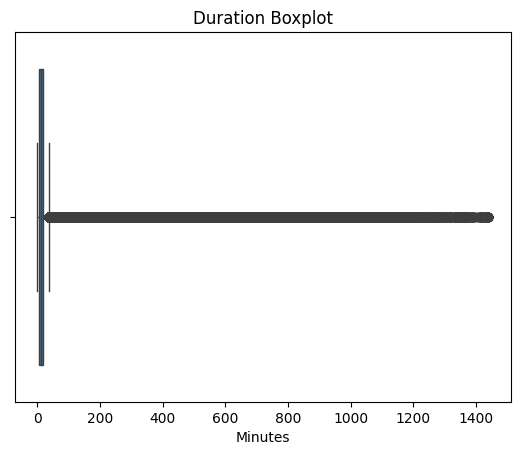

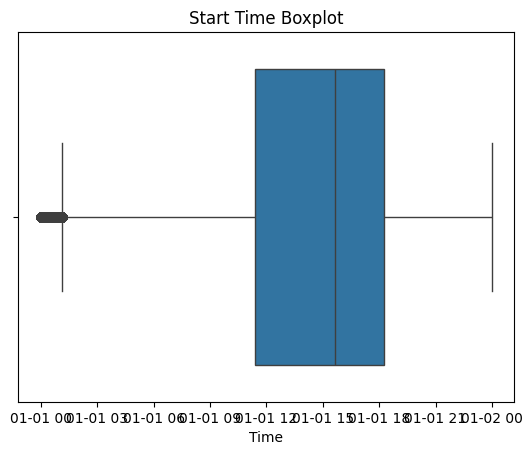

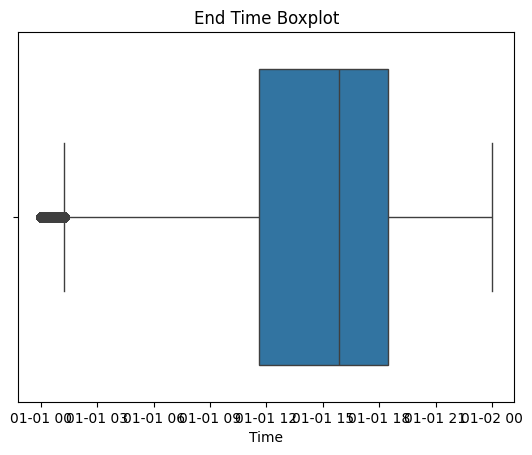

In [72]:
# Create boxplots to visualize distributions of `duration`, 'start_time', and 'end_time' and detect any outliers

# 'duration' has extreme outliers

g = sns.boxplot(x=df1['duration']);
g.set_title('Duration Boxplot');
g.set_xlabel('Minutes');
plt.show()

g = sns.boxplot(x=df1['start_time']);
g.set_title('Start Time Boxplot');
g.set_xlabel('Time');
plt.show()

g = sns.boxplot(x=df1['end_time']);
g.set_title('End Time Boxplot');
g.set_xlabel('Time');
plt.show()

### Observations/Insights

Trip Duration has many extreme outliers on the upper end of its range.

In [138]:
# Determine the number of rows containing outliers for 'duration'

percentile25 = df1['duration'].quantile(0.25)
percentile75 = df1['duration'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('\033[1mDuration Upper Limit:\033[0m',upper_limit)
print('\033[1mDuration Lower Limit:\033[0m',lower_limit)

duration_outliers = df1[df1['duration'] > upper_limit]

display(df1[df1['duration'] < lower_limit])
display(df1[df1['duration'] > upper_limit])

print('\033[1m# Outliers Below Lower Limit:\033[0m',df1[df1['duration'] < lower_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit:\033[0m',df1[df1['duration'] > upper_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Members):\033[0m',df1[(df1['duration'] > upper_limit) & (df1['member_casual'] == 'member')].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit (Casual Riders):\033[0m',df1[(df1['duration'] > upper_limit) & (df1['member_casual'] == 'casual')].shape[0])
print('\n')
print('\033[1m% of Data that are Outliers:\033[0m',round((len(duration_outliers)/(len(df1)))*100,3),'%')

Duration Upper Limit: 36.53333333333333
Duration Lower Limit: -12.933333333333334


Empty DataFrame
Columns: [ride_id, rideable_type, start_date, end_date, weekday, weekend, start_time, end_time, time_of_day, duration, start_station_name, start_station_id, end_station_name, end_station_id, start_end_name, start_end_id, start_lat, start_lng, end_lat, end_lng, member_casual, start_lat_lng, end_lat_lng, avg_end_lat, avg_end_lng, avg_start_lat, avg_start_lng]
Index: []

ride_id  rideable_type start_date   end_date   weekday  \
63       BB9E1783E82C5CEF  electric_bike 2023-04-21 2023-04-21    Friday   
77       F35E4C1A63EC02AF  electric_bike 2023-04-10 2023-04-10    Monday   
100      C61FA66E5CD5D1B6  electric_bike 2023-04-15 2023-04-15  Saturday   
112      553DE80038D818AD  electric_bike 2023-04-21 2023-04-21    Friday   
325      01ECF36348FD97E4  electric_bike 2023-04-27 2023-04-27  Thursday   
...                   ...            ...        ...        ...       ...   
1751019  AF036A8A8EBF731E    docked_bike 2023-06-10 2023-06-15  Saturday   
1751025  50D571C70A6F0C04  electric_bike 2023-06-24 2023-06-24  Saturday   
1751027  D3694ABFD7ECDECB  electric_bike 2023-06-24 2023-06-25  Saturday   
1751030  D7BBF4BCBB72DA32   classic_bike 2023-06-30 2023-06-30    Friday   
1751034  66EF9F3C318208B9   classic_bike 2023-06-24 2023-06-25  Saturday   

         weekend          start_time            end_time    time_of_day  \
63             0 1900-01-01 20:38:07 1900-01-01 21:49:52          night   
77             0 1900-01-01 17:51:19 1900-01-01 18:37:34        evening   
100            1 1900-01-01 04:14:25 1900-01-01 05:32:49  early morning   
112            0 1900-01-01 10:27:15 1900-01-01 11:05:59   late morning   
325            0 1900-01-01 15:42:51 1900-01-01 16:20:41      afternoon   
...          ...                 ...                 ...            ...   
1751019        1 1900-01-01 11:56:08 1900-01-01 04:57:09   late morning   
1751025        1 1900-01-01 21:16:24 1900-01-01 22:41:04          night   
1751027        1 1900-01-01 23:38:24 1900-01-01 00:23:30          night   
1751030        0 1900-01-01 12:58:56 1900-01-01 13:41:25      afternoon   
1751034        1 1900-01-01 21:30:30 1900-01-01 22:30:07          night   

            duration            start_station_name start_station_id  \
63         71.750000                           NaN              NaN   
77         46.250000                           NaN              NaN   
100        78.400000                           NaN              NaN   
112        38.733333                           NaN              NaN   
325        37.833333      Hyde Park Blvd & 55th St              768   
...              ...                           ...              ...   
1751019  1021.016667        Clark St & Lincoln Ave            13179   
1751025    84.666667  Clinton St & Washington Blvd           WL-012   
1751027    45.100000        Michigan Ave & 14th St     TA1307000124   
1751030    42.483333      Fairbanks Ct & Grand Ave     TA1305000003   
1751034    59.616667      Fairbanks Ct & Grand Ave     TA1305000003   

                       end_station_name end_station_id  \
63                                  NaN            NaN   
77                                  NaN            NaN   
100                                 NaN            NaN   
112                                 NaN            NaN   
325                                 NaN            NaN   
...                                 ...            ...   
1751019                             NaN            NaN   
1751025                             NaN            NaN   
1751027                             NaN            NaN   
1751030  California Ave & Milwaukee Ave          13084   
1751034                             NaN            NaN   

                                            start_end_name  \
63                                                 nan nan   
77                                                 nan nan   
100                                                nan nan   
112                                                nan nan   
325                           Hyde Park Blvd & 55th St nan   
...                                                    ...   
1751019                         Clark St & Lincoln Ave nan   
1751025                   Clinton St & Washington Blvd nan   
1751027                         Michigan Ave & 14th St nan   
1751030  Fairbanks Ct & Grand Ave 

# Outliers Below Lower Limit: 0


# Outliers Above Upper Limit: 127871


# Outliers Above Upper Limit (Members): 36951


# Outliers Above Upper Limit (Casual Riders): 90920


% of Data that are Outliers: 7.303 %


### Observations/Insights

Casual Riders have about 2.5 times more trip duration outliers above the upper limit than Members.

## Exploratory Data Analysis (EDA)

In [108]:
# Get summary statistics for Members and Casual Riders

df1_mem = df1[df1['member_casual'] == 'member']
df1_cas = df1[df1['member_casual'] == 'casual']

print('\033[1mMember Summary Statistics:\033[0m')
display(df1_mem.describe(include='all'))
print('\n')

print('\033[1mCasual Rider Summary Statistics:\033[0m')
display(df1_cas.describe(include='all'))

Member Summary Statistics:


ride_id  rideable_type                     start_date  \
count            1068339        1068339                        1068339   
unique           1068339              2                            NaN   
top     8FE8F7D9C10E88C7  electric_bike                            NaN   
freq                   1         573251                            NaN   
mean                 NaN            NaN  2023-05-20 04:39:46.608745472   
min                  NaN            NaN            2023-04-01 00:00:00   
25%                  NaN            NaN            2023-04-28 00:00:00   
50%                  NaN            NaN            2023-05-23 00:00:00   
75%                  NaN            NaN            2023-06-10 00:00:00   
max                  NaN            NaN            2023-06-30 00:00:00   
std                  NaN            NaN                            NaN   

                             end_date   weekday       weekend  \
count                         1068339   1068339  1.068339e+06   
unique                            NaN         7           NaN   
top                               NaN  Thursday           NaN   
freq                              NaN    178278           NaN   
mean    2023-05-20 04:44:05.645622784       NaN  2.417454e-01   
min               2023-04-01 00:00:00       NaN  0.000000e+00   
25%               2023-04-28 00:00:00       NaN  0.000000e+00   
50%               2023-05-23 00:00:00       NaN  0.000000e+00   
75%               2023-06-10 00:00:00       NaN  0.000000e+00   
max               2023-07-01 00:00:00       NaN  1.000000e+00   
std                               NaN       NaN  4.281410e-01   

                           start_time                       end_time  \
count                         1068339                        1068339   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    1900-01-01 14:32:04.737839616  1900-01-01 14:40:30.745172224   
min               1900-01-01 00:00:00            1900-01-01 00:00:00   
25%               1900-01-01 10:44:58            1900-01-01 10:53:04   
50%               1900-01-01 15:30:05            1900-01-01 15:40:10   
75%               1900-01-01 18:10:25            1900-01-01 18:21:58   
max               1900-01-01 23:59:59            1900-01-01 23:59:59   
std                               NaN                            NaN   

       time_of_day      duration        start_station_name start_station_id  \
count      1068339  1.068339e+06                    964306           964306   
unique           6           NaN                      1382             1279   
top        evening           NaN  Kingsbury St & Kinzie St     KA1503000043   
freq        371627           NaN                      7556             7556   
mean           NaN  1.241646e+01                       NaN              NaN   
min            NaN  0.000000e+00                       NaN              NaN   
25%            NaN  5.050000e+00                       NaN              NaN   
50%            NaN  8.816667e+00                       NaN              NaN   
75%            NaN  1.520000e+01                       NaN              NaN   
max            NaN  1.439983e+03                       NaN              NaN   
std            NaN  2.077711e+01                       NaN              NaN   

                end_station_name end_station_id start_end_name start_end_id  \
count                     960162         960162        1068339      1068339   
unique                      1394           1286         111559       111108   
top     Kingsbury St & Kinzie St   KA1503000043        nan nan      nan nan   
freq                        7516           7516          33514        33514   
mean                         NaN            NaN            NaN          NaN   
min                          NaN            NaN            



Casual Rider Summary Statistics:


ride_id  rideable_type                     start_date  \
count             682696         682696                         682696   
unique            682696              3                            NaN   
top     1B014DD69D09711F  electric_bike                            NaN   
freq                   1         387652                            NaN   
mean                 NaN            NaN  2023-05-23 08:25:31.677935104   
min                  NaN            NaN            2023-04-01 00:00:00   
25%                  NaN            NaN            2023-05-05 00:00:00   
50%                  NaN            NaN            2023-05-28 00:00:00   
75%                  NaN            NaN            2023-06-14 00:00:00   
max                  NaN            NaN            2023-06-30 00:00:00   
std                  NaN            NaN                            NaN   

                             end_date   weekday        weekend  \
count                          682696    682696  682696.000000   
unique                            NaN         7            NaN   
top                               NaN  Saturday            NaN   
freq                              NaN    142828            NaN   
mean    2023-05-23 08:43:03.620234752       NaN       0.359372   
min               2023-04-01 00:00:00       NaN       0.000000   
25%               2023-05-05 00:00:00       NaN       0.000000   
50%               2023-05-28 00:00:00       NaN       0.000000   
75%               2023-06-14 00:00:00       NaN       1.000000   
max               2023-07-10 00:00:00       NaN       1.000000   
std                               NaN       NaN       0.479817   

                           start_time                       end_time  \
count                          682696                         682696   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    1900-01-01 15:03:56.930430208  1900-01-01 15:15:08.678563328   
min               1900-01-01 00:00:00            1900-01-01 00:00:00   
25%               1900-01-01 12:12:11            1900-01-01 12:28:48   
50%               1900-01-01 15:49:54            1900-01-01 16:07:15   
75%               1900-01-01 18:26:50            1900-01-01 18:42:20   
max               1900-01-01 23:59:59            1900-01-01 23:59:59   
std                               NaN                            NaN   

       time_of_day       duration       start_station_name start_station_id  \
count       682696  682696.000000                   613599           613599   
unique           6            NaN                     1509             1380   
top        evening            NaN  Streeter Dr & Grand Ave            13022   
freq        236619            NaN                    16292            16292   
mean           NaN      22.237906                      NaN              NaN   
min            NaN       0.000000                      NaN              NaN   
25%            NaN       6.916667                      NaN              NaN   
50%            NaN      12.516667                      NaN              NaN   
75%            NaN      23.500000                      NaN              NaN   
max            NaN    1439.983333                      NaN              NaN   
std            NaN      50.610940                      NaN              NaN   

               end_station_name end_station_id start_end_name start_end_id  \
count                    597967         597967         682696       682696   
unique                     1502           1366          94315        93762   
top     Streeter Dr & Grand Ave          13022        nan nan      nan nan   
freq                      17407          17407          30384        30384   
mean                        NaN            NaN            NaN          NaN   
min                         NaN            NaN       

### Observations/Insights

Electric bikes were the most used bike type by both Members and Casual Riders in 3QFY23.

Members most traveled day of the week was Thursday and Casual Riders most traveled day of the week was Saturday.

Members mean start time was about 2:32 PM and Casual Riders mean start time was about 3:04 PM.

Members mean end time was about 2:40 PM and Casual Riders mean end time was about 3:15 PM.

Members mean trip duration was about 12.4 minutes and Casual Riders mean trip duration was about 22.2 minutes.

Both Members' and Casual Riders' top time of day for trips was in the evening (4 PM - 8 PM).

Members top start and end station was Kingsbury St & Kinzie St (id: KA1503000043), which is in a major business district, and Casual Riders top start and end station was Streeter Dr & Grand Ave (id: 13022), which is on the Navy Pier, a top tourist destination.

In [114]:
# Encode non-numeric variables to plot correlation matrix/heatmap

df1_encoded = df1.copy()

df1_encoded['start_station_name'] = df1_encoded['start_station_name'].astype('category').cat.codes
df1_encoded['start_station_id'] = df1_encoded['start_station_id'].astype('category').cat.codes
df1_encoded['end_station_name'] = df1_encoded['end_station_name'].astype('category').cat.codes
df1_encoded['end_station_id'] = df1_encoded['end_station_id'].astype('category').cat.codes
df1_encoded['start_end_id'] = df1_encoded['start_end_id'].astype('category').cat.codes
df1_encoded['start_end_name'] = df1_encoded['start_end_name'].astype('category').cat.codes


df1_encoded = df1_encoded.drop(columns=['ride_id','start_lat_lng','end_lat_lng'])
df1_encoded = pd.get_dummies(df1_encoded,drop_first=False,columns=['rideable_type','member_casual','weekday','time_of_day'],dtype=int)

df1_encoded.head()

start_date   end_date  weekend          start_time            end_time  \
0 2023-04-02 2023-04-02        1 1900-01-01 08:37:28 1900-01-01 08:41:37   
1 2023-04-19 2023-04-19        0 1900-01-01 11:29:02 1900-01-01 11:52:12   
2 2023-04-19 2023-04-19        0 1900-01-01 08:41:22 1900-01-01 08:43:22   
3 2023-04-19 2023-04-19        0 1900-01-01 13:31:30 1900-01-01 13:35:09   
4 2023-04-19 2023-04-19        0 1900-01-01 12:05:36 1900-01-01 12:10:26   

    duration  start_station_name  start_station_id  end_station_name  \
0   4.150000                  -1                -1                -1   
1  23.166667                  -1                -1                -1   
2   2.000000                  -1                -1                -1   
3   3.650000                1457               534                -1   
4   4.833333                  -1                -1                -1   

   end_station_id  start_end_name  start_end_id  start_lat  start_lng  \
0              -1          139179        138148      41.80     -87.60   
1              -1          139179        138148      41.87     -87.65   
2              -1          139179        138148      41.93     -87.66   
3              -1          123236         53476      41.92     -87.65   
4              -1          139179        138148      41.91     -87.65   

   end_lat  end_lng  avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  \
0    41.79   -87.60        41.79       -87.60          41.80         -87.60   
1    41.93   -87.68        41.93       -87.68          41.87         -87.65   
2    41.93   -87.66        41.93       -87.66          41.93         -87.66   
3    41.91   -87.65        41.91       -87.65          41.92         -87.65   
4    41.91   -87.63        41.91       -87.63          41.91         -87.65   

   rideable_type_classic_bike  rideable_type_docked_bike  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   rideable_type_electric_bike  member_casual_casual  member_casual_member  \
0                            1                     0                     1   
1                            1                     0                     1   
2                            1                     0                     1   
3                            1                     0                     1   
4                            1                     0                     1   

   weekday_Monday  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0               0                0                  0                 0   
1               0                0                  1                 0   
2               0                0                  1                 0   
3               0                0                  1                 0   
4               0                0                  1                 0   

   weekday_Friday  weekday_Saturday  weekday_Sunday  time_of_day_afternoon  \
0               0                 0               1                      0   
1               0                 0               0                      0   
2               0                 0               0                      0   
3               0                 0               0                      1   
4               0                 0               0                      1   

   time_of_day_early morning  time_of_day_evening  time_of_day_late morning  \
0                          0                    0                         0   
1                          0                    0                         1   
2                          0                    0                         0   
3                          0                    0                         0   
4                          0                    0    

In [84]:
# Plot correlation matrix for the dataset

display(df1_encoded.corr())

start_date  end_date   weekend  start_time  \
start_date                     1.000000  0.999987 -0.000434    0.003051   
end_date                       0.999987  1.000000 -0.000371    0.003345   
weekend                       -0.000434 -0.000371  1.000000   -0.044074   
start_time                     0.003051  0.003345 -0.044074    1.000000   
end_time                       0.002467  0.001941 -0.041664    0.952756   
duration                       0.020039  0.022049  0.058179    0.014856   
start_station_name             0.006500  0.006487  0.010977    0.024902   
start_station_id               0.001315  0.001293 -0.011970    0.008307   
end_station_name               0.003998  0.004120  0.011801    0.006513   
end_station_id                -0.000972 -0.000883 -0.014840   -0.002629   
start_end_name                 0.007380  0.007367  0.011079    0.024117   
start_end_id                   0.005406  0.005378 -0.008016    0.012090   
start_lat                      0.037175  0.037128  0.042796    0.019501   
start_lng                     -0.005569 -0.005537  0.006975    0.007309   
end_lat                        0.023879  0.023879  0.028899    0.039244   
end_lng                       -0.000111 -0.000117  0.002052   -0.013543   
avg_end_lat                    0.023880  0.023880  0.028897    0.039245   
avg_end_lng                   -0.000111 -0.000116  0.002052   -0.013543   
avg_start_lat                  0.037175  0.037128  0.042796    0.019501   
avg_start_lng                 -0.005569 -0.005537  0.006975    0.007309   
rideable_type_classic_bike     0.024414  0.024391  0.012941    0.000656   
rideable_type_docked_bike      0.000273  0.000772  0.040863    0.008035   
rideable_type_electric_bike   -0.024370 -0.024490 -0.024678   -0.002974   
member_casual_casual           0.060607  0.060781  0.126742    0.052843   
member_casual_member          -0.060607 -0.060781 -0.126742   -0.052843   
weekday_Friday                 0.031301  0.031335 -0.274656    0.025176   
weekday_Monday                 0.011989  0.011956 -0.234404    0.000245   
weekday_Saturday               0.000940  0.001018  0.698066   -0.003028   
weekday_Sunday                -0.001657 -0.001659  0.589996   -0.057282   
weekday_Thursday              -0.015905 -0.015925 -0.273056    0.022961   
weekday_Tuesday               -0.028127 -0.028164 -0.249434   -0.001896   
weekday_Wednesday              0.000679  0.000651 -0.262440    0.008550   
time_of_day_afternoon         -0.008454 -0.008542  0.106280   -0.074987   
time_of_day_early morning      0.010648  0.010636  0.083765   -0.491006   
time_of_day_evening           -0.018212 -0.018308 -0.088338    0.461565   
time_of_day_late morning      -0.001215 -0.001286  0.077682   -0.325462   
time_of_day_mid morning        0.003623  0.003539 -0.130496   -0.511986   
time_of_day_night              0.028816  0.029228 -0.011358    0.534389   

                             end_time  duration  start_station_name  \
start_date                   0.002467  0.020039            0.006500   
end_date                     0.001941  0.022049            0.006487   
weekend                     -0.041664  0.058179            0.010977   
start_time                   0.952756  0.014856            0.024902   
end_time                     1.000000  0.011589            0.022063   
duration                     0.011589  1.000000           -0.021369   
start_station_name           0.022063 -0.021369            1.000000   
start_station_id             0.005412 -0.030096            0.297590   
end_station_name             0.003902 -0.002183            0.132523   
end_station_id              -0.006218 -0.018625            0.064688   
start_end_name               0.021498 -0.018733            0.969336   
start_end_id                 0.008673 -0.035922            0.327938   
start_lat                    0.018514 -0.017554            0.038363   
start_lng                    0.012533  0.052645            0.018007   
end_lat                      0.037815 

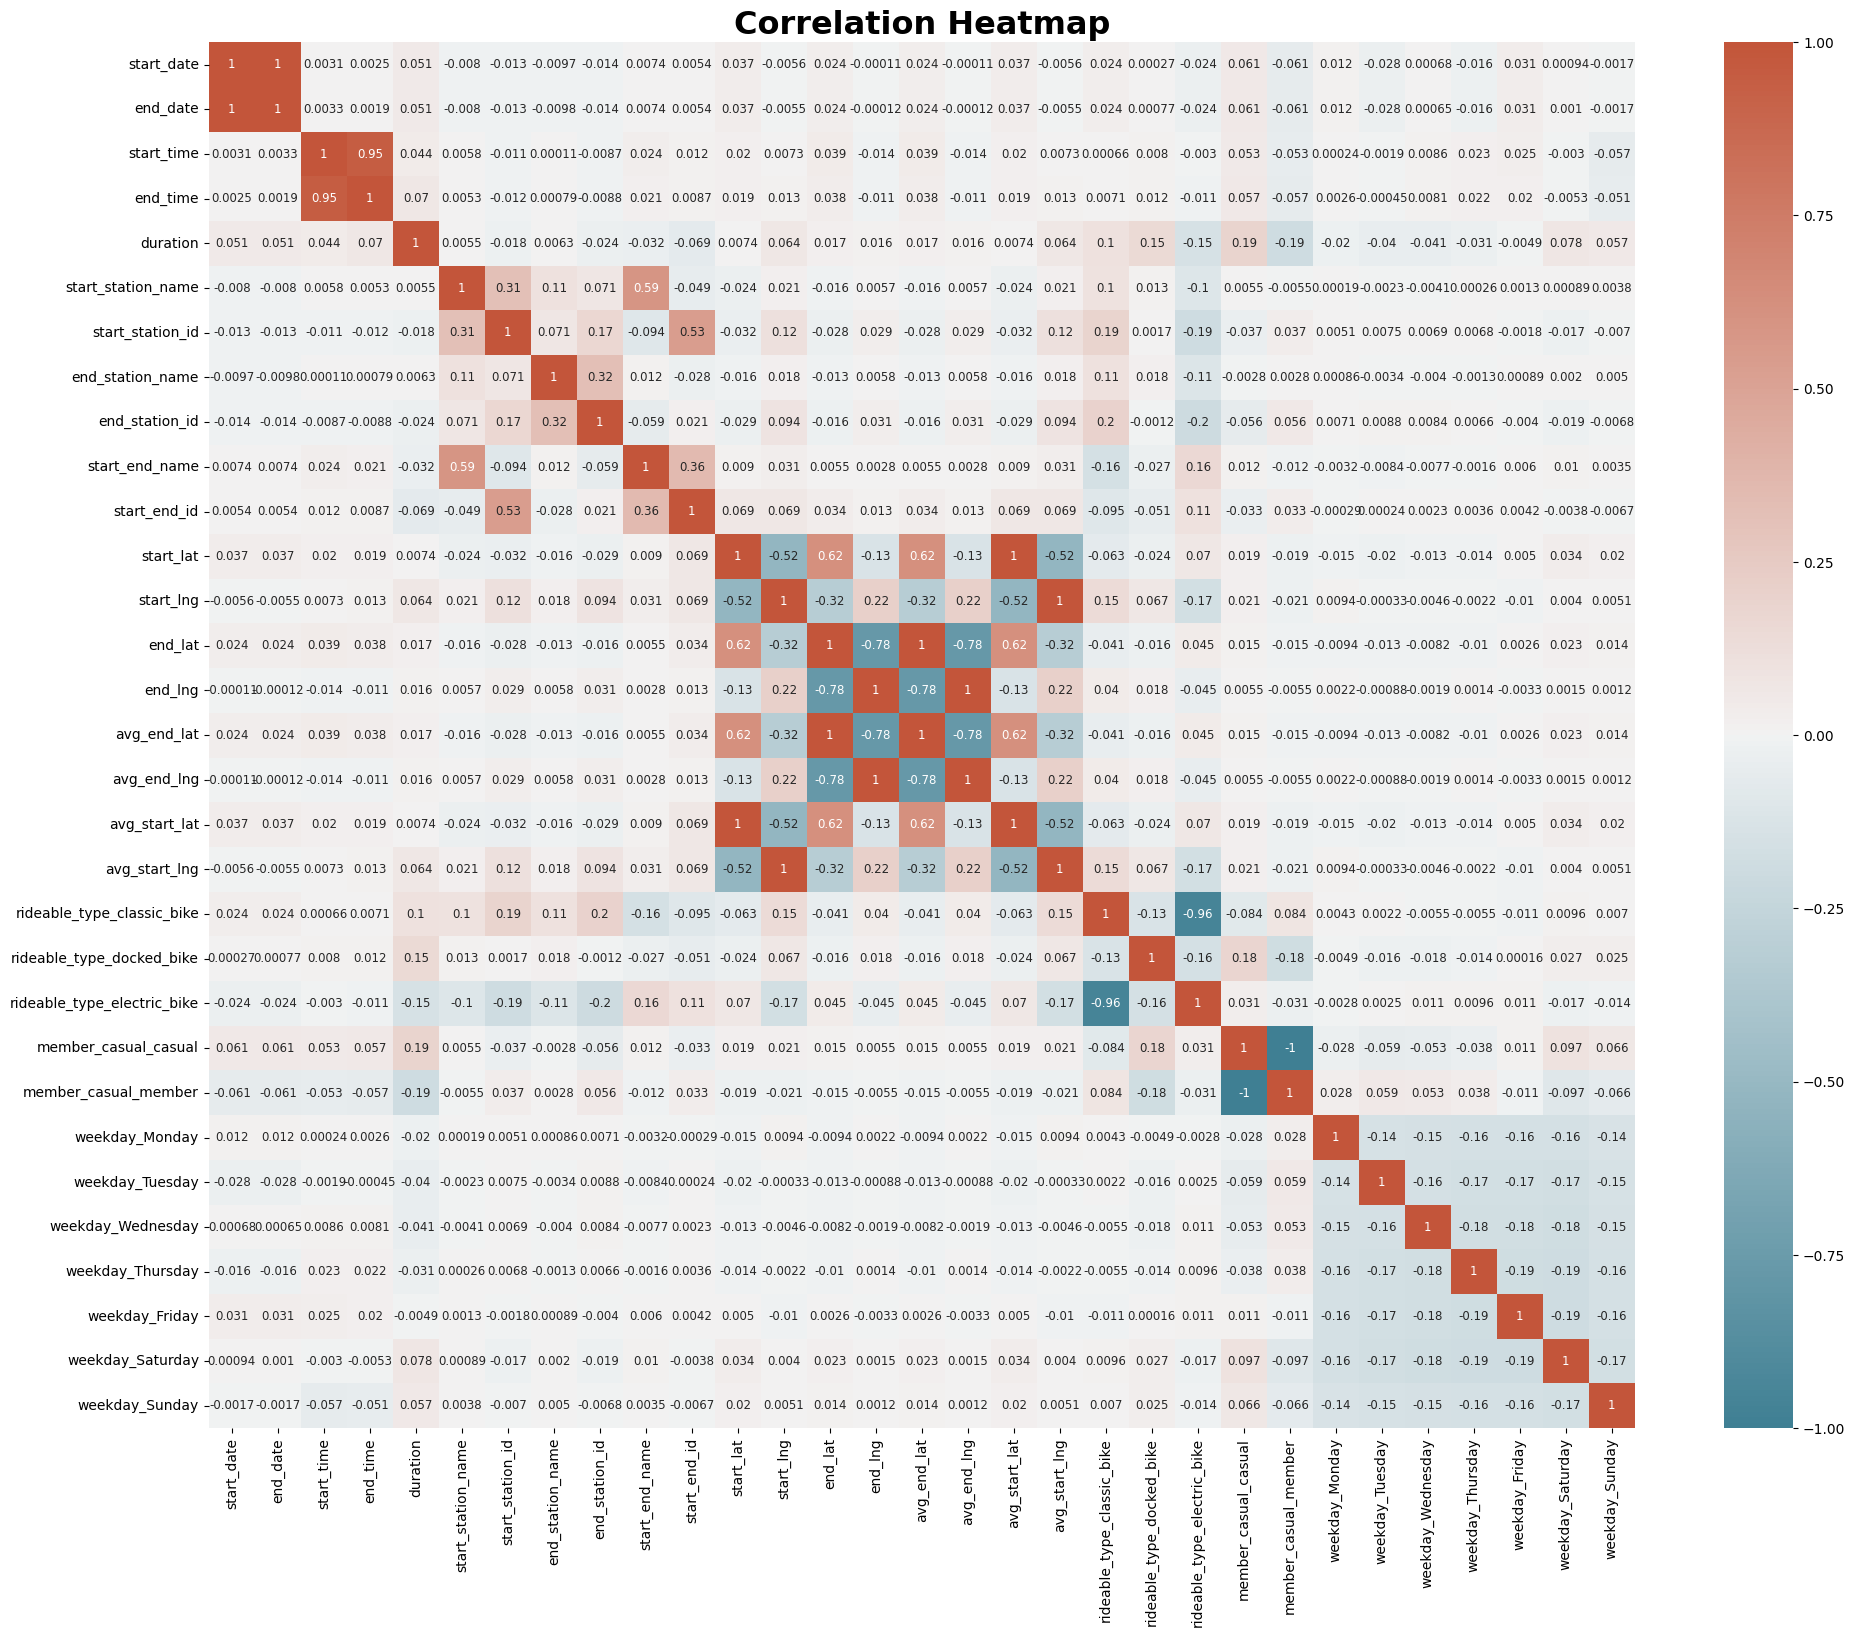

In [95]:
# Plot correlation heatmap for the dataset

plt.figure(figsize=(23,18))
ax = sns.heatmap(df1_encoded.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 8.5}, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap', fontsize=23, fontweight='bold')
plt.show()

In [154]:
# Trips breakdown by QTR of interest (3rd QTR: APR-JUN23), entire year (4th QTR FY22 - 3rd QTR FY23), and other quarters in the year from 4QFY22 - 3QFY23

print('Total Trips in 3rd QTR (APR-JUN23):',len(df1))
print('3rd QTR Trips %:',round(((len(df1)) / (len(df2)))*100,2),'%')
print('Total Trips in 2nd QTR (JAN-MAR23):',len(jan_23_df) + len(feb_23_df) + len(mar_23_df))
print('2nd QTR Trips %:',round(((len(jan_23_df) + len(feb_23_df) + len(mar_23_df)) / (len(df2)))*100,2),'%')
print('Total Trips in 1st QTR (OCT-DEC22):',len(oct_22_df) + len(nov_22_df) + len(dec_22_df))
print('1st QTR Trips %:',round(((len(oct_22_df) + len(nov_22_df) + len(dec_22_df)) / (len(df2)))*100,2),'%')
print('Total Trips in 4th QTR (JUL-SEP22):',len(jul_22_df) + len(aug_22_df) + len(sep_22_df))
print('4th QTR Trips %:',round(((len(jul_22_df) + len(aug_22_df) + len(sep_22_df)) / (len(df2)))*100,2),'%')

print('\n')
print('Total Trips in 4QFY22 - 3QFY23 (JUL22 - JUN23):',len(df2))
print('4QFY22 - 3QFY23 # Member Trips:',len(df2[df2['member_casual'] == 'member']))
print('4QFY22 - 3QFY23 Member Trips %:',round((len(df2[df2['member_casual'] == 'member']) / len(df2))*100,2),'%')
print('4QFY22 - 3QFY23 # Casual Trips:',len(df2[df2['member_casual'] == 'casual']))
print('4QFY22 - 3QFY23 Casual Trips %:',round((len(df2[df2['member_casual'] == 'casual']) / len(df2))*100,2),'%')

print('\n')

print('3rd QTR # Member Trips:',len(df1[df1['member_casual'] == 'member']))
print('3rd QTR Member Trips %:',round((len(df1[df1['member_casual'] == 'member']) / len(df1))*100,2),'%')
print('3rd QTR # Casual Trips:',len(df1[df1['member_casual'] == 'casual']))
print('3rd QTR Casual Trips %:',round((len(df1[df1['member_casual'] == 'casual']) / len(df1))*100,2),'%')
print('\n')

print('JUL22 # Trips:',len(jul_22_df))
print('JUL22 # Member Trips:',len(jul_22_df[jul_22_df['member_casual'] == 'member']))
print('JUL22 # Casual Trips:',len(jul_22_df[jul_22_df['member_casual'] == 'casual']))
print('JUL22 Member Trips %:',round(((len(jul_22_df[jul_22_df['member_casual'] == 'member'])) / (len(jul_22_df)))*100,2),'%')
print('JUL22 Casual Trips %:',round(((len(jul_22_df[jul_22_df['member_casual'] == 'casual'])) / (len(jul_22_df)))*100,2),'%')
print('\n')

print('AUG22 # Trips:',len(aug_22_df))
print('AUG22 # Member Trips:',len(aug_22_df[aug_22_df['member_casual'] == 'member']))
print('AUG22 # Casual Trips:',len(aug_22_df[aug_22_df['member_casual'] == 'casual']))
print('AUG22 Member Trips %:',round(((len(aug_22_df[aug_22_df['member_casual'] == 'member'])) / (len(aug_22_df)))*100,2),'%')
print('AUG22 Casual Trips %:',round(((len(aug_22_df[aug_22_df['member_casual'] == 'casual'])) / (len(aug_22_df)))*100,2),'%')
print('\n')

print('SEP22 # Trips:',len(sep_22_df))
print('SEP22 # Member Trips:',len(sep_22_df[sep_22_df['member_casual'] == 'member']))
print('SEP22 # Casual Trips:',len(sep_22_df[sep_22_df['member_casual'] == 'casual']))
print('SEP22 Member Trips %:',round(((len(sep_22_df[sep_22_df['member_casual'] == 'member'])) / (len(sep_22_df)))*100,2),'%')
print('SEP22 Casual Trips %:',round(((len(sep_22_df[sep_22_df['member_casual'] == 'casual'])) / (len(sep_22_df)))*100,2),'%')
print('\n')

print('OCT22 # Trips:',len(oct_22_df))
print('OCT22 # Member Trips:',len(oct_22_df[oct_22_df['member_casual'] == 'member']))
print('OCT22 # Casual Trips:',len(oct_22_df[oct_22_df['member_casual'] == 'casual']))
print('OCT22 Member Trips %:',round(((len(oct_22_df[oct_22_df['member_casual'] == 'member'])) / (len(oct_22_df)))*100,2),'%')
print('OCT22 Casual Trips %:',round(((len(oct_22_df[oct_22_df['member_casual'] == 'casual'])) / (len(oct_22_df)))*100,2),'%')
print('\n')

print('NOV22 # Trips:',len(nov_22_df))
print('NOV22 # Member Trips:',len(nov_22_df[nov_22_df['member_casual'] == 'member']))
print('NOV22 # Casual Trips:',len(nov_22_df[nov_22_df['member_casual'] == 'casual']))
print('NOV22 Member Trips %:',round(((len(nov_22_df[nov_22_df['member_casual'] == 'member'])) / (len(nov_22_df)))*100,2),'%')
print('NOV22 Casual Trips %:',round(((len(nov_22_df[nov_22_df['member_casual'] == 'casual'])) / (len(nov_22_df)))*100,2),'%')
print('\n')

print('DEC22 # Trips:',len(dec_22_df))
print('DEC22 # Member Trips:',len(dec_22_df[dec_22_df['member_casual'] == 'member']))
print('DEC22 # Casual Trips:',len(dec_22_df[dec_22_df['member_casual'] == 'casual']))
print('DEC22 Member Trips %:',round(((len(dec_22_df[dec_22_df['member_casual'] == 'member'])) / (len(dec_22_df)))*100,2),'%')
print('DEC22 Casual Trips %:',round(((len(dec_22_df[dec_22_df['member_casual'] == 'casual'])) / (len(dec_22_df)))*100,2),'%')
print('\n')

print('JAN23 # Trips:',len(jan_23_df))
print('JAN23 # Member Trips:',len(jan_23_df[jan_23_df['member_casual'] == 'member']))
print('JAN23 # Casual Trips:',len(jan_23_df[jan_23_df['member_casual'] == 'casual']))
print('JAN23 Member Trips %:',round(((len(jan_23_df[jan_23_df['member_casual'] == 'member'])) / (len(jan_23_df)))*100,2),'%')
print('JAN23 Casual Trips %:',round(((len(jan_23_df[jan_23_df['member_casual'] == 'casual'])) / (len(jan_23_df)))*100,2),'%')
print('\n')

print('FEB23 # Trips:',len(feb_23_df))
print('FEB23 # Member Trips:',len(feb_23_df[feb_23_df['member_casual'] == 'member']))
print('FEB23 # Casual Trips:',len(feb_23_df[feb_23_df['member_casual'] == 'casual']))
print('FEB23 Member Trips %:',round(((len(feb_23_df[feb_23_df['member_casual'] == 'member'])) / (len(feb_23_df)))*100,2),'%')
print('FEB23 Casual Trips %:',round(((len(feb_23_df[feb_23_df['member_casual'] == 'casual'])) / (len(feb_23_df)))*100,2),'%')
print('\n')

print('MAR23 # Trips:',len(mar_23_df))
print('MAR23 # Member Trips:',len(mar_23_df[mar_23_df['member_casual'] == 'member']))
print('MAR23 # Casual Trips:',len(mar_23_df[mar_23_df['member_casual'] == 'casual']))
print('MAR23 Member Trips %:',round(((len(mar_23_df[mar_23_df['member_casual'] == 'member'])) / (len(mar_23_df)))*100,2),'%')
print('MAR23 Casual Trips %:',round(((len(mar_23_df[mar_23_df['member_casual'] == 'casual'])) / (len(mar_23_df)))*100,2),'%')
print('\n')

print('APR23 # Trips:',len(apr_23_df))
print('APR23 # Member Trips:',len(apr_23_df[apr_23_df['member_casual'] == 'member']))
print('APR23 # Casual Trips:',len(apr_23_df[apr_23_df['member_casual'] == 'casual']))
print('APR23 Member Trips %:',round(((len(apr_23_df[apr_23_df['member_casual'] == 'member'])) / (len(apr_23_df)))*100,2),'%')
print('APR23 Casual Trips %:',round(((len(apr_23_df[apr_23_df['member_casual'] == 'casual'])) / (len(apr_23_df)))*100,2),'%')
print('\n')

print('MAY23 # Trips:',len(may_23_df))
print('MAY23 # Member Trips:',len(may_23_df[may_23_df['member_casual'] == 'member']))
print('MAY23 # Casual Trips:',len(may_23_df[may_23_df['member_casual'] == 'casual']))
print('MAY23 Member Trips %:',round(((len(may_23_df[may_23_df['member_casual'] == 'member'])) / (len(may_23_df)))*100,2),'%')
print('MAY23 Casual Trips %:',round(((len(may_23_df[may_23_df['member_casual'] == 'casual'])) / (len(may_23_df)))*100,2),'%')
print('\n')

print('JUN23 # Trips:',len(jun_23_df))
print('JUN23 # Member Trips:',len(jun_23_df[jun_23_df['member_casual'] == 'member']))
print('JUN23 # Casual Trips:',len(jun_23_df[jun_23_df['member_casual'] == 'casual']))
print('JUN23 Member Trips %:',round(((len(jun_23_df[jun_23_df['member_casual'] == 'member'])) / (len(jun_23_df)))*100,2),'%')
print('JUN23 Casual Trips %:',round(((len(jun_23_df[jun_23_df['member_casual'] == 'casual'])) / (len(jun_23_df)))*100,2),'%')
print('\n')

print('JUL23 # Trips:',len(jul_23_df))
print('JUL23 # Member Trips:',len(jul_23_df[jul_23_df['member_casual'] == 'member']))
print('JUL23 # Casual Trips:',len(jul_23_df[jul_23_df['member_casual'] == 'casual']))
print('JUL23 Member Trips %:',round(((len(jul_23_df[jul_23_df['member_casual'] == 'member'])) / (len(jul_23_df)))*100,2),'%')
print('JUL23 Casual Trips %:',round(((len(jul_23_df[jul_23_df['member_casual'] == 'casual'])) / (len(jul_23_df)))*100,2),'%')

Total Trips in 3rd QTR (APR-JUN23): 1751035
3rd QTR Trips %: 30.3 %
Total Trips in 2nd QTR (JAN-MAR23): 639424
2nd QTR Trips %: 11.06 %
Total Trips in 1st QTR (OCT-DEC22): 1078226
1st QTR Trips %: 18.66 %
Total Trips in 4th QTR (JUL-SEP22): 2310759
4th QTR Trips %: 39.98 %


Total Trips in 4QFY22 - 3QFY23 (JUL22 - JUN23): 5779444
4QFY22 - 3QFY23 # Member Trips: 3535192
4QFY22 - 3QFY23 Member Trips %: 61.17 %
4QFY22 - 3QFY23 # Casual Trips: 2244252
4QFY22 - 3QFY23 Casual Trips %: 38.83 %


3rd QTR # Member Trips: 1068339
3rd QTR Member Trips %: 61.01 %
3rd QTR # Casual Trips: 682696
3rd QTR Casual Trips %: 38.99 %


JUL22 # Trips: 823488
JUL22 # Member Trips: 417433
JUL22 # Casual Trips: 406055
JUL22 Member Trips %: 50.69 %
JUL22 Casual Trips %: 49.31 %


AUG22 # Trips: 785932
AUG22 # Member Trips: 427008
AUG22 # Casual Trips: 358924
AUG22 Member Trips %: 54.33 %
AUG22 Casual Trips %: 45.67 %


SEP22 # Trips: 701339
SEP22 # Member Trips: 404642
SEP22 # Casual Trips: 296697
SEP22 Member 

Member AVG Trips Per Month:  294599 (95% CI (220551.562, 368647.104) )
Casual Rider AVG Trips Per Month:  187021 (95% CI (102979.549, 271062.451) )


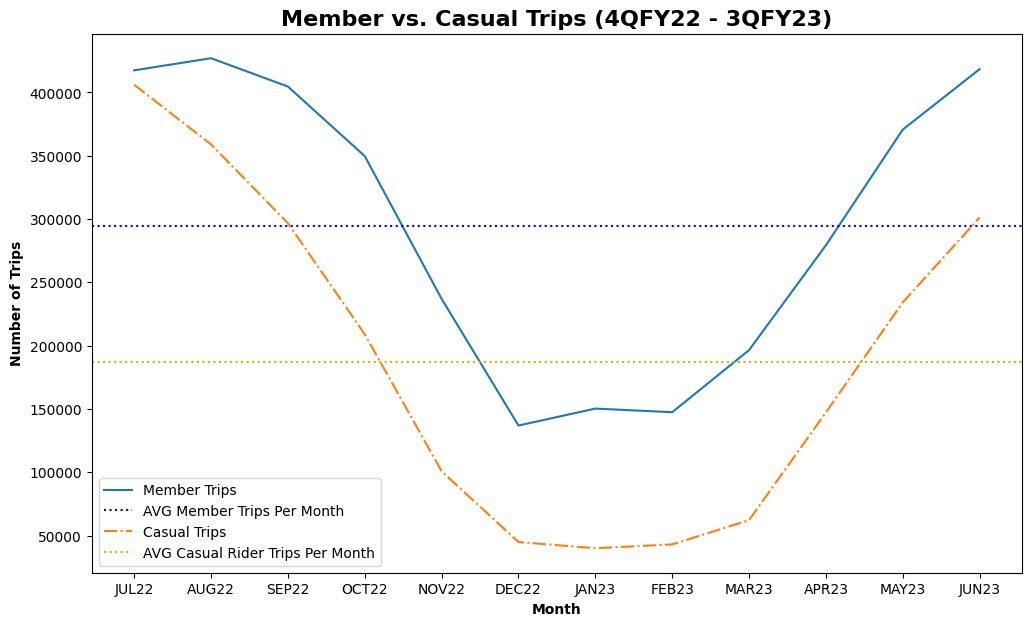

In [291]:
# Plot Member vs. Casual trips from 4QFY22 - 3QFY23

months_yr = ['JUL22','AUG22','SEP22','OCT22','NOV22','DEC22','JAN23','FEB23','MAR23','APR23','MAY23','JUN23']

member_trips_yr = [417433,427008,404642,349696,236963,136912,150293,147429,196477,279305,370646,418388]

member_trips_yr_avg = int(np.mean(member_trips_yr))
member_trips_yr_std = np.std(member_trips_yr)
member_trips_yr_sqrt_n = np.sqrt(len(member_trips_yr))
member_trips_yr_est_SE = member_trips_yr_std / member_trips_yr_sqrt_n
member_trips_yr_CI = stats.t.interval(confidence=0.95, df=len(member_trips_yr)-1, loc=np.mean(member_trips_yr), scale=stats.sem(member_trips_yr)) 
member_trips_yr_CI = (round(member_trips_yr_CI[0],3),round(member_trips_yr_CI[1],3))
print('\033[1mMember AVG Trips Per Month:\033[0m ',member_trips_yr_avg,'(95% CI',member_trips_yr_CI,')')

casual_trips_yr = [406055,358924,296697,208989,100772,44894,40008,43016,62201,147285,234181,301230]

casual_trips_yr_avg = int(np.mean(casual_trips_yr))
casual_trips_yr_CI = stats.t.interval(confidence=0.95, df=len(casual_trips_yr)-1, loc=np.mean(casual_trips_yr), scale=stats.sem(casual_trips_yr)) 
casual_trips_yr_CI = (round(casual_trips_yr_CI[0],3),round(casual_trips_yr_CI[1],3))
print('\033[1mCasual Rider AVG Trips Per Month:\033[0m ',casual_trips_yr_avg,'(95% CI',casual_trips_yr_CI,')')

yr_trips_df = pd.DataFrame(columns=[months_yr,member_trips_yr,casual_trips_yr])
yr_trips_df = yr_trips_df.T.reset_index()
yr_trips_df.columns = ['month','member_trips','casual_trips']
yr_trips_df['casual_trips'] = yr_trips_df['casual_trips'].astype(int)
yr_trips_df['member_trips'] = yr_trips_df['member_trips'].astype(int)
yr_trips_df

plt.figure(figsize = (12, 7)) 
ax = plt.plot(yr_trips_df['month'], yr_trips_df['member_trips'], label ='Member Trips')
plt.axhline(member_trips_yr_avg,color='b',linestyle=':',label='AVG Member Trips Per Month')
plt.plot(yr_trips_df['month'], yr_trips_df['casual_trips'], '-.', label ='Casual Trips')
plt.axhline(casual_trips_yr_avg,color='y',linestyle=':',label='AVG Casual Rider Trips Per Month')
#plt.annotate(member_trips_yr_avg,(0,member_trips_yr_avg),xycoords='data')

plt.xlabel("Month",fontweight='bold')
plt.ylabel("Number of Trips",fontweight='bold')
plt.legend()
plt.title('Member vs. Casual Trips (4QFY22 - 3QFY23)',fontweight='bold',fontsize=16)
plt.show()


### Observations/Insights

There were over 100,000 more Member trips per month on average than Casual Rider trips from 4QFY22 - 3QFY23. The distributions of trips over 4QFY22 - 3QFY23 for Members and Casual Riders generally follow the same pattern. Trip volumes peak in the summer months (JUL-AUG) and are lowest in the winter months (DEC-FEB) for both Members and Casual Riders. The largest trip volumes percentage gap between Members and Casual Riders is in the Winter and the smallest gap is in the Summer.

Mean Member Trips Per Start Station:  834.64 (95% CI (661.992, 1007.288) )
Mean Casual Rider Trips Per Start Station:  494.35 (95% CI (384.515, 604.183) )


Member Trips by Start Station Std Dev: 3151.504
Casual Rider Trips by Start Station Std Dev: 2082.496


Member Trip Volumes by Start Station Summary Statistics:


start_station_id          count
count              1280    1280.000000
unique             1280            NaN
top                 nan            NaN
freq                  1            NaN
mean                NaN     834.639844
std                 NaN    3151.504212
min                 NaN       1.000000
25%                 NaN       8.000000
50%                 NaN      62.500000
75%                 NaN     977.000000
max                 NaN  104033.000000

Casual Rider Trip Volumes by Start Station Summary Statistics:


start_station_id         count
count              1381   1381.000000
unique             1381           NaN
top                 nan           NaN
freq                  1           NaN
mean                NaN    494.349022
std                 NaN   2082.496400
min                 NaN      1.000000
25%                 NaN     10.000000
50%                 NaN     52.000000
75%                 NaN    486.000000
max                 NaN  69097.000000

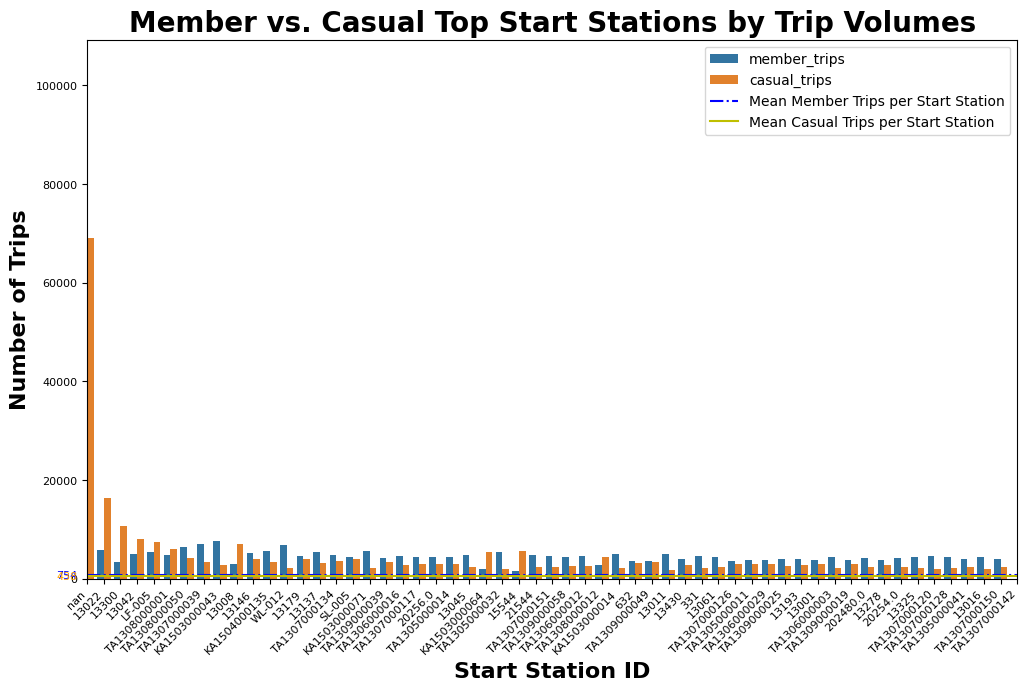

Mean Member Trips Per End Station:  830.1 (95% CI (652.547, 1007.653) )
Mean Casual Rider Trips Per End Station:  499.41 (95% CI (368.039, 630.785) )


Member Trips by End Station Std Dev: 3249.897
Casual Rider Trips by End Station Std Dev: 2478.23


Member Trip Volumes by End Station Summary Statistics:


end_station_id          count
count            1287    1287.000000
unique           1287            NaN
top               nan            NaN
freq                1            NaN
mean              NaN     830.100233
std               NaN    3249.896975
min               NaN       1.000000
25%               NaN       8.000000
50%               NaN      66.000000
75%               NaN     978.000000
max               NaN  108177.000000

Casual Rider Trip Volumes by End Station Summary Statistics:


end_station_id         count
count            1367   1367.000000
unique           1367           NaN
top               nan           NaN
freq                1           NaN
mean              NaN    499.411851
std               NaN   2478.229683
min               NaN      1.000000
25%               NaN     10.000000
50%               NaN     56.000000
75%               NaN    466.500000
max               NaN  84729.000000

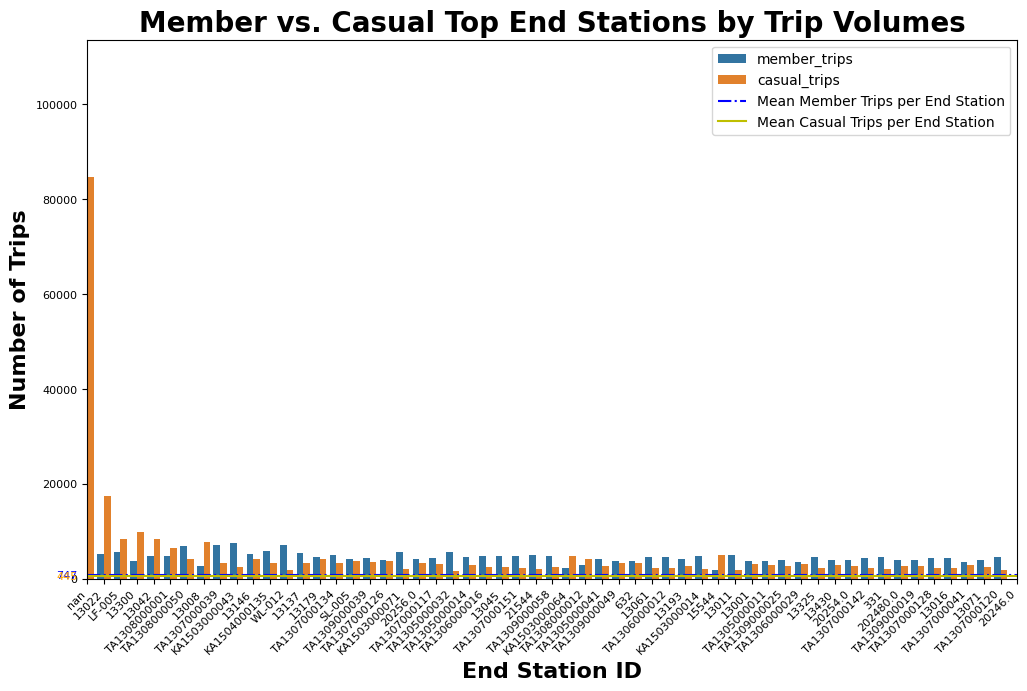

Top Start Stations Not In The Set of Top End Stations:
{'TA1306000003', '13278', 'TA1307000150'}
3
Top End Stations Not In The Set of Top Start Stations:
{'13071', 'TA1307000041', 'TA1307000142'}
3


Start Stations with Fewest Number of Trips


start_station_id      variable  value
1722            365.0  member_trips      1
1884            20201  member_trips      0
1890           1263.0  member_trips      1
1924              871  member_trips      0
1945              847  casual_trips      1
...               ...           ...    ...
2821             1041  member_trips      0
2822              614  casual_trips      0
2823              614  member_trips      1
2824              737  member_trips      1
2825              737  casual_trips      0

[331 rows x 3 columns]

Number of Member Trips at Lowest Volume Start Stations: 101
Number of Casual Rider Trips at Lowest Volume Start Stations: 65


End Stations with Fewest Number of Trips


end_station_id      variable  value
1662         1088.0  member_trips      0
1855          362.0  member_trips      0
1869            969  member_trips      1
1901          20221  member_trips      1
1919            847  casual_trips      0
...             ...           ...    ...
2813           1041  member_trips      0
2814         1276.0  casual_trips      0
2815         1276.0  member_trips      1
2816         1266.0  member_trips      0
2817         1266.0  casual_trips      1

[360 rows x 3 columns]

Number of Member Trips at Lowest Volume End Stations: 110
Number of Casual Rider Trips at Lowest Volume End Stations: 86


Least Traffic Start Stations Not In The Set of Least Traffic End Stations:
{'1099.0', '20126', '912', '921', '678', '1040', '1122.0', '1055', '970', '1029', '1267.0', '1028', '834', '1071', '476', '1179.0', '542', '1090.0', '918', '992', '1173.0', '1171.0', '845', '1188.0', '917', '20210', '793', '1174.0', '909', '740', '1081.0', '656', '1269.0', '1195.0', '957', '953', '1161.0', '823', '1061', '715', '702', '20201', '365.0', '1017', '1202.0', '1241.0', '1136.0', '588', '1130.0', '648', '689', '1256.0', '1167.0', '1268.0', '998', '1146.0', '972', '698', 'Hubbard Bike-checking (LBS-WH-TEST)', '893', '1242.0', '509', '828', '1135.0', '982', '1077.0', '578', '716', '1097.0', '1197.0', '1232.0', '839', '533', '830', '789', '679', '1213.0', '1186.0', '20220', '493', '720'}
81
Least Traffic End Stations Not In The Set of Least Traffic Start Stations:
{'960', '1246.0', '7

In [9]:
# Plot member and casual trips for top start and end stations

# Return lists of start and end stations with fewest number of trips

ssid_by_vol = pd.DataFrame(df1['start_station_id'].value_counts().sort_values(ascending=False).reset_index())

ssid_mem_vol = df1[df1['member_casual'] == 'member']
ssid_mem_vol = pd.DataFrame(ssid_mem_vol['start_station_id'].value_counts().sort_values(ascending=False).reset_index())

ssid_by_vol = ssid_by_vol.merge(ssid_mem_vol,how='outer',on='start_station_id')
ssid_cas_vol = df1[df1['member_casual'] == 'casual']
ssid_cas_vol = pd.DataFrame(ssid_cas_vol['start_station_id'].value_counts().sort_values(ascending=False).reset_index())

ssid_by_vol = ssid_by_vol.merge(ssid_cas_vol,how='outer',on='start_station_id')
ssid_by_vol = ssid_by_vol.rename(columns={'count_x':'total_trips','count_y':'member_trips','count':'casual_trips'})
ssid_by_vol = ssid_by_vol.sort_values(by='total_trips',ascending=False)

#display(ssid_by_vol)

ssid_order = ssid_by_vol['start_station_id']
ssid_by_vol = ssid_by_vol.drop(['total_trips'],axis=1).melt(id_vars='start_station_id')
ssid_by_vol = ssid_by_vol.fillna(value=0)
ssid_by_vol['value'] = ssid_by_vol['value'].astype(int)
ssid_by_vol['start_station_id'] = pd.Categorical(ssid_by_vol['start_station_id'],categories=ssid_order)
ssid_by_vol = ssid_by_vol.sort_values(by='start_station_id').reset_index(drop=True)

#display(ssid_by_vol)

member_trips_ssid_mean_CI = stats.norm.interval(confidence=0.95, loc=ssid_mem_vol['count'].mean(), scale=stats.sem(ssid_mem_vol['count'])) 
member_trips_ssid_mean_CI = (round(member_trips_ssid_mean_CI[0],3),round(member_trips_ssid_mean_CI[1],3))
print('\033[1mMean Member Trips Per Start Station:\033[0m ',round(ssid_mem_vol['count'].mean(),2),'(95% CI',member_trips_ssid_mean_CI,')')

casual_trips_ssid_mean_CI = stats.norm.interval(confidence=0.95, loc=ssid_cas_vol['count'].mean(), scale=stats.sem(ssid_cas_vol['count'])) 
casual_trips_ssid_mean_CI = (round(casual_trips_ssid_mean_CI[0],3),round(casual_trips_ssid_mean_CI[1],3))
print('\033[1mMean Casual Rider Trips Per Start Station:\033[0m ',round(ssid_cas_vol['count'].mean(),2),'(95% CI',casual_trips_ssid_mean_CI,')')
print('\n')

print('\033[1mMember Trips by Start Station Std Dev:\033[0m',round(ssid_mem_vol['count'].std(),3))
print('\033[1mCasual Rider Trips by Start Station Std Dev:\033[0m',round(ssid_cas_vol['count'].std(),3))
print('\n')

print('\033[1mMember Trip Volumes by Start Station Summary Statistics:\033[0m')
display(ssid_mem_vol.describe(include='all'))

print('\033[1mCasual Rider Trip Volumes by Start Station Summary Statistics:\033[0m')
display(ssid_cas_vol.describe(include='all'))

plt.figure(figsize=(12,7))
ax = sns.barplot(x=ssid_by_vol['start_station_id'][:112], y=ssid_by_vol['value'][:112],hue=ssid_by_vol['variable'])
ax.axhline(ssid_mem_vol['count'].mean(),color='b',linestyle='-.',label='Mean Member Trips per Start Station')
ax.axhline(ssid_cas_vol['count'].mean(),color='y',label='Mean Casual Trips per Start Station')
ax.set_title("Member vs. Casual Top Start Stations by Trip Volumes",fontsize=20,fontweight='bold')
ax.set_xticks(range(0,112,1))
ax.set_xlim(0,56)
ax.set_xlabel("Start Station ID",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,753.9530883502737, "{:.0f}".format(753.9530883502737), color="blue", transform=trans, ha="right", va="center",fontsize=8)
ax.text(0,437.7503660322108, "{:.0f}".format(437.7503660322108), color="orange", transform=trans, ha="right", va="center",fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

len(df1)*0.8

esid_by_vol = pd.DataFrame(df1['end_station_id'].value_counts().sort_values(ascending=False).reset_index())

esid_mem_vol = df1[df1['member_casual'] == 'member']
esid_mem_vol = pd.DataFrame(esid_mem_vol['end_station_id'].value_counts().sort_values(ascending=False).reset_index())

esid_by_vol = esid_by_vol.merge(esid_mem_vol,how='outer',on='end_station_id')
esid_cas_vol = df1[df1['member_casual'] == 'casual']
esid_cas_vol = pd.DataFrame(esid_cas_vol['end_station_id'].value_counts().sort_values(ascending=False).reset_index())

esid_by_vol = esid_by_vol.merge(esid_cas_vol,how='outer',on='end_station_id')
esid_by_vol = esid_by_vol.rename(columns={'count_x':'total_trips','count_y':'member_trips','count':'casual_trips'})
esid_by_vol = esid_by_vol.sort_values(by='total_trips',ascending=False)

#display(esid_by_vol)

esid_order = esid_by_vol['end_station_id']
esid_by_vol = esid_by_vol.drop(['total_trips'],axis=1).melt(id_vars='end_station_id')
esid_by_vol = esid_by_vol.fillna(value=0)
esid_by_vol['value'] = esid_by_vol['value'].astype(int)
esid_by_vol['end_station_id'] = pd.Categorical(esid_by_vol['end_station_id'],categories=esid_order)
esid_by_vol = esid_by_vol.sort_values(by='end_station_id').reset_index(drop=True)

#display(esid_by_vol)

member_trips_esid_mean_CI = stats.norm.interval(confidence=0.95, loc=esid_mem_vol['count'].mean(), scale=stats.sem(esid_mem_vol['count'])) 
member_trips_esid_mean_CI = (round(member_trips_esid_mean_CI[0],3),round(member_trips_esid_mean_CI[1],3))
print('\033[1mMean Member Trips Per End Station:\033[0m ',round(esid_mem_vol['count'].mean(),2),'(95% CI',member_trips_esid_mean_CI,')')

casual_trips_esid_mean_CI = stats.norm.interval(confidence=0.95, loc=esid_cas_vol['count'].mean(), scale=stats.sem(esid_cas_vol['count'])) 
casual_trips_esid_mean_CI = (round(casual_trips_esid_mean_CI[0],3),round(casual_trips_esid_mean_CI[1],3))
print('\033[1mMean Casual Rider Trips Per End Station:\033[0m ',round(esid_cas_vol['count'].mean(),2),'(95% CI',casual_trips_esid_mean_CI,')')
print('\n')

print('\033[1mMember Trips by End Station Std Dev:\033[0m',round(esid_mem_vol['count'].std(),3))
print('\033[1mCasual Rider Trips by End Station Std Dev:\033[0m',round(esid_cas_vol['count'].std(),3))
print('\n')

print('\033[1mMember Trip Volumes by End Station Summary Statistics:\033[0m')
display(esid_mem_vol.describe(include='all'))

print('\033[1mCasual Rider Trip Volumes by End Station Summary Statistics:\033[0m')
display(esid_cas_vol.describe(include='all'))

plt.figure(figsize=(12,7))
ax = sns.barplot(x=esid_by_vol['end_station_id'][:112], y=esid_by_vol['value'][:112],hue=esid_by_vol['variable'])
ax.axhline(esid_mem_vol['count'].mean(),color='b',linestyle='-.',label='Mean Member Trips per End Station')
ax.axhline(esid_cas_vol['count'].mean(),color='y',label='Mean Casual Trips per End Station')
ax.set_title("Member vs. Casual Top End Stations by Trip Volumes",fontsize=20,fontweight='bold')
ax.set_xticks(range(0,112,1))
ax.set_xlim(0,56)
ax.set_xlabel("End Station ID",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,746.6267496111975, "{:.0f}".format(746.6267496111975), color="blue", transform=trans, ha="right", va="center",fontsize=8)
ax.text(0,444.63695652173914, "{:.0f}".format(444.63695652173914), color="orange", transform=trans, ha="right", va="center",fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Identify what stations are different in the sets of top start and end stations

print('\033[1mTop Start Stations Not In The Set of Top End Stations:\033[0m')
print(set(ssid_by_vol['start_station_id'][:112]).difference(set(esid_by_vol['end_station_id'][:112])))
print(len(set(ssid_by_vol['start_station_id'][:112]).difference(set(esid_by_vol['end_station_id'][:112]))))

print('\033[1mTop End Stations Not In The Set of Top Start Stations:\033[0m')
print(set(esid_by_vol['end_station_id'][:112]).difference(set(ssid_by_vol['start_station_id'][:112])))
print(len(set(esid_by_vol['end_station_id'][:112]).difference(set(ssid_by_vol['start_station_id'][:112]))))

# Start stations with fewest number of trips over the quarter (<= 1)

print('\n')
print('\033[1mStart Stations with Fewest Number of Trips\033[0m')
display(ssid_by_vol[ssid_by_vol['value'] <= 1])

ssid_lowest_vol_df = ssid_by_vol[ssid_by_vol['value'] <= 1]
print('\033[1mNumber of Member Trips at Lowest Volume Start Stations:\033[0m',len(ssid_lowest_vol_df[(ssid_lowest_vol_df['variable'] == 'member_trips') & (ssid_lowest_vol_df['value'] == 1)]))
print('\033[1mNumber of Casual Rider Trips at Lowest Volume Start Stations:\033[0m',len(ssid_lowest_vol_df[(ssid_lowest_vol_df['variable'] == 'casual_trips') & (ssid_lowest_vol_df['value'] == 1)]))
print('\n')

# End stations with fewest number of trips over the quarter (<= 1)

print('\033[1mEnd Stations with Fewest Number of Trips\033[0m')
display(esid_by_vol[esid_by_vol['value'] <= 1])

esid_lowest_vol_df = esid_by_vol[esid_by_vol['value'] <= 1]
print('\033[1mNumber of Member Trips at Lowest Volume End Stations:\033[0m',len(esid_lowest_vol_df[(esid_lowest_vol_df['variable'] == 'member_trips') & (esid_lowest_vol_df['value'] == 1)]))
print('\033[1mNumber of Casual Rider Trips at Lowest Volume End Stations:\033[0m',len(esid_lowest_vol_df[(esid_lowest_vol_df['variable'] == 'casual_trips') & (esid_lowest_vol_df['value'] == 1)]))
print('\n')

# Identify what stations are different in the sets of start and end stations with fewest number of trips (<= 1)

print('\033[1mLeast Traffic Start Stations Not In The Set of Least Traffic End Stations:\033[0m')
print(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']).difference(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id'])))
print(len(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']).difference(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']))))
least_start_end_set = set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']).difference(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']))

print('\033[1mLeast Traffic End Stations Not In The Set of Least Traffic Start Stations:\033[0m')
print(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']).difference(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id'])))
print(len(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']).difference(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']))))
least_end_start_set = set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']).difference(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']))

### Observations/Insights

There were over 300 more Member trips per start station and end station on average in 3QFY23 than Casual Rider trips. 

Station 13022 had by far the most trips compared to any other station and Casual Rider trips make up about 74% of its starting volume and 77% of its ending volume. As shown below, this station (Streeter Dr & Grand Ave) is on the Navy Pier (a top tourist destination) next to Jane Addams Memorial Park.

The top stations by volume for trip starts and ends are generally the same, just in a slightly different order. There are 3 top start stations not in the set of top end stations (TA1307000150 (Pine Grove Ave & Waveland Ave), 13278 (Broadway & Cornelia Ave), TA1306000003 (Desplaines St & Kinzie St)) and 3 top end stations not in the set of top start stations (TA1307000041 (DuSable Lake Shore Dr & Wellington Ave), 13071 (Southport Ave & Roscoe St), 20246.0 (N Green St & W Lake St)).

While Members had higher trip volumes for the majority of top start and end stations, Casual Riders had significantly higher trip volumes at the following stations: 13022 (Streeter Dr & Grand Ave), 13300 (DuSable Lake Shore Dr & Monroe St), 13042 (Michigan Ave & Oak St), LF-005 (DuSable Lake Shore Dr & North Blvd), 13008 (Millenium Park), 15544 (Shedd Aquarium), KA1503000064 (DuSable Harbor). All of these are popular tourist destinations.

There were 331 start stations with 1 trip or less and 360 end stations with 1 trip or less in 3QFY23. 81 of the start stations with 1 trip or less are not in the set of end stations with 1 trip or less and 82 of the end stations with 1 trip or less are not in the set of start stations with 1 trip or less. There were 101 Member trips at the lowest volume start stations vs. 65 Casual Rider trips. There were 110 Member trips at the lowest volume end stations vs. 86 Casual Rider trips.

Casual Riders traveled to more different start and end stations than Members in 3QFY23 (1381 different start stations and 1367 different end stations for Casual Riders vs. 1280 different start stations and 1287 different end stations for Members).

Overall, Casual Riders had more consistent trip volumes per start and end station than Members. Members' trips per station varied more widely.

In [10]:
# Examine station 13022. It has by far the most traffic compared to other stations and casual riders use it 3+ times more than members

# Streeter Dr & Grand Ave (13022) in Chicago is on the Navy Pier (top tourist destination) next to Jane Addams Memorial Park

display(ssid_by_vol[ssid_by_vol['start_station_id'] == '13022'])
print('\033[1m% Casual Trips:\033[0m',round(16292/(5839+16292),3))

display(esid_by_vol[esid_by_vol['end_station_id'] == '13022'])
print('\033[1m% Casual Trips:\033[0m',round(17407/(5150+17407),3))

display(df1[df1['start_station_id'] == '13022'].head())

start_station_id      variable  value
2            13022  casual_trips  16292
3            13022  member_trips   5839

% Casual Trips: 0.736


end_station_id      variable  value
2          13022  casual_trips  17407
3          13022  member_trips   5150

% Casual Trips: 0.772


ride_id  rideable_type start_date   end_date   weekday  \
18889  6F59F3C0D19B2751  electric_bike 2023-04-15 2023-04-15  Saturday   
19081  34377C5587B33CA6   classic_bike 2023-04-13 2023-04-13  Thursday   
19395  2E969C4BA5EA0473    docked_bike 2023-04-21 2023-04-21    Friday   
19553  E753115754D0A858    docked_bike 2023-04-15 2023-04-15  Saturday   
19571  A3C75AD3678206E0   classic_bike 2023-04-08 2023-04-08  Saturday   

       weekend          start_time            end_time time_of_day   duration  \
18889        1 1900-01-01 18:57:40 1900-01-01 19:06:38     evening   8.966667   
19081        0 1900-01-01 19:30:48 1900-01-01 19:42:14     evening  11.433333   
19395        0 1900-01-01 13:40:13 1900-01-01 14:01:44   afternoon  21.516667   
19553        1 1900-01-01 14:04:44 1900-01-01 14:18:36   afternoon  13.866667   
19571        1 1900-01-01 18:57:22 1900-01-01 20:02:59     evening  65.616667   

            start_station_name start_station_id  \
18889  Streeter Dr & Grand Ave            13022   
19081  Streeter Dr & Grand Ave            13022   
19395  Streeter Dr & Grand Ave            13022   
19553  Streeter Dr & Grand Ave            13022   
19571  Streeter Dr & Grand Ave            13022   

                         end_station_name end_station_id  \
18889         Dearborn Pkwy & Delaware Pl   TA1307000128   
19081              Clark St & Schiller St   TA1309000024   
19395              Clark St & Schiller St   TA1309000024   
19553         Dearborn Pkwy & Delaware Pl   TA1307000128   
19571  California Ave & Francis Pl (Temp)          13259   

                                          start_end_name        start_end_id  \
18889  Streeter Dr & Grand Ave Dearborn Pkwy & Delawa...  13022 TA1307000128   
19081     Streeter Dr & Grand Ave Clark St & Schiller St  13022 TA1309000024   
19395     Streeter Dr & Grand Ave Clark St & Schiller St  13022 TA1309000024   
19553  Streeter Dr & Grand Ave Dearborn Pkwy & Delawa...  13022 TA1307000128   
19571  Streeter Dr & Grand Ave California Ave & Franc...         13022 13259   

       start_lat  start_lng    end_lat    end_lng member_casual  \
18889  41.892187 -87.612262  41.898969 -87.629912        member   
19081  41.892278 -87.612043  41.907993 -87.631501        casual   
19395  41.892278 -87.612043  41.907993 -87.631501        casual   
19553  41.892278 -87.612043  41.898969 -87.629912        casual   
19571  41.892278 -87.612043  41.918491 -87.697423        casual   

                      start_lat_lng                           end_lat_lng  \
18889  41.892187 -87.61226183333333                  41.898969 -87.629912   
19081          41.892278 -87.612043                  41.907993 -87.631501   
19395          41.892278 -87.612043                  41.907993 -87.631501   
19553          41.892278 -87.612043                  41.898969 -87.629912   
19571          41.892278 -87.612043  41.91849115368695 -87.69742280244827   

       avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  
18889    41.898969   -87.629912      41.892187     -87.612262  
19081    41.907993   -87.631501      41.892278     -87.612043  
19395    41.907993   -87.631501      41.892278     -87.612043  
19553    41.898969   -87.629912      41.892278     -87.612043  
19571    41.918491   -87.697423      41.892278     -87.612043

### Observations/Insights

Station 13022 (Streeter Dr & Grand Ave) is on the Navy Pier (a top tourist destination). Casual Riders traveled to/from this location more than three times more than Members.

Trips by Start/End Station Combo


start_end_name  total_trips  \
0         Streeter Dr & Grand Ave Streeter Dr & Grand Ave         3588   
1       DuSable Lake Shore Dr & Monroe St DuSable Lake...         2785   
2            Ellis Ave & 60th St University Ave & 57th St         1985   
3             Michigan Ave & Oak St Michigan Ave & Oak St         1895   
4            University Ave & 57th St Ellis Ave & 60th St         1814   
...                                                   ...          ...   
107341  Wabash Ave & Roosevelt Rd Lake Park Ave & 47th St            1   
107342          Adler Planetarium Lake Park Ave & 47th St            1   
107343  N Sheffield Ave & W Wellington Ave Desplaines ...            1   
107344   Washtenaw Ave & Polk St Sacramento Ave & 25th St            1   
136838  Michigan Ave & 14th St W Armitage Ave & N Shef...            1   

        member_trips  casual_trips  
0              516.0        3072.0  
1              306.0        2479.0  
2             1547.0         438.0  
3              381.0        1514.0  
4             1368.0         446.0  
...              ...           ...  
107341           1.0           NaN  
107342           1.0           NaN  
107343           1.0           NaN  
107344           NaN           1.0  
136838           1.0           NaN  

[136839 rows x 4 columns]

Trips by Start/End Station Combo Summary Statistics


start_end_name    total_trips  \
count                                            136839  136839.000000   
unique                                           136839            NaN   
top     Streeter Dr & Grand Ave Streeter Dr & Grand Ave            NaN   
freq                                                  1            NaN   
mean                                                NaN      10.588261   
std                                                 NaN      32.821425   
min                                                 NaN       1.000000   
25%                                                 NaN       1.000000   
50%                                                 NaN       3.000000   
75%                                                 NaN       9.000000   
max                                                 NaN    3588.000000   

         member_trips  casual_trips  
count   109653.000000  92158.000000  
unique            NaN           NaN  
top               NaN           NaN  
freq              NaN           NaN  
mean         8.113257      6.068317  
std         20.363147     23.305035  
min          1.000000      1.000000  
25%          1.000000      1.000000  
50%          2.000000      2.000000  
75%          7.000000      5.000000  
max       1547.000000   3072.000000

Trips by Start/End Station Combo (melted dataframe)


start_end_name      variable  value
0         Streeter Dr & Grand Ave Streeter Dr & Grand Ave  member_trips    516
1         Streeter Dr & Grand Ave Streeter Dr & Grand Ave  casual_trips   3072
2       DuSable Lake Shore Dr & Monroe St DuSable Lake...  casual_trips   2479
3       DuSable Lake Shore Dr & Monroe St DuSable Lake...  member_trips    306
4            Ellis Ave & 60th St University Ave & 57th St  member_trips   1547
...                                                   ...           ...    ...
273673  N Sheffield Ave & W Wellington Ave Desplaines ...  member_trips      1
273674   Washtenaw Ave & Polk St Sacramento Ave & 25th St  casual_trips      1
273675   Washtenaw Ave & Polk St Sacramento Ave & 25th St  member_trips      0
273676  Michigan Ave & 14th St W Armitage Ave & N Shef...  member_trips      1
273677  Michigan Ave & 14th St W Armitage Ave & N Shef...  casual_trips      0

[273678 rows x 3 columns]

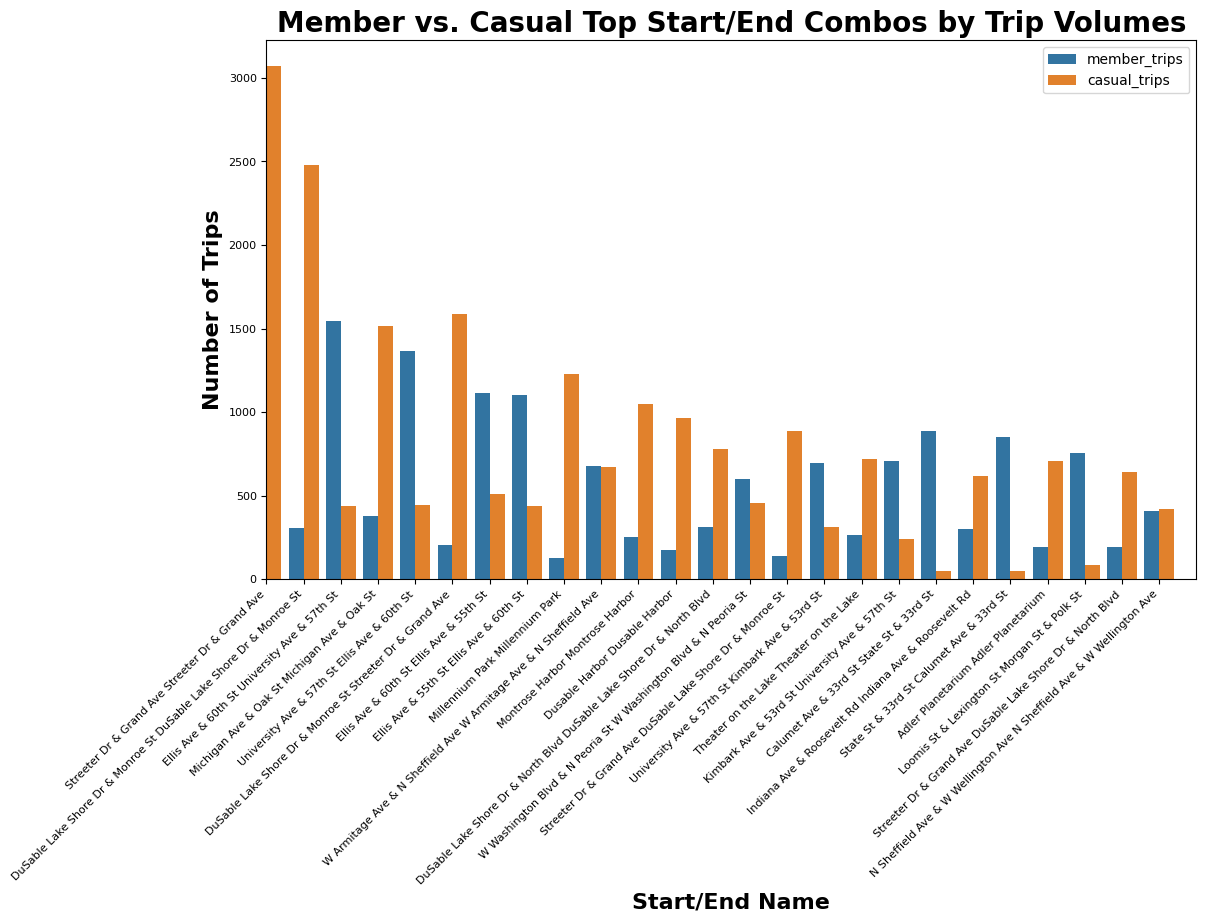

In [50]:
# Check differences in top/bottom start and end station combos between Members and Casual Riders

df1 = df1.replace('nan', np.nan)
df1_nonull = df1.dropna()

start_end_name_vol = pd.DataFrame(df1_nonull['start_end_name'].value_counts().sort_values(ascending=False).reset_index())

start_end_mem_vol = df1_nonull[df1_nonull['member_casual'] == 'member']
start_end_mem_vol = pd.DataFrame(start_end_mem_vol['start_end_name'].value_counts().sort_values(ascending=False).reset_index())

start_end_name_vol = start_end_name_vol.merge(start_end_mem_vol,how='outer',on='start_end_name')
start_end_cas_vol = df1_nonull[df1_nonull['member_casual'] == 'casual']
start_end_cas_vol = pd.DataFrame(start_end_cas_vol['start_end_name'].value_counts().sort_values(ascending=False).reset_index())

start_end_name_vol = start_end_name_vol.merge(start_end_cas_vol,how='outer',on='start_end_name')
start_end_name_vol = start_end_name_vol.rename(columns={'count_x':'total_trips','count_y':'member_trips','count':'casual_trips'})
start_end_name_vol = start_end_name_vol.sort_values(by='total_trips',ascending=False)

print('\033[1mTrips by Start/End Station Combo\033[0m')
display(start_end_name_vol)

print('\033[1mTrips by Start/End Station Combo Summary Statistics\033[0m')
display(start_end_name_vol.describe(include='all'))

start_end_order = start_end_name_vol['start_end_name']
start_end_name_vol = start_end_name_vol.drop(['total_trips'],axis=1).melt(id_vars='start_end_name')
start_end_name_vol = start_end_name_vol.fillna(value=0)
start_end_name_vol['value'] = start_end_name_vol['value'].astype(int)
start_end_name_vol['start_end_name'] = pd.Categorical(start_end_name_vol['start_end_name'],categories=start_end_order)
start_end_name_vol = start_end_name_vol.sort_values(by='start_end_name').reset_index(drop=True)

print('\033[1mTrips by Start/End Station Combo (melted dataframe)\033[0m')
display(start_end_name_vol)

# Top Start/End Station Combos by Member/Casual Rider Barplot

plt.figure(figsize=(12,7))
ax = sns.barplot(x=start_end_name_vol['start_end_name'][:50], y=start_end_name_vol['value'][:50],hue=start_end_name_vol['variable'][:50])
ax.set_title("Member vs. Casual Top Start/End Combos by Trip Volumes",fontsize=20,fontweight='bold')
ax.set_xticks(range(0,25,1))
ax.set_xlim(0,25)
ax.set_xlabel("Start/End Name",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

### Observations/Insights

Of the top 25 start/end station combos by volume in 3QFY23, 12 were round trips and the rest were one-way trips.

Members had more trips at 11 of the top start/end station combos and Casual Riders had more trips at 14 of the top start/end station combos.

Casual Riders had more trips at 11 of the 12 top start/end station combos that were round trips. Each of these round trip start/end station combos are near popular tourist destinations. **It may be the case that a majority of Casual Riders are tourists whereas a majority of the Members population are not.**

Members traveled more different routes (start/end station combos) than Casual Riders in 3QFY23 (109,653 different Member routes and 92,158 different Casual Rider routes) and trips per route varied less widely for Members than Casual Riders.

In [12]:
# Check number of one-way vs. round trip trips for members vs. casual riders

df1 = df1.replace('nan', np.nan)
df1_nonull = df1.dropna()

df1_mem = df1_nonull[df1_nonull['member_casual'] == 'member']
df1_cas = df1_nonull[df1_nonull['member_casual'] == 'casual']

mem_round_trp = df1_mem[df1_mem['start_station_id'] == df1_mem['end_station_id']]
print('\033[1mNumber of Member Round Trips:\033[0m',len(mem_round_trp))

mem_one_way = df1_mem[df1_mem['start_station_id'] != df1_mem['end_station_id']]
print('\033[1mNumber of Member One-Way Trips:\033[0m',len(mem_one_way))

print('\033[1mMember Round Trips %:\033[0m',round((45817/(45817+843826))*100,2),'%')
print('\033[1mMember One-Way Trips %:\033[0m',round((843826/(45817+843826))*100,2),'%')
print('\n')

cas_round_trp = df1_cas[df1_cas['start_station_id'] == df1_cas['end_station_id']]
print('\033[1mNumber of Casual Rider Round Trips:\033[0m',len(cas_round_trp))

cas_one_way = df1_cas[df1_cas['start_station_id'] != df1_cas['end_station_id']]
print('\033[1mNumber of Casual Rider One-Way Trips:\033[0m',len(cas_one_way))

print('\033[1mCasual Rider Round Trips %:\033[0m',round((59962/(59962+499282))*100,2),'%')
print('\033[1mCasual Rider One-Way Trips %:\033[0m',round((499282/(59962+499282))*100,2),'%')

Number of Member Round Trips: 45817
Number of Member One-Way Trips: 843826
Member Round Trips %: 5.15 %
Member One-Way Trips %: 94.85 %


Number of Casual Rider Round Trips: 59962
Number of Casual Rider One-Way Trips: 499282
Casual Rider Round Trips %: 10.72 %
Casual Rider One-Way Trips %: 89.28 %


### Observations/Insights

The Casual Rider proportion of round trips to total Casual Rider trips (10.72%) is over two times greater than the Member proportion of round trips to total Member trips (5.15%).

One-way trips make up the majority of trips overall by a large margin.

In [295]:
# Hypothesis Test to determine validity of the statement that Casual Riders have a higher proportion of round trips than Members.

# •	H0: p <= 0.0515 (the proportion of Casual Rider round trips is less than or equal to 0.0515 (Member's calculated proportion of round trips))
# •	Ha: p > 0.0515 (the proportion of Casual Rider round trips is greater than 0.0515)

# Significance Level: 5%

tstat,pvalue = proportions_ztest(count=59962, nobs=(499282+59962), value=0.0515, alternative='larger', prop_var=False)

print('\033[1mCasual Rider % Round Trips Test Result:\033[0m')
print('T-Statistic:',tstat,' p-value:',pvalue)

Casual Rider % Round Trips Test Result:
T-Statistic: 134.67907456160233  p-value: 0.0


### Hypothesis Testing Result

The p-value from the test is less than the significance level (0.05) so we reject the null hypothesis that the proportion of Casual Rider round trips is less than or equal to 0.0515 (the calculated proportion for Member round trips) in favor of the alternative hypothesis that the proportion of Casual Rider round trips is greater than 0.0515.

Member Round Trip Station Volumes:


start_station_id  count  proportion    cumsum
0            20254.0    676    0.014754  0.014754
1            20247.0    601    0.013117  0.027872
2              13022    516    0.011262  0.039134
3            20256.0    409    0.008927  0.048061
4              13042    381    0.008316  0.056376
..               ...    ...         ...       ...
293              356     54    0.001179  0.798023
294     TA1308000031     54    0.001179  0.799201
292     TA1306000007     54    0.001179  0.796844
291            13109     54    0.001179  0.795665
295     TA1307000140     54    0.001179  0.800380

[296 rows x 4 columns]

Total # Member Round Trip Stations: 952




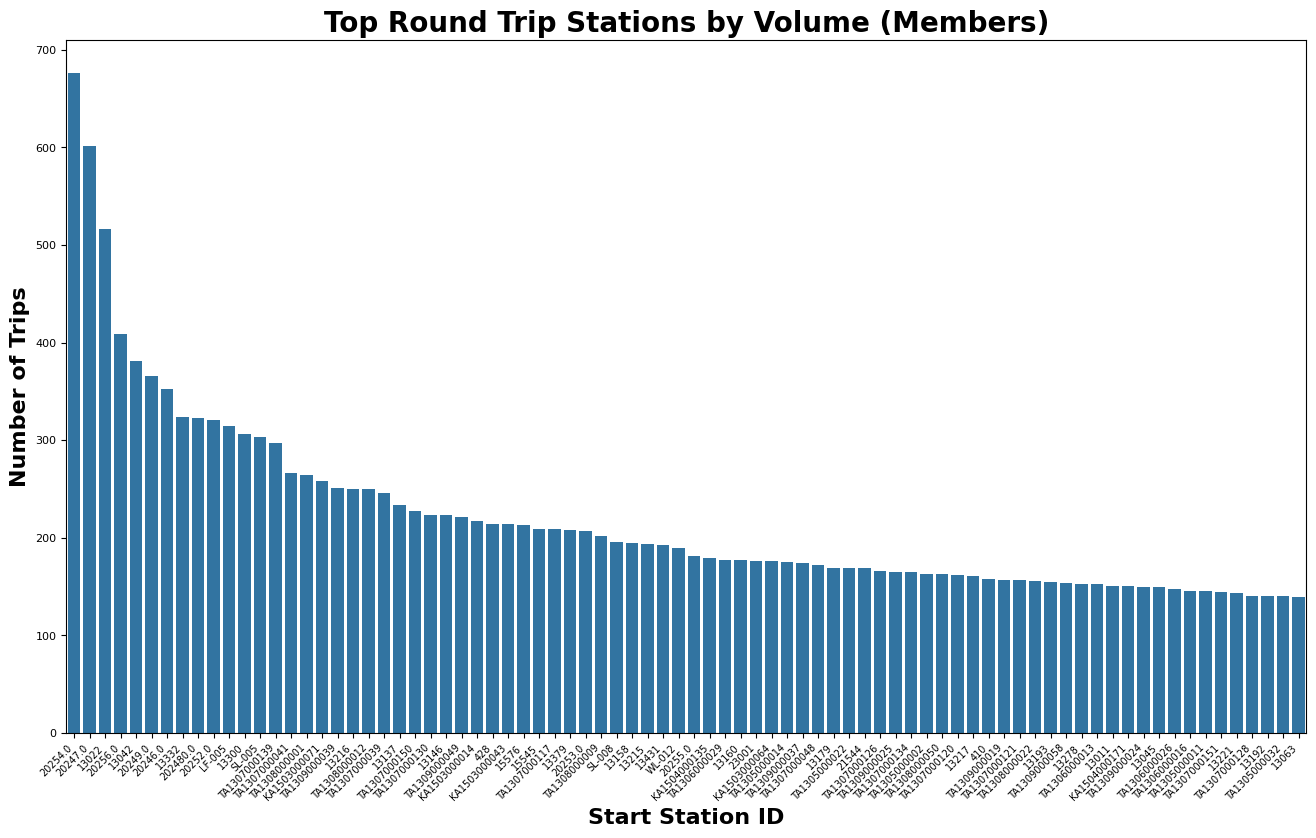

Casual Rider Round Trip Station Volumes:


start_station_id  count  proportion    cumsum
0              13022   3072    0.051232  0.051232
1              13300   2479    0.041343  0.092575
2              13042   1514    0.025249  0.117825
3              13008   1230    0.020513  0.138338
4       TA1308000012   1046    0.017444  0.155782
..               ...    ...         ...       ...
270            15628     51    0.000851  0.797122
271              506     51    0.000851  0.797972
274              624     50    0.000834  0.800474
273     KA1503000002     50    0.000834  0.799640
272     KA1504000079     50    0.000834  0.798806

[275 rows x 4 columns]

Total # Casual Rider Round Trip Stations: 1136




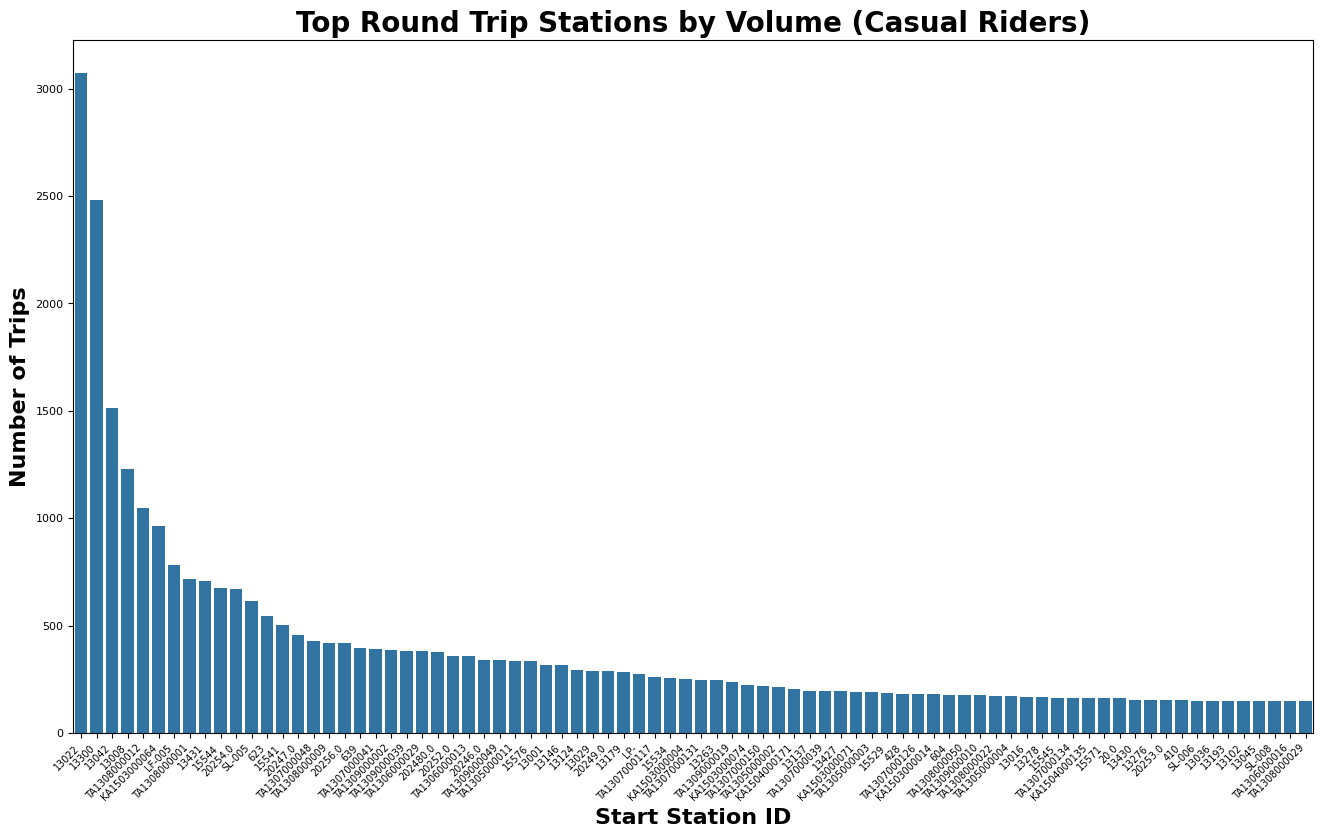

Round Trip Station Volumes (Member + Casual):


start_station_id  count  proportion    cumsum
0              13022   3588    0.033920  0.033920
1              13300   2785    0.026328  0.060248
2              13042   1895    0.017915  0.078163
3              13008   1355    0.012810  0.090973
4            20254.0   1346    0.012725  0.103697
..               ...    ...         ...       ...
293     KA1504000103    101    0.000955  0.797049
294              510    101    0.000955  0.798003
295     TA1307000159    100    0.000945  0.798949
296            13285    100    0.000945  0.799894
297           RP-001    100    0.000945  0.800839

[298 rows x 4 columns]

Total # Round Trip Stations (Member + Casual): 1172




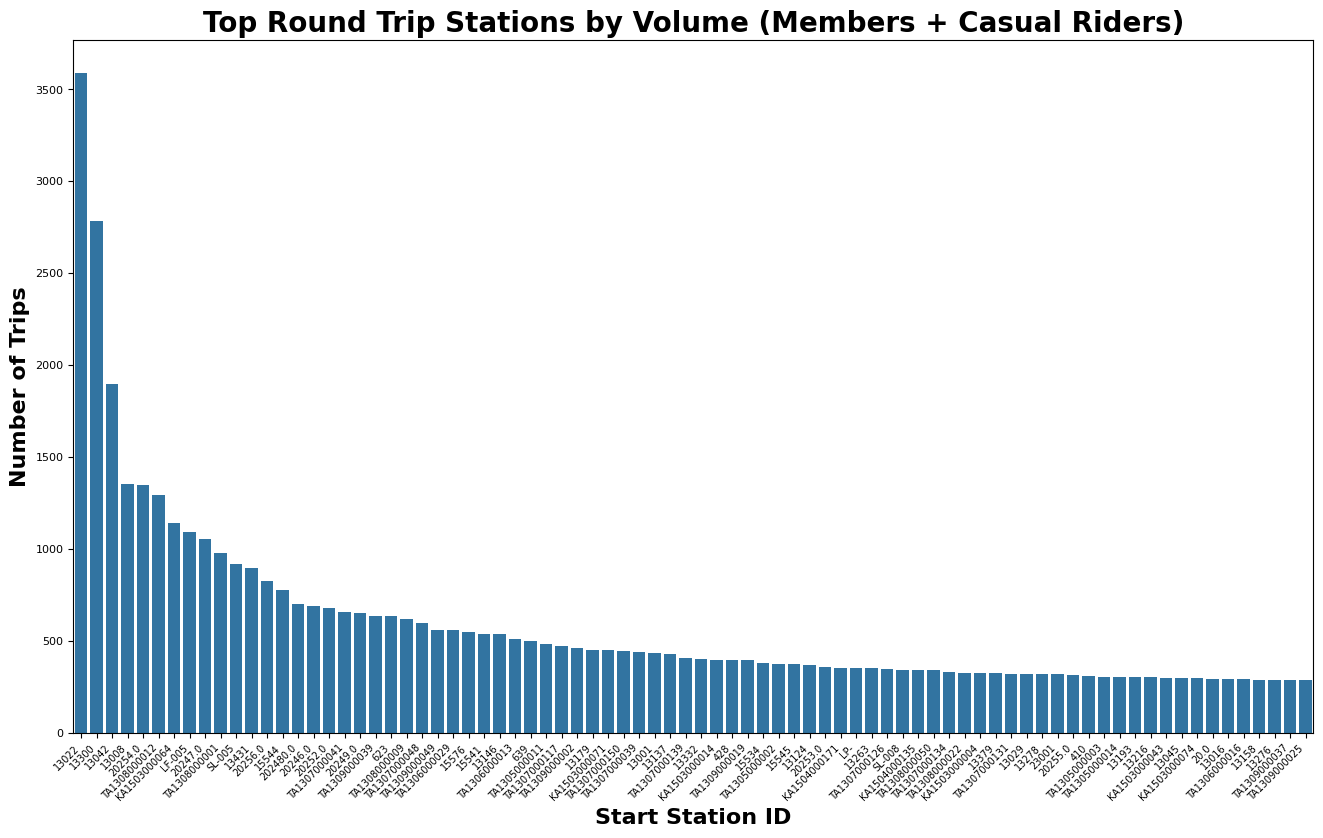

Member Round Trip Stations Not In The Set of Casual Rider Round Trip Stations:
{'KA1504000082', '692', '581', '15599', '1257.0', '601', '550', '18025', '567', '877', '863', '958', '973', '1018', '1147.0', '856', '20217', 'OH Charging Stx - Test', '1271.0', '735', '1132.0', '496', '890', '1110.0', '1213.0', '15597', '1023', '547', '1263.0', '966', '1215.0', '569', '1128.0', '858', '6.21.23 OLD HASTINGS', '876'}
36
Casual Rider Round Trip Stations Not In The Set of Member Round Trip Stations:
{'1246.0', '1233.0', '20228', '16943', '885', '667', '714', '1037', '612', '1243.0', '1122.0', '1131.0', '20221', '807', '543', '871', '1031', '16951', '1208.0', '1273.0', '1074.0', '695', '15691', '1145.0', '1057', '943', '1068', '20133', '836', '1013', '1191.0', '1192.0', '819', '696', '362.0', '476', '584', '542', '15687', '763', '1095.0', '20101', '1020', '20245', '799', '628', '16970', '562', '1011', '870', '577', '1171.0', '20210', '1170.0', '20211', '793', '909', '646', '1227.0', '1230.0', '3

In [14]:
# Check where Member and Casual round trips are occurring

mem_rt_vc_df = pd.DataFrame(mem_round_trp['start_station_id'].value_counts(normalize=True).reset_index())
mem_rt_vc_df['cumsum'] = mem_rt_vc_df['proportion'].cumsum()
mem_rt_vc_cts_df = pd.DataFrame(mem_round_trp['start_station_id'].value_counts().reset_index())
mem_rt_vc_df = mem_rt_vc_df.merge(mem_rt_vc_cts_df,how='outer',on='start_station_id')
mem_rt_vc_df.insert(mem_rt_vc_df.columns.get_loc("proportion"),"count",mem_rt_vc_df.pop("count"))
print('\033[1mMember Round Trip Station Volumes:\033[0m')
mem_rt_vc_df = mem_rt_vc_df.sort_values('proportion',ascending=False)
display(mem_rt_vc_df[mem_rt_vc_df['cumsum'] <= 0.801])
print('\033[1mTotal # Member Round Trip Stations:\033[0m',len(mem_rt_vc_df))
print('\n')

plt.figure(figsize=(16,9))
ax = sns.barplot(x=mem_rt_vc_df['start_station_id'][:80], y=mem_rt_vc_df['count'][:80])
ax.set_title("Top Round Trip Stations by Volume (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start Station ID",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='y', which='major', labelsize=8)
ax.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

cas_rt_vc_df = pd.DataFrame(cas_round_trp['start_station_id'].value_counts(normalize=True).reset_index())
cas_rt_vc_df['cumsum'] = cas_rt_vc_df['proportion'].cumsum()
cas_rt_vc_cts_df = pd.DataFrame(cas_round_trp['start_station_id'].value_counts().reset_index())
cas_rt_vc_df = cas_rt_vc_df.merge(cas_rt_vc_cts_df,how='outer',on='start_station_id')
cas_rt_vc_df.insert(cas_rt_vc_df.columns.get_loc("proportion"),"count",cas_rt_vc_df.pop("count"))
print('\033[1mCasual Rider Round Trip Station Volumes:\033[0m')
cas_rt_vc_df = cas_rt_vc_df.sort_values('proportion',ascending=False)
display(cas_rt_vc_df[cas_rt_vc_df['cumsum'] <= 0.801])
print('\033[1mTotal # Casual Rider Round Trip Stations:\033[0m',len(cas_rt_vc_df))
print('\n')

plt.figure(figsize=(16,9))
ax = sns.barplot(x=cas_rt_vc_df['start_station_id'][:80], y=cas_rt_vc_df['count'][:80])
ax.set_title("Top Round Trip Stations by Volume (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start Station ID",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='y', which='major', labelsize=8)
ax.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

round_trp_df = df1_nonull[df1_nonull['start_station_id'] == df1_nonull['end_station_id']]
rt_vc_df = pd.DataFrame(round_trp_df['start_station_id'].value_counts(normalize=True).reset_index())
rt_vc_df['cumsum'] = rt_vc_df['proportion'].cumsum()
rt_vc_cts_df = pd.DataFrame(round_trp_df['start_station_id'].value_counts().reset_index())
rt_vc_df = rt_vc_df.merge(rt_vc_cts_df,how='outer',on='start_station_id')
rt_vc_df.insert(rt_vc_df.columns.get_loc("proportion"),"count",rt_vc_df.pop("count"))
print('\033[1mRound Trip Station Volumes (Member + Casual):\033[0m')
rt_vc_df = rt_vc_df.sort_values('proportion',ascending=False)
display(rt_vc_df[rt_vc_df['cumsum'] <= 0.801])
print('\033[1mTotal # Round Trip Stations (Member + Casual):\033[0m',len(rt_vc_df))
print('\n')

plt.figure(figsize=(16,9))
ax = sns.barplot(x=rt_vc_df['start_station_id'][:80], y=rt_vc_df['count'][:80])
ax.set_title("Top Round Trip Stations by Volume (Members + Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start Station ID",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='y', which='major', labelsize=8)
ax.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

print('\033[1mMember Round Trip Stations Not In The Set of Casual Rider Round Trip Stations:\033[0m')
print(set(mem_rt_vc_df['start_station_id']).difference(set(cas_rt_vc_df['start_station_id'])))
print(len(set(mem_rt_vc_df['start_station_id']).difference(set(cas_rt_vc_df['start_station_id']))))

print('\033[1mCasual Rider Round Trip Stations Not In The Set of Member Round Trip Stations:\033[0m')
print(set(cas_rt_vc_df['start_station_id']).difference(set(mem_rt_vc_df['start_station_id'])))
print(len(set(cas_rt_vc_df['start_station_id']).difference(set(mem_rt_vc_df['start_station_id']))))

### Observations/Insights

1,172 different stations had round trips in 3QFY23.

952 different stations had Member round trips and 1,136 different stations had Casual Rider round trips.

There are 36 Member round trip stations not in the set of Casual Rider round trip stations and there are 220 Casual Rider round trip stations not in the set of Member round trip stations.

Several of the top Casual Rider round trip stations are popular tourist destinations.

Members' top round trip station was W Armitage Ave & N Sheffield Ave (id: 20254.0), which is next to subway and bus stations. Their second top round trip station was W Washington Blvd & N Peoria St (id: 20247.0), which is next to apartment complexes and a public parking garage.

Casual Riders' top round trip station was Streeter Dr & Grand Ave (id: 13022), which is on the Navy Pier. Their second top round trip station was DuSable Lake Shore Dr & Monroe St (id: 13300), which is on DuSable Harbor next to Maggie Daley and Millenium parks.

Mean Member Trip Duration:  12.42 (95% CI (12.377, 12.456) )
Mean Casual Rider Trip Duration:  22.24 (95% CI (22.118, 22.358) )


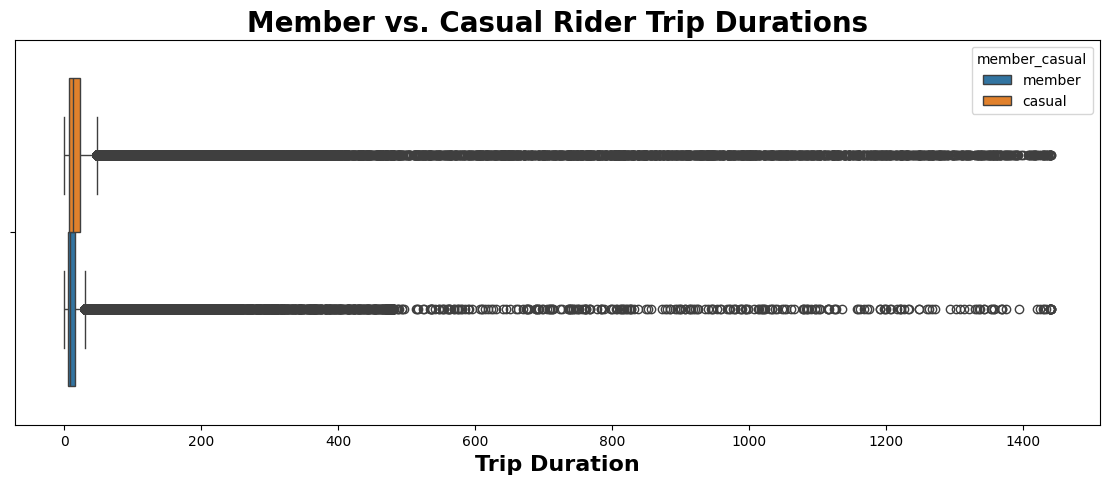

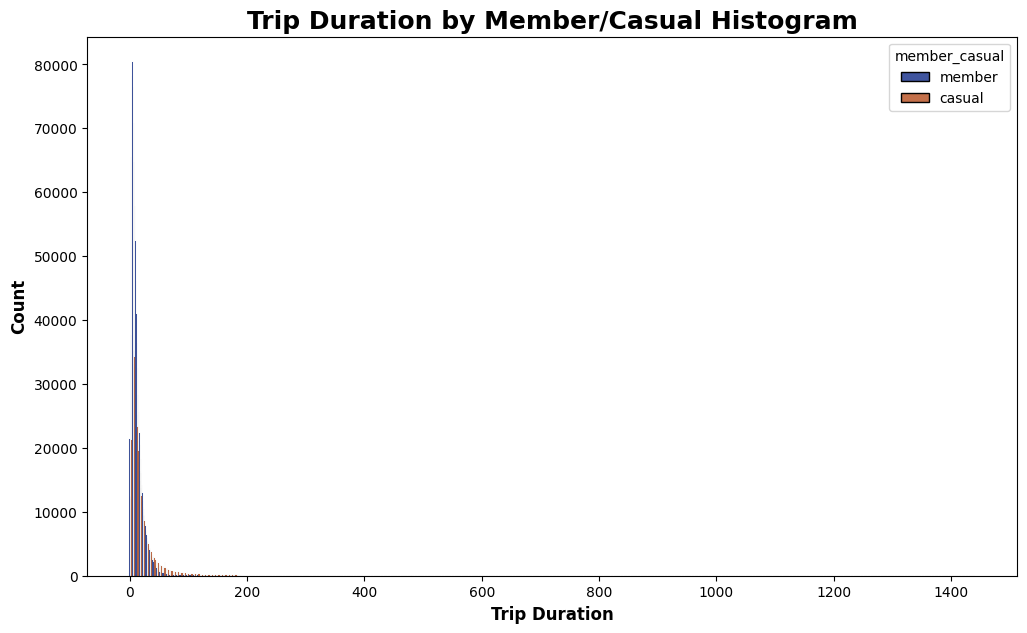

In [19]:
# Check differences in trip durations for Members vs. Casual Riders

df1_mem = df1[df1['member_casual'] == 'member']
df1_cas = df1[df1['member_casual'] == 'casual']

member_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1_mem['duration'].mean(), scale=stats.sem(df1_mem['duration']))
member_duration_mean_CI = (round(member_duration_mean_CI[0],3),round(member_duration_mean_CI[1],3))
print('\033[1mMean Member Trip Duration:\033[0m ',round(df1_mem['duration'].mean(),2),'(95% CI',member_duration_mean_CI,')')

casual_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1_cas['duration'].mean(), scale=stats.sem(df1_cas['duration'])) 
casual_duration_mean_CI = (round(casual_duration_mean_CI[0],3),round(casual_duration_mean_CI[1],3))
print('\033[1mMean Casual Rider Trip Duration:\033[0m ',round(df1_cas['duration'].mean(),2),'(95% CI',casual_duration_mean_CI,')')

# Trip Duration Boxplot

#df1['duration'] = ((df1['duration'].dt.total_seconds()) % 3600) // 60

plt.figure(figsize=(14,5))
ax = sns.boxplot(x=df1['duration'],hue=df1['member_casual'],orient="h");
plt.title('Member vs. Casual Rider Trip Durations',fontsize=20,fontweight='bold');
plt.xlabel('Trip Duration',fontsize=16,fontweight='bold');
ax.invert_yaxis()
plt.show()

# Trip Duration by Member/Casual Rider Histogram

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x='duration', 
                  hue='member_casual',
                  multiple='dodge',
                  discrete=1,
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Trip Duration',fontsize=12,fontweight='bold')
ax.set_ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Trip Duration by Member/Casual Histogram',fontsize=18,fontweight='bold');
plt.show()

### Observations/Insights

Casual Rider trips were about 10 minutes longer than Member trips on average in 3QFY23.

Casual Riders had 90,920 trip duration extreme outliers (above the upper limit of 36.53 minutes) while Members only had 36,951 extreme outliers.

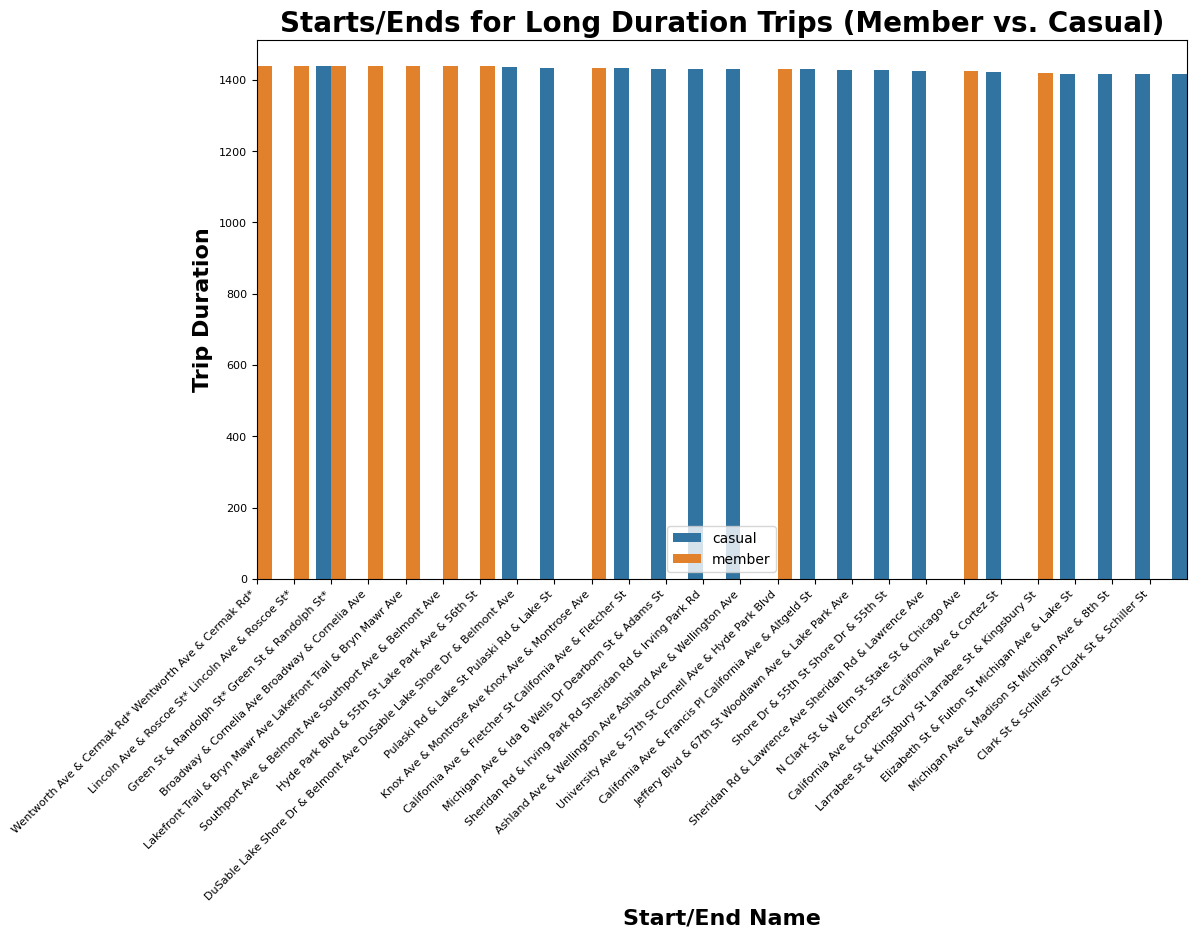

ride_id  rideable_type start_date   end_date    weekday  \
1128255  602EF17B5EA535DB  electric_bike 2023-06-10 2023-06-10   Saturday   
862396   B63562CD66D3A009  electric_bike 2023-05-30 2023-05-30    Tuesday   
1111320  ED7E65A1C3C4E98C  electric_bike 2023-06-23 2023-06-23     Friday   
719925   ABE93D988BB1E190  electric_bike 2023-05-12 2023-05-12     Friday   
63073    15FD035AE63ED487  electric_bike 2023-04-09 2023-04-09     Sunday   
23359    ADBFE4E866050462  electric_bike 2023-04-18 2023-04-18    Tuesday   
1022359  53F48612160AA49F  electric_bike 2023-05-28 2023-05-28     Sunday   
959666   5FD5EAAB77E8226D  electric_bike 2023-05-29 2023-05-29     Monday   
434033   F8A96887EC8281DA   classic_bike 2023-05-28 2023-05-28     Sunday   
179006   1CEB299B0AACB63F  electric_bike 2023-04-19 2023-04-19  Wednesday   
403684   5A4E7A650AFC9912  electric_bike 2023-04-10 2023-04-10     Monday   
1644861  8FE29D1255E8F31A  electric_bike 2023-06-24 2023-06-24   Saturday   
1579981  338C4A5304A9C037  electric_bike 2023-06-18 2023-06-18     Sunday   
922697   61F46D546F0814B2  electric_bike 2023-05-03 2023-05-03  Wednesday   
467243   0769ADA93A16C22C  electric_bike 2023-05-03 2023-05-03  Wednesday   
1120476  ED64748C3F4CF5CD  electric_bike 2023-06-24 2023-06-24   Saturday   
1237868  9DB7FA43D8162EDF  electric_bike 2023-06-08 2023-06-08   Thursday   
1024616  021017D812C7C4E6  electric_bike 2023-05-27 2023-05-27   Saturday   
518114   3DBAEB5665AB95C5  electric_bike 2023-05-30 2023-05-30    Tuesday   
1615769  26AA5BB1931491AC  electric_bike 2023-06-26 2023-06-26     Monday   
687730   88C39F523D5A6774  electric_bike 2023-05-16 2023-05-16    Tuesday   
1058656  8D2E99C45E41E9A8  electric_bike 2023-06-10 2023-06-10   Saturday   
1268549  98A3EB715D796954  electric_bike 2023-06-21 2023-06-21  Wednesday   
1268440  BE2423C921F3819B   classic_bike 2023-06-02 2023-06-02     Friday   
210394   9535EFA9ED21D15E  electric_bike 2023-04-25 2023-04-25    Tuesday   
257775   398A7BBD4625ECEA  electric_bike 2023-04-28 2023-04-28     Friday   
1618324  B6516E334173ABED  electric_bike 2023-06-08 2023-06-08   Thursday   
1619080  37A1387E7B6844E2  electric_bike 2023-06-15 2023-06-15   Thursday   
1071640  CA104B1205F30384  electric_bike 2023-06-06 2023-06-06    Tuesday   
217542   BA74DD730644F2F9  electric_bike 2023-04-06 2023-04-06   Thursday   

         weekend          start_time            end_time    time_of_day  \
1128255        1 1900-01-01 23:56:49 1900-01-01 23:56:49          night   
862396         0 1900-01-01 20:51:51 1900-01-01 20:51:51          night   
1111320        0 1900-01-01 08:36:21 1900-01-01 08:36:21    mid morning   
719925         0 1900-01-01 00:15:34 1900-01-01 00:15:34  early morning   
63073          1 1900-01-01 06:29:48 1900-01-01 06:29:48    mid morning   
23359          0 1900-01-01 07:25:25 1900-01-01 07:25:25    mid morning   
1022359        1 1900-01-01 07:57:24 1900-01-01 07:57:24    mid morning   
959666         0 1900-01-01 15:58:50 1900-01-01 15:58:50      afternoon   
434033         1 1900-01-01 19:42:19 1900-01-01 19:42:19        evening   
179006         0 1900-01-01 16:28:53 1900-01-01 16:28:53        evening   
403684         0 1900-01-01 16:59:02 1900-01-01 16:59:02        evening   
1644861        1 1900-01-01 11:28:04 1900-01-01 11:28:04   late morning   
1579981        1 1900-01-01 03:12:46 1900-01-01 03:12:46  early morning   
922697         0 1900-01-01 13:16:35 1900-01-01 13:16:35      afternoon   
467243         0 1900-01-01 19:10:12 1900-01-01 19:10:12        evening   
1120476        1 1900-01-01 15:08:00 1900-01-01 15:08:00      afternoon   
1237868        0 1900-01-01 16:53:05 1900-01-01 16:53:05        evening   
1024616        1 1900-01-01 10:15:15 1900-01-01 10:15:15   late morning   
518114         0 1900-01-01 13:06:50 1900-01-01 13:06:50      afternoon   
1615769        0 1900-01-01 20:01:56 1900-01-01 20:01:56          night   
687730         0 1900-01-01 07:15:20 1900-01-01 07:15:2

In [14]:
# Long trip 'duration' vs. 'start_end_station'

df1 = df1.replace('nan', np.nan)

df1_nonull = df1.dropna()

duration_sorted_df = df1_nonull.sort_values(by='duration',ascending=False)

#display(duration_sorted_df.head(30))

plt.figure(figsize=(12,7))
ax = sns.barplot(x=duration_sorted_df['start_end_name'][:50], y=duration_sorted_df['duration'][:50],hue=duration_sorted_df['member_casual'][:50])
ax.set_title("Starts/Ends for Long Duration Trips (Member vs. Casual)",fontsize=20,fontweight='bold')
ax.set_xticks(range(0,25,1))
ax.set_xlim(0,25)
ax.set_xlabel("Start/End Name",fontsize=16,fontweight='bold')
ax.set_ylabel("Trip Duration",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Short trip 'duration' vs. 'start_end_station'

duration_sorted_df = df1.sort_values(by='duration',ascending=True)
display(duration_sorted_df.head(30))

# plt.figure(figsize=(12,7))
#ax = sns.barplot(x=duration_sorted_df['start_end_name'][:50], y=duration_sorted_df['duration'][:50],hue=duration_sorted_df['member_casual'][:50])
#ax.set_title("Starts/Ends for Short Duration Trips (Member vs. Casual)",fontsize=20,fontweight='bold')
#ax.set_xticks(range(0,25,1))
#ax.set_xlim(0,25)
#ax.set_xlabel("Start/End Name",fontsize=16,fontweight='bold')
#ax.set_ylabel("Trip Duration",fontsize=16,fontweight='bold')
#ax.tick_params(axis='both', which='major', labelsize=8)
#plt.xticks(rotation=45, horizontalalignment='right')
#ax.legend()
# plt.show()

### Observations/Insights

17 of the top 25 longest duration trips were round trips.

28 of the 30 shortest duration trips were electric bikes.

Docked Bike AVG Trip Duration: 66.14 (95% CI (64.651, 67.627) )


Classic Bike AVG Trip Duration (Overall): 18.07 (95% CI (17.984, 18.155) )
Classic Bike AVG Trip Duration (Members): 13.62 (95% CI (13.549, 13.689) )
Classic Bike AVG Trip Duration (Casual Riders): 26.61 (95% CI (26.4, 26.814) )


Electric Bike AVG Trip Duration (Overall): 12.9 (95% CI (12.863, 12.931) )
Electric Bike AVG Trip Duration (Members): 11.38 (95% CI (11.336, 11.419) )
Electric Bike AVG Trip Duration (Casual Riders): 15.14 (95% CI (15.088, 15.2) )


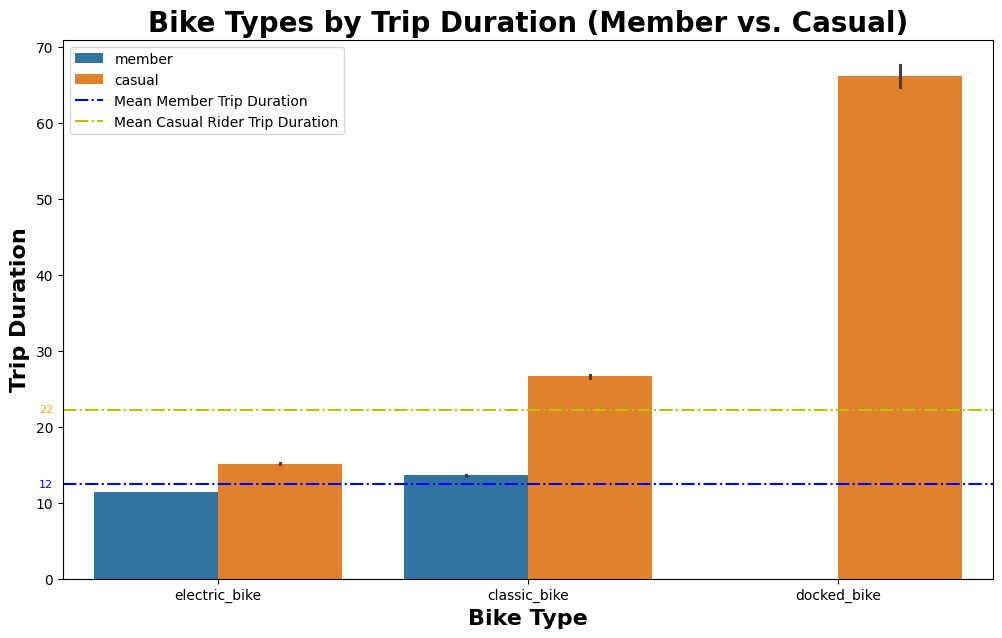

In [20]:
# Duration by bike type (member vs. casual)

duration_sorted_df = df1.sort_values(by='duration',ascending=False)

docked_df = df1[df1['rideable_type'] == 'docked_bike']
docked_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=docked_df['duration'].mean(), scale=stats.sem(docked_df['duration']))
docked_duration_mean_CI = (round(docked_duration_mean_CI[0],3),round(docked_duration_mean_CI[1],3)) 
print('\033[1mDocked Bike AVG Trip Duration:\033[0m',round(docked_df['duration'].mean(),2),'(95% CI',docked_duration_mean_CI,')')
print('\n')
      
classic_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1[df1['rideable_type'] == 'classic_bike']['duration'].mean(), 
                                               scale=stats.sem(df1[df1['rideable_type'] == 'classic_bike']['duration']))
classic_duration_mean_CI = (round(classic_duration_mean_CI[0],3),round(classic_duration_mean_CI[1],3)) 
print('\033[1mClassic Bike AVG Trip Duration (Overall):\033[0m',round(df1[df1['rideable_type'] == 'classic_bike']['duration'].mean(),2),'(95% CI',classic_duration_mean_CI,')')

classic_mem_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1[(df1['rideable_type'] == 'classic_bike') & (df1['member_casual'] == 'member')]['duration'].mean(), 
                                                   scale=stats.sem(df1[(df1['rideable_type'] == 'classic_bike') & (df1['member_casual'] == 'member')]['duration']))
classic_mem_duration_mean_CI = (round(classic_mem_duration_mean_CI[0],3),round(classic_mem_duration_mean_CI[1],3)) 
print('\033[1mClassic Bike AVG Trip Duration (Members):\033[0m',round(df1[(df1['rideable_type'] == 'classic_bike') & (df1['member_casual'] == 'member')]['duration'].mean(),2),'(95% CI',classic_mem_duration_mean_CI,')')

classic_cas_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1[(df1['rideable_type'] == 'classic_bike') & (df1['member_casual'] == 'casual')]['duration'].mean(), 
                                                   scale=stats.sem(df1[(df1['rideable_type'] == 'classic_bike') & (df1['member_casual'] == 'casual')]['duration']))
classic_cas_duration_mean_CI = (round(classic_cas_duration_mean_CI[0],3),round(classic_cas_duration_mean_CI[1],3)) 
print('\033[1mClassic Bike AVG Trip Duration (Casual Riders):\033[0m',round(df1[(df1['rideable_type'] == 'classic_bike') & (df1['member_casual'] == 'casual')]['duration'].mean(),2),'(95% CI',classic_cas_duration_mean_CI,')')
print('\n')

electric_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1[df1['rideable_type'] == 'electric_bike']['duration'].mean(), 
                                                scale=stats.sem(df1[df1['rideable_type'] == 'electric_bike']['duration']))
electric_duration_mean_CI = (round(electric_duration_mean_CI[0],3),round(electric_duration_mean_CI[1],3)) 
print('\033[1mElectric Bike AVG Trip Duration (Overall):\033[0m',round(df1[df1['rideable_type'] == 'electric_bike']['duration'].mean(),2),'(95% CI',electric_duration_mean_CI,')')

electric_mem_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1[(df1['rideable_type'] == 'electric_bike') & (df1['member_casual'] == 'member')]['duration'].mean(), 
                                                    scale=stats.sem(df1[(df1['rideable_type'] == 'electric_bike') & (df1['member_casual'] == 'member')]['duration']))
electric_mem_duration_mean_CI = (round(electric_mem_duration_mean_CI[0],3),round(electric_mem_duration_mean_CI[1],3)) 
print('\033[1mElectric Bike AVG Trip Duration (Members):\033[0m',round(df1[(df1['rideable_type'] == 'electric_bike') & (df1['member_casual'] == 'member')]['duration'].mean(),2),'(95% CI',electric_mem_duration_mean_CI,')')

electric_cas_duration_mean_CI = stats.norm.interval(confidence=0.95, loc=df1[(df1['rideable_type'] == 'electric_bike') & (df1['member_casual'] == 'casual')]['duration'].mean(), 
                                                    scale=stats.sem(df1[(df1['rideable_type'] == 'electric_bike') & (df1['member_casual'] == 'casual')]['duration']))
electric_cas_duration_mean_CI = (round(electric_cas_duration_mean_CI[0],3),round(electric_cas_duration_mean_CI[1],3)) 
print('\033[1mElectric Bike AVG Trip Duration (Casual Riders):\033[0m',round(df1[(df1['rideable_type'] == 'electric_bike') & (df1['member_casual'] == 'casual')]['duration'].mean(),2),'(95% CI',electric_cas_duration_mean_CI,')')

plt.figure(figsize=(12,7))
ax = sns.barplot(x=duration_sorted_df['rideable_type'], y=duration_sorted_df['duration'],hue=duration_sorted_df['member_casual'],hue_order=['member','casual'])
ax.set_title("Bike Types by Trip Duration (Member vs. Casual)",fontsize=20,fontweight='bold')
ax.set_xlabel("Bike Type",fontsize=16,fontweight='bold')
ax.set_ylabel("Trip Duration",fontsize=16,fontweight='bold')
ax.axhline(df1_mem['duration'].mean(),color='b',linestyle='-.',label='Mean Member Trip Duration')
ax.axhline(df1_cas['duration'].mean(),color='y',linestyle='-.',label='Mean Casual Rider Trip Duration')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,df1_mem['duration'].mean(), "{:.0f}".format(df1_mem['duration'].mean()), color="blue", transform=trans, ha="right", va="center",fontsize=8)
ax.text(0,df1_cas['duration'].mean(), "{:.0f}".format(df1_cas['duration'].mean()), color="orange", transform=trans, ha="right", va="center",fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend()
plt.show()

### Observations/Insights

Only Casual Riders used docked bikes in 3QFY23 and docked bike trips had much longer trip durations on average compared to the other bike types.

Docked bike trips were 66.14 minutes on average. Classic bikes had the next highest average trip duration (18.07 minutes) and electric bikes had the lowest average trip duration (12.9 minutes).

Casual Rider trips were longer on average than Member trips for both Classic bikes and Electric bikes. Casual Rider Classic bike trips were 26.61 minutes on average compared to only 13.62 minutes for Member trips (about twice as long). Casual Rider Electric bike trips were 15.14 minutes on average compared to 11.38 minutes on average for Member trips.

Time of Day by Trip Duration (Members vs. Casual Riders)


time_of_day member_casual  avg_duration  conf_int_lb  conf_int_ub
0   early morning        casual     19.263952       19.139       19.389
1   early morning        member     11.303858       11.179       11.428
2     mid morning        casual     15.108646       14.984       15.233
3     mid morning        member     10.994575       10.870       11.119
4    late morning        casual     24.598696       24.474       24.723
5    late morning        member     12.178555       12.054       12.303
6       afternoon        casual     25.459927       25.335       25.585
7       afternoon        member     12.702940       12.578       12.828
8         evening        casual     21.761783       21.637       21.886
9         evening        member     13.160168       13.036       13.285
10          night        casual     19.409419       19.285       19.534
11          night        member     11.981574       11.857       12.106

Time of Day by Trip Duration (Overall)


time_of_day  avg_duration  conf_int_lb  conf_int_ub
0  early morning     15.075461       14.917       15.234
1    mid morning     11.952568       11.794       12.111
2   late morning     16.862878       16.704       17.021
3      afternoon     18.283581       18.125       18.442
4        evening     16.506356       16.348       16.665
5          night     15.188526       15.030       15.347

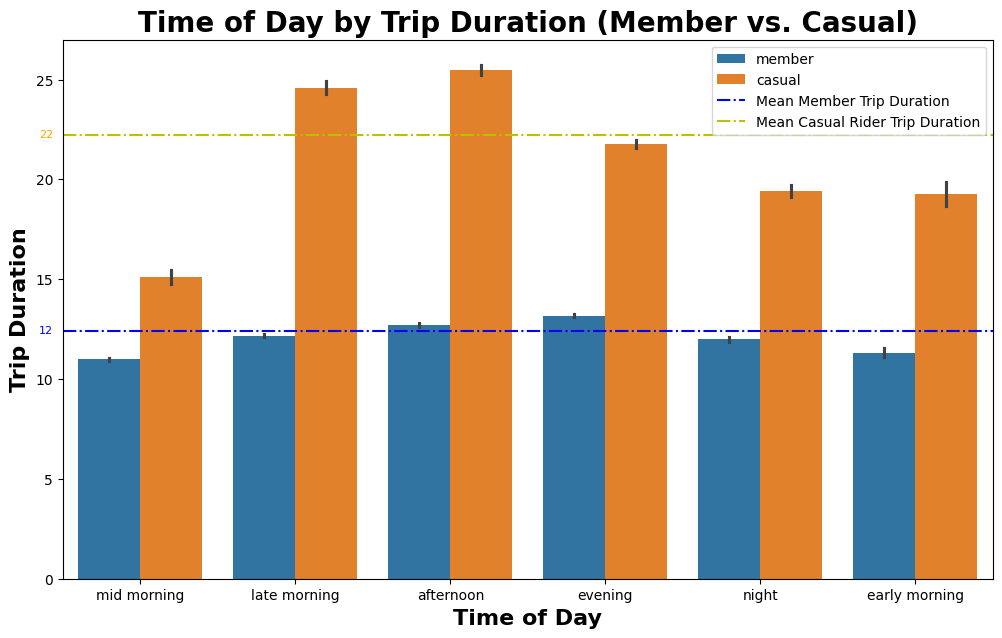

In [49]:
# Time of Day by Trip Duration

def make_ci_columns(mean_col,est_SE_col):
    CI_list = []
    for x in mean_col: 
        for y in est_SE_col:
            if x == 0 or y == 0:
                CI_list.append(('NaN','NaN'))
            else:
                CI = stats.norm.interval(confidence=0.95, loc=x, scale=y)
                CI = (round(CI[0],3),round(CI[1],3))
        CI_list.append(CI)
    return pd.DataFrame(CI_list,columns=['conf_int_lb','conf_int_ub'],dtype=float)

eam_mem_duration = df1[(df1['time_of_day'] == 'early morning') & (df1['member_casual'] == 'member')]['duration']
eam_cas_duration = df1[(df1['time_of_day'] == 'early morning') & (df1['member_casual'] == 'casual')]['duration']
midam_cas_duration = df1[(df1['time_of_day'] == 'mid morning') & (df1['member_casual'] == 'casual')]['duration']
midam_mem_duration = df1[(df1['time_of_day'] == 'mid morning') & (df1['member_casual'] == 'member')]['duration']
lateam_mem_duration = df1[(df1['time_of_day'] == 'late morning') & (df1['member_casual'] == 'member')]['duration']
lateam_cas_duration = df1[(df1['time_of_day'] == 'late morning') & (df1['member_casual'] == 'casual')]['duration']
afternoon_cas_duration = df1[(df1['time_of_day'] == 'afternoon') & (df1['member_casual'] == 'casual')]['duration']
afternoon_mem_duration = df1[(df1['time_of_day'] == 'afternoon') & (df1['member_casual'] == 'member')]['duration']
evening_mem_duration = df1[(df1['time_of_day'] == 'evening') & (df1['member_casual'] == 'member')]['duration']
evening_cas_duration = df1[(df1['time_of_day'] == 'evening') & (df1['member_casual'] == 'casual')]['duration']
night_cas_duration = df1[(df1['time_of_day'] == 'night') & (df1['member_casual'] == 'casual')]['duration']
night_mem_duration = df1[(df1['time_of_day'] == 'night') & (df1['member_casual'] == 'member')]['duration']

tod_duration_est_SE = pd.DataFrame([stats.sem(afternoon_cas_duration),stats.sem(afternoon_mem_duration),stats.sem(eam_cas_duration),stats.sem(eam_mem_duration),
                                    stats.sem(evening_cas_duration),stats.sem(evening_mem_duration),stats.sem(lateam_cas_duration),stats.sem(lateam_mem_duration),
                                    stats.sem(midam_cas_duration),stats.sem(midam_mem_duration),stats.sem(night_cas_duration),stats.sem(night_mem_duration)])
#display(tod_duration_est_SE)

tod_duration_mean_df = pd.DataFrame(df1.groupby(by=['time_of_day','member_casual'])['duration'].mean().reset_index())
tod_duration_mean_df = tod_duration_mean_df.rename(columns={'duration':'avg_duration'})
tod_duration_mean_CI_columns = make_ci_columns(tod_duration_mean_df['avg_duration'],tod_duration_est_SE[0])
tod_duration_mean_df = tod_duration_mean_df.merge(tod_duration_mean_CI_columns,left_index=True,right_index=True)
time_order = ['early morning','mid morning','late morning','afternoon','evening','night']
tod_duration_mean_df['time_of_day'] = pd.Categorical(tod_duration_mean_df['time_of_day'],categories=time_order)
tod_duration_mean_df = tod_duration_mean_df.sort_values(by='time_of_day').reset_index(drop=True)

print('\033[1mTime of Day by Trip Duration (Members vs. Casual Riders)\033[0m')
display(tod_duration_mean_df)

afternoon_duration = df1[df1['time_of_day'] == 'afternoon']['duration']
eam_duration = df1[df1['time_of_day'] == 'early morning']['duration']
evening_duration = df1[df1['time_of_day'] == 'evening']['duration']
lateam_duration = df1[df1['time_of_day'] == 'late morning']['duration']
midam_duration = df1[df1['time_of_day'] == 'mid morning']['duration']
night_duration = df1[df1['time_of_day'] == 'night']['duration']

tod_overall_duration_est_SE = pd.DataFrame([stats.sem(afternoon_duration),stats.sem(eam_duration),stats.sem(evening_duration),stats.sem(lateam_duration),
                                    stats.sem(midam_duration),stats.sem(night_duration)])
#display(tod_overall_duration_est_SE)

tod_duration_overall_mean_df = pd.DataFrame(df1.groupby(by=['time_of_day'])['duration'].mean().reset_index())
tod_duration_overall_mean_df = tod_duration_overall_mean_df.rename(columns={'duration':'avg_duration'})
tod_duration_overall_mean_CI_columns = make_ci_columns(tod_duration_overall_mean_df['avg_duration'],tod_overall_duration_est_SE[0])
tod_duration_overall_mean_df = tod_duration_overall_mean_df.merge(tod_duration_overall_mean_CI_columns,left_index=True,right_index=True)
time_order = ['early morning','mid morning','late morning','afternoon','evening','night']
tod_duration_overall_mean_df['time_of_day'] = pd.Categorical(tod_duration_overall_mean_df['time_of_day'],categories=time_order)
tod_duration_overall_mean_df = tod_duration_overall_mean_df.sort_values(by='time_of_day').reset_index(drop=True)

print('\033[1mTime of Day by Trip Duration (Overall)\033[0m')
display(tod_duration_overall_mean_df)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=df1['time_of_day'], y=df1['duration'],hue=df1['member_casual'])
ax.set_title("Time of Day by Trip Duration (Member vs. Casual)",fontsize=20,fontweight='bold')
ax.set_xlabel("Time of Day",fontsize=16,fontweight='bold')
ax.set_ylabel("Trip Duration",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.axhline(df1_mem['duration'].mean(),color='b',linestyle='-.',label='Mean Member Trip Duration')
ax.axhline(df1_cas['duration'].mean(),color='y',linestyle='-.',label='Mean Casual Rider Trip Duration')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,df1_mem['duration'].mean(), "{:.0f}".format(df1_mem['duration'].mean()), color="blue", transform=trans, ha="right", va="center",fontsize=8)
ax.text(0,df1_cas['duration'].mean(), "{:.0f}".format(df1_cas['duration'].mean()), color="orange", transform=trans, ha="right", va="center",fontsize=8)
ax.legend()
plt.show()

### Observations/Insights

Time of Day categories are defined as follows:

- **Early morning:** midnight - 6 AM
- **Mid morning:** 6 AM - 9 AM
- **Late morning:** 9 AM - 12 PM
- **Afternoon:** 12 PM - 4 PM
- **Evening:** 4 PM - 8 PM
- **Night:** 8 PM - midnight

Overall, afternoon trips had the highest average trip duration (18.28 minutes) and mid-morning trips had the lowest average trip duration in 3QFY23 (11.95 minutes).

On average, Casual Rider trips were longer in duration than Member trips at all times of the day. The biggest differences in average duration between Casual Riders and Members was in the Late Morning and Afternoon, where Casual Rider trips were over 12 minutes longer on average than Member trips.

Weekday by Trip Duration (Members vs. Casual Riders)


weekday member_casual  avg_duration  conf_int_lb  conf_int_ub
0      Monday        casual     22.200963       22.066       22.336
1      Monday        member     11.716048       11.581       11.851
2     Tuesday        casual     19.381731       19.247       19.517
3     Tuesday        member     11.833627       11.699       11.969
4   Wednesday        casual     19.104914       18.970       19.240
5   Wednesday        member     11.837901       11.703       11.973
6    Thursday        casual     19.647477       19.512       19.782
7    Thursday        member     12.007290       11.872       12.142
8      Friday        casual     21.615371       21.480       21.750
9      Friday        member     12.290776       12.156       12.426
10   Saturday        casual     25.271133       25.136       25.406
11   Saturday        member     14.002863       13.868       14.138
12     Sunday        casual     25.724260       25.589       25.859
13     Sunday        member     13.750710       13.616       13.886

Weekday by Trip Duration (Overall)


weekday  avg_duration  conf_int_lb  conf_int_ub
0     Monday     15.411323       15.232       15.591
1    Tuesday     14.227734       14.048       14.407
2  Wednesday     14.216005       14.036       14.396
3   Thursday     14.657690       14.478       14.837
4     Friday     16.047186       15.868       16.227
5   Saturday     19.594016       19.414       19.774
6     Sunday     19.439805       19.260       19.619

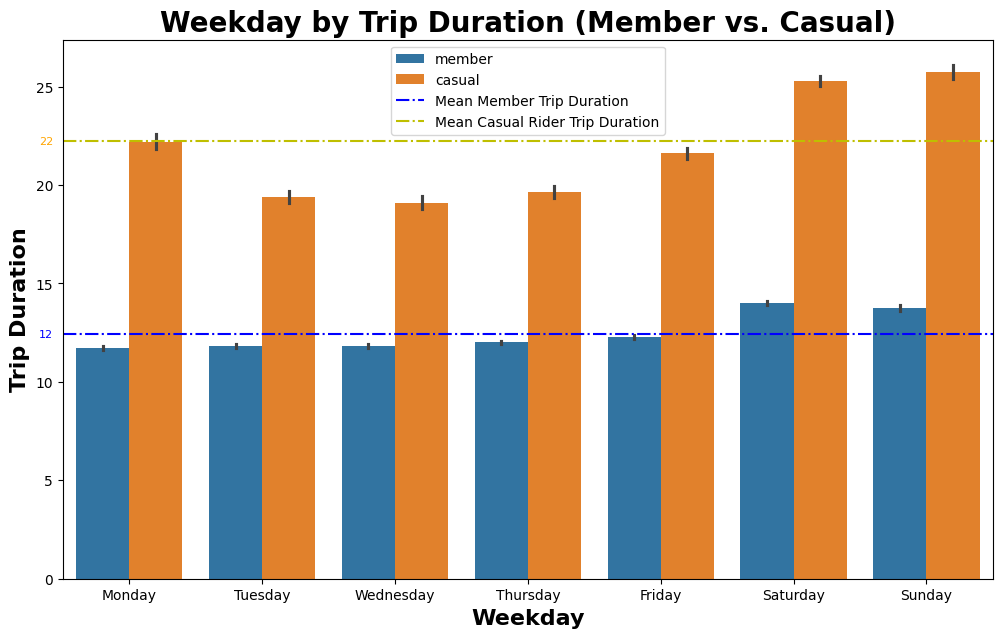

In [48]:
# Weekday by Trip Duration

mon_mem_duration = df1[(df1['weekday'] == 'Monday') & (df1['member_casual'] == 'member')]['duration']
mon_cas_duration = df1[(df1['weekday'] == 'Monday') & (df1['member_casual'] == 'casual')]['duration']
tues_cas_duration = df1[(df1['weekday'] == 'Tuesday') & (df1['member_casual'] == 'casual')]['duration']
tues_mem_duration = df1[(df1['weekday'] == 'Tuesday') & (df1['member_casual'] == 'member')]['duration']
wed_mem_duration = df1[(df1['weekday'] == 'Wednesday') & (df1['member_casual'] == 'member')]['duration']
wed_cas_duration = df1[(df1['weekday'] == 'Wednesday') & (df1['member_casual'] == 'casual')]['duration']
thurs_cas_duration = df1[(df1['weekday'] == 'Thursday') & (df1['member_casual'] == 'casual')]['duration']
thurs_mem_duration = df1[(df1['weekday'] == 'Thursday') & (df1['member_casual'] == 'member')]['duration']
fri_mem_duration = df1[(df1['weekday'] == 'Friday') & (df1['member_casual'] == 'member')]['duration']
fri_cas_duration = df1[(df1['weekday'] == 'Friday') & (df1['member_casual'] == 'casual')]['duration']
sat_cas_duration = df1[(df1['weekday'] == 'Saturday') & (df1['member_casual'] == 'casual')]['duration']
sat_mem_duration = df1[(df1['weekday'] == 'Saturday') & (df1['member_casual'] == 'member')]['duration']
sun_cas_duration = df1[(df1['weekday'] == 'Sunday') & (df1['member_casual'] == 'casual')]['duration']
sun_mem_duration = df1[(df1['weekday'] == 'Sunday') & (df1['member_casual'] == 'member')]['duration']

weekday_duration_est_SE = pd.DataFrame([stats.sem(mon_cas_duration),stats.sem(mon_mem_duration),stats.sem(tues_cas_duration),stats.sem(tues_mem_duration),
                                    stats.sem(wed_cas_duration),stats.sem(wed_mem_duration),stats.sem(thurs_cas_duration),stats.sem(thurs_mem_duration),
                                    stats.sem(fri_cas_duration),stats.sem(fri_mem_duration),stats.sem(sat_cas_duration),stats.sem(sat_mem_duration),
                                    stats.sem(sun_cas_duration),stats.sem(sun_mem_duration)])
#display(weekday_duration_est_SE)

weekday_duration_mean_df = pd.DataFrame(df1.groupby(by=['weekday','member_casual'])['duration'].mean().reset_index())
weekday_duration_mean_df = weekday_duration_mean_df.rename(columns={'duration':'avg_duration'})
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_duration_mean_df['weekday'] = pd.Categorical(weekday_duration_mean_df['weekday'],categories=weekday_order)
weekday_duration_mean_df = weekday_duration_mean_df.sort_values(by='weekday').reset_index(drop=True)
weekday_duration_mean_df_CI_columns = make_ci_columns(weekday_duration_mean_df['avg_duration'],weekday_duration_est_SE[0])
weekday_duration_mean_df = weekday_duration_mean_df.merge(weekday_duration_mean_df_CI_columns,left_index=True,right_index=True)

print('\033[1mWeekday by Trip Duration (Members vs. Casual Riders)\033[0m')
display(weekday_duration_mean_df)

mon_duration = df1[df1['weekday'] == 'Monday']['duration']
tues_duration = df1[df1['weekday'] == 'Tuesday']['duration']
wed_duration = df1[df1['weekday'] == 'Wednesday']['duration']
thurs_duration = df1[df1['weekday'] == 'Thursday']['duration']
fri_duration = df1[df1['weekday'] == 'Friday']['duration']
sat_duration = df1[df1['weekday'] == 'Saturday']['duration']
sun_duration = df1[df1['weekday'] == 'Sunday']['duration']

weekday_overall_duration_est_SE = pd.DataFrame([stats.sem(mon_duration),stats.sem(tues_duration),stats.sem(wed_duration),stats.sem(thurs_duration),
                                    stats.sem(fri_duration),stats.sem(sat_duration),stats.sem(sun_duration)])
#display(weekday_overall_duration_est_SE)

weekday_overall_duration_mean_df = pd.DataFrame(df1.groupby(by='weekday')['duration'].mean().reset_index())
weekday_overall_duration_mean_df = weekday_overall_duration_mean_df.rename(columns={'duration':'avg_duration'})
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_overall_duration_mean_df['weekday'] = pd.Categorical(weekday_overall_duration_mean_df['weekday'],categories=weekday_order)
weekday_overall_duration_mean_df = weekday_overall_duration_mean_df.sort_values(by='weekday').reset_index(drop=True)
weekday_overall_duration_mean_df_CI_columns = make_ci_columns(weekday_overall_duration_mean_df['avg_duration'],weekday_overall_duration_est_SE[0])
weekday_overall_duration_mean_df = weekday_overall_duration_mean_df.merge(weekday_overall_duration_mean_df_CI_columns,left_index=True,right_index=True)

print('\033[1mWeekday by Trip Duration (Overall)\033[0m')
display(weekday_overall_duration_mean_df)

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_sorted_df = df1.copy()
weekday_sorted_df['weekday'] = pd.Categorical(weekday_sorted_df['weekday'],categories=weekday_order)
weekday_sorted_df = weekday_sorted_df.sort_values(by='weekday')

plt.figure(figsize=(12,7))
ax = sns.barplot(x=weekday_sorted_df['weekday'], y=weekday_sorted_df['duration'],hue=weekday_sorted_df['member_casual'])
ax.set_title("Weekday by Trip Duration (Member vs. Casual)",fontsize=20,fontweight='bold')
ax.set_xlabel("Weekday",fontsize=16,fontweight='bold')
ax.set_ylabel("Trip Duration",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.axhline(df1_mem['duration'].mean(),color='b',linestyle='-.',label='Mean Member Trip Duration')
ax.axhline(df1_cas['duration'].mean(),color='y',linestyle='-.',label='Mean Casual Rider Trip Duration')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,df1_mem['duration'].mean(), "{:.0f}".format(df1_mem['duration'].mean()), color="blue", transform=trans, ha="right", va="center",fontsize=8)
ax.text(0,df1_cas['duration'].mean(), "{:.0f}".format(df1_cas['duration'].mean()), color="orange", transform=trans, ha="right", va="center",fontsize=8)
ax.legend()
plt.show()

### Observations/Insights

Saturday and Sunday had the highest average trip durations compared to other days of the week at about 19.5 minutes. Tuesday and Wednesday had the lowest average trip durations compared to other days of the week at a little over 14 minutes.

Casual Rider trips were longer than Member trips on average for every day of the week. The biggest difference between Casual Rider average trip duration and Member average trip duration was on Sundays, where Casual Rider trips were about 12 minutes longer.

AVG NUMBER OF TRIPS (MEMBER + CASUAL)


weekday  avg_num_trips  conf_int_lb  conf_int_ub
0     Monday          16135    11904.398    20365.602
1    Tuesday          17986    13755.398    22216.602
2  Wednesday          19630    15399.398    23860.602
3   Thursday          20997    16766.398    25227.602
4     Friday          21205    16974.398    25435.602
5   Saturday          22142    17911.398    26372.602
6     Sunday          16596    12365.398    20826.602



AVG Non-Weekend Trips Per Day: 19191 (95% CI (17856.629, 20525.74) )
AVG Weekend Trips Per Day: 19369 (95% CI (15946.827, 22792.25) )
AVG Overall Trips Per Day: 19242 (95% CI (17887.636, 20596.65) )


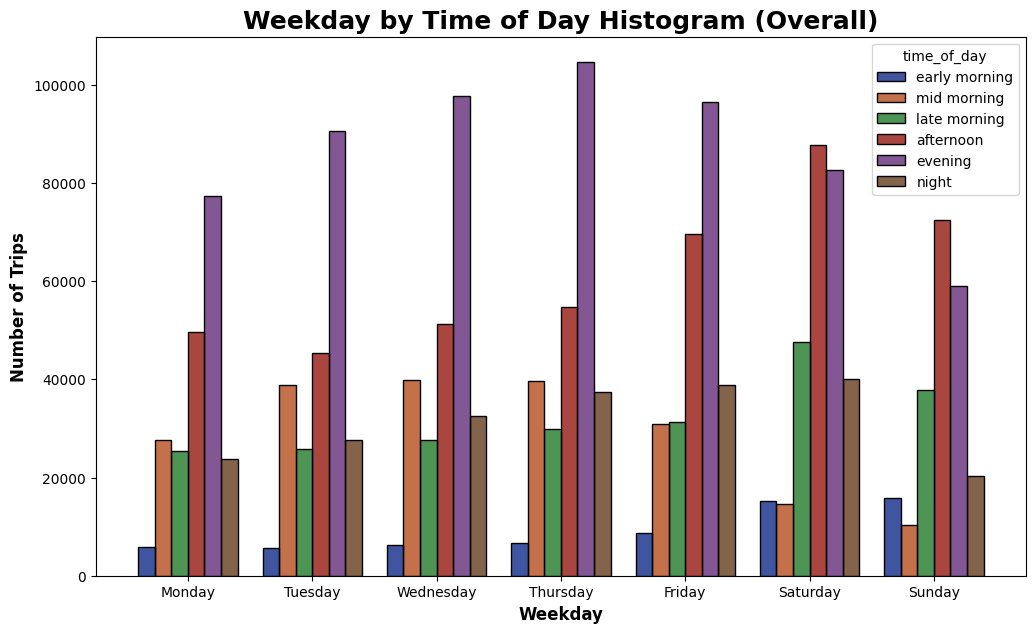

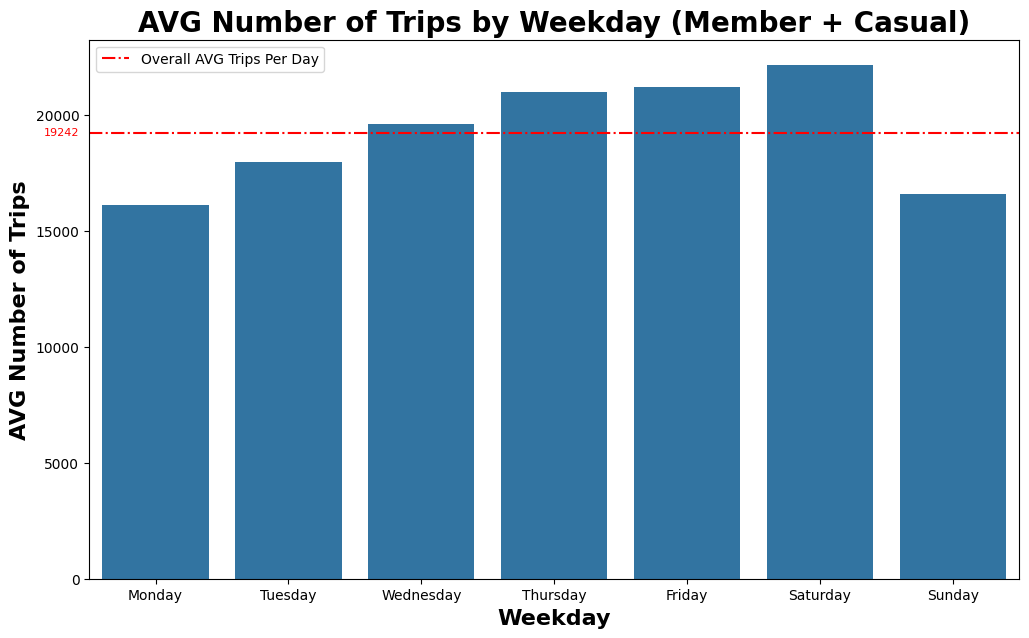

In [47]:
# Weekday by Time of Day Histogram (Overall)

print('\033[1mAVG NUMBER OF TRIPS (MEMBER + CASUAL)\033[0m')

mon_trips = pd.DataFrame(df1[df1['weekday'] == 'Monday']['start_date'].value_counts().reset_index())
avg_mon_trips = int(mon_trips['count'].mean())
#print('\033[1mAVG # Monday Trips:\033[0m',avg_mon_trips)

tues_trips = pd.DataFrame(df1[df1['weekday'] == 'Tuesday']['start_date'].value_counts().reset_index())
avg_tues_trips = int(tues_trips['count'].mean())
#print('\033[1mAVG # Tuesday Trips:\033[0m',avg_tues_trips)

wed_trips = pd.DataFrame(df1[df1['weekday'] == 'Wednesday']['start_date'].value_counts().reset_index())
avg_wed_trips = int(wed_trips['count'].mean())
#print('\033[1mAVG # Wednesday Trips:\033[0m',avg_wed_trips)

thurs_trips = pd.DataFrame(df1[df1['weekday'] == 'Thursday']['start_date'].value_counts().reset_index())
avg_thurs_trips = int(thurs_trips['count'].mean())
#print('\033[1mAVG # Thursday Trips:\033[0m',avg_thurs_trips)

fri_trips = pd.DataFrame(df1[df1['weekday'] == 'Friday']['start_date'].value_counts().reset_index())
avg_fri_trips = int(fri_trips['count'].mean())
#print('\033[1mAVG # Friday Trips:\033[0m',avg_fri_trips)

sat_trips = pd.DataFrame(df1[df1['weekday'] == 'Saturday']['start_date'].value_counts().reset_index())
avg_sat_trips = int(sat_trips['count'].mean())
#print('\033[1mAVG # Saturday Trips:\033[0m',avg_sat_trips)

sun_trips = pd.DataFrame(df1[df1['weekday'] == 'Sunday']['start_date'].value_counts().reset_index())
avg_sun_trips = int(sun_trips['count'].mean())
#print('\033[1mAVG # Sunday Trips:\033[0m',avg_sun_trips)
#print('\n')

def make_ci_columns(mean_col,est_SE_col):
    CI_list = []
    for x in mean_col: 
        for y in est_SE_col:
            if x == 0 or y == 0:
                CI_list.append(('NaN','NaN'))
            else:
                CI = stats.norm.interval(confidence=0.95, loc=x, scale=y)
                CI = (round(CI[0],3),round(CI[1],3))
        CI_list.append(CI)
    return pd.DataFrame(CI_list,columns=['conf_int_lb','conf_int_ub'],dtype=float)

overall_trips_weekday_est_SE = pd.DataFrame([stats.sem(mon_trips['count']),stats.sem(tues_trips['count']),stats.sem(wed_trips['count']),stats.sem(thurs_trips['count']),
                                             stats.sem(fri_trips['count']),stats.sem(sat_trips['count']),stats.sem(sun_trips['count'])])
#display(overall_trips_weekday_est_SE)

avg_overall_trips_weekday_df = pd.DataFrame(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[avg_mon_trips,avg_tues_trips,avg_wed_trips,avg_thurs_trips,avg_fri_trips,avg_sat_trips,avg_sun_trips])
avg_overall_trips_weekday_df = avg_overall_trips_weekday_df.reset_index().rename(columns={0:'weekday','index':'avg_num_trips'})
avg_overall_trips_weekday_df.insert(avg_overall_trips_weekday_df.columns.get_loc("weekday"),"avg_num_trips",avg_overall_trips_weekday_df.pop("avg_num_trips"))
avg_overall_trips_weekday_CI_columns = make_ci_columns(avg_overall_trips_weekday_df['avg_num_trips'],overall_trips_weekday_est_SE[0])
avg_overall_trips_weekday_df = avg_overall_trips_weekday_df.merge(avg_overall_trips_weekday_CI_columns,left_index=True,right_index=True)

display(avg_overall_trips_weekday_df)
print('\n')

non_wkd_trips = pd.DataFrame(df1[df1['weekend'] == 0]['start_date'].value_counts().reset_index())
avg_non_wkd_trips = int(non_wkd_trips['count'].mean())
non_wkd_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=non_wkd_trips['count'].mean(), scale=stats.sem(non_wkd_trips['count']))
non_wkd_trips_mean_CI = (round(non_wkd_trips_mean_CI[0],3),round(non_wkd_trips_mean_CI[1],3)) 
print('\033[1mAVG Non-Weekend Trips Per Day:\033[0m',avg_non_wkd_trips,'(95% CI',non_wkd_trips_mean_CI,')')

wkd_trips = pd.DataFrame(df1[df1['weekend'] == 1]['start_date'].value_counts().reset_index())
avg_wkd_trips = int(wkd_trips['count'].mean())
wkd_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=wkd_trips['count'].mean(), scale=stats.sem(wkd_trips['count'])) 
wkd_trips_mean_CI = (round(wkd_trips_mean_CI[0],3),round(wkd_trips_mean_CI[1],3)) 
print('\033[1mAVG Weekend Trips Per Day:\033[0m',avg_wkd_trips,'(95% CI',wkd_trips_mean_CI,')')

overall_trips = pd.DataFrame(df1['start_date'].value_counts().reset_index())
avg_overall_trips = int(overall_trips['count'].mean())
overall_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=overall_trips['count'].mean(), scale=stats.sem(overall_trips['count']))
overall_trips_mean_CI = (round(overall_trips_mean_CI[0],3),round(overall_trips_mean_CI[1],3)) 
print('\033[1mAVG Overall Trips Per Day:\033[0m',avg_overall_trips,'(95% CI',overall_trips_mean_CI,')')

plt.figure(figsize=(12,7))
ax = sns.histplot(data=weekday_sorted_df, x='weekday', 
                  hue='time_of_day',
                  hue_order=['early morning','mid morning','late morning','afternoon','evening','night'],
                  multiple='dodge',
                  discrete=1,
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Weekday',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Weekday by Time of Day Histogram (Overall)',fontsize=18,fontweight='bold');
plt.show()

plt.figure(figsize=(12,7))
ax = sns.barplot(x=avg_overall_trips_weekday_df['weekday'], y=avg_overall_trips_weekday_df['avg_num_trips'])
ax.set_title("AVG Number of Trips by Weekday (Member + Casual)",fontsize=20,fontweight='bold')
ax.set_xlabel("Weekday",fontsize=16,fontweight='bold')
ax.set_ylabel("AVG Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.axhline(avg_overall_trips,color='r',linestyle='-.',label='Overall AVG Trips Per Day')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,avg_overall_trips, "{:.0f}".format(avg_overall_trips), color="red", transform=trans, ha="right", va="center",fontsize=8)
ax.legend()
plt.show()

### Observations/Insights

Thursday, Friday, and Saturday had the highest average numbers of trips per day, with Saturday having the highest at 22,142 trips. Monday had the lowest average number of trips per day at 16,135 trips. The overall weekend (Sat-Sun) average number of trips per day (19,369) was higher than the overall non-weekend (Mon-Fri) average number of trips per day (19,191). The average overall number of trips per weekday (Mon-Sun) was 19,242.

Average numbers of trips per day increased steadily throughout the week from Monday through Saturday and then dropped off on Sundays.

Monday through Friday average trip volumes for time of day by weekday distributionsa are generally the same and Saturday and Sunday average trip volumes for time of day by weekday are generally the same. 

Monday through Friday distributions generally follow this pattern: least number of trips in the early morning, significantly increase from early morning to mid-morning, slightly decrease from mid-morning to late morning, significantly increase from late morning to afternoon, significantly increase from afternoon to evening, and then significantly decrease from evening to night. 

Saturday and Sunday distributions differ in that there is a decrease in trips from early morning to mid-morning and a decrease in trips from afternoon to evening.

Monday through Friday had the highest number of trips in the evening (4 PM - 8 PM) whereas Saturday and Sunday had the highest number of trips in the afternoon (12 PM - 4 PM).

Monday through Friday had the lowest number of trips in the early morning (midnight - 6 AM) whereas Saturday and Sunday had the lowest number of trips in the mid-morning (6 AM - 9 AM).

AVG NUMBER OF TRIPS PER WEEKDAY (MEMBERS)


weekday  avg_num_trips  conf_int_lb  conf_int_ub
0     Monday          10448     8727.697    12168.303
1    Tuesday          12281    10560.697    14001.303
2  Wednesday          13206    11485.697    14926.303
3   Thursday          13713    11992.697    15433.303
4     Friday          12663    10942.697    14383.303
5   Saturday          11155     9434.697    12875.303
6     Sunday           8710     6989.697    10430.303



AVG Non-Weekend Trips Per Day: 12462 (95% CI (11773.076, 13152.247) )
AVG Weekend Trips Per Day: 9933 (95% CI (8545.266, 11321.35) )
AVG Overall Trips Per Day: 11739 (95% CI (11069.037, 12410.941) )


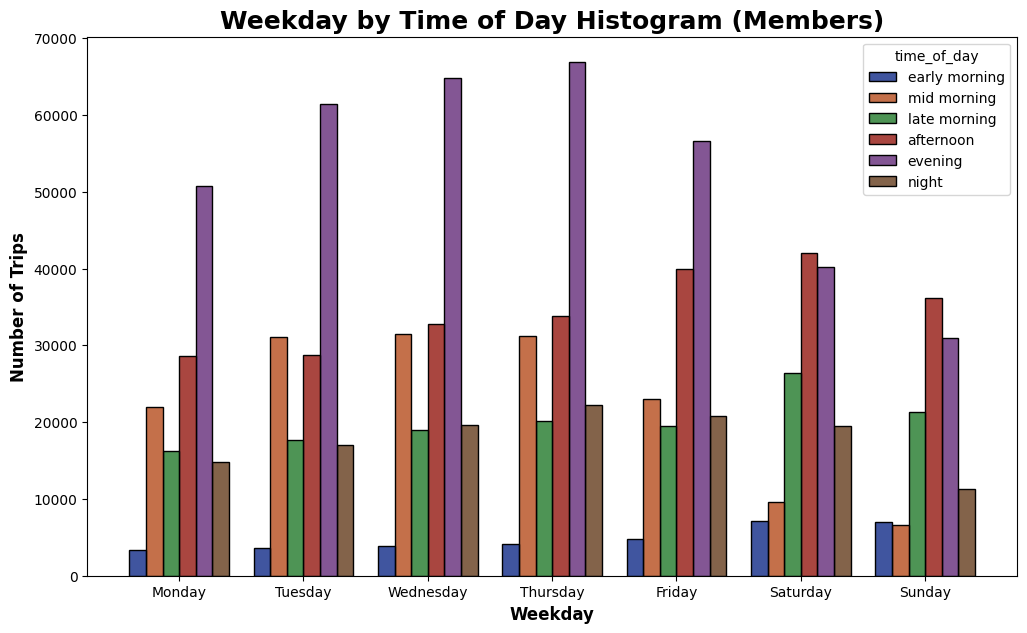

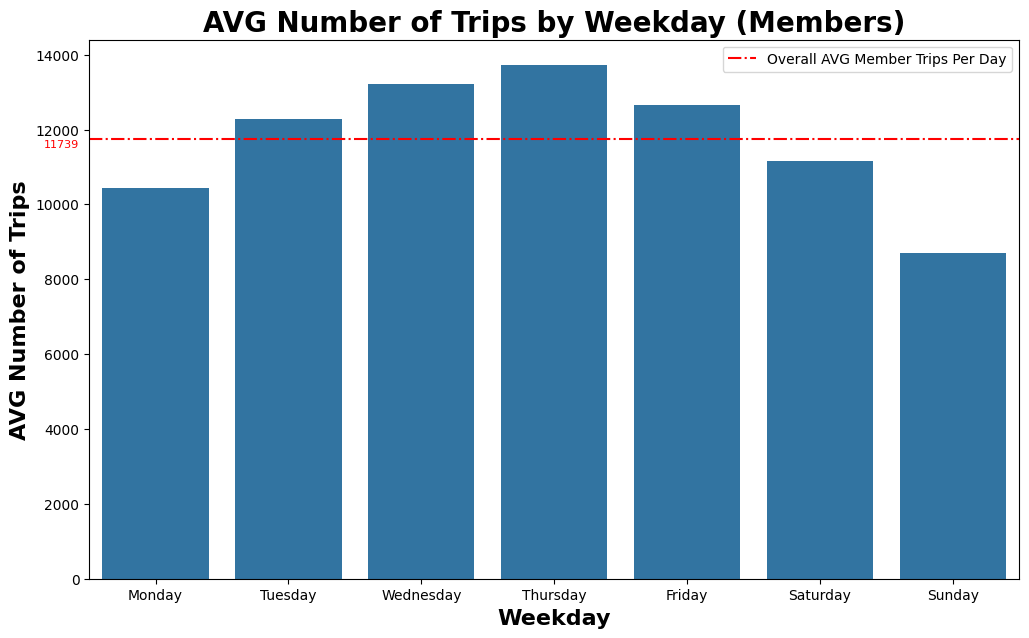

AVG NUMBER OF TRIPS PER WEEKDAY (CASUAL RIDERS)


weekday  avg_num_trips  conf_int_lb  conf_int_ub
0     Monday           5686     3159.082     8212.918
1    Tuesday           5704     3177.082     8230.918
2  Wednesday           6423     3896.082     8949.918
3   Thursday           7284     4757.082     9810.918
4     Friday           8542     6015.082    11068.918
5   Saturday          10986     8459.082    13512.918
6     Sunday           7885     5358.082    10411.918



AVG Non-Weekend Trips Per Day: 6728 (95% CI (6029.88, 7427.166) )
AVG Weekend Trips Per Day: 9436 (95% CI (7392.867, 11479.594) )
AVG Overall Trips Per Day: 7502 (95% CI (6700.178, 8304.13) )


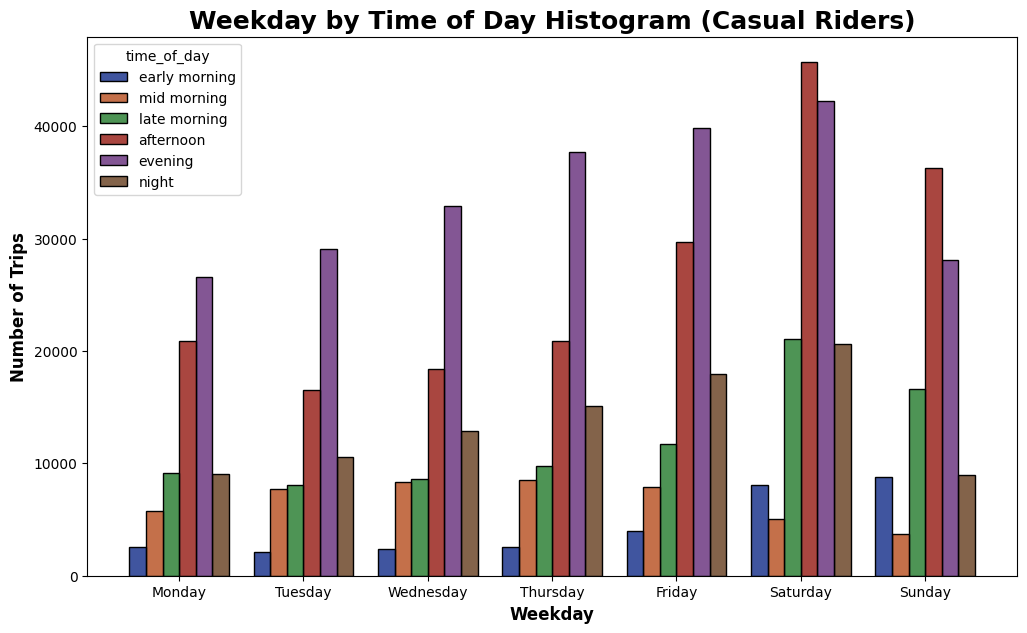

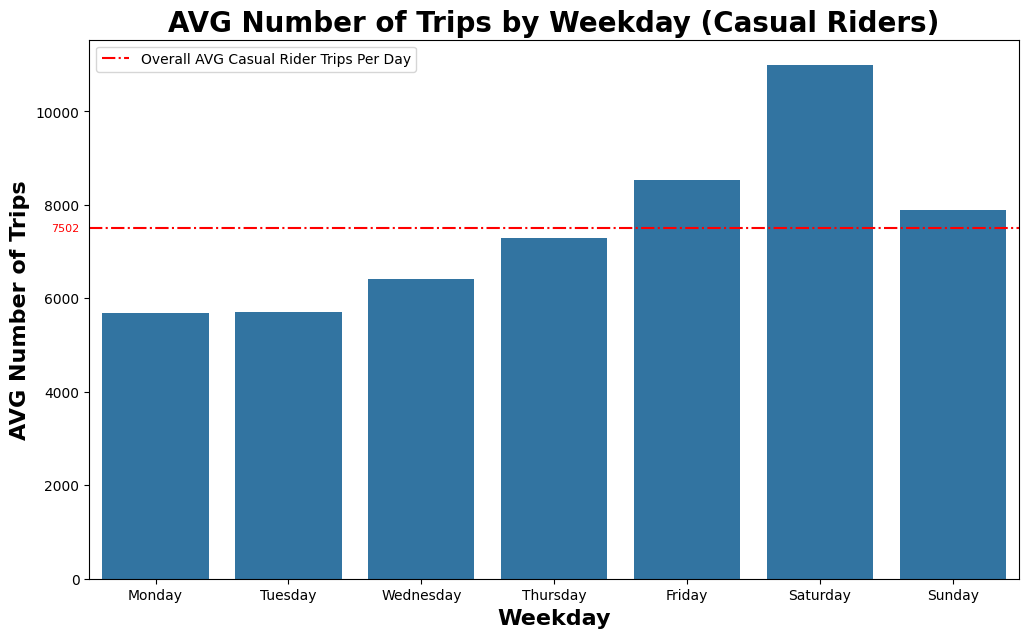

In [24]:
# Weekday by Time of Day Histogram (Members)

print('\033[1mAVG NUMBER OF TRIPS PER WEEKDAY (MEMBERS)\033[0m')

mon_mem_trips = pd.DataFrame(df1[(df1['weekday'] == 'Monday') & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_mon_mem_trips = int(mon_mem_trips['count'].mean())
#print('\033[1mAVG # Monday Trips:\033[0m',avg_mon_mem_trips)

tues_mem_trips = pd.DataFrame(df1[(df1['weekday'] == 'Tuesday') & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_tues_mem_trips = int(tues_mem_trips['count'].mean())
#print('\033[1mAVG # Tuesday Trips:\033[0m',avg_tues_mem_trips)

wed_mem_trips = pd.DataFrame(df1[(df1['weekday'] == 'Wednesday') & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_wed_mem_trips = int(wed_mem_trips['count'].mean())
#print('\033[1mAVG # Wednesday Trips:\033[0m',avg_wed_mem_trips)

thurs_mem_trips = pd.DataFrame(df1[(df1['weekday'] == 'Thursday') & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_thurs_mem_trips = int(thurs_mem_trips['count'].mean())
#print('\033[1mAVG # Thursday Trips:\033[0m',avg_thurs_mem_trips)

fri_mem_trips = pd.DataFrame(df1[(df1['weekday'] == 'Friday') & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_fri_mem_trips = int(fri_mem_trips['count'].mean())
#print('\033[1mAVG # Friday Trips:\033[0m',avg_fri_mem_trips)

sat_mem_trips = pd.DataFrame(df1[(df1['weekday'] == 'Saturday') & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_sat_mem_trips = int(sat_mem_trips['count'].mean())
#print('\033[1mAVG # Saturday Trips:\033[0m',avg_sat_mem_trips)

sun_mem_trips = pd.DataFrame(df1[(df1['weekday'] == 'Sunday') & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_sun_mem_trips = int(sun_mem_trips['count'].mean())
#print('\033[1mAVG # Sunday Trips:\033[0m',avg_sun_mem_trips)
#print('\n')

avg_mem_trips_weekday_df = pd.DataFrame(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[avg_mon_mem_trips,avg_tues_mem_trips,avg_wed_mem_trips,avg_thurs_mem_trips,avg_fri_mem_trips,avg_sat_mem_trips,avg_sun_mem_trips])
avg_mem_trips_weekday_df = avg_mem_trips_weekday_df.reset_index().rename(columns={0:'weekday','index':'avg_num_trips'})
avg_mem_trips_weekday_df.insert(avg_mem_trips_weekday_df.columns.get_loc("weekday"),"avg_num_trips",avg_mem_trips_weekday_df.pop("avg_num_trips"))
mem_trips_weekday_est_SE = pd.DataFrame([stats.sem(mon_mem_trips['count']),stats.sem(tues_mem_trips['count']),stats.sem(wed_mem_trips['count']),stats.sem(thurs_mem_trips['count']),
                                             stats.sem(fri_mem_trips['count']),stats.sem(sat_mem_trips['count']),stats.sem(sun_mem_trips['count'])])
#display(mem_trips_weekday_est_SE)
avg_mem_trips_weekday_CI_columns = make_ci_columns(avg_mem_trips_weekday_df['avg_num_trips'],mem_trips_weekday_est_SE[0])
avg_mem_trips_weekday_df = avg_mem_trips_weekday_df.merge(avg_mem_trips_weekday_CI_columns,left_index=True,right_index=True)

display(avg_mem_trips_weekday_df)
print('\n')

non_wkd_mem_trips = pd.DataFrame(df1[(df1['weekend'] == 0) & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_non_wkd_mem_trips = int(non_wkd_mem_trips['count'].mean())
non_wkd_mem_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=non_wkd_mem_trips['count'].mean(), scale=stats.sem(non_wkd_mem_trips['count']))
non_wkd_mem_trips_mean_CI = (round(non_wkd_mem_trips_mean_CI[0],3),round(non_wkd_mem_trips_mean_CI[1],3)) 
print('\033[1mAVG Non-Weekend Trips Per Day:\033[0m',avg_non_wkd_mem_trips,'(95% CI',non_wkd_mem_trips_mean_CI,')')

wkd_mem_trips = pd.DataFrame(df1[(df1['weekend'] == 1) & (df1['member_casual'] == 'member')]['start_date'].value_counts().reset_index())
avg_wkd_mem_trips = int(wkd_mem_trips['count'].mean())
wkd_mem_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=wkd_mem_trips['count'].mean(), scale=stats.sem(wkd_mem_trips['count']))
wkd_mem_trips_mean_CI = (round(wkd_mem_trips_mean_CI[0],3),round(wkd_mem_trips_mean_CI[1],3)) 
print('\033[1mAVG Weekend Trips Per Day:\033[0m',avg_wkd_mem_trips,'(95% CI',wkd_mem_trips_mean_CI,')')

overall_mem_trips = pd.DataFrame(df1[df1['member_casual'] == 'member']['start_date'].value_counts().reset_index())
avg_overall_mem_trips = int(overall_mem_trips['count'].mean())
overall_mem_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=overall_mem_trips['count'].mean(), scale=stats.sem(overall_mem_trips['count']))
overall_mem_trips_mean_CI = (round(overall_mem_trips_mean_CI[0],3),round(overall_mem_trips_mean_CI[1],3)) 
print('\033[1mAVG Overall Trips Per Day:\033[0m',avg_overall_mem_trips,'(95% CI',overall_mem_trips_mean_CI,')')

weekday_sorted_mem_df = weekday_sorted_df[weekday_sorted_df['member_casual'] == 'member']

plt.figure(figsize=(12,7))
ax = sns.histplot(data=weekday_sorted_mem_df, x='weekday', 
                  hue='time_of_day',
                  hue_order=['early morning','mid morning','late morning','afternoon','evening','night'],
                  multiple='dodge',
                  discrete=1,
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Weekday',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Weekday by Time of Day Histogram (Members)',fontsize=18,fontweight='bold');
plt.show()

plt.figure(figsize=(12,7))
ax = sns.barplot(x=avg_mem_trips_weekday_df['weekday'], y=avg_mem_trips_weekday_df['avg_num_trips'])
ax.set_title("AVG Number of Trips by Weekday (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Weekday",fontsize=16,fontweight='bold')
ax.set_ylabel("AVG Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.axhline(avg_overall_mem_trips,color='r',linestyle='-.',label='Overall AVG Member Trips Per Day')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,avg_overall_mem_trips, "{:.0f}".format(avg_overall_mem_trips), color="red", transform=trans, ha="right", va="top",fontsize=8)
ax.legend()
plt.show()

# Weekday by Time of Day Histogram (Casual Riders)

print('\033[1mAVG NUMBER OF TRIPS PER WEEKDAY (CASUAL RIDERS)\033[0m')

mon_cas_trips = pd.DataFrame(df1[(df1['weekday'] == 'Monday') & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_mon_cas_trips = int(mon_cas_trips['count'].mean())
#print('\033[1mAVG # Monday Trips:\033[0m',avg_mon_cas_trips)

tues_cas_trips = pd.DataFrame(df1[(df1['weekday'] == 'Tuesday') & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_tues_cas_trips = int(tues_cas_trips['count'].mean())
#print('\033[1mAVG # Tuesday Trips:\033[0m',avg_tues_cas_trips)

wed_cas_trips = pd.DataFrame(df1[(df1['weekday'] == 'Wednesday') & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_wed_cas_trips = int(wed_cas_trips['count'].mean())
#print('\033[1mAVG # Wednesday Trips:\033[0m',avg_wed_cas_trips)

thurs_cas_trips = pd.DataFrame(df1[(df1['weekday'] == 'Thursday') & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_thurs_cas_trips = int(thurs_cas_trips['count'].mean())
#print('\033[1mAVG # Thursday Trips:\033[0m',avg_thurs_cas_trips)

fri_cas_trips = pd.DataFrame(df1[(df1['weekday'] == 'Friday') & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_fri_cas_trips = int(fri_cas_trips['count'].mean())
#print('\033[1mAVG # Friday Trips:\033[0m',avg_fri_cas_trips)

sat_cas_trips = pd.DataFrame(df1[(df1['weekday'] == 'Saturday') & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_sat_cas_trips = int(sat_cas_trips['count'].mean())
#print('\033[1mAVG # Saturday Trips:\033[0m',avg_sat_cas_trips)

sun_cas_trips = pd.DataFrame(df1[(df1['weekday'] == 'Sunday') & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_sun_cas_trips = int(sun_cas_trips['count'].mean())
#print('\033[1mAVG # Sunday Trips:\033[0m',avg_sun_cas_trips)
#print('\n')

avg_cas_trips_weekday_df = pd.DataFrame(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[avg_mon_cas_trips,avg_tues_cas_trips,avg_wed_cas_trips,avg_thurs_cas_trips,avg_fri_cas_trips,avg_sat_cas_trips,avg_sun_cas_trips])
avg_cas_trips_weekday_df = avg_cas_trips_weekday_df.reset_index().rename(columns={0:'weekday','index':'avg_num_trips'})
avg_cas_trips_weekday_df.insert(avg_cas_trips_weekday_df.columns.get_loc("weekday"),"avg_num_trips",avg_cas_trips_weekday_df.pop("avg_num_trips"))
cas_trips_weekday_est_SE = pd.DataFrame([stats.sem(mon_cas_trips['count']),stats.sem(tues_cas_trips['count']),stats.sem(wed_cas_trips['count']),stats.sem(thurs_cas_trips['count']),
                                             stats.sem(fri_cas_trips['count']),stats.sem(sat_cas_trips['count']),stats.sem(sun_cas_trips['count'])])
#display(cas_trips_weekday_est_SE)
avg_cas_trips_weekday_CI_columns = make_ci_columns(avg_cas_trips_weekday_df['avg_num_trips'],cas_trips_weekday_est_SE[0])
avg_cas_trips_weekday_df = avg_cas_trips_weekday_df.merge(avg_cas_trips_weekday_CI_columns,left_index=True,right_index=True)

display(avg_cas_trips_weekday_df)
print('\n')

non_wkd_cas_trips = pd.DataFrame(df1[(df1['weekend'] == 0) & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_non_wkd_cas_trips = int(non_wkd_cas_trips['count'].mean())
non_wkd_cas_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=non_wkd_cas_trips['count'].mean(), scale=stats.sem(non_wkd_cas_trips['count']))
non_wkd_cas_trips_mean_CI = (round(non_wkd_cas_trips_mean_CI[0],3),round(non_wkd_cas_trips_mean_CI[1],3)) 
print('\033[1mAVG Non-Weekend Trips Per Day:\033[0m',avg_non_wkd_cas_trips,'(95% CI',non_wkd_cas_trips_mean_CI,')')

wkd_cas_trips = pd.DataFrame(df1[(df1['weekend'] == 1) & (df1['member_casual'] == 'casual')]['start_date'].value_counts().reset_index())
avg_wkd_cas_trips = int(wkd_cas_trips['count'].mean())
wkd_cas_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=wkd_cas_trips['count'].mean(), scale=stats.sem(wkd_cas_trips['count']))
wkd_cas_trips_mean_CI = (round(wkd_cas_trips_mean_CI[0],3),round(wkd_cas_trips_mean_CI[1],3)) 
print('\033[1mAVG Weekend Trips Per Day:\033[0m',avg_wkd_cas_trips,'(95% CI',wkd_cas_trips_mean_CI,')')

overall_cas_trips = pd.DataFrame(df1[df1['member_casual'] == 'casual']['start_date'].value_counts().reset_index())
avg_overall_cas_trips = int(overall_cas_trips['count'].mean())
overall_cas_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=overall_cas_trips['count'].mean(), scale=stats.sem(overall_cas_trips['count']))
overall_cas_trips_mean_CI = (round(overall_cas_trips_mean_CI[0],3),round(overall_cas_trips_mean_CI[1],3)) 
print('\033[1mAVG Overall Trips Per Day:\033[0m',avg_overall_cas_trips,'(95% CI',overall_cas_trips_mean_CI,')')

weekday_sorted_cas_df = weekday_sorted_df[weekday_sorted_df['member_casual'] == 'casual']

plt.figure(figsize=(12,7))
ax = sns.histplot(data=weekday_sorted_cas_df, x='weekday', 
                  hue='time_of_day',
                  hue_order=['early morning','mid morning','late morning','afternoon','evening','night'],
                  multiple='dodge',
                  discrete=1,
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Weekday',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Weekday by Time of Day Histogram (Casual Riders)',fontsize=18,fontweight='bold');
plt.show()

plt.figure(figsize=(12,7))
ax = sns.barplot(x=avg_cas_trips_weekday_df['weekday'], y=avg_cas_trips_weekday_df['avg_num_trips'])
ax.set_title("AVG Number of Trips by Weekday (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Weekday",fontsize=16,fontweight='bold')
ax.set_ylabel("AVG Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.axhline(avg_overall_cas_trips,color='r',linestyle='-.',label='Overall AVG Casual Rider Trips Per Day')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,avg_overall_cas_trips, "{:.0f}".format(avg_overall_cas_trips), color="red", transform=trans, ha="right", va="center",fontsize=8)
ax.legend()
plt.show()

### Observations/Insights

Casual Rider trips followed the same overall pattern of increasing numbers of trips Monday-Saturday and dropping off on Sundays but Member trips had a fairly large decrease in numbers of trips from Friday to Saturday as well.

Members had the highest average number of trips on Thursdays (13,713) whereas Casual Riders had the highest average number of trips on Saturdays (10,986). Members' lowest average number of trips was on Sundays (8,710) whereas Casual Riders' lowest average number of trips was on Mondays (5,686).

Members' non-weekend average number of trips (12,462) was significantly higher than its weekend average number of trips (9,933) whereas Casual Riders' weekend average number of trips (9,436) was significantly higher than its non-weekend average number of trips (6,728).

During non-weekend days, Casual Rider trips increased from early morning until they peaked in the evening and then dropped off from evening to night. On the weekends, Casual Rider trips decreased from early morning to mid-morning, increased until they peaked in the afternoon, and then dropped off from afternoon to evening and evening to night.

During non-weekend days, Member trips also increased from early morning to a peak in the evening but they also decreased from mid-morning to late morning on every non-weekend day. On the weekends, Member trips followed a similar distribution to Casual Rider trips except that Member trips had an increase in numbers of trips from early morning to mid-morning on Saturdays.

/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_13609/3259029224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_df['time_of_day'] = pd.Categorical(weekend_df['time_of_day'],categories=time_order)


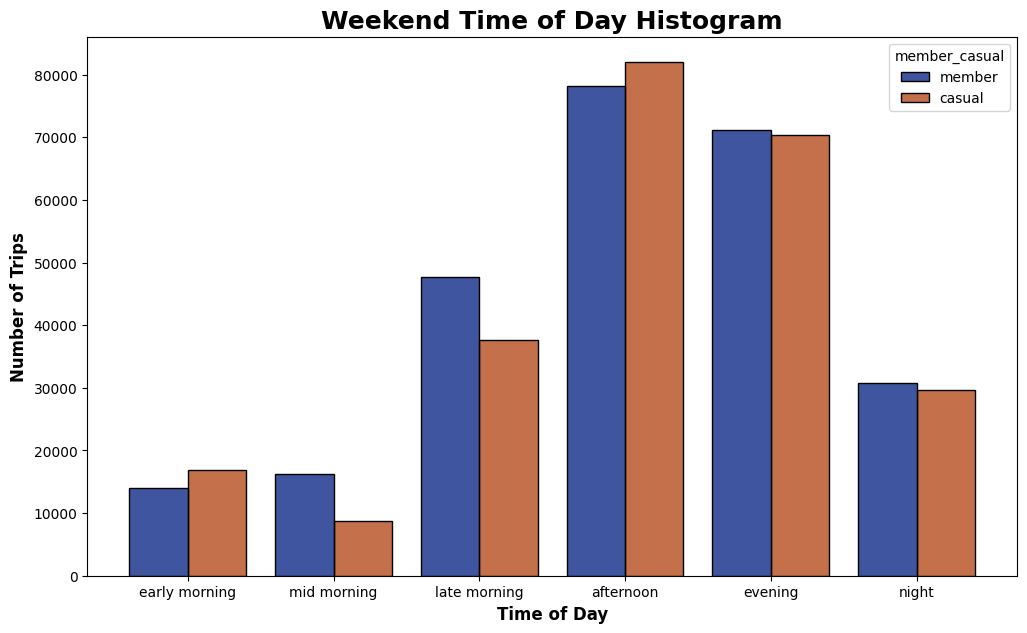

AVG NUMBER OF TRIPS PER DAY BY TIME OF DAY (WEEKEND)


time_of_day member_casual  avg_num_trips_per_day  conf_int_lb  \
0   Early Morning        member                 541.62      212.456   
1     Mid Morning        member                 626.19      297.026   
2    Late Morning        member                1835.50     1506.336   
3       Afternoon        member                3008.35     2679.186   
4         Evening        member                2736.62     2407.456   
5           Night        member                1185.04      855.876   
6   Early Morning        casual                 647.81      318.646   
7     Mid Morning        casual                 337.69        8.526   
8    Late Morning        casual                1448.92     1119.756   
9       Afternoon        casual                3152.62     2823.456   
10        Evening        casual                2709.46     2380.296   
11          Night        casual                1139.73      810.566   

    conf_int_ub  
0       870.784  
1       955.354  
2      2164.664  
3      3337.514  
4      3065.784  
5      1514.204  
6       976.974  
7       666.854  
8      1778.084  
9      3481.784  
10     3038.624  
11     1468.894

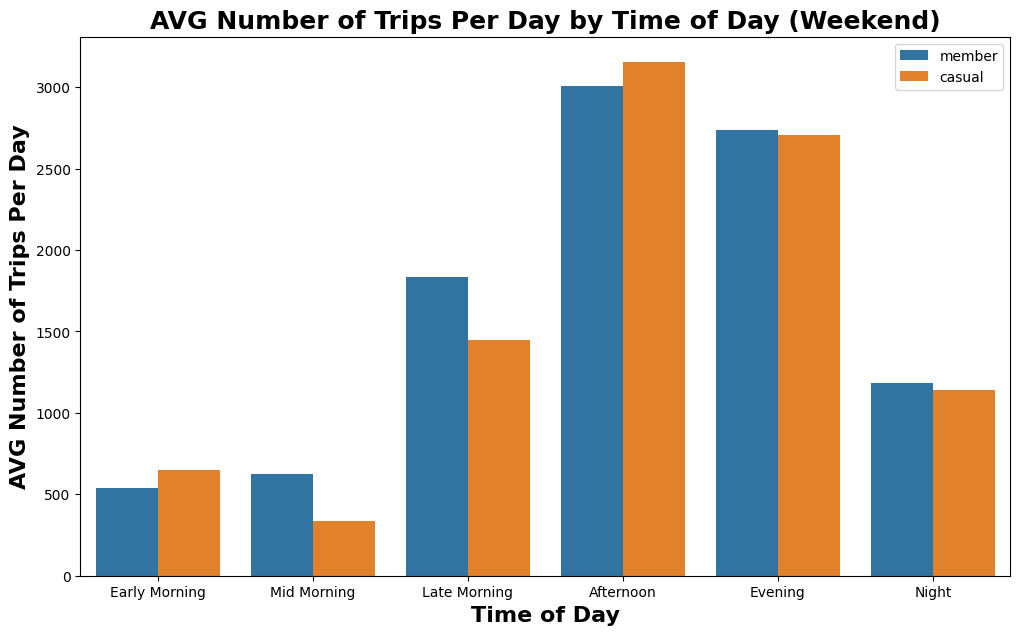

/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_13609/3259029224.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_weekend_df['time_of_day'] = pd.Categorical(non_weekend_df['time_of_day'],categories=time_order)


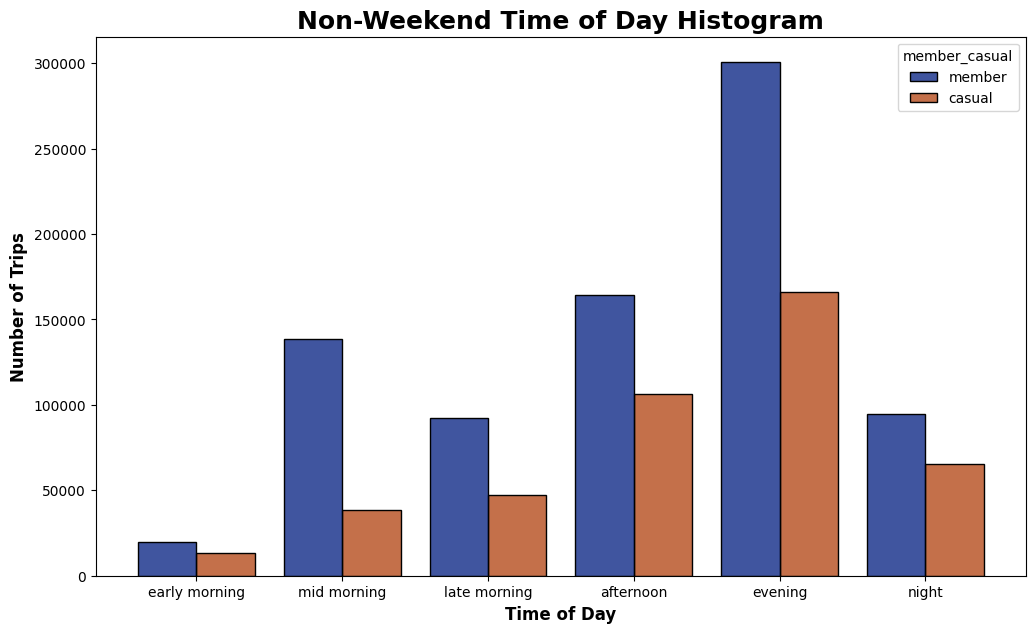

AVG NUMBER OF TRIPS PER DAY BY TIME OF DAY (NON-WEEKEND)


time_of_day member_casual  avg_num_trips_per_day  conf_int_lb  \
0   Early Morning        member                 302.71      173.132   
1     Mid Morning        member                2133.91     2004.332   
2    Late Morning        member                1424.14     1294.562   
3       Afternoon        member                2525.12     2395.542   
4         Evening        member                4622.69     4493.112   
5           Night        member                1454.09     1324.512   
6   Early Morning        casual                 208.54       78.962   
7     Mid Morning        casual                 588.68      459.102   
8    Late Morning        casual                 727.38      597.802   
9       Afternoon        casual                1638.37     1508.792   
10        Evening        casual                2556.51     2426.932   
11          Night        casual                1009.05      879.472   

    conf_int_ub  
0       432.288  
1      2263.488  
2      1553.718  
3      2654.698  
4      4752.268  
5      1583.668  
6       338.118  
7       718.258  
8       856.958  
9      1767.948  
10     2686.088  
11     1138.628

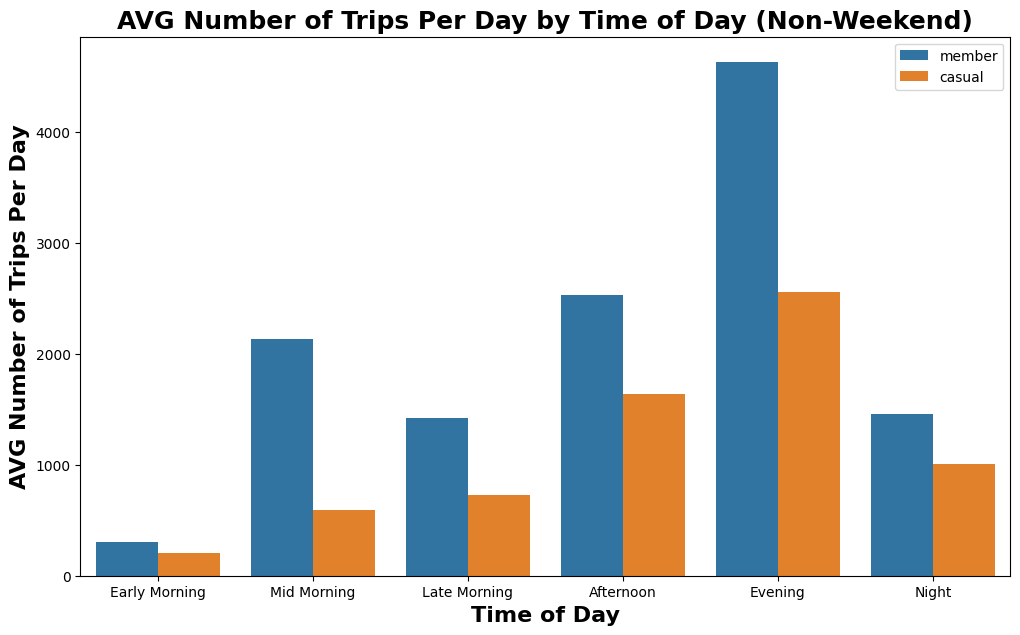

In [46]:
# Weekend by Time of Day Histogram

weekend_df = df1[df1['weekend'] == 1]
time_order = ['early morning','mid morning','late morning','afternoon','evening','night']
weekend_df['time_of_day'] = pd.Categorical(weekend_df['time_of_day'],categories=time_order)
weekend_df = weekend_df.sort_values(by='time_of_day')

plt.figure(figsize=(12,7))
ax = sns.histplot(data=weekend_df, x='time_of_day', 
                  hue='member_casual',
                  multiple='dodge',
                  discrete=1,
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Time of Day',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Weekend Time of Day Histogram',fontsize=18,fontweight='bold');
plt.show()

mem_earlyam_wkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'early morning') & (df1_mem['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_mem_earlyam_wkd_trips_per_day = round(mem_earlyam_wkd_trips_per_day['count'].mean(),2)

mem_midam_wkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'mid morning') & (df1_mem['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_mem_midam_wkd_trips_per_day = round(mem_midam_wkd_trips_per_day['count'].mean(),2)

mem_lateam_wkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'late morning') & (df1_mem['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_mem_lateam_wkd_trips_per_day = round(mem_lateam_wkd_trips_per_day['count'].mean(),2)

mem_afternoon_wkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'afternoon') & (df1_mem['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_mem_afternoon_wkd_trips_per_day = round(mem_afternoon_wkd_trips_per_day['count'].mean(),2)

mem_evening_wkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'evening') & (df1_mem['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_mem_evening_wkd_trips_per_day = round(mem_evening_wkd_trips_per_day['count'].mean(),2)

mem_night_wkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'night') & (df1_mem['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_mem_night_wkd_trips_per_day = round(mem_night_wkd_trips_per_day['count'].mean(),2)

avg_mem_wkd_trips_tod_df = pd.DataFrame(['Early Morning','Mid Morning','Late Morning','Afternoon','Evening','Night'],[avg_mem_earlyam_wkd_trips_per_day,avg_mem_midam_wkd_trips_per_day,avg_mem_lateam_wkd_trips_per_day,avg_mem_afternoon_wkd_trips_per_day,avg_mem_evening_wkd_trips_per_day,avg_mem_night_wkd_trips_per_day])
avg_mem_wkd_trips_tod_df = avg_mem_wkd_trips_tod_df.reset_index().rename(columns={0:'time_of_day','index':'avg_num_trips_per_day'})
avg_mem_wkd_trips_tod_df.insert(avg_mem_wkd_trips_tod_df.columns.get_loc("time_of_day"),"avg_num_trips_per_day",avg_mem_wkd_trips_tod_df.pop("avg_num_trips_per_day"))

#print('\033[1mAVG NUMBER OF WEEKEND TRIPS PER DAY BY TIME OF DAY (MEMBERS)\033[0m')
#display(avg_mem_wkd_trips_tod_df)

cas_earlyam_wkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'early morning') & (df1_cas['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_cas_earlyam_wkd_trips_per_day = round(cas_earlyam_wkd_trips_per_day['count'].mean(),2)

cas_midam_wkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'mid morning') & (df1_cas['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_cas_midam_wkd_trips_per_day = round(cas_midam_wkd_trips_per_day['count'].mean(),2)

cas_lateam_wkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'late morning') & (df1_cas['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_cas_lateam_wkd_trips_per_day = round(cas_lateam_wkd_trips_per_day['count'].mean(),2)

cas_afternoon_wkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'afternoon') & (df1_cas['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_cas_afternoon_wkd_trips_per_day = round(cas_afternoon_wkd_trips_per_day['count'].mean(),2)

cas_evening_wkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'evening') & (df1_cas['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_cas_evening_wkd_trips_per_day = round(cas_evening_wkd_trips_per_day['count'].mean(),2)

cas_night_wkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'night') & (df1_cas['weekend'] == 1)]['start_date'].value_counts().reset_index())
avg_cas_night_wkd_trips_per_day = round(cas_night_wkd_trips_per_day['count'].mean(),2)

avg_cas_wkd_trips_tod_df = pd.DataFrame(['Early Morning','Mid Morning','Late Morning','Afternoon','Evening','Night'],[avg_cas_earlyam_wkd_trips_per_day,avg_cas_midam_wkd_trips_per_day,avg_cas_lateam_wkd_trips_per_day,avg_cas_afternoon_wkd_trips_per_day,avg_cas_evening_wkd_trips_per_day,avg_cas_night_wkd_trips_per_day])
avg_cas_wkd_trips_tod_df = avg_cas_wkd_trips_tod_df.reset_index().rename(columns={0:'time_of_day','index':'avg_num_trips_per_day'})
avg_cas_wkd_trips_tod_df.insert(avg_cas_wkd_trips_tod_df.columns.get_loc("time_of_day"),"avg_num_trips_per_day",avg_cas_wkd_trips_tod_df.pop("avg_num_trips_per_day"))

#print('\033[1mAVG NUMBER OF WEEKEND TRIPS PER DAY BY TIME OF DAY (CASUAL RIDERS)\033[0m')
#display(avg_cas_wkd_trips_tod_df)

avg_mem_cas_wkd_trips_tod_df = pd.concat([avg_mem_wkd_trips_tod_df,avg_cas_wkd_trips_tod_df])
avg_mem_cas_wkd_trips_tod_df = avg_mem_cas_wkd_trips_tod_df.reset_index(drop=True)
avg_mem_cas_wkd_trips_tod_df['member_casual'] = ['member','member','member','member','member','member','casual','casual','casual','casual','casual','casual']
avg_mem_cas_wkd_trips_tod_est_SE = pd.DataFrame([stats.sem(mem_earlyam_wkd_trips_per_day['count']),stats.sem(mem_midam_wkd_trips_per_day['count']),stats.sem(mem_lateam_wkd_trips_per_day['count']),
                                                 stats.sem(mem_afternoon_wkd_trips_per_day['count']),stats.sem(mem_evening_wkd_trips_per_day['count']),stats.sem(mem_night_wkd_trips_per_day['count']),
                                                 stats.sem(cas_earlyam_wkd_trips_per_day['count']),stats.sem(cas_midam_wkd_trips_per_day['count']),stats.sem(cas_lateam_wkd_trips_per_day['count']),
                                                 stats.sem(cas_afternoon_wkd_trips_per_day['count']),stats.sem(cas_evening_wkd_trips_per_day['count']),stats.sem(cas_night_wkd_trips_per_day['count'])])
#display(avg_mem_cas_wkd_trips_tod_est_SE)
avg_mem_cas_wkd_trips_tod_CI_columns = make_ci_columns(avg_mem_cas_wkd_trips_tod_df['avg_num_trips_per_day'],avg_mem_cas_wkd_trips_tod_est_SE[0])
avg_mem_cas_wkd_trips_tod_df = avg_mem_cas_wkd_trips_tod_df.merge(avg_mem_cas_wkd_trips_tod_CI_columns,left_index=True,right_index=True)
avg_mem_cas_wkd_trips_tod_df.insert(avg_mem_cas_wkd_trips_tod_df.columns.get_loc("member_casual"),"conf_int_lb",avg_mem_cas_wkd_trips_tod_df.pop("conf_int_lb"))
avg_mem_cas_wkd_trips_tod_df.insert(avg_mem_cas_wkd_trips_tod_df.columns.get_loc("member_casual"),"conf_int_ub",avg_mem_cas_wkd_trips_tod_df.pop("conf_int_ub"))
avg_mem_cas_wkd_trips_tod_df.insert(avg_mem_cas_wkd_trips_tod_df.columns.get_loc("avg_num_trips_per_day"),"member_casual",avg_mem_cas_wkd_trips_tod_df.pop("member_casual"))

print('\033[1mAVG NUMBER OF TRIPS PER DAY BY TIME OF DAY (WEEKEND)\033[0m')
display(avg_mem_cas_wkd_trips_tod_df)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=avg_mem_cas_wkd_trips_tod_df['time_of_day'], y=avg_mem_cas_wkd_trips_tod_df['avg_num_trips_per_day'],hue=avg_mem_cas_wkd_trips_tod_df['member_casual'])
ax.set_title("AVG Number of Trips Per Day by Time of Day (Weekend)",fontsize=18,fontweight='bold')
ax.set_xlabel("Time of Day",fontsize=16,fontweight='bold')
ax.set_ylabel("AVG Number of Trips Per Day",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend()
plt.show()

# Non-Weekend Time of Day Histogram

non_weekend_df = df1[df1['weekend'] == 0]
time_order = ['early morning','mid morning','late morning','afternoon','evening','night']
non_weekend_df['time_of_day'] = pd.Categorical(non_weekend_df['time_of_day'],categories=time_order)
non_weekend_df = non_weekend_df.sort_values(by='time_of_day')

plt.figure(figsize=(12,7))
ax = sns.histplot(data=non_weekend_df, x='time_of_day', 
                  hue='member_casual',
                  hue_order=['member','casual'],
                  multiple='dodge',
                  discrete=1,
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Time of Day',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Non-Weekend Time of Day Histogram',fontsize=18,fontweight='bold');
plt.show()

mem_earlyam_nonwkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'early morning') & (df1_mem['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_mem_earlyam_nonwkd_trips_per_day = round(mem_earlyam_nonwkd_trips_per_day['count'].mean(),2)

mem_midam_nonwkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'mid morning') & (df1_mem['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_mem_midam_nonwkd_trips_per_day = round(mem_midam_nonwkd_trips_per_day['count'].mean(),2)

mem_lateam_nonwkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'late morning') & (df1_mem['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_mem_lateam_nonwkd_trips_per_day = round(mem_lateam_nonwkd_trips_per_day['count'].mean(),2)

mem_afternoon_nonwkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'afternoon') & (df1_mem['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_mem_afternoon_nonwkd_trips_per_day = round(mem_afternoon_nonwkd_trips_per_day['count'].mean(),2)

mem_evening_nonwkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'evening') & (df1_mem['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_mem_evening_nonwkd_trips_per_day = round(mem_evening_nonwkd_trips_per_day['count'].mean(),2)

mem_night_nonwkd_trips_per_day = pd.DataFrame(df1_mem[(df1_mem['time_of_day'] == 'night') & (df1_mem['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_mem_night_nonwkd_trips_per_day = round(mem_night_nonwkd_trips_per_day['count'].mean(),2)

avg_mem_nonwkd_trips_tod_df = pd.DataFrame(['Early Morning','Mid Morning','Late Morning','Afternoon','Evening','Night'],[avg_mem_earlyam_nonwkd_trips_per_day,avg_mem_midam_nonwkd_trips_per_day,avg_mem_lateam_nonwkd_trips_per_day,avg_mem_afternoon_nonwkd_trips_per_day,avg_mem_evening_nonwkd_trips_per_day,avg_mem_night_nonwkd_trips_per_day])
avg_mem_nonwkd_trips_tod_df = avg_mem_nonwkd_trips_tod_df.reset_index().rename(columns={0:'time_of_day','index':'avg_num_trips_per_day'})
avg_mem_nonwkd_trips_tod_df.insert(avg_mem_nonwkd_trips_tod_df.columns.get_loc("time_of_day"),"avg_num_trips_per_day",avg_mem_nonwkd_trips_tod_df.pop("avg_num_trips_per_day"))

#print('\033[1mAVG NUMBER OF NON-WEEKEND TRIPS PER DAY BY TIME OF DAY (MEMBERS)\033[0m')
#display(avg_mem_nonwkd_trips_tod_df)

cas_earlyam_nonwkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'early morning') & (df1_cas['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_cas_earlyam_nonwkd_trips_per_day = round(cas_earlyam_nonwkd_trips_per_day['count'].mean(),2)

cas_midam_nonwkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'mid morning') & (df1_cas['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_cas_midam_nonwkd_trips_per_day = round(cas_midam_nonwkd_trips_per_day['count'].mean(),2)

cas_lateam_nonwkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'late morning') & (df1_cas['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_cas_lateam_nonwkd_trips_per_day = round(cas_lateam_nonwkd_trips_per_day['count'].mean(),2)

cas_afternoon_nonwkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'afternoon') & (df1_cas['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_cas_afternoon_nonwkd_trips_per_day = round(cas_afternoon_nonwkd_trips_per_day['count'].mean(),2)

cas_evening_nonwkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'evening') & (df1_cas['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_cas_evening_nonwkd_trips_per_day = round(cas_evening_nonwkd_trips_per_day['count'].mean(),2)

cas_night_nonwkd_trips_per_day = pd.DataFrame(df1_cas[(df1_cas['time_of_day'] == 'night') & (df1_cas['weekend'] == 0)]['start_date'].value_counts().reset_index())
avg_cas_night_nonwkd_trips_per_day = round(cas_night_nonwkd_trips_per_day['count'].mean(),2)

avg_cas_nonwkd_trips_tod_df = pd.DataFrame(['Early Morning','Mid Morning','Late Morning','Afternoon','Evening','Night'],[avg_cas_earlyam_nonwkd_trips_per_day,avg_cas_midam_nonwkd_trips_per_day,avg_cas_lateam_nonwkd_trips_per_day,avg_cas_afternoon_nonwkd_trips_per_day,avg_cas_evening_nonwkd_trips_per_day,avg_cas_night_nonwkd_trips_per_day])
avg_cas_nonwkd_trips_tod_df = avg_cas_nonwkd_trips_tod_df.reset_index().rename(columns={0:'time_of_day','index':'avg_num_trips_per_day'})
avg_cas_nonwkd_trips_tod_df.insert(avg_cas_nonwkd_trips_tod_df.columns.get_loc("time_of_day"),"avg_num_trips_per_day",avg_cas_nonwkd_trips_tod_df.pop("avg_num_trips_per_day"))

#print('\033[1mAVG NUMBER OF NON-WEEKEND TRIPS PER DAY BY TIME OF DAY (CASUAL RIDERS)\033[0m')
#display(avg_cas_nonwkd_trips_tod_df)

avg_mem_cas_nonwkd_trips_tod_df = pd.concat([avg_mem_nonwkd_trips_tod_df,avg_cas_nonwkd_trips_tod_df])
avg_mem_cas_nonwkd_trips_tod_df = avg_mem_cas_nonwkd_trips_tod_df.reset_index(drop=True)
avg_mem_cas_nonwkd_trips_tod_df['member_casual'] = ['member','member','member','member','member','member','casual','casual','casual','casual','casual','casual']
avg_mem_cas_nonwkd_trips_tod_est_SE = pd.DataFrame([stats.sem(mem_earlyam_nonwkd_trips_per_day['count']),stats.sem(mem_midam_nonwkd_trips_per_day['count']),stats.sem(mem_lateam_nonwkd_trips_per_day['count']),
                                                 stats.sem(mem_afternoon_nonwkd_trips_per_day['count']),stats.sem(mem_evening_nonwkd_trips_per_day['count']),stats.sem(mem_night_nonwkd_trips_per_day['count']),
                                                 stats.sem(cas_earlyam_nonwkd_trips_per_day['count']),stats.sem(cas_midam_nonwkd_trips_per_day['count']),stats.sem(cas_lateam_nonwkd_trips_per_day['count']),
                                                 stats.sem(cas_afternoon_nonwkd_trips_per_day['count']),stats.sem(cas_evening_nonwkd_trips_per_day['count']),stats.sem(cas_night_nonwkd_trips_per_day['count'])])
#display(avg_mem_cas_wkd_trips_tod_est_SE)
avg_mem_cas_nonwkd_trips_tod_CI_columns = make_ci_columns(avg_mem_cas_nonwkd_trips_tod_df['avg_num_trips_per_day'],avg_mem_cas_nonwkd_trips_tod_est_SE[0])
avg_mem_cas_nonwkd_trips_tod_df = avg_mem_cas_nonwkd_trips_tod_df.merge(avg_mem_cas_nonwkd_trips_tod_CI_columns,left_index=True,right_index=True)
avg_mem_cas_nonwkd_trips_tod_df.insert(avg_mem_cas_nonwkd_trips_tod_df.columns.get_loc("member_casual"),"conf_int_lb",avg_mem_cas_nonwkd_trips_tod_df.pop("conf_int_lb"))
avg_mem_cas_nonwkd_trips_tod_df.insert(avg_mem_cas_nonwkd_trips_tod_df.columns.get_loc("member_casual"),"conf_int_ub",avg_mem_cas_nonwkd_trips_tod_df.pop("conf_int_ub"))
avg_mem_cas_nonwkd_trips_tod_df.insert(avg_mem_cas_nonwkd_trips_tod_df.columns.get_loc("avg_num_trips_per_day"),"member_casual",avg_mem_cas_nonwkd_trips_tod_df.pop("member_casual"))

print('\033[1mAVG NUMBER OF TRIPS PER DAY BY TIME OF DAY (NON-WEEKEND)\033[0m')
display(avg_mem_cas_nonwkd_trips_tod_df)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=avg_mem_cas_nonwkd_trips_tod_df['time_of_day'], y=avg_mem_cas_nonwkd_trips_tod_df['avg_num_trips_per_day'],hue=avg_mem_cas_nonwkd_trips_tod_df['member_casual'])
ax.set_title("AVG Number of Trips Per Day by Time of Day (Non-Weekend)",fontsize=18,fontweight='bold')
ax.set_xlabel("Time of Day",fontsize=16,fontweight='bold')
ax.set_ylabel("AVG Number of Trips Per Day",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend()
plt.show()

### Observations/Insights

These numbers/visuals further reinforce the pattern described above regarding weekend vs. non-weekend trip volumes by time of day for Members and Casual Riders.

Member Average Trip Time of Day: 1900-01-01 14:32:04.737839616
Member Median Trip Time of Day: 1900-01-01 15:30:05


Casual Rider Average Trip Time of Day: 1900-01-01 15:03:56.930430208
Casual Rider Median Trip Time of Day: 1900-01-01 15:49:54


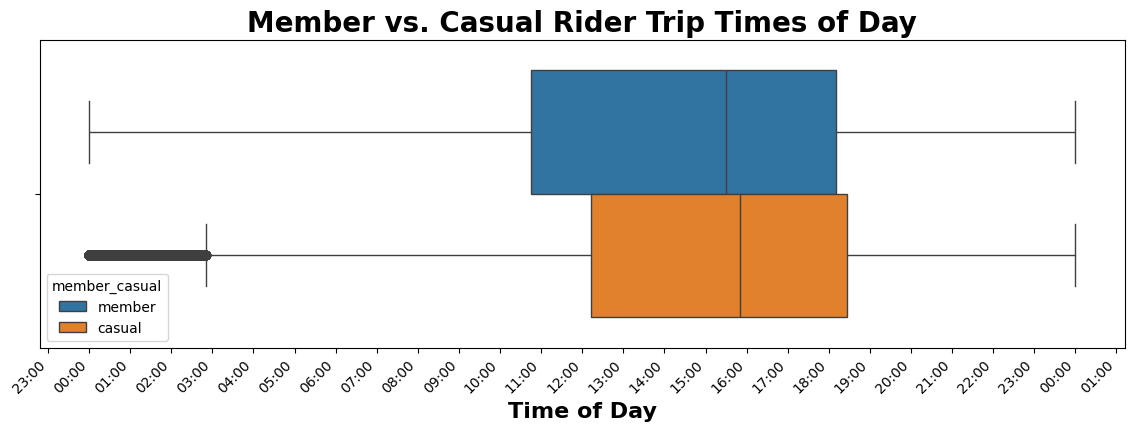

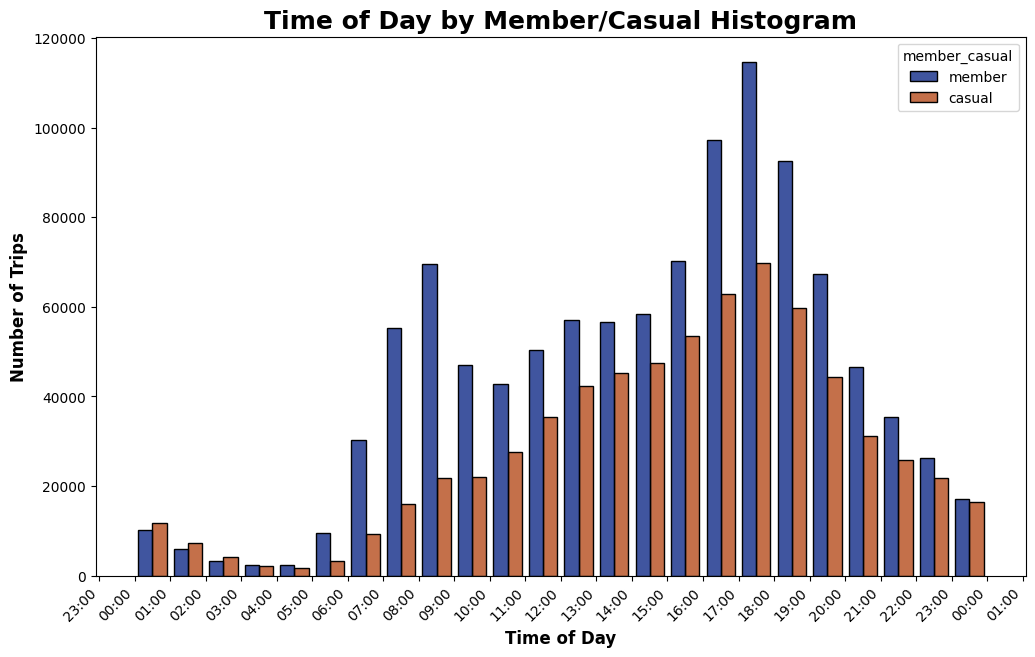

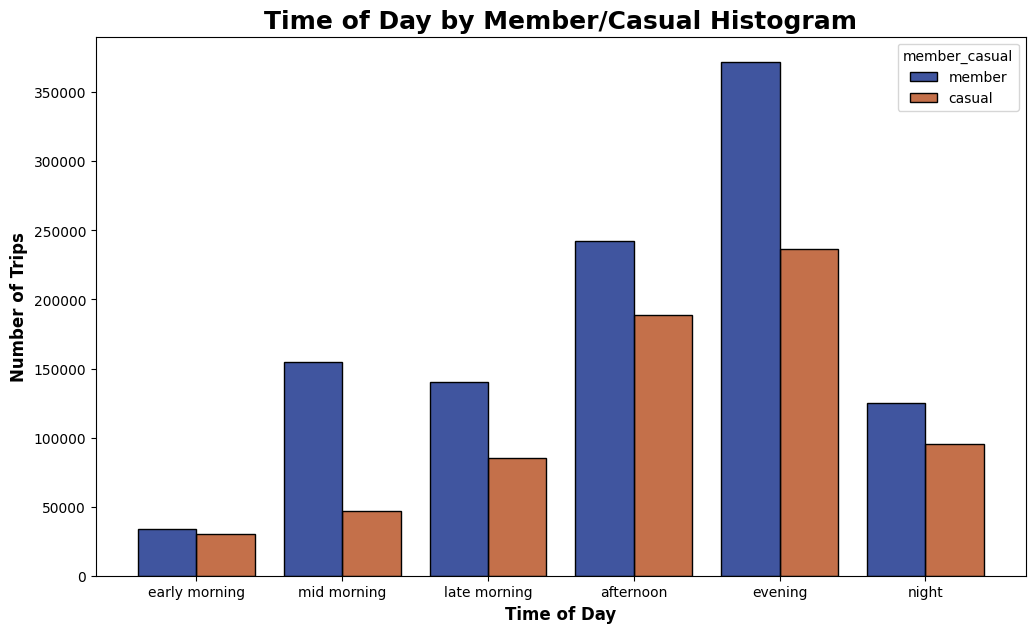

AVG NUMBER OF TRIPS PER DAY BY TIME OF DAY


time_of_day member_casual  avg_num_trips_per_day  conf_int_lb  \
0   Early Morning        member                 370.97       239.53   
1     Mid Morning        member                1703.13      1571.69   
2    Late Morning        member                1541.67      1410.23   
3       Afternoon        member                2663.19      2531.75   
4         Evening        member                4083.81      3952.37   
5           Night        member                1377.22      1245.78   
6   Early Morning        casual                 334.04       202.60   
7     Mid Morning        casual                 516.97       385.53   
8    Late Morning        casual                 933.54       802.10   
9       Afternoon        casual                2071.01      1939.57   
10        Evening        casual                2600.21      2468.77   
11          Night        casual                1046.38       914.94   

    conf_int_ub  
0        502.41  
1       1834.57  
2       1673.11  
3       2794.63  
4       4215.25  
5       1508.66  
6        465.48  
7        648.41  
8       1064.98  
9       2202.45  
10      2731.65  
11      1177.82

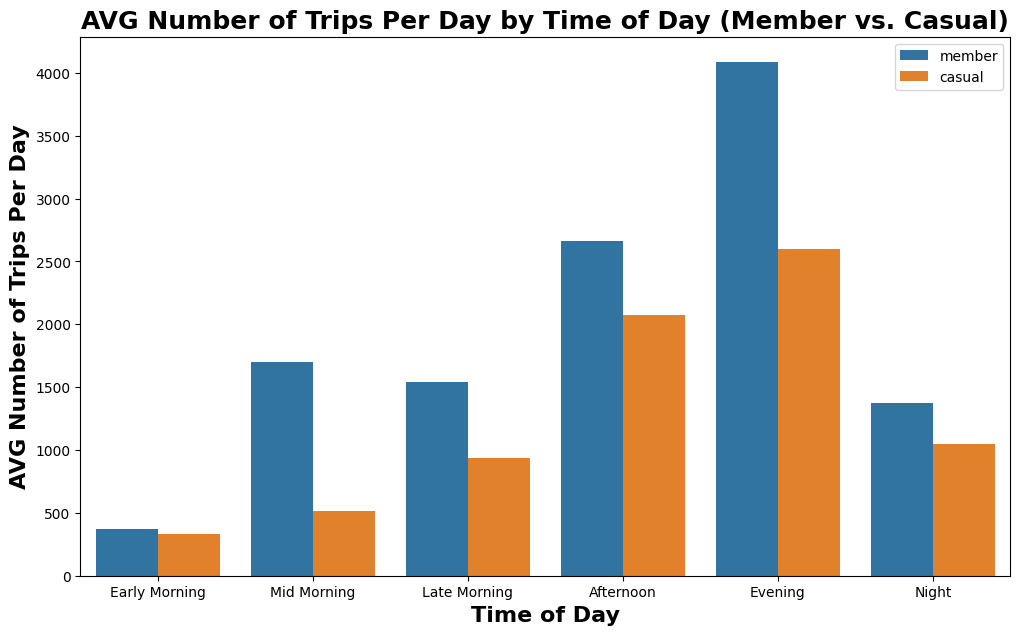

In [45]:
# Check differences in times of day for Member vs. Casual Rider trips

df1_mem = df1[df1['member_casual'] == 'member']
df1_cas = df1[df1['member_casual'] == 'casual']

print('\033[1mMember Average Trip Time of Day:\033[0m',df1_mem['start_time'].mean())
print('\033[1mMember Median Trip Time of Day:\033[0m',df1_mem['start_time'].median())
print('\n')

print('\033[1mCasual Rider Average Trip Time of Day:\033[0m',df1_cas['start_time'].mean())
print('\033[1mCasual Rider Median Trip Time of Day:\033[0m',df1_cas['start_time'].median())

plt.figure(figsize=(14,4))
ax = sns.boxplot(x=df1['start_time'],hue=df1['member_casual'],orient="h");
plt.title('Member vs. Casual Rider Trip Times of Day',fontsize=20,fontweight='bold');
plt.xlabel('Time of Day',fontsize=16,fontweight='bold');
xformatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xformatter)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

# Trip Time of Day by Member/Casual Rider Histogram

#numhour = date2num(df1['start_time'])

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x=df1['start_time'], 
                  bins=24,
                  hue='member_casual',
                  multiple='dodge',
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Time of Day',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Time of Day by Member/Casual Histogram',fontsize=18,fontweight='bold');
xformatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xformatter)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

mem_earlyam_trips_per_day = pd.DataFrame(df1_mem[df1_mem['time_of_day'] == 'early morning']['start_date'].value_counts().reset_index())
avg_mem_earlyam_trips_per_day = round(mem_earlyam_trips_per_day['count'].mean(),2)

mem_midam_trips_per_day = pd.DataFrame(df1_mem[df1_mem['time_of_day'] == 'mid morning']['start_date'].value_counts().reset_index())
avg_mem_midam_trips_per_day = round(mem_midam_trips_per_day['count'].mean(),2)

mem_lateam_trips_per_day = pd.DataFrame(df1_mem[df1_mem['time_of_day'] == 'late morning']['start_date'].value_counts().reset_index())
avg_mem_lateam_trips_per_day = round(mem_lateam_trips_per_day['count'].mean(),2)

mem_afternoon_trips_per_day = pd.DataFrame(df1_mem[df1_mem['time_of_day'] == 'afternoon']['start_date'].value_counts().reset_index())
avg_mem_afternoon_trips_per_day = round(mem_afternoon_trips_per_day['count'].mean(),2)

mem_evening_trips_per_day = pd.DataFrame(df1_mem[df1_mem['time_of_day'] == 'evening']['start_date'].value_counts().reset_index())
avg_mem_evening_trips_per_day = round(mem_evening_trips_per_day['count'].mean(),2)

mem_night_trips_per_day = pd.DataFrame(df1_mem[df1_mem['time_of_day'] == 'night']['start_date'].value_counts().reset_index())
avg_mem_night_trips_per_day = round(mem_night_trips_per_day['count'].mean(),2)

avg_mem_trips_tod_df = pd.DataFrame(['Early Morning','Mid Morning','Late Morning','Afternoon','Evening','Night'],[avg_mem_earlyam_trips_per_day,avg_mem_midam_trips_per_day,avg_mem_lateam_trips_per_day,avg_mem_afternoon_trips_per_day,avg_mem_evening_trips_per_day,avg_mem_night_trips_per_day])
avg_mem_trips_tod_df = avg_mem_trips_tod_df.reset_index().rename(columns={0:'time_of_day','index':'avg_num_trips_per_day'})
avg_mem_trips_tod_df.insert(avg_mem_trips_tod_df.columns.get_loc("time_of_day"),"avg_num_trips_per_day",avg_mem_trips_tod_df.pop("avg_num_trips_per_day"))

#print('\033[1mAVG NUMBER OF TRIPS PER DAY BY TIME OF DAY (MEMBERS)\033[0m')
#display(avg_mem_trips_tod_df)

cas_earlyam_trips_per_day = pd.DataFrame(df1_cas[df1_cas['time_of_day'] == 'early morning']['start_date'].value_counts().reset_index())
avg_cas_earlyam_trips_per_day = round(cas_earlyam_trips_per_day['count'].mean(),2)

cas_midam_trips_per_day = pd.DataFrame(df1_cas[df1_cas['time_of_day'] == 'mid morning']['start_date'].value_counts().reset_index())
avg_cas_midam_trips_per_day = round(cas_midam_trips_per_day['count'].mean(),2)

cas_lateam_trips_per_day = pd.DataFrame(df1_cas[df1_cas['time_of_day'] == 'late morning']['start_date'].value_counts().reset_index())
avg_cas_lateam_trips_per_day = round(cas_lateam_trips_per_day['count'].mean(),2)

cas_afternoon_trips_per_day = pd.DataFrame(df1_cas[df1_cas['time_of_day'] == 'afternoon']['start_date'].value_counts().reset_index())
avg_cas_afternoon_trips_per_day = round(cas_afternoon_trips_per_day['count'].mean(),2)

cas_evening_trips_per_day = pd.DataFrame(df1_cas[df1_cas['time_of_day'] == 'evening']['start_date'].value_counts().reset_index())
avg_cas_evening_trips_per_day = round(cas_evening_trips_per_day['count'].mean(),2)

cas_night_trips_per_day = pd.DataFrame(df1_cas[df1_cas['time_of_day'] == 'night']['start_date'].value_counts().reset_index())
avg_cas_night_trips_per_day = round(cas_night_trips_per_day['count'].mean(),2)

avg_cas_trips_tod_df = pd.DataFrame(['Early Morning','Mid Morning','Late Morning','Afternoon','Evening','Night'],[avg_cas_earlyam_trips_per_day,avg_cas_midam_trips_per_day,avg_cas_lateam_trips_per_day,avg_cas_afternoon_trips_per_day,avg_cas_evening_trips_per_day,avg_cas_night_trips_per_day])
avg_cas_trips_tod_df = avg_cas_trips_tod_df.reset_index().rename(columns={0:'time_of_day','index':'avg_num_trips_per_day'})
avg_cas_trips_tod_df.insert(avg_cas_trips_tod_df.columns.get_loc("time_of_day"),"avg_num_trips_per_day",avg_cas_trips_tod_df.pop("avg_num_trips_per_day"))

#print('\033[1mAVG NUMBER OF TRIPS PER DAY BY TIME OF DAY (CASUAL RIDERS)\033[0m')
#display(avg_cas_trips_tod_df)

avg_mem_cas_trips_tod_df = pd.concat([avg_mem_trips_tod_df,avg_cas_trips_tod_df])
avg_mem_cas_trips_tod_df = avg_mem_cas_trips_tod_df.reset_index(drop=True)
avg_mem_cas_trips_tod_df['member_casual'] = ['member','member','member','member','member','member','casual','casual','casual','casual','casual','casual']
avg_mem_cas_trips_tod_est_SE = pd.DataFrame([stats.sem(mem_earlyam_trips_per_day['count']),stats.sem(mem_midam_trips_per_day['count']),stats.sem(mem_lateam_trips_per_day['count']),
                                                 stats.sem(mem_afternoon_trips_per_day['count']),stats.sem(mem_evening_trips_per_day['count']),stats.sem(mem_night_trips_per_day['count']),
                                                 stats.sem(cas_earlyam_trips_per_day['count']),stats.sem(cas_midam_trips_per_day['count']),stats.sem(cas_lateam_trips_per_day['count']),
                                                 stats.sem(cas_afternoon_trips_per_day['count']),stats.sem(cas_evening_trips_per_day['count']),stats.sem(cas_night_trips_per_day['count'])])
#display(avg_mem_cas_trips_tod_est_SE)
avg_mem_cas_trips_tod_CI_columns = make_ci_columns(avg_mem_cas_trips_tod_df['avg_num_trips_per_day'],avg_mem_cas_trips_tod_est_SE[0])
avg_mem_cas_trips_tod_df = avg_mem_cas_trips_tod_df.merge(avg_mem_cas_trips_tod_CI_columns,left_index=True,right_index=True)
avg_mem_cas_trips_tod_df.insert(avg_mem_cas_trips_tod_df.columns.get_loc("member_casual"),"conf_int_lb",avg_mem_cas_trips_tod_df.pop("conf_int_lb"))
avg_mem_cas_trips_tod_df.insert(avg_mem_cas_trips_tod_df.columns.get_loc("member_casual"),"conf_int_ub",avg_mem_cas_trips_tod_df.pop("conf_int_ub"))
avg_mem_cas_trips_tod_df.insert(avg_mem_cas_trips_tod_df.columns.get_loc("avg_num_trips_per_day"),"member_casual",avg_mem_cas_trips_tod_df.pop("member_casual"))

time_order = ['early morning','mid morning','late morning','afternoon','evening','night']
time_day_sorted_df = df1.copy()
time_day_sorted_df['time_of_day'] = pd.Categorical(time_day_sorted_df['time_of_day'],categories=time_order)
time_day_sorted_df = time_day_sorted_df.sort_values(by='time_of_day')

plt.figure(figsize=(12,7))
ax = sns.histplot(data=time_day_sorted_df, x=time_day_sorted_df['time_of_day'],
                  hue='member_casual',
                  multiple='dodge',
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Time of Day',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Time of Day by Member/Casual Histogram',fontsize=18,fontweight='bold');
plt.show()

print('\033[1mAVG NUMBER OF TRIPS PER DAY BY TIME OF DAY\033[0m')
display(avg_mem_cas_trips_tod_df)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=avg_mem_cas_trips_tod_df['time_of_day'], y=avg_mem_cas_trips_tod_df['avg_num_trips_per_day'],hue=avg_mem_cas_trips_tod_df['member_casual'])
ax.set_title("AVG Number of Trips Per Day by Time of Day (Member vs. Casual)",fontsize=18,fontweight='bold')
ax.set_xlabel("Time of Day",fontsize=16,fontweight='bold')
ax.set_ylabel("AVG Number of Trips Per Day",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend()
plt.show()

### Observations/Insights

Member trips average time of day is about 2:30 PM whereas Casual Rider trips average time of day is about 3:03 PM.

Overall, the most number of trips per day occur around 6 PM and the least number of trips occur around 4 AM - 5 AM.

AVG NUMBER OF TRIPS PER WEEKDAY (MEMBERS)


weekday  avg_num_trips  conf_int_lb  conf_int_ub
0     Monday          10448     8727.697    12168.303
1    Tuesday          12281    10560.697    14001.303
2  Wednesday          13206    11485.697    14926.303
3   Thursday          13713    11992.697    15433.303
4     Friday          12663    10942.697    14383.303
5   Saturday          11155     9434.697    12875.303
6     Sunday           8710     6989.697    10430.303

AVG NUMBER OF TRIPS PER WEEKDAY (CASUAL RIDERS)


weekday  avg_num_trips  conf_int_lb  conf_int_ub
0     Monday           5686     3159.082     8212.918
1    Tuesday           5704     3177.082     8230.918
2  Wednesday           6423     3896.082     8949.918
3   Thursday           7284     4757.082     9810.918
4     Friday           8542     6015.082    11068.918
5   Saturday          10986     8459.082    13512.918
6     Sunday           7885     5358.082    10411.918

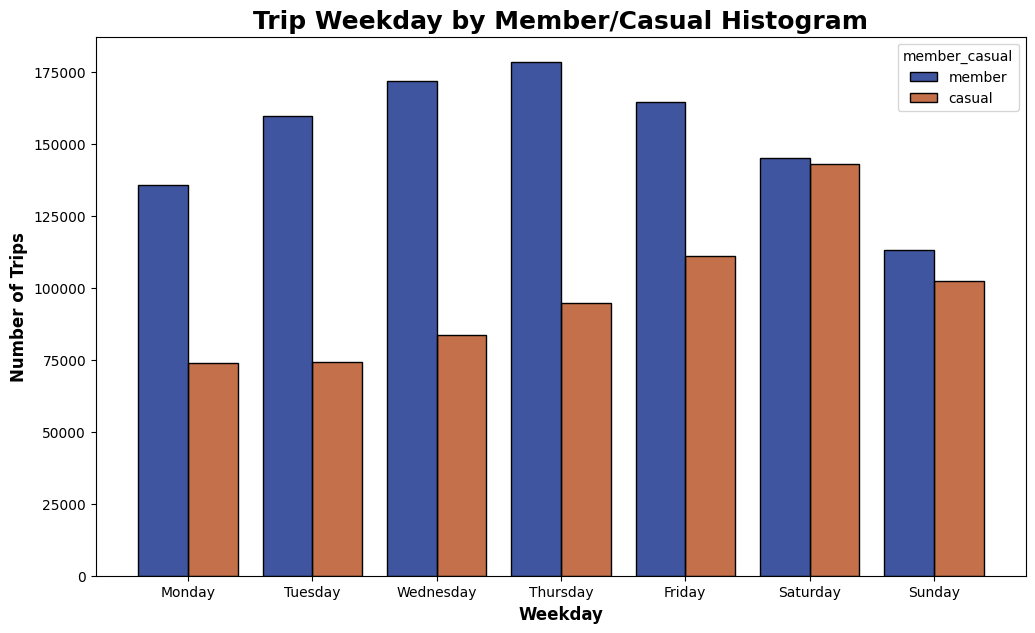

In [18]:
# Check difference in trips by Weekday for Members vs. Casual Riders

print('\033[1mAVG NUMBER OF TRIPS PER WEEKDAY (MEMBERS)\033[0m')
display(avg_mem_trips_weekday_df)

print('\033[1mAVG NUMBER OF TRIPS PER WEEKDAY (CASUAL RIDERS)\033[0m')
display(avg_cas_trips_weekday_df)

# Trip Weekday by Member/Casual Rider Histogram

df1['weekday'] = pd.Categorical(df1['weekday'],categories=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x=df1['weekday'],
                  hue='member_casual',
                  discrete=1,
                  multiple='dodge',
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Weekday',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Trip Weekday by Member/Casual Histogram',fontsize=18,fontweight='bold');
plt.show()

### Observations/Insights

These numbers/visuals further reinforce the pattern described above regarding trip volumes by day of the week for Members and Casual Riders.

AVG Member Classic Bike Trips per Day: 5440.53 (95% CI (5089.071, 5791.984) )
AVG Member Electric Bike Trips per Day: 6299.46 (95% CI (5970.394, 6628.529) )


AVG Casual Rider Classic Bike Trips per Day: 2836.16 (95% CI (2469.832, 3202.498) )
AVG Casual Rider Electric Bike Trips per Day: 4259.91 (95% CI (3864.55, 4655.274) )
AVG Casual Rider Docked Bike Trips per Day: 406.08 (95% CI (355.793, 456.361) )


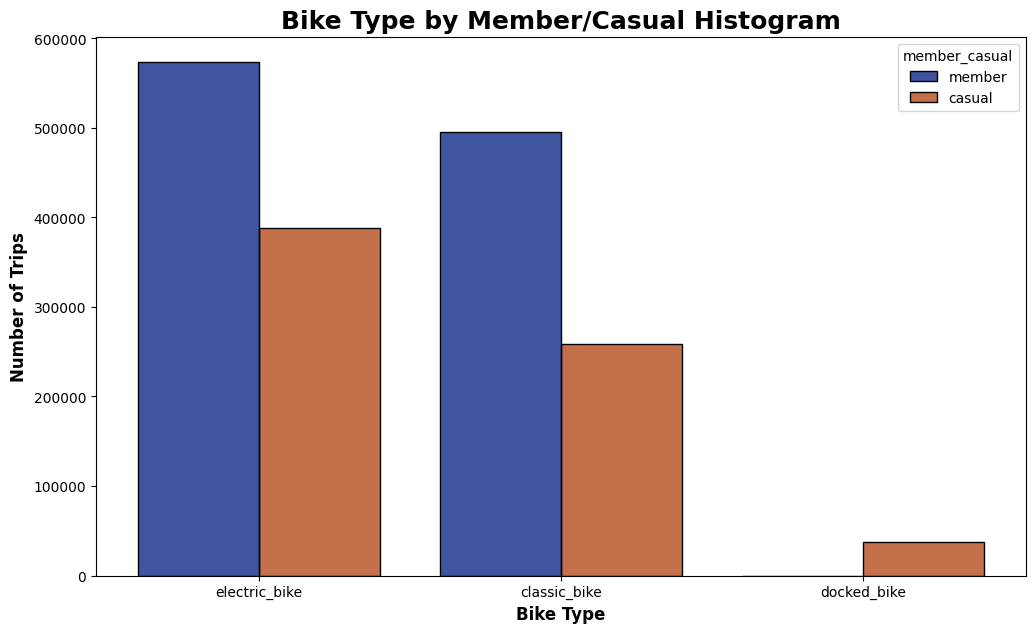

In [19]:
# Check difference in trips by bike type for Members vs. Casual Riders

mem_classic_trips_per_day = pd.DataFrame(df1_mem[df1_mem['rideable_type'] == 'classic_bike']['start_date'].value_counts().reset_index())
avg_mem_classic_trips_per_day = mem_classic_trips_per_day['count'].mean()

mem_electric_trips_per_day = pd.DataFrame(df1_mem[df1_mem['rideable_type'] == 'electric_bike']['start_date'].value_counts().reset_index())
avg_mem_electric_trips_per_day = mem_electric_trips_per_day['count'].mean()

cas_classic_trips_per_day = pd.DataFrame(df1_cas[df1_cas['rideable_type'] == 'classic_bike']['start_date'].value_counts().reset_index())
avg_cas_classic_trips_per_day = cas_classic_trips_per_day['count'].mean()

cas_electric_trips_per_day = pd.DataFrame(df1_cas[df1_cas['rideable_type'] == 'electric_bike']['start_date'].value_counts().reset_index())
avg_cas_electric_trips_per_day = cas_electric_trips_per_day['count'].mean()

cas_docked_trips_per_day = pd.DataFrame(df1_cas[df1_cas['rideable_type'] == 'docked_bike']['start_date'].value_counts().reset_index())
avg_cas_docked_trips_per_day = cas_docked_trips_per_day['count'].mean()

mem_classic_trips_per_day_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_classic_trips_per_day['count'].mean(), scale=stats.sem(mem_classic_trips_per_day['count']))
mem_classic_trips_per_day_mean_CI = (round(mem_classic_trips_per_day_mean_CI[0],3),round(mem_classic_trips_per_day_mean_CI[1],3)) 
print('\033[1mAVG Member Classic Bike Trips per Day:\033[0m',round(avg_mem_classic_trips_per_day,2),'(95% CI',mem_classic_trips_per_day_mean_CI,')')

mem_electric_trips_per_day_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_electric_trips_per_day['count'].mean(), scale=stats.sem(mem_electric_trips_per_day['count']))
mem_electric_trips_per_day_mean_CI = (round(mem_electric_trips_per_day_mean_CI[0],3),round(mem_electric_trips_per_day_mean_CI[1],3)) 
print('\033[1mAVG Member Electric Bike Trips per Day:\033[0m',round(avg_mem_electric_trips_per_day,2),'(95% CI',mem_electric_trips_per_day_mean_CI,')')
print('\n')

cas_classic_trips_per_day_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_classic_trips_per_day['count'].mean(), scale=stats.sem(cas_classic_trips_per_day['count']))
cas_classic_trips_per_day_mean_CI = (round(cas_classic_trips_per_day_mean_CI[0],3),round(cas_classic_trips_per_day_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Classic Bike Trips per Day:\033[0m',round(avg_cas_classic_trips_per_day,2),'(95% CI',cas_classic_trips_per_day_mean_CI,')')

cas_electric_trips_per_day_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_electric_trips_per_day['count'].mean(), scale=stats.sem(cas_electric_trips_per_day['count']))
cas_electric_trips_per_day_mean_CI = (round(cas_electric_trips_per_day_mean_CI[0],3),round(cas_electric_trips_per_day_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Electric Bike Trips per Day:\033[0m',round(avg_cas_electric_trips_per_day,2),'(95% CI',cas_electric_trips_per_day_mean_CI,')')

cas_docked_trips_per_day_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_docked_trips_per_day['count'].mean(), scale=stats.sem(cas_docked_trips_per_day['count']))
cas_docked_trips_per_day_mean_CI = (round(cas_docked_trips_per_day_mean_CI[0],3),round(cas_docked_trips_per_day_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Docked Bike Trips per Day:\033[0m',round(avg_cas_docked_trips_per_day,2),'(95% CI',cas_docked_trips_per_day_mean_CI,')')

# Trip Bike Type by Member/Casual Rider Histogram

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x=df1['rideable_type'],
                  hue='member_casual',
                  discrete=1,
                  multiple='dodge',
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Bike Type',fontsize=12,fontweight='bold')
ax.set_ylabel('Number of Trips',fontsize=12,fontweight='bold')
plt.title('Bike Type by Member/Casual Histogram',fontsize=18,fontweight='bold');
plt.show()

### Observations/Insights

Electric bikes had the highest number of trips for both Members and Casual Riders, Classic bikes had the second highest number of trips for both groups, and Docked bikes had the fewest number of trips (only Casual Riders used docked bikes).

There was a larger difference between average numbers of Casual Riders who used Electric bikes vs. Classic bikes per day than the difference between average numbers of Members who used Electric bikes vs. Classic bikes per day.

Bike Type by Start/End Stations (Members)


start_end_name  rideable_type  \
0            Ellis Ave & 60th St University Ave & 57th St   classic_bike   
1            University Ave & 57th St Ellis Ave & 60th St   classic_bike   
2                 Ellis Ave & 55th St Ellis Ave & 60th St   classic_bike   
3                 Ellis Ave & 60th St Ellis Ave & 55th St   classic_bike   
4       W Armitage Ave & N Sheffield Ave W Armitage Av...  electric_bike   
...                                                   ...            ...   
153454  LaSalle St & Washington St Clark St & Wrightwo...   classic_bike   
153455  LaSalle St & Washington St Clark St & Winnemac...   classic_bike   
153456   LaSalle St & Washington St Clark St & Leland Ave  electric_bike   
153457     LaSalle St & Washington St Clark St & Grace St  electric_bike   
153458                Zapata Academy Ogden Ave & Race Ave  electric_bike   

        count  
0        1206  
1        1036  
2         902  
3         898  
4         676  
...       ...  
153454      1  
153455      1  
153456      1  
153457      1  
153458      1  

[153459 rows x 3 columns]

AVG Member Classic Bike Trips per Start/End Station Combo: 7.22 (95% CI (7.091, 7.345) )*
AVG Member Electric Bike Trips per Start/End Station Combo: 4.65 (95% CI (4.583, 4.716) )*


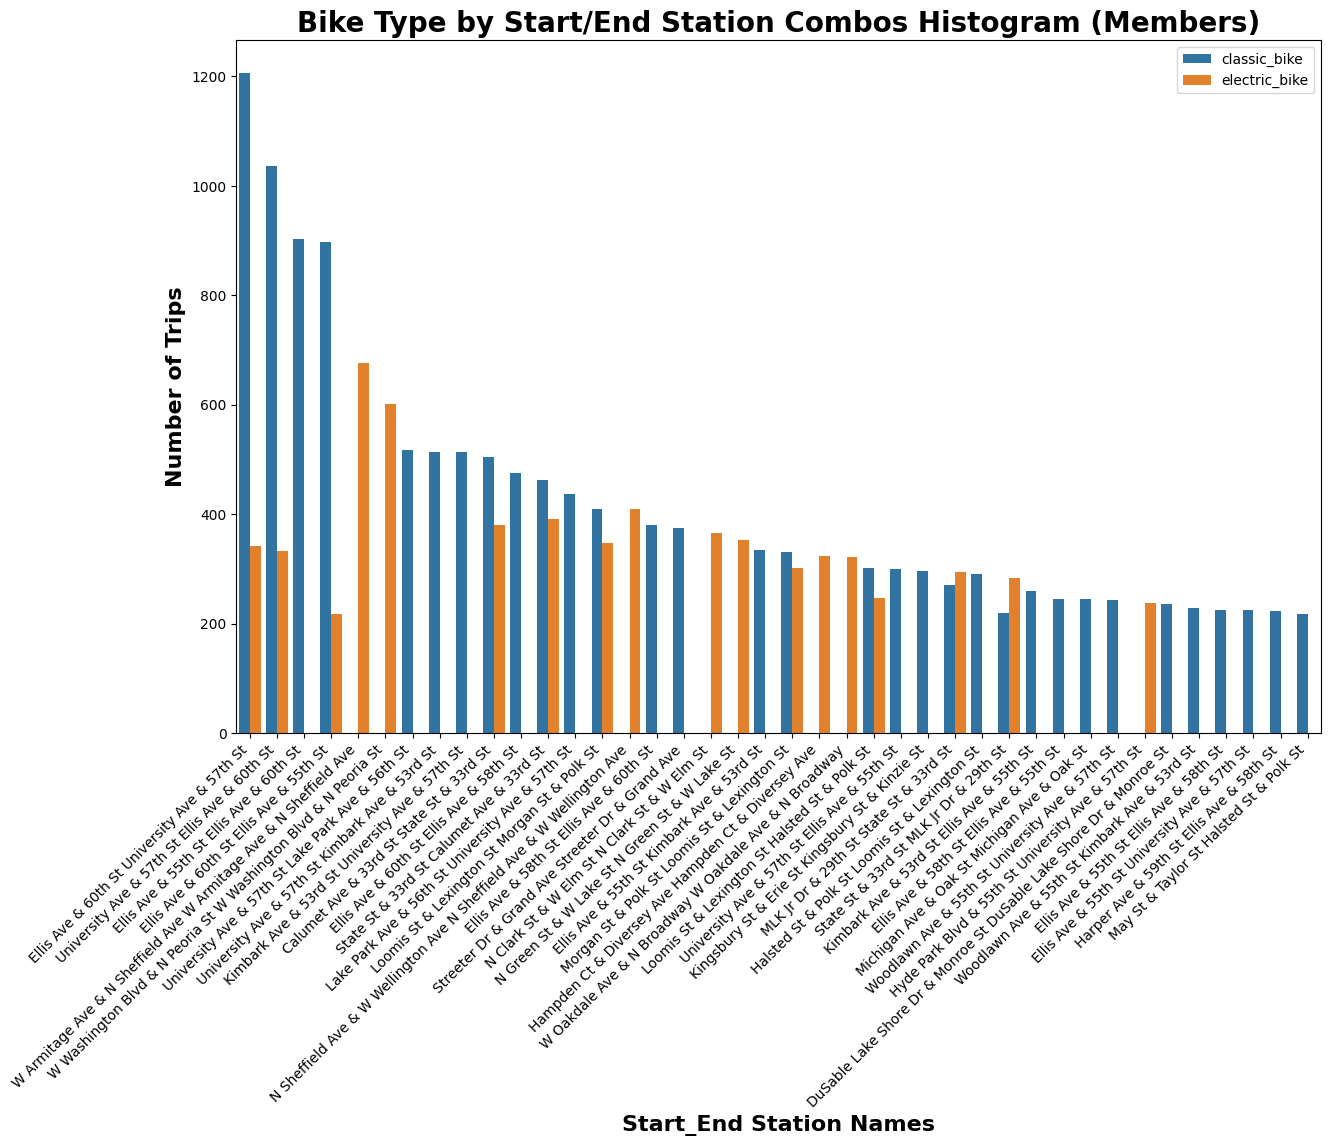

Bike Type by Start/End Stations (Casual Riders)


start_end_name  rideable_type  \
0         Streeter Dr & Grand Ave Streeter Dr & Grand Ave   classic_bike   
1       DuSable Lake Shore Dr & Monroe St DuSable Lake...   classic_bike   
2       DuSable Lake Shore Dr & Monroe St Streeter Dr ...   classic_bike   
3             Michigan Ave & Oak St Michigan Ave & Oak St   classic_bike   
4         Streeter Dr & Grand Ave Streeter Dr & Grand Ave  electric_bike   
...                                                   ...            ...   
136320  Kildare Ave & Chicago Ave Public Rack - Lamon ...  electric_bike   
136321  Kildare Ave & Chicago Ave Loomis St & Jackson ...  electric_bike   
136322    Kildare Ave & Chicago Ave Latrobe Ave & Lake St  electric_bike   
136323  Kildare Ave & Chicago Ave Karlov Ave & Kamerli...  electric_bike   
136324           Zapata Academy Wabash Ave & Roosevelt Rd  electric_bike   

        count  
0        1849  
1        1328  
2         932  
3         905  
4         819  
...       ...  
136320      1  
136321      1  
136322      1  
136323      1  
136324      1  

[136325 rows x 3 columns]

AVG Casual Rider Classic Bike Trips per Start/End Station Combo: 4.94 (95% CI (4.793, 5.089) )*
AVG Casual Rider Electric Bike Trips per Start/End Station Combo: 3.74 (95% CI (3.675, 3.812) )*
AVG Casual Rider Docked Bike Trips per Start/End Station Combo: 2.73 (95% CI (2.567, 2.886) )*


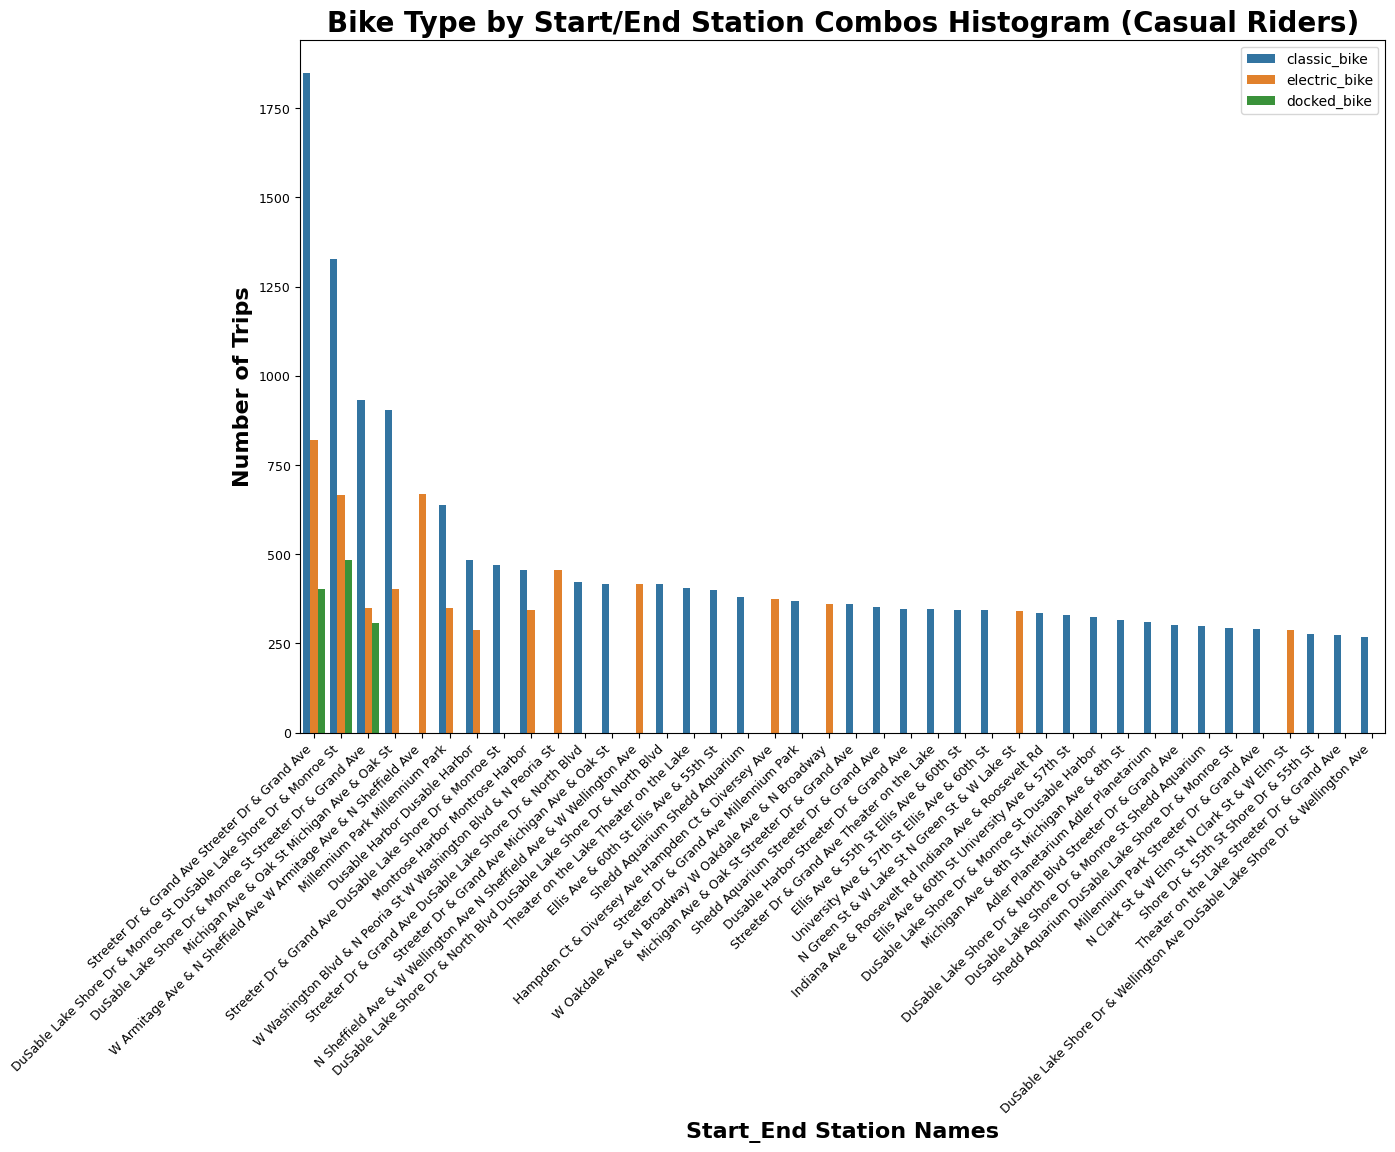

Number of Electric Bike Trips with Null Start/End Stations: 300103
Number of Classic Bike Trips with Null Start/End Stations: 1136
Number of Docked Bike Trips with Null Start/End Stations: 899


Start Stations with Trips of 1 or More Bike Types:


start_station_id                  rideable_type
0              021320                [electric_bike]
1                1011                [electric_bike]
2                1012                [electric_bike]
3                1013                [electric_bike]
4                1015                [electric_bike]
...               ...                            ...
1407     chargingstx1  [electric_bike, classic_bike]
1408     chargingstx2  [classic_bike, electric_bike]
1409     chargingstx3  [electric_bike, classic_bike]
1410     chargingstx4  [classic_bike, electric_bike]
1411     chargingstx5  [classic_bike, electric_bike]

[1412 rows x 2 columns]

Start Stations with Trips of Only 1 Bike Type:


start_station_id    rideable_type
0              021320  [electric_bike]
1                1011  [electric_bike]
2                1012  [electric_bike]
3                1013  [electric_bike]
4                1015  [electric_bike]
...               ...              ...
1099              995  [electric_bike]
1100              996  [electric_bike]
1101              997  [electric_bike]
1102              998  [electric_bike]
1103              999  [electric_bike]

[725 rows x 2 columns]

Number of Start Stations With Only Electric Bike Trips: 724
Number of Start Stations With Only Classic Bike Trips: 1
Number of Start Stations With Only Docked Bike Trips: 0


Number of Start Stations That Included Docked Bike Trips: 625


End Stations with Trips of 1 or More Bike Types:


end_station_id                               rideable_type
0            021320                             [electric_bike]
1              1011                             [electric_bike]
2              1013                             [electric_bike]
3              1015                             [electric_bike]
4              1017                             [electric_bike]
...             ...                                         ...
1403   chargingstx1  [classic_bike, electric_bike, docked_bike]
1404   chargingstx2  [classic_bike, electric_bike, docked_bike]
1405   chargingstx3  [classic_bike, electric_bike, docked_bike]
1406   chargingstx4  [classic_bike, electric_bike, docked_bike]
1407   chargingstx5  [electric_bike, classic_bike, docked_bike]

[1408 rows x 2 columns]

End Stations with Trips of Only 1 Bike Type:


end_station_id    rideable_type
0            021320  [electric_bike]
1              1011  [electric_bike]
2              1013  [electric_bike]
3              1015  [electric_bike]
4              1017  [electric_bike]
...             ...              ...
1095            993  [electric_bike]
1096            995  [electric_bike]
1097            996  [electric_bike]
1098            997  [electric_bike]
1099            999  [electric_bike]

[717 rows x 2 columns]

Number of End Stations With Only Electric Bike Trips: 716
Number of End Stations With Only Classic Bike Trips: 1
Number of End Stations With Only Docked Bike Trips: 0


Number of End Stations That Included Docked Bike Trips: 620


In [44]:
# Bike type by top start/end station combos (member vs. casual) histograms

#display(start_end_name_vol)

df1 = df1.replace('nan', np.nan)
df1_nonull = df1.dropna()
df1_nonull_mem = df1_nonull[df1_nonull['member_casual'] == 'member']
df1_nonull_cas = df1_nonull[df1_nonull['member_casual'] == 'casual']

mem_classic_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['rideable_type'] == 'classic_bike']['start_end_name'].value_counts().reset_index())
avg_mem_classic_startend_trips = mem_classic_startend_trips['count'].mean()

mem_electric_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['rideable_type'] == 'electric_bike']['start_end_name'].value_counts().reset_index())
avg_mem_electric_startend_trips = mem_electric_startend_trips['count'].mean()

bike_stations_mem_df = pd.DataFrame(df1_nonull_mem.groupby(by=['start_end_name'])['rideable_type'].value_counts().reset_index())
bike_stations_mem_df = bike_stations_mem_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mBike Type by Start/End Stations (Members)\033[0m')
display(bike_stations_mem_df)

mem_classic_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_classic_startend_trips['count'].mean(), scale=stats.sem(mem_classic_startend_trips['count']))
mem_classic_startend_trips_mean_CI = (round(mem_classic_startend_trips_mean_CI[0],3),round(mem_classic_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Classic Bike Trips per Start/End Station Combo:\033[0m',round(avg_mem_classic_startend_trips,2),'(95% CI',mem_classic_startend_trips_mean_CI,')*')

mem_electric_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_electric_startend_trips['count'].mean(), scale=stats.sem(mem_electric_startend_trips['count']))
mem_electric_startend_trips_mean_CI = (round(mem_electric_startend_trips_mean_CI[0],3),round(mem_electric_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Electric Bike Trips per Start/End Station Combo:\033[0m',round(avg_mem_electric_startend_trips,2),'(95% CI',mem_electric_startend_trips_mean_CI,')*')

# Member barplot

plt.figure(figsize=(14,9))
ax = sns.barplot(x=bike_stations_mem_df['start_end_name'][:50], y=bike_stations_mem_df['count'][:50],hue=bike_stations_mem_df['rideable_type'])
ax.set_title("Bike Type by Start/End Station Combos Histogram (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

bike_stations_cas_df = pd.DataFrame(df1_nonull_cas.groupby(by=['start_end_name'])['rideable_type'].value_counts().reset_index())
bike_stations_cas_df = bike_stations_cas_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mBike Type by Start/End Stations (Casual Riders)\033[0m')
display(bike_stations_cas_df)

cas_classic_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['rideable_type'] == 'classic_bike']['start_end_name'].value_counts().reset_index())
avg_cas_classic_startend_trips = cas_classic_startend_trips['count'].mean()

cas_electric_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['rideable_type'] == 'electric_bike']['start_end_name'].value_counts().reset_index())
avg_cas_electric_startend_trips = cas_electric_startend_trips['count'].mean()

cas_docked_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['rideable_type'] == 'docked_bike']['start_end_name'].value_counts().reset_index())
avg_cas_docked_startend_trips = cas_docked_startend_trips['count'].mean()

cas_classic_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_classic_startend_trips['count'].mean(), scale=stats.sem(cas_classic_startend_trips['count']))
cas_classic_startend_trips_mean_CI = (round(cas_classic_startend_trips_mean_CI[0],3),round(cas_classic_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Classic Bike Trips per Start/End Station Combo:\033[0m',round(avg_cas_classic_startend_trips,2),'(95% CI',cas_classic_startend_trips_mean_CI,')*')

cas_electric_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_electric_startend_trips['count'].mean(), scale=stats.sem(cas_electric_startend_trips['count']))
cas_electric_startend_trips_mean_CI = (round(cas_electric_startend_trips_mean_CI[0],3),round(cas_electric_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Electric Bike Trips per Start/End Station Combo:\033[0m',round(avg_cas_electric_startend_trips,2),'(95% CI',cas_electric_startend_trips_mean_CI,')*')

cas_docked_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_docked_startend_trips['count'].mean(), scale=stats.sem(cas_docked_startend_trips['count']))
cas_docked_startend_trips_mean_CI = (round(cas_docked_startend_trips_mean_CI[0],3),round(cas_docked_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Docked Bike Trips per Start/End Station Combo:\033[0m',round(avg_cas_docked_startend_trips,2),'(95% CI',cas_docked_startend_trips_mean_CI,')*')

# Casual Rider barplot

plt.figure(figsize=(14,9))
ax = sns.barplot(x=bike_stations_cas_df['start_end_name'][:50], y=bike_stations_cas_df['count'][:50],hue=bike_stations_cas_df['rideable_type'])
ax.set_title("Bike Type by Start/End Station Combos Histogram (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

electric_nulls = len(df1[(df1['rideable_type'] == 'electric_bike') & ((df1['start_station_name'].isnull()) | (df1['start_station_id'].isnull()) | (df1['end_station_name'].isnull()) | (df1['end_station_id'].isnull()))])
print('\033[1mNumber of Electric Bike Trips with Null Start/End Stations:\033[0m',electric_nulls)

classic_nulls = len(df1[(df1['rideable_type'] == 'classic_bike') & ((df1['start_station_name'].isnull()) | (df1['start_station_id'].isnull()) | (df1['end_station_name'].isnull()) | (df1['end_station_id'].isnull()))])
print('\033[1mNumber of Classic Bike Trips with Null Start/End Stations:\033[0m',classic_nulls)

docked_nulls = len(df1[(df1['rideable_type'] == 'docked_bike') & ((df1['start_station_name'].isnull()) | (df1['start_station_id'].isnull()) | (df1['end_station_name'].isnull()) | (df1['end_station_id'].isnull()))])
print('\033[1mNumber of Docked Bike Trips with Null Start/End Stations:\033[0m',docked_nulls)
print('\n')

ssid_bike_type_df = pd.DataFrame(df1.groupby('start_station_id').apply(lambda x: x['rideable_type'].unique()).reset_index())
ssid_bike_type_df = ssid_bike_type_df.rename(columns={0:'rideable_type'})

ssid_one_bike_type_df = ssid_bike_type_df[ssid_bike_type_df['rideable_type'].str.len() == 1]

print('\033[1mStart Stations with Trips of 1 or More Bike Types:\033[0m')
display(ssid_bike_type_df)

print('\033[1mStart Stations with Trips of Only 1 Bike Type:\033[0m')
display(ssid_one_bike_type_df)

print('\033[1mNumber of Start Stations With Only Electric Bike Trips:\033[0m',len(ssid_one_bike_type_df[ssid_one_bike_type_df['rideable_type'] == 'electric_bike']))
print('\033[1mNumber of Start Stations With Only Classic Bike Trips:\033[0m',len(ssid_one_bike_type_df[ssid_one_bike_type_df['rideable_type'] == 'classic_bike']))
print('\033[1mNumber of Start Stations With Only Docked Bike Trips:\033[0m',len(ssid_one_bike_type_df[ssid_one_bike_type_df['rideable_type'] == 'docked_bike']))
print('\n')

ssid_bike_type_df = ssid_bike_type_df.explode('rideable_type')
docked_ssid_df = ssid_bike_type_df[ssid_bike_type_df['rideable_type'] == 'docked_bike']
#display(ssid_bike_type_df)
#display(docked_ssid_df)
print('\033[1mNumber of Start Stations That Included Docked Bike Trips:\033[0m',len(docked_ssid_df))
print('\n')

esid_bike_type_df = pd.DataFrame(df1.groupby('end_station_id').apply(lambda x: x['rideable_type'].unique()).reset_index())
esid_bike_type_df = esid_bike_type_df.rename(columns={0:'rideable_type'})

esid_one_bike_type_df = esid_bike_type_df[esid_bike_type_df['rideable_type'].str.len() == 1]

print('\033[1mEnd Stations with Trips of 1 or More Bike Types:\033[0m')
display(esid_bike_type_df)

print('\033[1mEnd Stations with Trips of Only 1 Bike Type:\033[0m')
display(esid_one_bike_type_df)

print('\033[1mNumber of End Stations With Only Electric Bike Trips:\033[0m',len(esid_one_bike_type_df[esid_one_bike_type_df['rideable_type'] == 'electric_bike']))
print('\033[1mNumber of End Stations With Only Classic Bike Trips:\033[0m',len(esid_one_bike_type_df[esid_one_bike_type_df['rideable_type'] == 'classic_bike']))
print('\033[1mNumber of End Stations With Only Docked Bike Trips:\033[0m',len(esid_one_bike_type_df[esid_one_bike_type_df['rideable_type'] == 'docked_bike']))
print('\n')

esid_bike_type_df = esid_bike_type_df.explode('rideable_type')
docked_esid_df = esid_bike_type_df[esid_bike_type_df['rideable_type'] == 'docked_bike']

print('\033[1mNumber of End Stations That Included Docked Bike Trips:\033[0m',len(docked_esid_df))


### Observations/Insights

The average number of Classic bike trips per start/end station combo (route) was higher for both Members and Casual Riders than the average number of Electric bike trips per start/end station combo (with Members having the greater difference between the two averages). This is interesting since we already discovered above that both Members and Casual Riders had higher numbers of Electric bike trips than any other bike type over the quarter. Electric bike trips had significantly more null values for either or both the start and/or end stations (300,103) than Classic bike trips (1,136) or Docked bike trips (899). This is something that needs to be looked into by Cyclistic to find root cause as to why start/end station locations aren't being recorded by Electric bikes (and for the other bike types as well, with a lower priority of work).

There are many start/end station combos that only have one type of bike trip recorded for the quarter (namely for Classic/Electric). This may be because many stations only have one type of bike available for use. This should be confirmed.

725 out of 1412 Start Stations only had one bike type for all of their trips and 717 out of 1408 End Stations only had one bike type for all of their trips. All but one of the stations that only had one bike type for all trips for both Start and End Stations had only Electric bike trips. The remaining station only had Classic bike trips.

625 out of the 1412 Start Stations included Docked bike trips and 620 out of the 1408 End Stations included Docked bike trips.

Early Morning Trips by Start/End Stations and Day of Week (Members)


start_end_name    weekday  count
0      Financial Pl & Ida B Wells Dr Orleans St & Mer...    Tuesday     30
1      Financial Pl & Ida B Wells Dr Orleans St & Mer...   Thursday     22
2      Financial Pl & Ida B Wells Dr Orleans St & Mer...     Monday     20
3            Ritchie Ct & Banks St Dearborn St & Erie St  Wednesday     18
4      Financial Pl & Ida B Wells Dr Orleans St & Mer...     Friday     17
...                                                  ...        ...    ...
88412  Green St & Washington Blvd Ashland Ave & Augus...  Wednesday      0
88413  Green St & Washington Blvd Ashland Ave & Augus...   Thursday      0
88414  Green St & Washington Blvd Ashland Ave & Augus...     Friday      0
88415  Green St & Washington Blvd Ashland Ave & Augus...     Sunday      0
88416  Yates Blvd & Exchange Ave Yates Blvd & Exchang...     Monday      0

[88417 rows x 3 columns]

AVG Member Early Morning Trips per Start/End Station Combo: 2.11 (95% CI (2.055, 2.171) )


Number of Different Early Morning Start/End Stations (Members): 12631


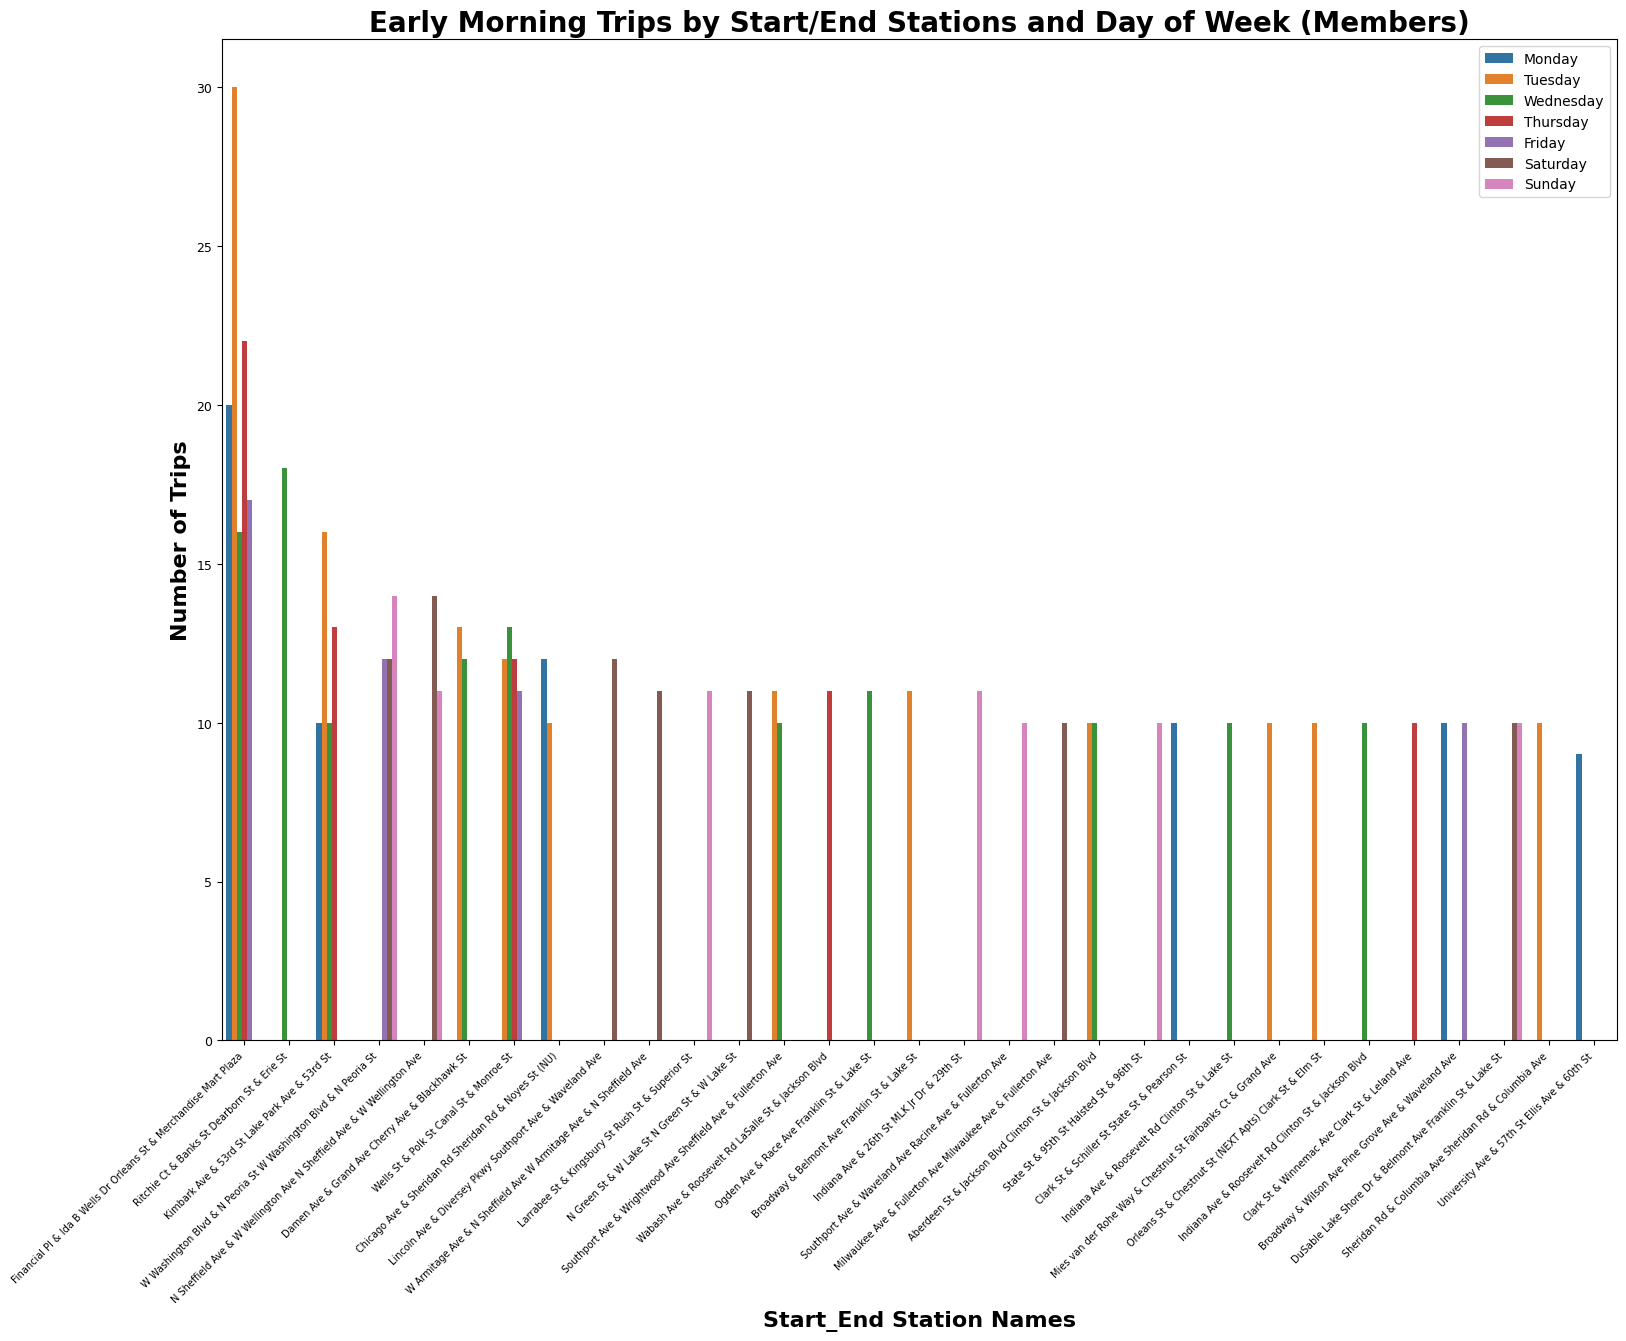

Early Morning Trips by Start/End Stations and Day of Week (Casual Riders)


start_end_name    weekday  count
0                        Millennium Park Millennium Park     Sunday     31
1            Michigan Ave & 8th St Michigan Ave & 8th St   Saturday     29
2      Michigan Ave & Washington St Michigan Ave & Wa...     Sunday     21
3                Theater on the Lake Theater on the Lake     Sunday     18
4      W Armitage Ave & N Sheffield Ave W Armitage Av...   Saturday     18
...                                                  ...        ...    ...
89721  Kilpatrick Ave & Grand Ave Lockwood Ave & Wrig...     Friday      0
89722  Kilpatrick Ave & Grand Ave Lockwood Ave & Wrig...   Saturday      0
89723  Kilpatrick Ave & Grand Ave Lockwood Ave & Wrig...   Thursday      0
89724  Kilpatrick Ave & Grand Ave Lockwood Ave & Wrig...  Wednesday      0
89725  Yates Blvd & Exchange Ave South Shore Dr & 74t...     Sunday      0

[89726 rows x 3 columns]

AVG Casual Rider Early Morning Trips per Start/End Station Combo: 1.9 (95% CI (1.856, 1.939) )


Number of Different Early Morning Start/End Stations (Casual Riders): 12818


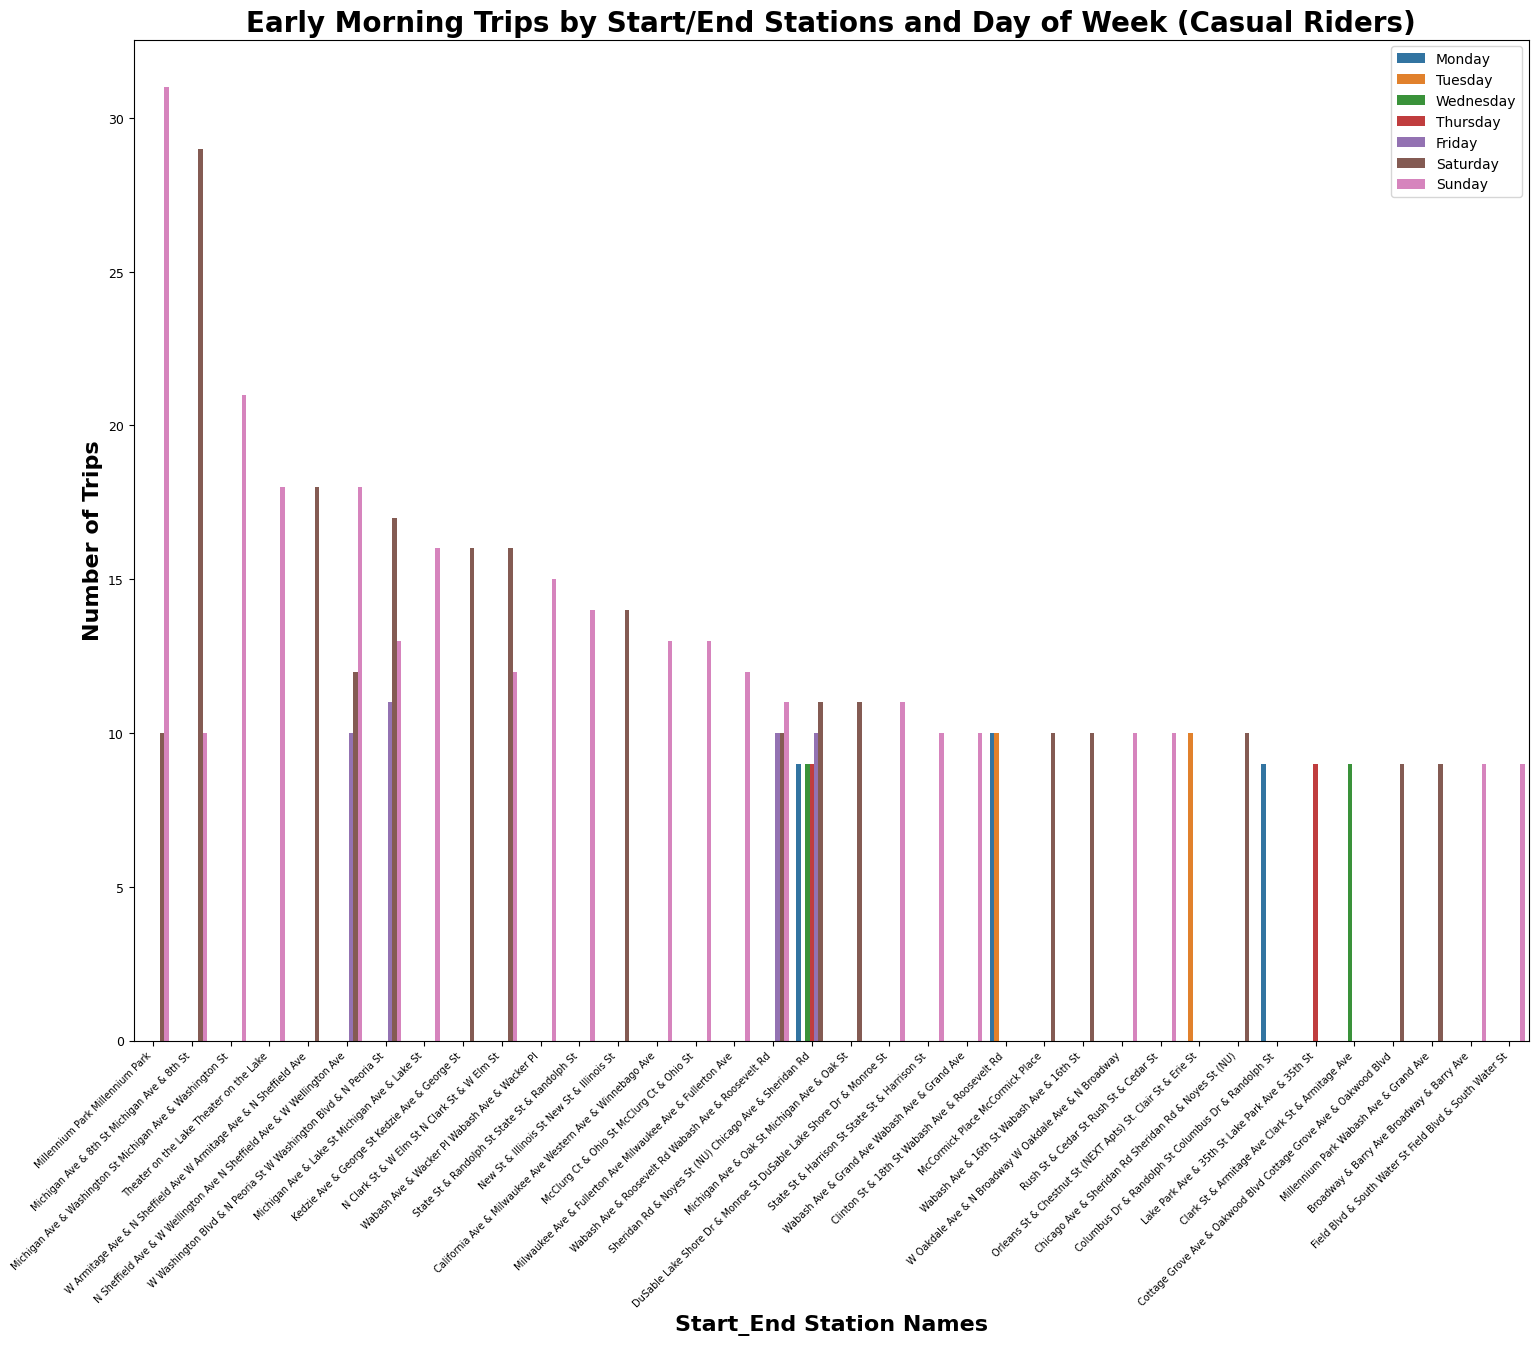

Number of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos: 26


Number of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos: 31


In [43]:
# Early Morning Trips by Start/End Stations and Day of Week (Members)

weekday_sorted_eam_mem_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'member') & (weekday_sorted_df['time_of_day'] == 'early morning')]
weekday_sorted_eam_mem_df = weekday_sorted_eam_mem_df.replace('nan', np.nan).dropna()
weekday_sorted_eam_mem_df = pd.DataFrame(weekday_sorted_eam_mem_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_eam_mem_df = weekday_sorted_eam_mem_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mEarly Morning Trips by Start/End Stations and Day of Week (Members)\033[0m')
display(weekday_sorted_eam_mem_df)

mem_earlyam_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['time_of_day'] == 'early morning']['start_end_name'].value_counts().reset_index())
avg_mem_earlyam_startend_trips = mem_earlyam_startend_trips['count'].mean()

mem_earlyam_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_earlyam_startend_trips['count'].mean(), scale=stats.sem(mem_earlyam_startend_trips['count']))
mem_earlyam_startend_trips_mean_CI = (round(mem_earlyam_startend_trips_mean_CI[0],3),round(mem_earlyam_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Early Morning Trips per Start/End Station Combo:\033[0m',round(avg_mem_earlyam_startend_trips,2),'(95% CI',mem_earlyam_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Early Morning Start/End Stations (Members):\033[0m',len(set(weekday_sorted_eam_mem_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_eam_mem_df['start_end_name'][:50], y=weekday_sorted_eam_mem_df['count'][:50],hue=weekday_sorted_eam_mem_df['weekday'])
ax.set_title("Early Morning Trips by Start/End Stations and Day of Week (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Early Morning Trips by Start/End Stations and Day of Week (Casual Riders)

weekday_sorted_eam_cas_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'casual') & (weekday_sorted_df['time_of_day'] == 'early morning')]
weekday_sorted_eam_cas_df = weekday_sorted_eam_cas_df.replace('nan', np.nan).dropna()
weekday_sorted_eam_cas_df = pd.DataFrame(weekday_sorted_eam_cas_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_eam_cas_df = weekday_sorted_eam_cas_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mEarly Morning Trips by Start/End Stations and Day of Week (Casual Riders)\033[0m')
display(weekday_sorted_eam_cas_df)

cas_earlyam_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['time_of_day'] == 'early morning']['start_end_name'].value_counts().reset_index())
avg_cas_earlyam_startend_trips = cas_earlyam_startend_trips['count'].mean()

cas_earlyam_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_earlyam_startend_trips['count'].mean(), scale=stats.sem(cas_earlyam_startend_trips['count']))
cas_earlyam_startend_trips_mean_CI = (round(cas_earlyam_startend_trips_mean_CI[0],3),round(cas_earlyam_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Early Morning Trips per Start/End Station Combo:\033[0m',round(avg_cas_earlyam_startend_trips,2),'(95% CI',cas_earlyam_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Early Morning Start/End Stations (Casual Riders):\033[0m',len(set(weekday_sorted_eam_cas_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_eam_cas_df['start_end_name'][:50], y=weekday_sorted_eam_cas_df['count'][:50],hue=weekday_sorted_eam_cas_df['weekday'])
ax.set_title("Early Morning Trips by Start/End Stations and Day of Week (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

mem_eam_stations_notin_cas = len(set(weekday_sorted_eam_mem_df['start_end_name'][:50]).difference(set(weekday_sorted_eam_cas_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos:\033[0m',mem_eam_stations_notin_cas)
print('\n')

cas_eam_stations_notin_mem = len(set(weekday_sorted_eam_cas_df['start_end_name'][:50]).difference(set(weekday_sorted_eam_mem_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos:\033[0m',cas_eam_stations_notin_mem)

### Observations/Insights

Casual Rider top early morning trips are mostly on the weekends and mostly to popular tourist destinations. The majority of Member top early morning trips are during the week and mostly to non-tourist destinations (potentially often to work locations).

Members' top early morning route goes from Financial Plaza & Ida B Wells Dr (a bus station) to Orleans St and Merchandise Mart Plaza (business district). Members traveled this route in the early morning from Monday - Friday, with trip volumes peaking on Tuesdays.

Casual Riders' top early morning route starts and ends at Millenium Park, a popular tourist destination. Casual Riders traveled this route in the early morning only on Saturdays and Sundays, with significantly higher trip volumes on Sundays.

On average, Members had slightly more early morning trips (2.11) per route per weekday than Casual Riders (1.9).

26 of the top 50 Member early morning start/end station combos by trip volume were not in the set of top 50 Casual Rider early morning start/end station combos.

31 of the top 50 Casual Rider early morning start/end station combos by trip volume were not in the set of top 50 Member early morning start/end station combos.

Members traveled 12,631 different start/end station combos in the early mornings and Casual Riders traveled 12,818 different start/end station combos in the early mornings.

Mid-Morning Trips by Start/End Stations and Day of Week (Members)


start_end_name    weekday  count
0       Southport Ave & Wrightwood Ave Sheffield Ave &...  Wednesday     54
1       Southport Ave & Wrightwood Ave Sheffield Ave &...   Thursday     54
2        Broadway & Cornelia Ave Wilton Ave & Belmont Ave    Tuesday     45
3         Clinton St & Jackson Blvd Sangamon St & Lake St  Wednesday     44
4         Clinton St & Jackson Blvd Sangamon St & Lake St   Thursday     43
...                                                   ...        ...    ...
212907  Clark St & Drummond Pl Dearborn Pkwy & Delawar...  Wednesday      0
212908  Larrabee St & Menomonee St Aberdeen St & Rando...   Saturday      0
212909  Larrabee St & Menomonee St Aberdeen St & Rando...     Sunday      0
212910  Clark St & Drummond Pl Dearborn Pkwy & Delawar...    Tuesday      0
212911                Zapata Academy Ogden Ave & Race Ave     Sunday      0

[212912 rows x 3 columns]

AVG Member Mid Morning Trips per Start/End Station Combo: 4.42 (95% CI (4.324, 4.506) )


Number of Different Mid Morning Start/End Stations (Members): 30416


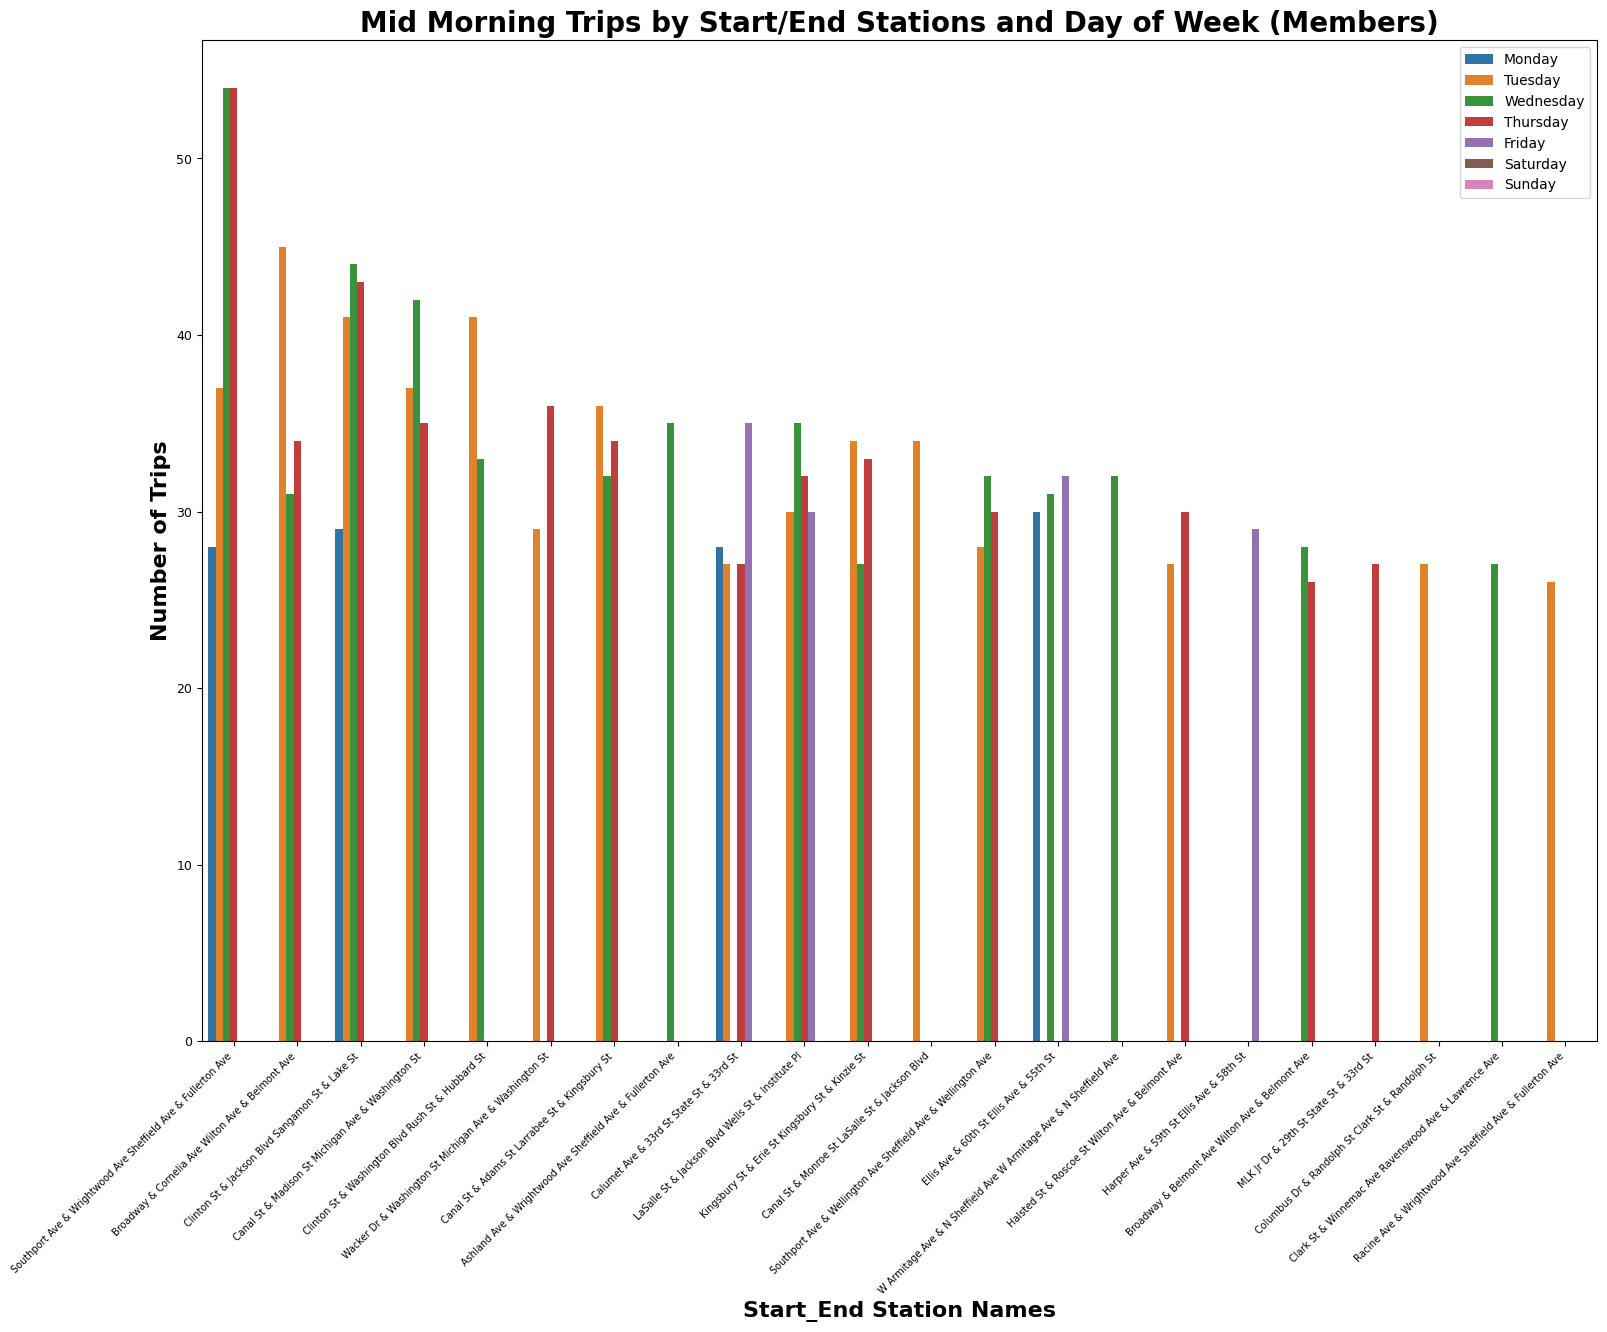

Mid-Morning Trips by Start/End Stations and Day of Week (Casual Riders)


start_end_name    weekday  count
0       Greenview Ave & Fullerton Ave Sheffield Ave & ...  Wednesday     30
1         Streeter Dr & Grand Ave Streeter Dr & Grand Ave     Sunday     24
2       Greenview Ave & Fullerton Ave Sheffield Ave & ...    Tuesday     23
3       Ashland Ave & Wrightwood Ave Sheffield Ave & F...  Wednesday     21
4             Michigan Ave & Oak St Michigan Ave & Oak St   Saturday     19
...                                                   ...        ...    ...
117938    Glenwood Ave & Touhy Ave Benson Ave & Church St   Thursday      0
117939    Glenwood Ave & Touhy Ave Benson Ave & Church St     Friday      0
117940    Glenwood Ave & Touhy Ave Benson Ave & Church St     Sunday      0
117941    Glenwood Ave & Touhy Ave Benson Ave & Church St     Monday      0
117942  Yates Blvd & Exchange Ave Yates Blvd & Exchang...     Sunday      0

[117943 rows x 3 columns]

AVG Casual Rider Mid Morning Trips per Start/End Station Combo: 2.31 (95% CI (2.256, 2.358) )


Number of Different Mid Morning Start/End Stations (Casual Riders): 16849


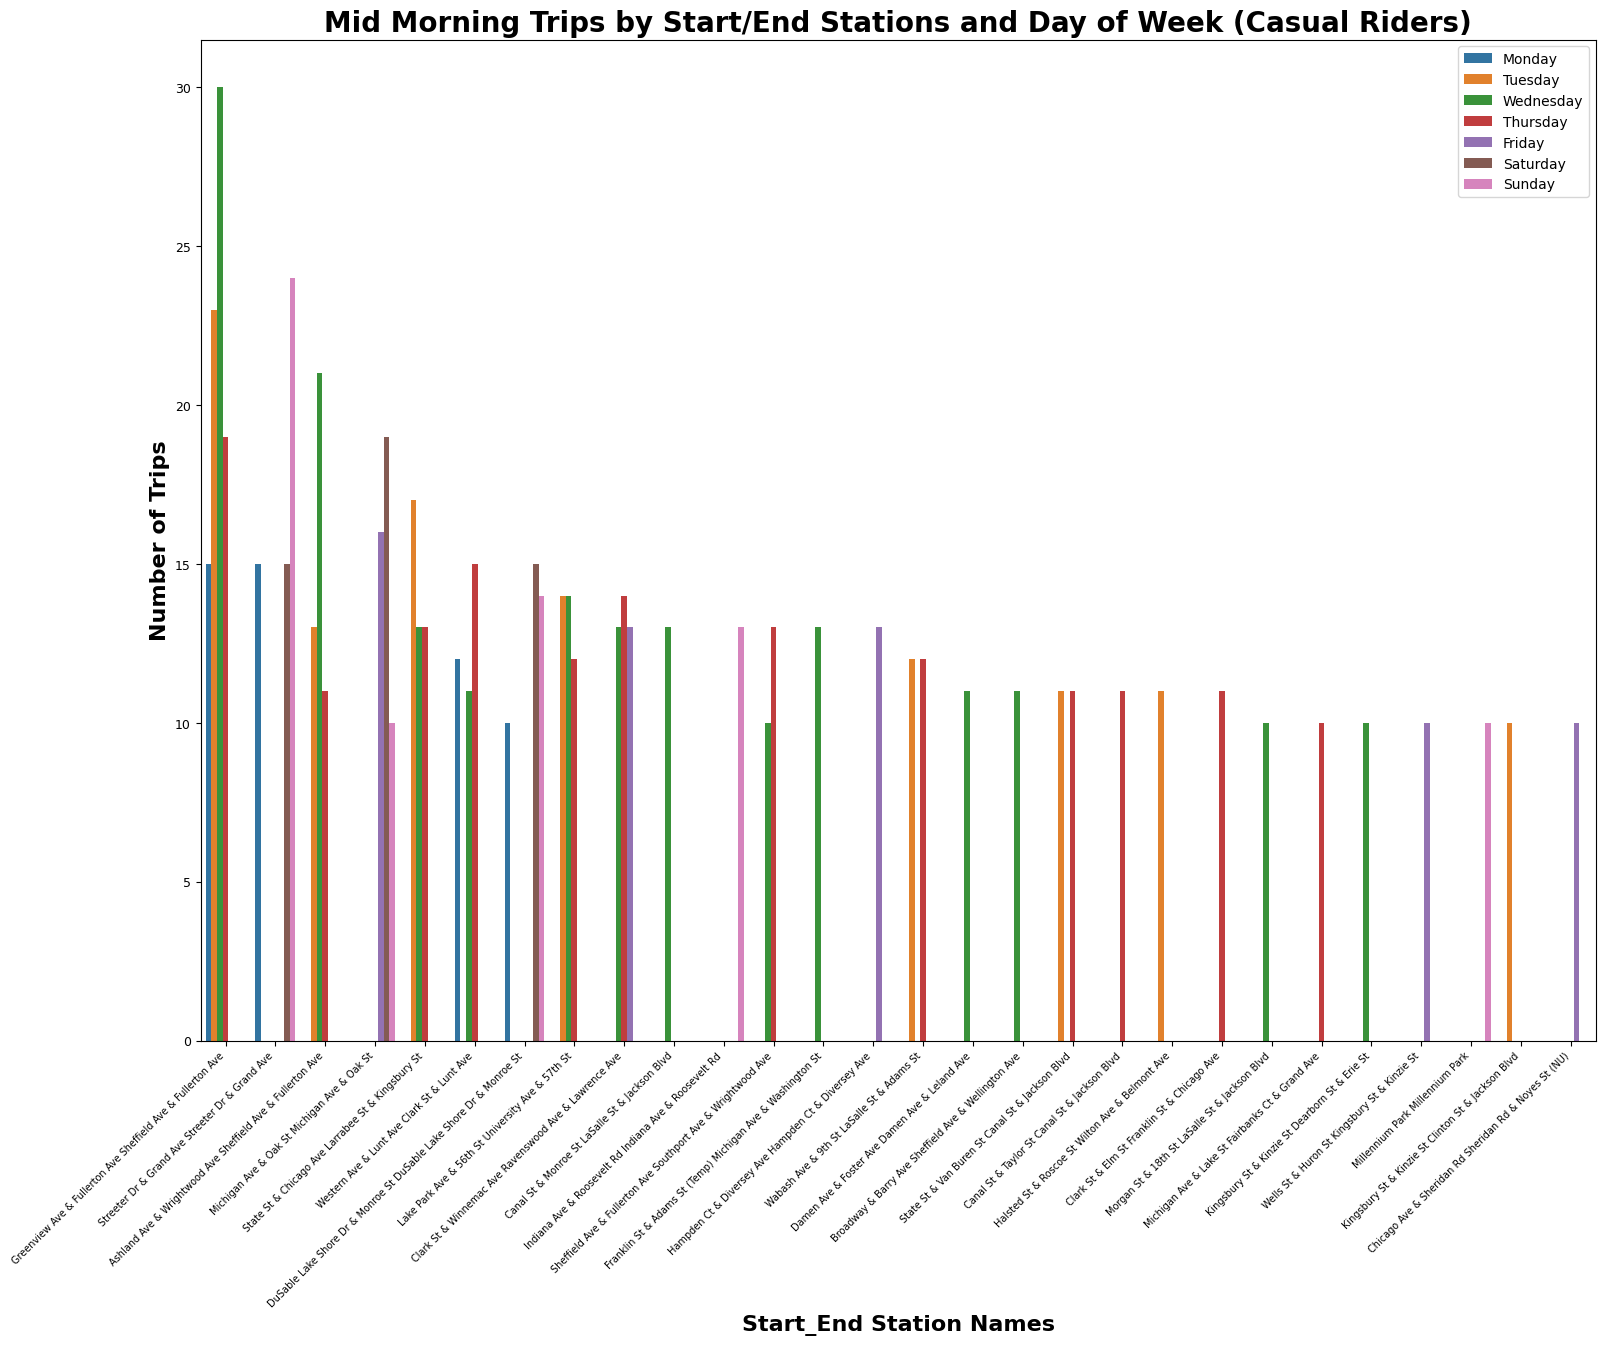

Number of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos: 18


Number of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos: 24


In [42]:
# Mid Morning Trips by Start/End Stations and Day of Week (Members)

weekday_sorted_midam_mem_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'member') & (weekday_sorted_df['time_of_day'] == 'mid morning')]
weekday_sorted_midam_mem_df = weekday_sorted_midam_mem_df.replace('nan', np.nan).dropna()
weekday_sorted_midam_mem_df = pd.DataFrame(weekday_sorted_midam_mem_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_midam_mem_df = weekday_sorted_midam_mem_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mMid-Morning Trips by Start/End Stations and Day of Week (Members)\033[0m')
display(weekday_sorted_midam_mem_df)

mem_midam_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['time_of_day'] == 'mid morning']['start_end_name'].value_counts().reset_index())
avg_mem_midam_startend_trips = mem_midam_startend_trips['count'].mean()

mem_midam_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_midam_startend_trips['count'].mean(), scale=stats.sem(mem_midam_startend_trips['count']))
mem_midam_startend_trips_mean_CI = (round(mem_midam_startend_trips_mean_CI[0],3),round(mem_midam_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Mid Morning Trips per Start/End Station Combo:\033[0m',round(avg_mem_midam_startend_trips,2),'(95% CI',mem_midam_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Mid Morning Start/End Stations (Members):\033[0m',len(set(weekday_sorted_midam_mem_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_midam_mem_df['start_end_name'][:50], y=weekday_sorted_midam_mem_df['count'][:50],hue=weekday_sorted_midam_mem_df['weekday'])
ax.set_title("Mid Morning Trips by Start/End Stations and Day of Week (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Mid Morning Trips by Start/End Stations and Day of Week (Casual Riders)

weekday_sorted_midam_cas_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'casual') & (weekday_sorted_df['time_of_day'] == 'mid morning')]
weekday_sorted_midam_cas_df = weekday_sorted_midam_cas_df.replace('nan', np.nan).dropna()
weekday_sorted_midam_cas_df = pd.DataFrame(weekday_sorted_midam_cas_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_midam_cas_df = weekday_sorted_midam_cas_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mMid-Morning Trips by Start/End Stations and Day of Week (Casual Riders)\033[0m')
display(weekday_sorted_midam_cas_df)

cas_midam_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['time_of_day'] == 'mid morning']['start_end_name'].value_counts().reset_index())
avg_cas_midam_startend_trips = cas_midam_startend_trips['count'].mean()

cas_midam_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_midam_startend_trips['count'].mean(), scale=stats.sem(cas_midam_startend_trips['count']))
cas_midam_startend_trips_mean_CI = (round(cas_midam_startend_trips_mean_CI[0],3),round(cas_midam_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Mid Morning Trips per Start/End Station Combo:\033[0m',round(avg_cas_midam_startend_trips,2),'(95% CI',cas_midam_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Mid Morning Start/End Stations (Casual Riders):\033[0m',len(set(weekday_sorted_midam_cas_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_midam_cas_df['start_end_name'][:50], y=weekday_sorted_midam_cas_df['count'][:50],hue=weekday_sorted_midam_cas_df['weekday'])
ax.set_title("Mid Morning Trips by Start/End Stations and Day of Week (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

mem_midam_stations_notin_cas = len(set(weekday_sorted_midam_mem_df['start_end_name'][:50]).difference(set(weekday_sorted_midam_cas_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos:\033[0m',mem_midam_stations_notin_cas)
print('\n')

cas_midam_stations_notin_mem = len(set(weekday_sorted_midam_cas_df['start_end_name'][:50]).difference(set(weekday_sorted_midam_mem_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos:\033[0m',cas_midam_stations_notin_mem)

### Observations/Insights

Unlike early morning trips, Casual Rider top mid-morning trips have more trips throughout the week and mostly to popular tourist destinations. The majority of Member top mid-morning trips are during the week and mostly to non-tourist destinations.

Members' top mid-morning route goes from Southport Ave & Wrightwood Ave (near apartment complexes) to Sheffield Ave & Fullerton Ave (near a subway station). Members traveled this route in the mid-morning Monday through Thursday each week, with trip volumes peaking on Wednesdays and Thursdays.

Casual Riders' top mid-morning route starts at Greenview Ave & Fullerton Ave (near bus stops) and ends at Sheffield Ave & Fullerton Ave (near a subway station). Casual Riders traveled this route in the mid-morning Monday through Thursday each week, with highest trip volumes on Wednesdays.

On average, Members had more mid-morning trips (4.42) per route per weekday than Casual Riders (2.31).

18 of the top 50 Member mid-morning start/end station combos by trip volume were not in the set of top 50 Casual Rider mid-morning start/end station combos.

24 of the top 50 Casual Rider mid-morning start/end station combos by trip volume were not in the set of top 50 Member mid-morning start/end station combos.

Members traveled 30,416 different start/end station combos in the mid-mornings and Casual Riders traveled 16,849 different start/end station combos in the mid-mornings.

Late Morning Trips by Start/End Stations and Day of Week (Members)


start_end_name    weekday  count
0            Ellis Ave & 60th St University Ave & 57th St  Wednesday     58
1            Ellis Ave & 60th St University Ave & 57th St   Thursday     55
2            Loomis St & Lexington St Morgan St & Polk St   Thursday     48
3                 Ellis Ave & 60th St Ellis Ave & 58th St    Tuesday     48
4          Kimbark Ave & 53rd St University Ave & 57th St   Thursday     47
...                                                   ...        ...    ...
279533       Halsted St & Willow St Franklin St & Lake St  Wednesday      0
279534       Halsted St & Willow St Franklin St & Lake St   Thursday      0
279535       Halsted St & Willow St Franklin St & Lake St     Friday      0
279536       Halsted St & Willow St Franklin St & Lake St   Saturday      0
279537  Yates Blvd & Exchange Ave Yates Blvd & Exchang...     Sunday      0

[279538 rows x 3 columns]

AVG Member Late Morning Trips per Start/End Station Combo: 2.92 (95% CI (2.865, 2.969) )


Number of Different Late Morning Start/End Stations (Members): 39934


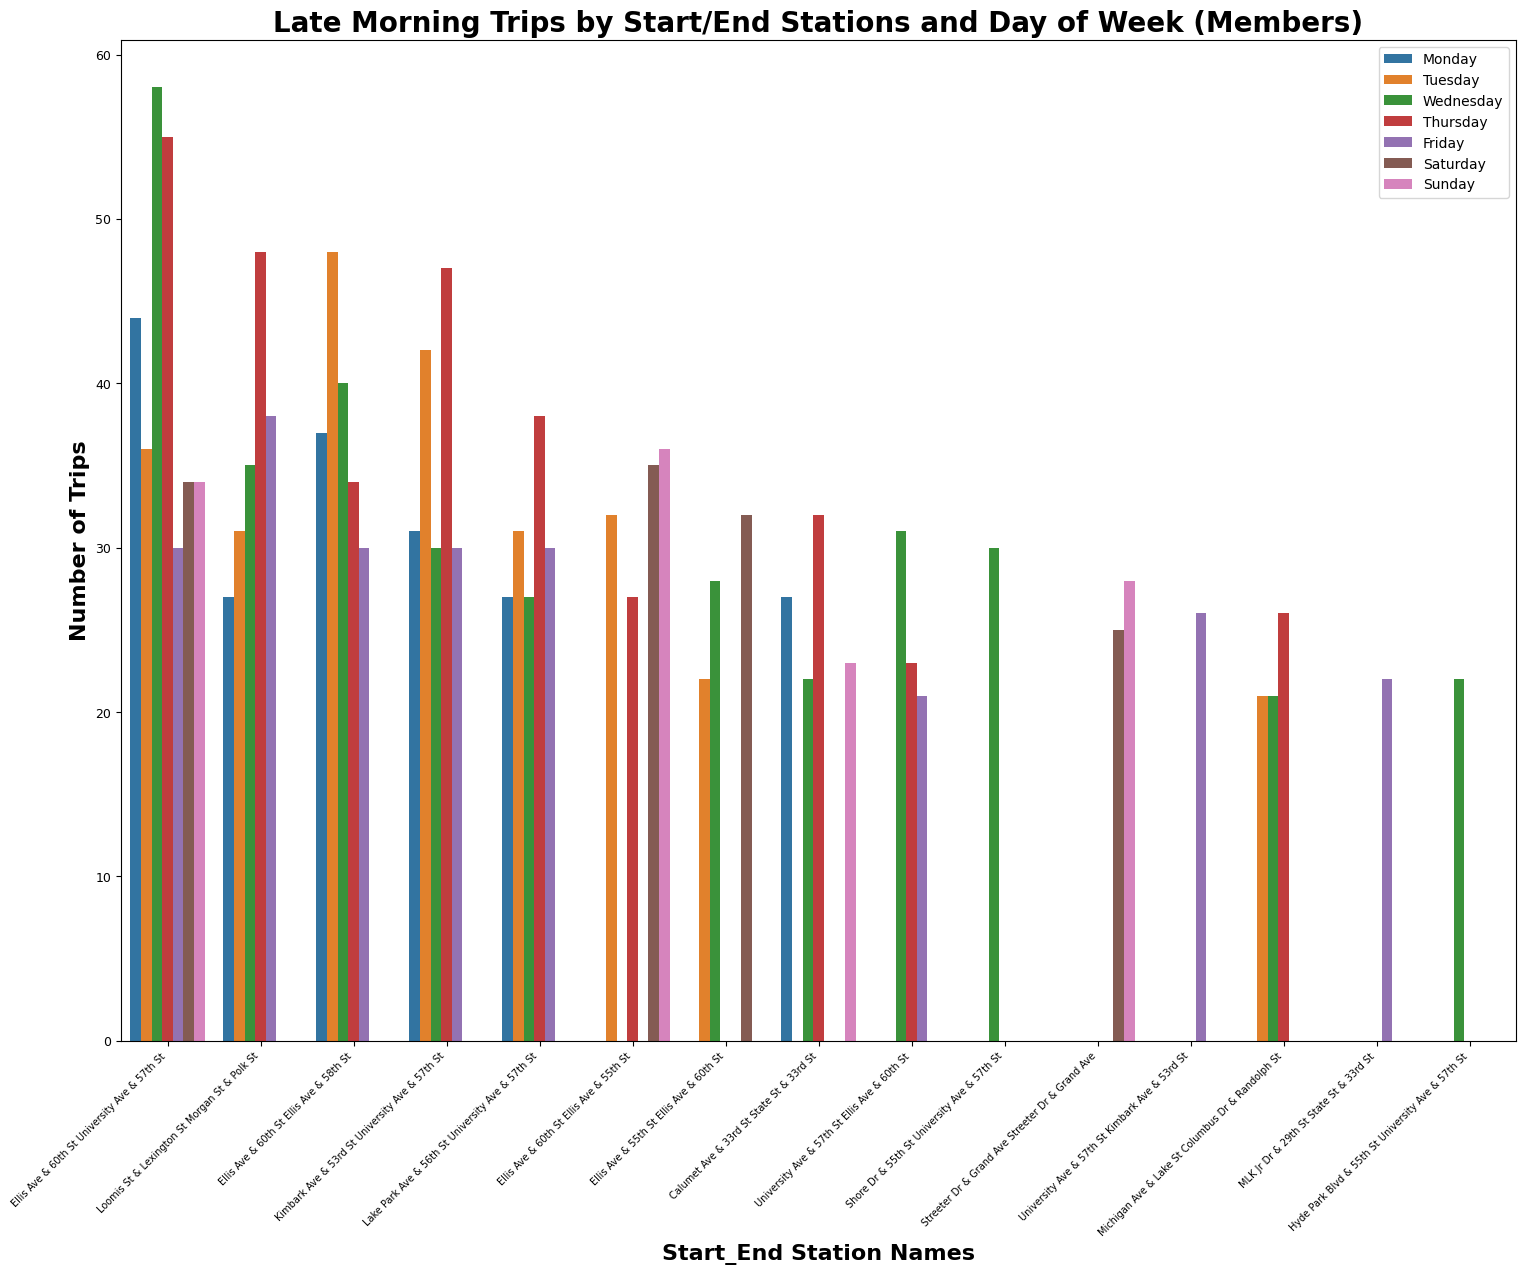

Late Morning Trips by Start/End Stations and Day of Week (Casual Riders)


start_end_name   weekday  count
0         Streeter Dr & Grand Ave Streeter Dr & Grand Ave  Saturday    127
1         Streeter Dr & Grand Ave Streeter Dr & Grand Ave    Sunday    114
2       DuSable Lake Shore Dr & Monroe St DuSable Lake...  Saturday     86
3             Michigan Ave & Oak St Michigan Ave & Oak St  Saturday     79
4       DuSable Lake Shore Dr & Monroe St DuSable Lake...    Sunday     75
...                                                   ...       ...    ...
198956  Franklin St & Illinois St Larrabee St & Webste...    Sunday      0
198957  Franklin St & Illinois St Lincoln Ave & Fuller...    Sunday      0
198958  Franklin St & Illinois St Lincoln Ave & Fuller...  Saturday      0
198959  Franklin St & Illinois St Lincoln Ave & Fuller...   Tuesday      0
198960  Yates Blvd & Exchange Ave Yates Blvd & Exchang...    Sunday      0

[198961 rows x 3 columns]

AVG Casual Rider Late Morning Trips per Start/End Station Combo: 2.51 (95% CI (2.438, 2.578) )


Number of Different Late Morning Start/End Stations (Casual Riders): 28423


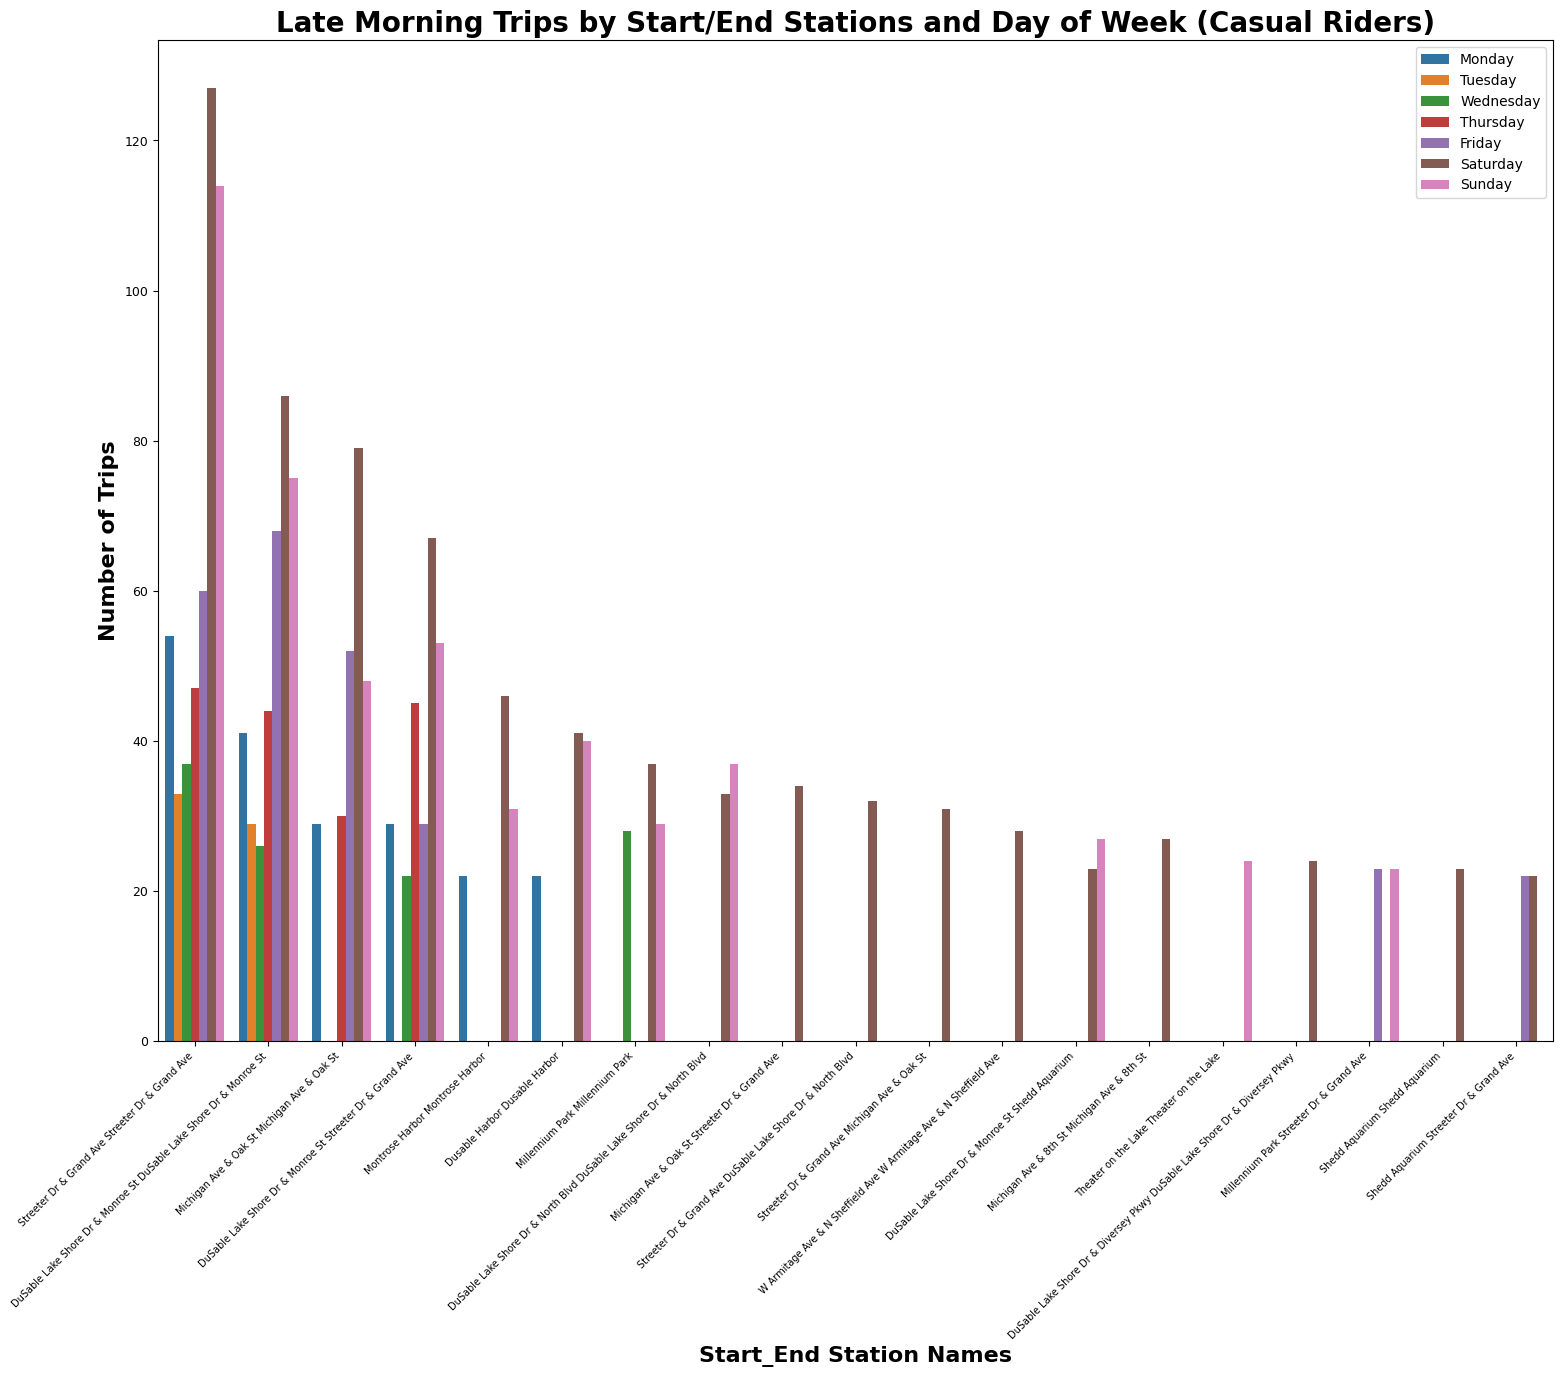

Number of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos: 14


Number of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos: 18


In [41]:
# Late Morning Trips by Start/End Stations and Day of Week (Members)

weekday_sorted_latam_mem_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'member') & (weekday_sorted_df['time_of_day'] == 'late morning')]
weekday_sorted_latam_mem_df = weekday_sorted_latam_mem_df.replace('nan', np.nan).dropna()
weekday_sorted_latam_mem_df = pd.DataFrame(weekday_sorted_latam_mem_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_latam_mem_df = weekday_sorted_latam_mem_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mLate Morning Trips by Start/End Stations and Day of Week (Members)\033[0m')
display(weekday_sorted_latam_mem_df)

mem_lateam_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['time_of_day'] == 'late morning']['start_end_name'].value_counts().reset_index())
avg_mem_lateam_startend_trips = mem_lateam_startend_trips['count'].mean()

mem_lateam_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_lateam_startend_trips['count'].mean(), scale=stats.sem(mem_lateam_startend_trips['count']))
mem_lateam_startend_trips_mean_CI = (round(mem_lateam_startend_trips_mean_CI[0],3),round(mem_lateam_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Late Morning Trips per Start/End Station Combo:\033[0m',round(avg_mem_lateam_startend_trips,2),'(95% CI',mem_lateam_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Late Morning Start/End Stations (Members):\033[0m',len(set(weekday_sorted_latam_mem_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_latam_mem_df['start_end_name'][:50], y=weekday_sorted_latam_mem_df['count'][:50],hue=weekday_sorted_latam_mem_df['weekday'])
ax.set_title("Late Morning Trips by Start/End Stations and Day of Week (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Late Morning Trips by Start/End Stations and Day of Week (Casual Riders)

weekday_sorted_latam_cas_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'casual') & (weekday_sorted_df['time_of_day'] == 'late morning')]
weekday_sorted_latam_cas_df = weekday_sorted_latam_cas_df.replace('nan', np.nan).dropna()
weekday_sorted_latam_cas_df = pd.DataFrame(weekday_sorted_latam_cas_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_latam_cas_df = weekday_sorted_latam_cas_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mLate Morning Trips by Start/End Stations and Day of Week (Casual Riders)\033[0m')
display(weekday_sorted_latam_cas_df)

cas_lateam_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['time_of_day'] == 'late morning']['start_end_name'].value_counts().reset_index())
avg_cas_lateam_startend_trips = cas_lateam_startend_trips['count'].mean()

cas_lateam_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_lateam_startend_trips['count'].mean(), scale=stats.sem(cas_lateam_startend_trips['count']))
cas_lateam_startend_trips_mean_CI = (round(cas_lateam_startend_trips_mean_CI[0],3),round(cas_lateam_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Late Morning Trips per Start/End Station Combo:\033[0m',round(avg_cas_lateam_startend_trips,2),'(95% CI',cas_lateam_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Late Morning Start/End Stations (Casual Riders):\033[0m',len(set(weekday_sorted_latam_cas_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_latam_cas_df['start_end_name'][:50], y=weekday_sorted_latam_cas_df['count'][:50],hue=weekday_sorted_latam_cas_df['weekday'])
ax.set_title("Late Morning Trips by Start/End Stations and Day of Week (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

mem_latam_stations_notin_cas = len(set(weekday_sorted_latam_mem_df['start_end_name'][:50]).difference(set(weekday_sorted_latam_cas_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos:\033[0m',mem_latam_stations_notin_cas)
print('\n')

cas_latam_stations_notin_mem = len(set(weekday_sorted_latam_cas_df['start_end_name'][:50]).difference(set(weekday_sorted_latam_mem_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos:\033[0m',cas_latam_stations_notin_mem)

### Observations/Insights

Casual Rider top 4 late morning trips have trips throughout the week whereas other top late morning trips are mostly on the weekends and mostly to popular tourist destinations. Member top late morning trips are throughout the week (including weekends) and include both tourist and non-tourist destinations.

Members' top late morning route goes from Ellis Ave & 60th St (near University of Chicago dormitories) to University Ave & 57th St (near University of Chicago academic buildings). Members traveled this route in the late morning every day of each week, with trip volumes peaking on Wednesdays and Thursdays.

Casual Riders' top late morning route starts and ends at Streeter Dr & Grand Ave (the Navy Pier). Casual Riders traveled this route in the late morning every day of each week, with trip volumes peaking on the weekends.

On average, Members had more late morning trips (2.92) per route per weekday than Casual Riders (2.51).

14 of the top 50 Member late morning start/end station combos by trip volume were not in the set of top 50 Casual Rider late morning start/end station combos.

18 of the top 50 Casual Rider late morning start/end station combos by trip volume were not in the set of top 50 Member late morning start/end station combos.

Members traveled 39,934 different start/end station combos in the late mornings and Casual Riders traveled 28,423 different start/end station combos in the late mornings.

Afternoon Trips by Start/End Stations and Day of Week (Members)


start_end_name    weekday  count
0            University Ave & 57th St Ellis Ave & 60th St     Friday     81
1            Ellis Ave & 60th St University Ave & 57th St     Friday     77
2            University Ave & 57th St Ellis Ave & 60th St     Monday     71
3            University Ave & 57th St Ellis Ave & 60th St  Wednesday     69
4            Ellis Ave & 60th St University Ave & 57th St     Monday     66
...                                                   ...        ...    ...
393913  Larrabee St & Kingsbury St Stave St & Armitage...   Thursday      0
393914  Larrabee St & Kingsbury St Stave St & Armitage...  Wednesday      0
393915  Clark St & Drummond Pl Southport Ave & Welling...    Tuesday      0
393916  Clark St & Drummond Pl Southport Ave & Welling...   Thursday      0
393917  Yates Blvd & Exchange Ave Yates Blvd & Exchang...     Sunday      0

[393918 rows x 3 columns]

AVG Member Afternoon Trips per Start/End Station Combo: 3.56 (95% CI (3.499, 3.618) )


Number of Different Afternoon Start/End Stations (Members): 56274


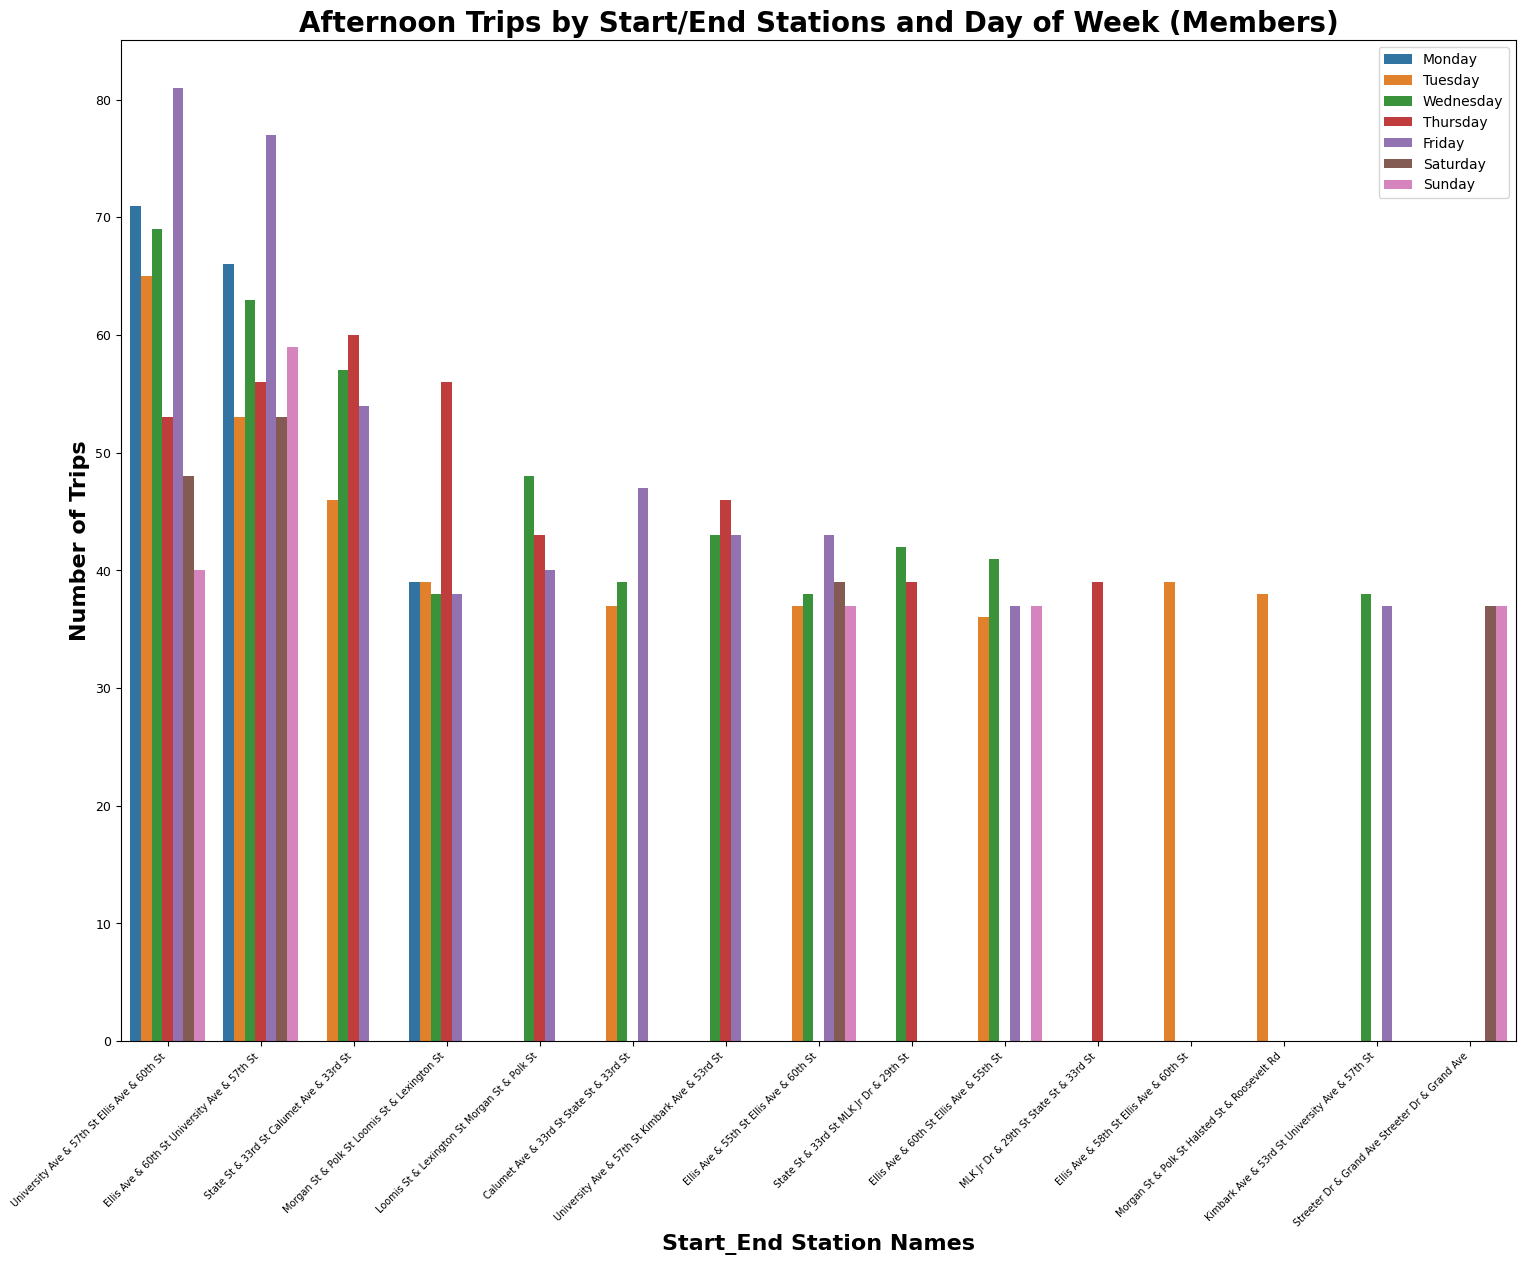

Afternoon Trips by Start/End Stations and Day of Week (Casual Riders)


start_end_name   weekday  count
0         Streeter Dr & Grand Ave Streeter Dr & Grand Ave  Saturday    284
1         Streeter Dr & Grand Ave Streeter Dr & Grand Ave    Sunday    268
2       DuSable Lake Shore Dr & Monroe St DuSable Lake...  Saturday    223
3       DuSable Lake Shore Dr & Monroe St DuSable Lake...    Sunday    215
4       DuSable Lake Shore Dr & Monroe St Streeter Dr ...  Saturday    206
...                                                   ...       ...    ...
319174  Green St & Washington Blvd Dearborn St & Monro...  Saturday      0
319175  Green St & Washington Blvd Dearborn St & Monro...    Sunday      0
319176  Green St & Washington Blvd Desplaines St & Jac...    Sunday      0
319177  Green St & Washington Blvd Desplaines St & Jac...    Friday      0
319178                    Zapata Academy Kildare & Cermak    Sunday      0

[319179 rows x 3 columns]

AVG Casual Rider Afternoon Trips per Start/End Station Combo: 3.39 (95% CI (3.271, 3.501) )


Number of Different Afternoon Start/End Stations (Casual Riders): 45597


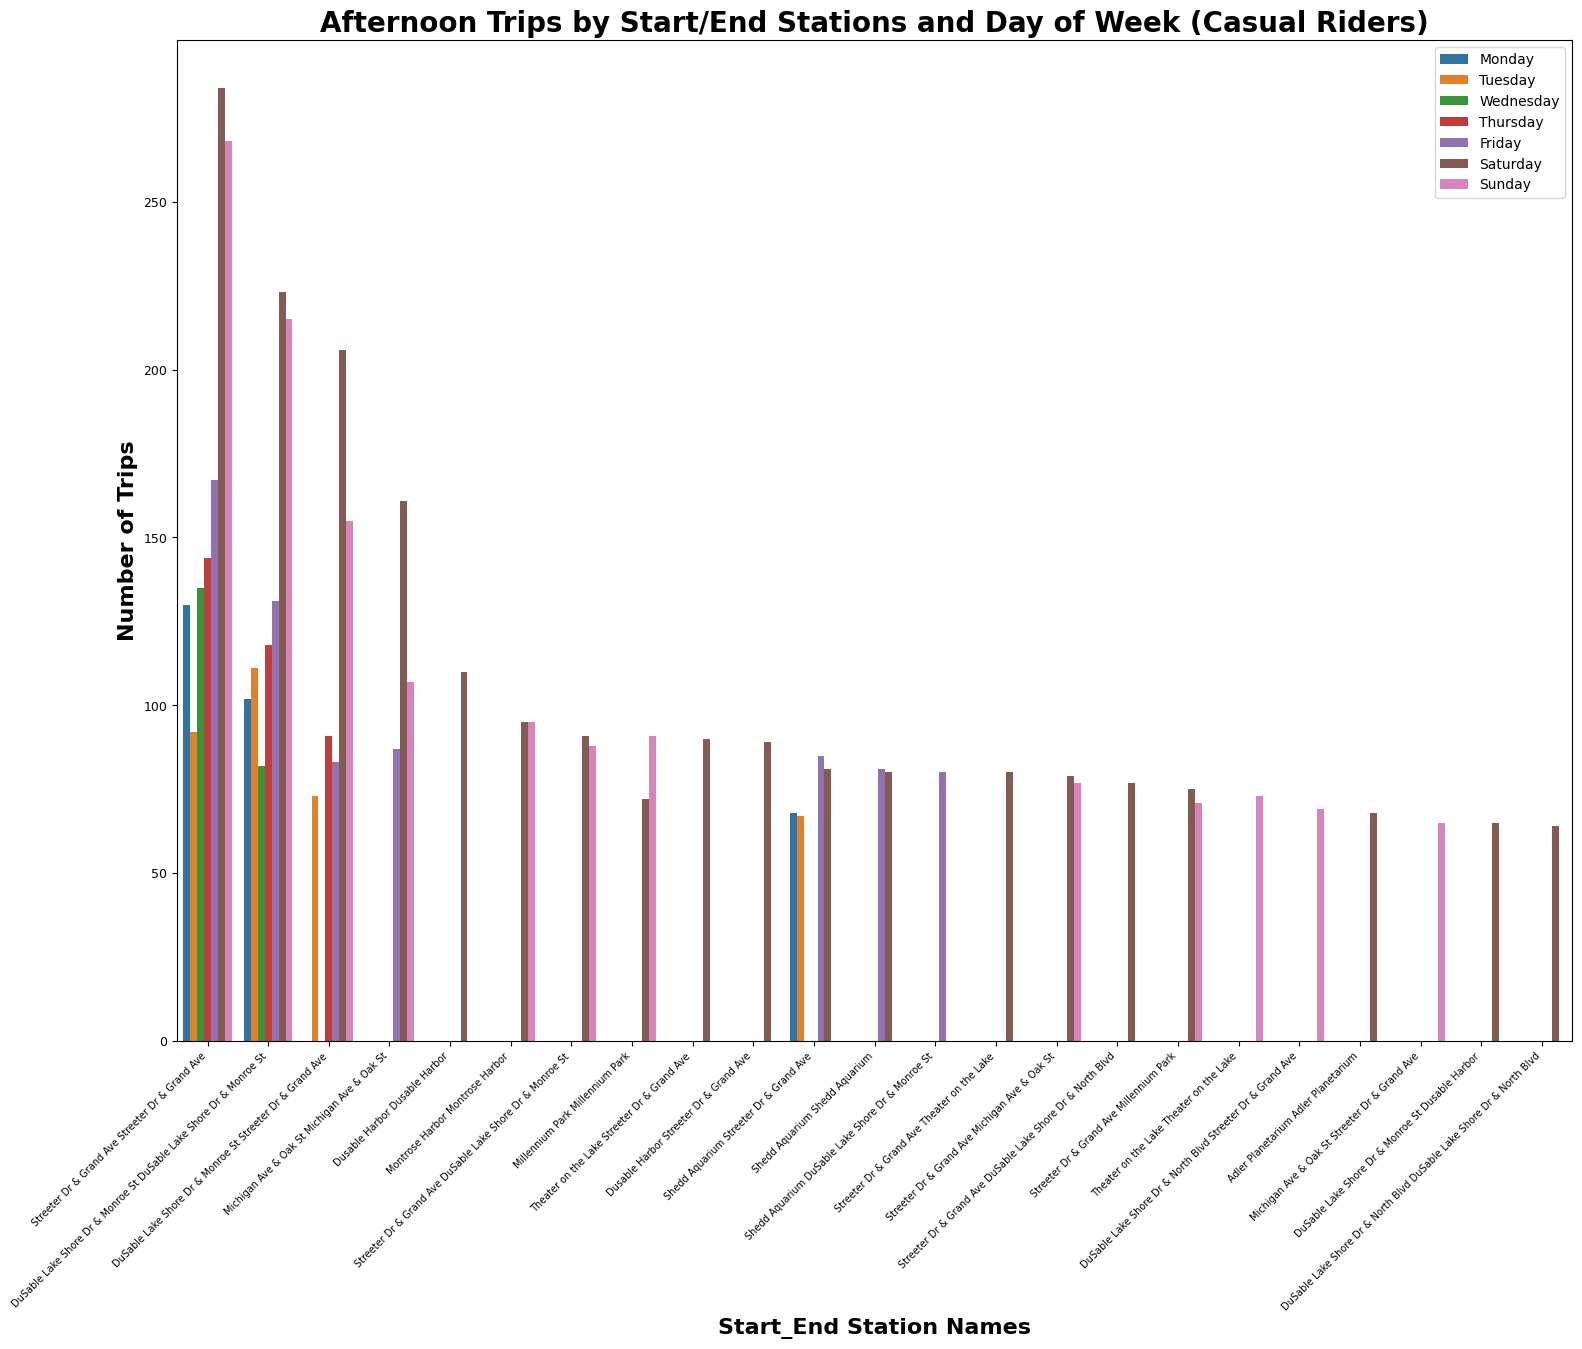

Number of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos: 14


Number of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos: 22


In [40]:
# Afternoon Trips by Start/End Stations and Day of Week (Members)

weekday_sorted_afternoon_mem_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'member') & (weekday_sorted_df['time_of_day'] == 'afternoon')]
weekday_sorted_afternoon_mem_df = weekday_sorted_afternoon_mem_df.replace('nan', np.nan).dropna()
weekday_sorted_afternoon_mem_df = pd.DataFrame(weekday_sorted_afternoon_mem_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_afternoon_mem_df = weekday_sorted_afternoon_mem_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mAfternoon Trips by Start/End Stations and Day of Week (Members)\033[0m')
display(weekday_sorted_afternoon_mem_df)

mem_afternoon_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['time_of_day'] == 'afternoon']['start_end_name'].value_counts().reset_index())
avg_mem_afternoon_startend_trips = mem_afternoon_startend_trips['count'].mean()

mem_afternoon_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_afternoon_startend_trips['count'].mean(), scale=stats.sem(mem_afternoon_startend_trips['count']))
mem_afternoon_startend_trips_mean_CI = (round(mem_afternoon_startend_trips_mean_CI[0],3),round(mem_afternoon_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Afternoon Trips per Start/End Station Combo:\033[0m',round(avg_mem_afternoon_startend_trips,2),'(95% CI',mem_afternoon_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Afternoon Start/End Stations (Members):\033[0m',len(set(weekday_sorted_afternoon_mem_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_afternoon_mem_df['start_end_name'][:50], y=weekday_sorted_afternoon_mem_df['count'][:50],hue=weekday_sorted_afternoon_mem_df['weekday'])
ax.set_title("Afternoon Trips by Start/End Stations and Day of Week (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Afternoon Trips by Start/End Stations and Day of Week (Casual Riders)

weekday_sorted_afternoon_cas_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'casual') & (weekday_sorted_df['time_of_day'] == 'afternoon')]
weekday_sorted_afternoon_cas_df = weekday_sorted_afternoon_cas_df.replace('nan', np.nan).dropna()
weekday_sorted_afternoon_cas_df = pd.DataFrame(weekday_sorted_afternoon_cas_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_afternoon_cas_df = weekday_sorted_afternoon_cas_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mAfternoon Trips by Start/End Stations and Day of Week (Casual Riders)\033[0m')
display(weekday_sorted_afternoon_cas_df)

cas_afternoon_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['time_of_day'] == 'afternoon']['start_end_name'].value_counts().reset_index())
avg_cas_afternoon_startend_trips = cas_afternoon_startend_trips['count'].mean()

cas_afternoon_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_afternoon_startend_trips['count'].mean(), scale=stats.sem(cas_afternoon_startend_trips['count']))
cas_afternoon_startend_trips_mean_CI = (round(cas_afternoon_startend_trips_mean_CI[0],3),round(cas_afternoon_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Afternoon Trips per Start/End Station Combo:\033[0m',round(avg_cas_afternoon_startend_trips,2),'(95% CI',cas_afternoon_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Afternoon Start/End Stations (Casual Riders):\033[0m',len(set(weekday_sorted_afternoon_cas_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_afternoon_cas_df['start_end_name'][:50], y=weekday_sorted_afternoon_cas_df['count'][:50],hue=weekday_sorted_afternoon_cas_df['weekday'])
ax.set_title("Afternoon Trips by Start/End Stations and Day of Week (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

mem_afternoon_stations_notin_cas = len(set(weekday_sorted_afternoon_mem_df['start_end_name'][:50]).difference(set(weekday_sorted_afternoon_cas_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos:\033[0m',mem_afternoon_stations_notin_cas)
print('\n')

cas_afternoon_stations_notin_mem = len(set(weekday_sorted_afternoon_cas_df['start_end_name'][:50]).difference(set(weekday_sorted_afternoon_mem_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos:\033[0m',cas_afternoon_stations_notin_mem)

### Observations/Insights

Casual Rider top 2 afternoon trips have trips throughout the week whereas other top afternoon trips are mostly on the weekends and mostly to popular tourist destinations. Member top afternoon trips are generally more during the week (not including weekends) and include more non-tourist destinations.

Members' top two afternoon routes have the same start and end stations but swapped, going to/from University Ave & 57th St (near University of Chicago academic buildings) to/from Ellis Ave & 60th St (near University of Chicago dormitories). Members traveled these routes in the afternoon every day of each week, with trip volumes peaking on Fridays.

Casual Riders' top afternoon route again starts and ends at Streeter Dr & Grand Ave (the Navy Pier). Casual Riders traveled this route in the afternoon every day of each week, with trip volumes peaking on the weekends.

On average, Members had slightly more afternoon trips (3.56) per route per weekday than Casual Riders (3.39).

14 of the top 50 Member afternoon start/end station combos by trip volume were not in the set of top 50 Casual Rider afternoon start/end station combos.

22 of the top 50 Casual Rider afternoon start/end station combos by trip volume were not in the set of top 50 Member afternoon start/end station combos.

Members traveled 56,274 different start/end station combos in the afternoons and Casual Riders traveled 45,597 different start/end station combos in the afternoons.

Evening Trips by Start/End Stations and Day of Week (Members)


start_end_name    weekday  count
0          Ellis Ave & 60th St University Ave & 57th St     Monday     96
1          University Ave & 57th St Ellis Ave & 60th St     Monday     87
2          University Ave & 57th St Ellis Ave & 60th St    Tuesday     81
3          Ellis Ave & 60th St University Ave & 57th St  Wednesday     80
4         Loomis St & Lexington St Halsted St & Polk St    Tuesday     74
...                                                 ...        ...    ...
481329  Leavitt St & Armitage Ave Wells St & Concord Ln  Wednesday      0
481330  Leavitt St & Armitage Ave Wells St & Concord Ln   Thursday      0
481331  Leavitt St & Armitage Ave Wells St & Concord Ln     Friday      0
481332  Leavitt St & Armitage Ave Wells St & Concord Ln     Sunday      0
481333         Morgan St & 31st St Wallace St & 35th St  Wednesday      0

[481334 rows x 3 columns]

AVG Member Evening Trips per Start/End Station Combo: 4.52 (95% CI (4.451, 4.588) )


Number of Different Evening Start/End Stations (Members): 68762


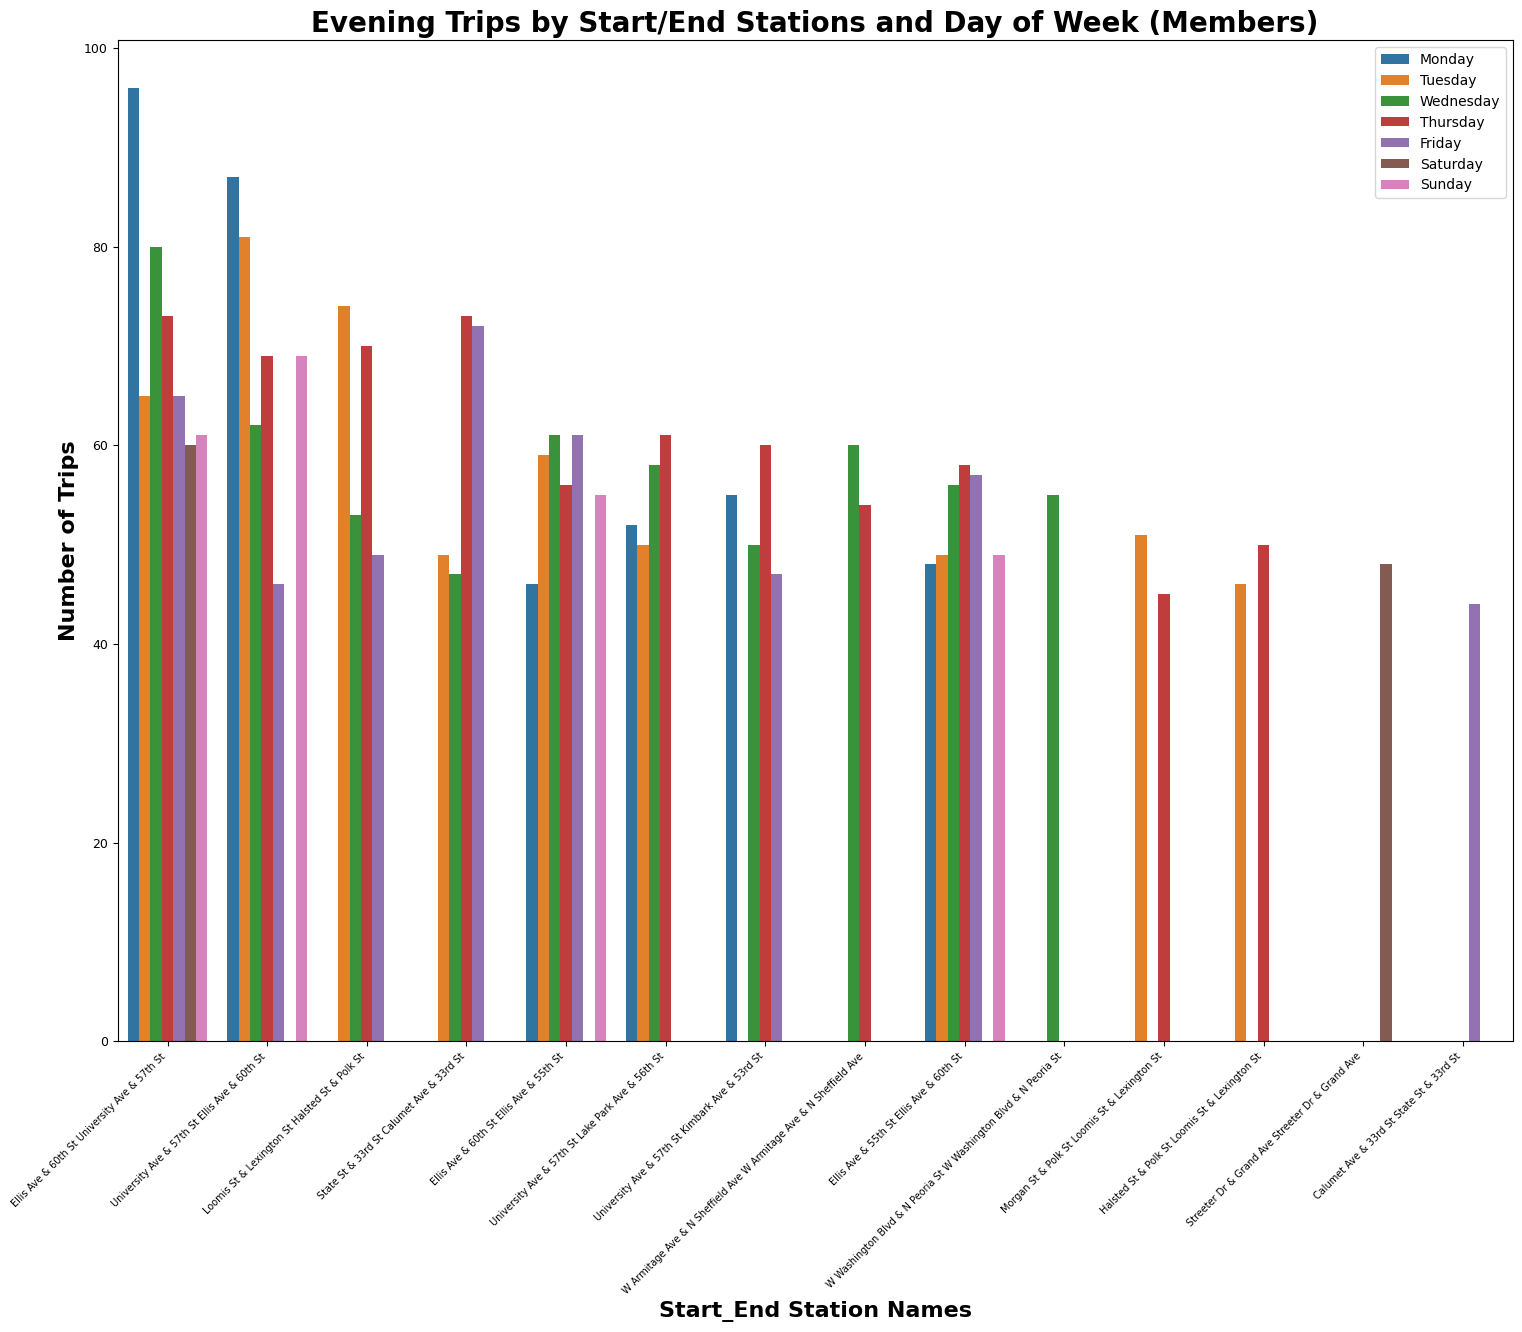

Evening Trips by Start/End Stations and Day of Week (Casual Riders)


start_end_name    weekday  count
0         Streeter Dr & Grand Ave Streeter Dr & Grand Ave   Saturday    277
1       DuSable Lake Shore Dr & Monroe St DuSable Lake...   Saturday    231
2         Streeter Dr & Grand Ave Streeter Dr & Grand Ave     Friday    184
3       DuSable Lake Shore Dr & Monroe St Streeter Dr ...   Saturday    170
4         Streeter Dr & Grand Ave Streeter Dr & Grand Ave     Sunday    151
...                                                   ...        ...    ...
378205  Lakeview Ave & Fullerton Pkwy New St & Illinoi...   Thursday      0
378206  Clark St & Berwyn Ave Lincoln Ave & Sunnyside Ave     Monday      0
378207  Clark St & Berwyn Ave Lincoln Ave & Sunnyside Ave    Tuesday      0
378208  Clark St & Berwyn Ave Lincoln Ave & Sunnyside Ave  Wednesday      0
378209           Zapata Academy Wabash Ave & Roosevelt Rd     Sunday      0

[378210 rows x 3 columns]

AVG Casual Rider Evening Trips per Start/End Station Combo: 3.59 (95% CI (3.502, 3.677) )


Number of Different Evening Start/End Stations (Casual Riders): 54030


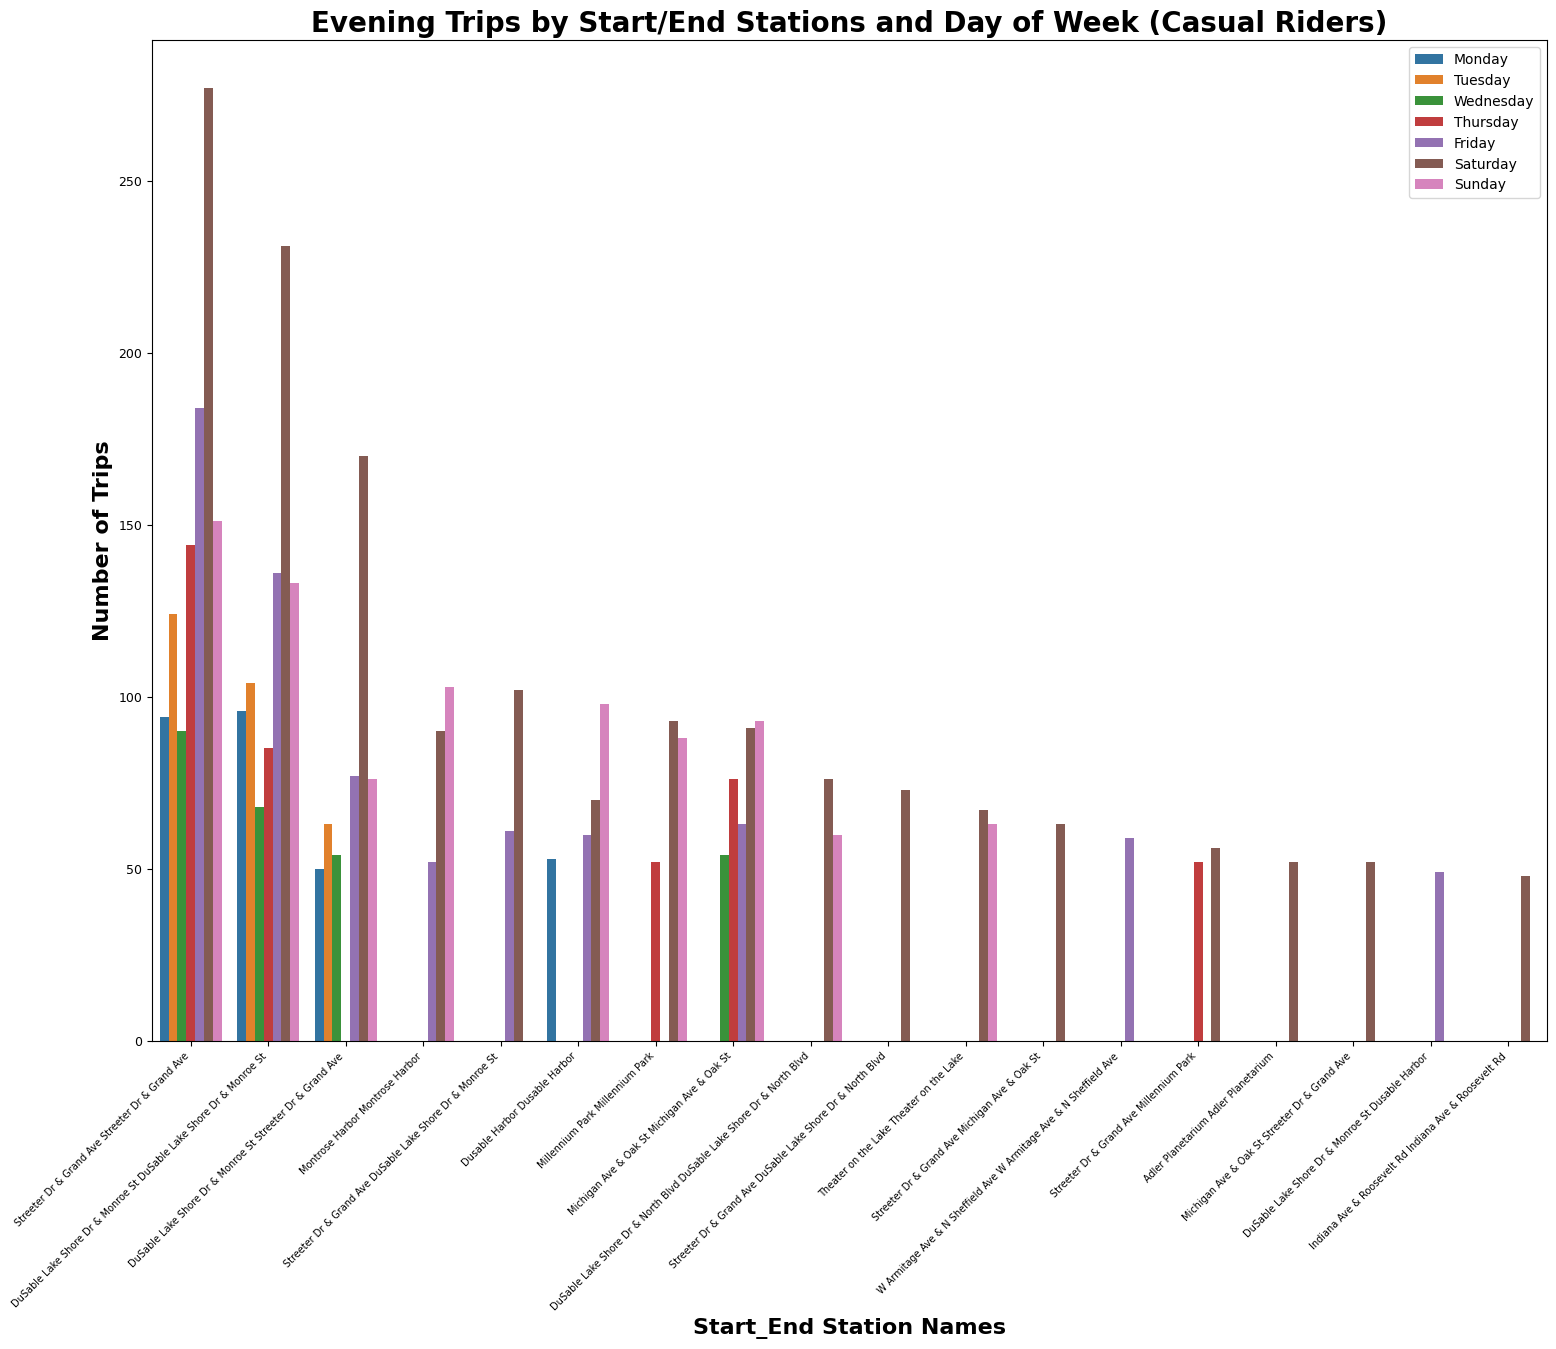

Number of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos: 12


Number of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos: 16


In [39]:
# Evening Trips by Start/End Stations and Day of Week (Members)

weekday_sorted_evening_mem_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'member') & (weekday_sorted_df['time_of_day'] == 'evening')]
weekday_sorted_evening_mem_df = weekday_sorted_evening_mem_df.replace('nan', np.nan).dropna()
weekday_sorted_evening_mem_df = pd.DataFrame(weekday_sorted_evening_mem_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_evening_mem_df = weekday_sorted_evening_mem_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mEvening Trips by Start/End Stations and Day of Week (Members)\033[0m')
display(weekday_sorted_evening_mem_df)

mem_evening_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['time_of_day'] == 'evening']['start_end_name'].value_counts().reset_index())
avg_mem_evening_startend_trips = mem_evening_startend_trips['count'].mean()

mem_evening_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_evening_startend_trips['count'].mean(), scale=stats.sem(mem_evening_startend_trips['count']))
mem_evening_startend_trips_mean_CI = (round(mem_evening_startend_trips_mean_CI[0],3),round(mem_evening_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Evening Trips per Start/End Station Combo:\033[0m',round(avg_mem_evening_startend_trips,2),'(95% CI',mem_evening_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Evening Start/End Stations (Members):\033[0m',len(set(weekday_sorted_evening_mem_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_evening_mem_df['start_end_name'][:50], y=weekday_sorted_evening_mem_df['count'][:50],hue=weekday_sorted_evening_mem_df['weekday'])
ax.set_title("Evening Trips by Start/End Stations and Day of Week (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Evening Trips by Start/End Stations and Day of Week (Casual Riders)

weekday_sorted_evening_cas_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'casual') & (weekday_sorted_df['time_of_day'] == 'evening')]
weekday_sorted_evening_cas_df = weekday_sorted_evening_cas_df.replace('nan', np.nan).dropna()
weekday_sorted_evening_cas_df = pd.DataFrame(weekday_sorted_evening_cas_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_evening_cas_df = weekday_sorted_evening_cas_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mEvening Trips by Start/End Stations and Day of Week (Casual Riders)\033[0m')
display(weekday_sorted_evening_cas_df)

cas_evening_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['time_of_day'] == 'evening']['start_end_name'].value_counts().reset_index())
avg_cas_evening_startend_trips = cas_evening_startend_trips['count'].mean()

cas_evening_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_evening_startend_trips['count'].mean(), scale=stats.sem(cas_evening_startend_trips['count']))
cas_evening_startend_trips_mean_CI = (round(cas_evening_startend_trips_mean_CI[0],3),round(cas_evening_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Evening Trips per Start/End Station Combo:\033[0m',round(avg_cas_evening_startend_trips,2),'(95% CI',cas_evening_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Evening Start/End Stations (Casual Riders):\033[0m',len(set(weekday_sorted_evening_cas_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_evening_cas_df['start_end_name'][:50], y=weekday_sorted_evening_cas_df['count'][:50],hue=weekday_sorted_evening_cas_df['weekday'])
ax.set_title("Evening Trips by Start/End Stations and Day of Week (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

mem_evening_stations_notin_cas = len(set(weekday_sorted_evening_mem_df['start_end_name'][:50]).difference(set(weekday_sorted_evening_cas_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos:\033[0m',mem_evening_stations_notin_cas)
print('\n')

cas_evening_stations_notin_mem = len(set(weekday_sorted_evening_cas_df['start_end_name'][:50]).difference(set(weekday_sorted_evening_mem_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos:\033[0m',cas_evening_stations_notin_mem)

### Observations/Insights

Casual Rider top 3 evening trips have trips throughout the week whereas other top evening trips are mostly on the weekends and mostly to popular tourist destinations. Member top evening trips are generally more during the week (not including weekends) and include more non-tourist destinations.

Members' top two evening routes again have the same start and end stations but swapped, going to/from University Ave & 57th St (near University of Chicago academic buildings) to/from Ellis Ave & 60th St (near University of Chicago dormitories). Members traveled these routes in the evening every day of each week (with the exception of Saturdays for University Ave & 57th St to Ellis Ave & 60th St), with trip volumes peaking on Mondays.

Casual Riders' top evening route again starts and ends at Streeter Dr & Grand Ave (the Navy Pier). Casual Riders traveled this route in the evening every day of each week, with trip volumes peaking on Saturdays.

On average, Members had slightly more evening trips (4.52) per route per weekday than Casual Riders (3.59).

12 of the top 50 Member evening start/end station combos by trip volume were not in the set of top 50 Casual Rider evening start/end station combos.

16 of the top 50 Casual Rider evening start/end station combos by trip volume were not in the set of top 50 Member evening start/end station combos.

Members traveled 68,762 different start/end station combos in the evenings and Casual Riders traveled 54,030 different start/end station combos in the evenings.

Night Trips by Start/End Stations and Day of Week (Members)


start_end_name    weekday  count
0                 Ellis Ave & 55th St Ellis Ave & 60th St     Monday     64
1            University Ave & 57th St Ellis Ave & 60th St     Monday     58
2                 Ellis Ave & 55th St Ellis Ave & 60th St    Tuesday     53
3            University Ave & 57th St Ellis Ave & 60th St     Sunday     48
4            University Ave & 57th St Ellis Ave & 60th St  Wednesday     44
...                                                   ...        ...    ...
253528  Greenview Ave & Diversey Pkwy Greenview Ave & ...     Sunday      0
253529  Greenview Ave & Diversey Pkwy Greenview Ave & ...     Sunday      0
253530  Greenview Ave & Diversey Pkwy Greenview Ave & ...   Thursday      0
253531  Greenview Ave & Diversey Pkwy Greenview Ave & ...     Monday      0
253532  Yates Blvd & Exchange Ave Yates Blvd & Exchang...     Sunday      0

[253533 rows x 3 columns]

AVG Member Night Trips per Start/End Station Combo: 2.79 (95% CI (2.743, 2.843) )


Number of Different Night Start/End Stations (Members): 36219


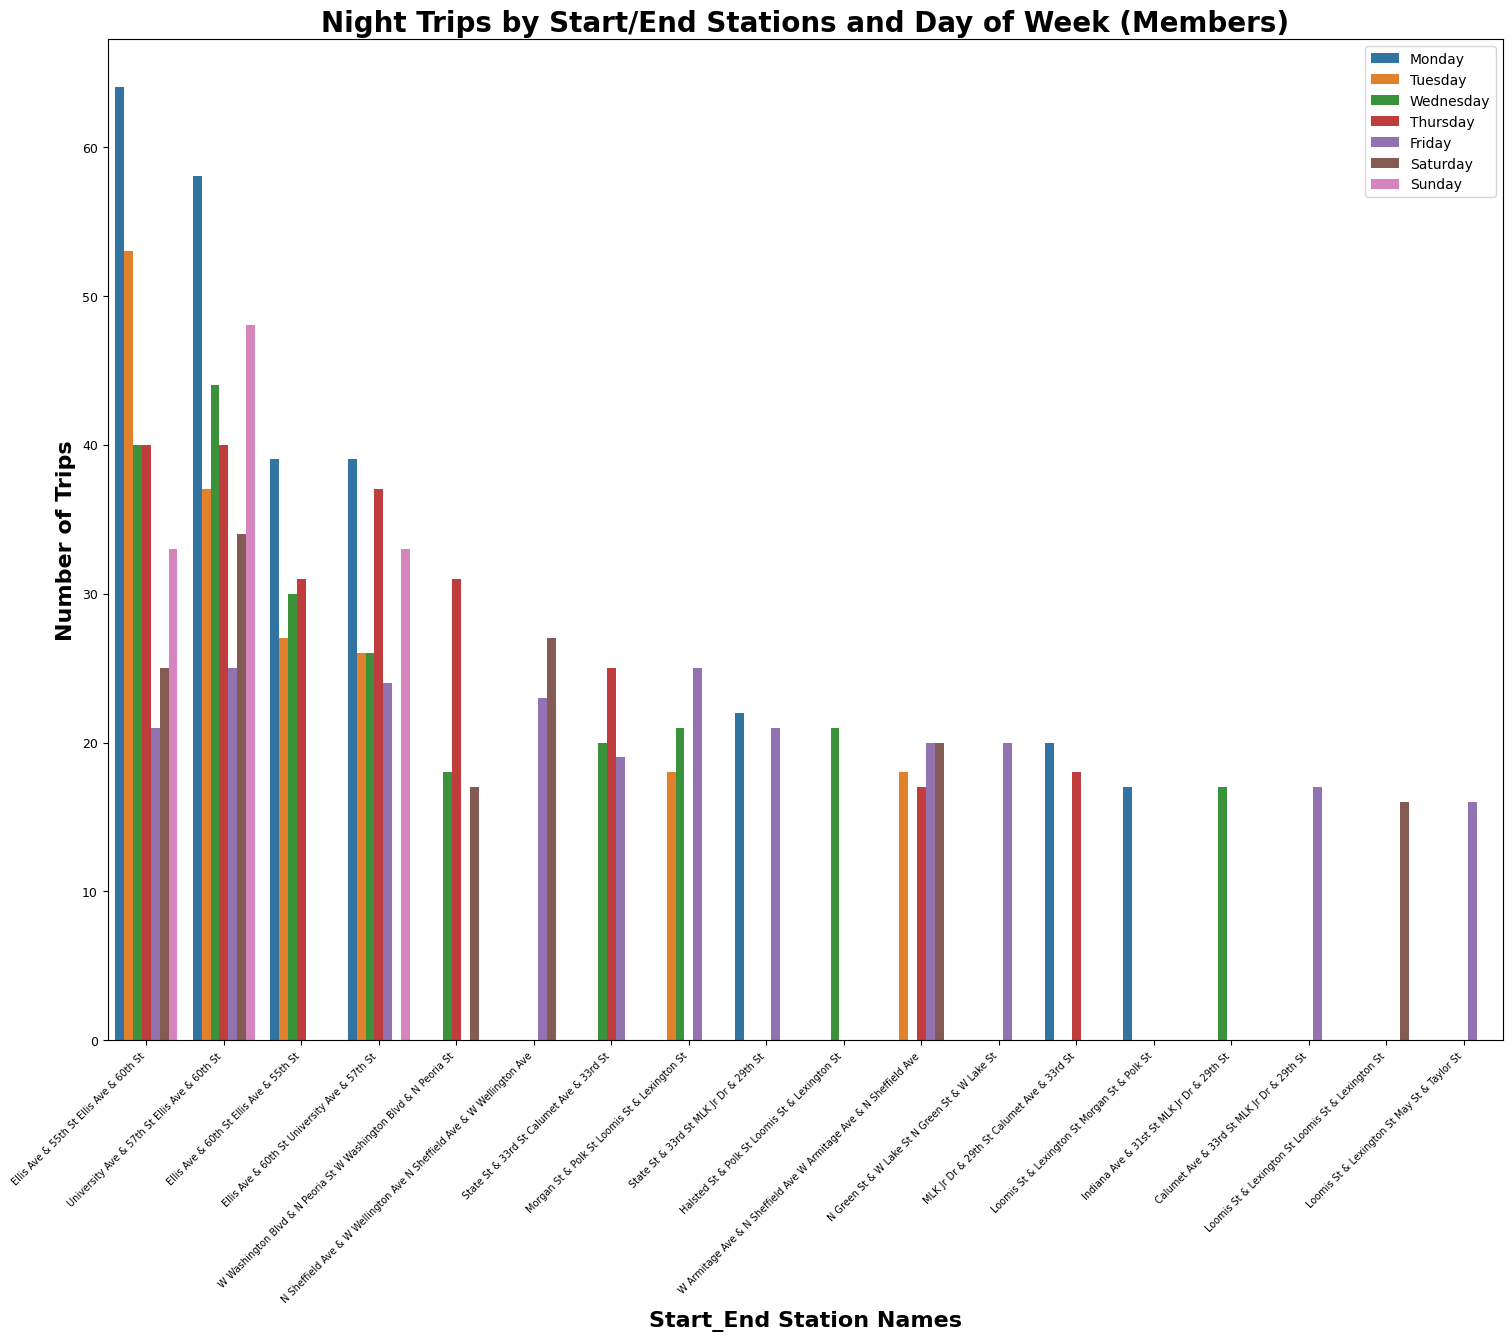

Night Trips by Start/End Stations and Day of Week (Casual Riders)


start_end_name   weekday  count
0       DuSable Lake Shore Dr & Monroe St DuSable Lake...  Saturday     68
1                         Millennium Park Millennium Park  Saturday     64
2         Streeter Dr & Grand Ave Streeter Dr & Grand Ave  Saturday     58
3                         Millennium Park Millennium Park    Sunday     55
4       W Armitage Ave & N Sheffield Ave W Armitage Av...    Friday     44
...                                                   ...       ...    ...
211150              Green St & Washington Blvd Smith Park    Friday      0
211151              Green St & Washington Blvd Smith Park  Saturday      0
211152  Green St & Washington Blvd Southport Ave & Wri...    Sunday      0
211153  Green St & Washington Blvd Southport Ave & Wri...  Saturday      0
211154              Zapata Academy Lawndale Ave & 30th St    Sunday      0

[211155 rows x 3 columns]

AVG Casual Rider Night Trips per Start/End Station Combo: 2.53 (95% CI (2.483, 2.584) )


Number of Different Night Start/End Stations (Casual Riders): 30165


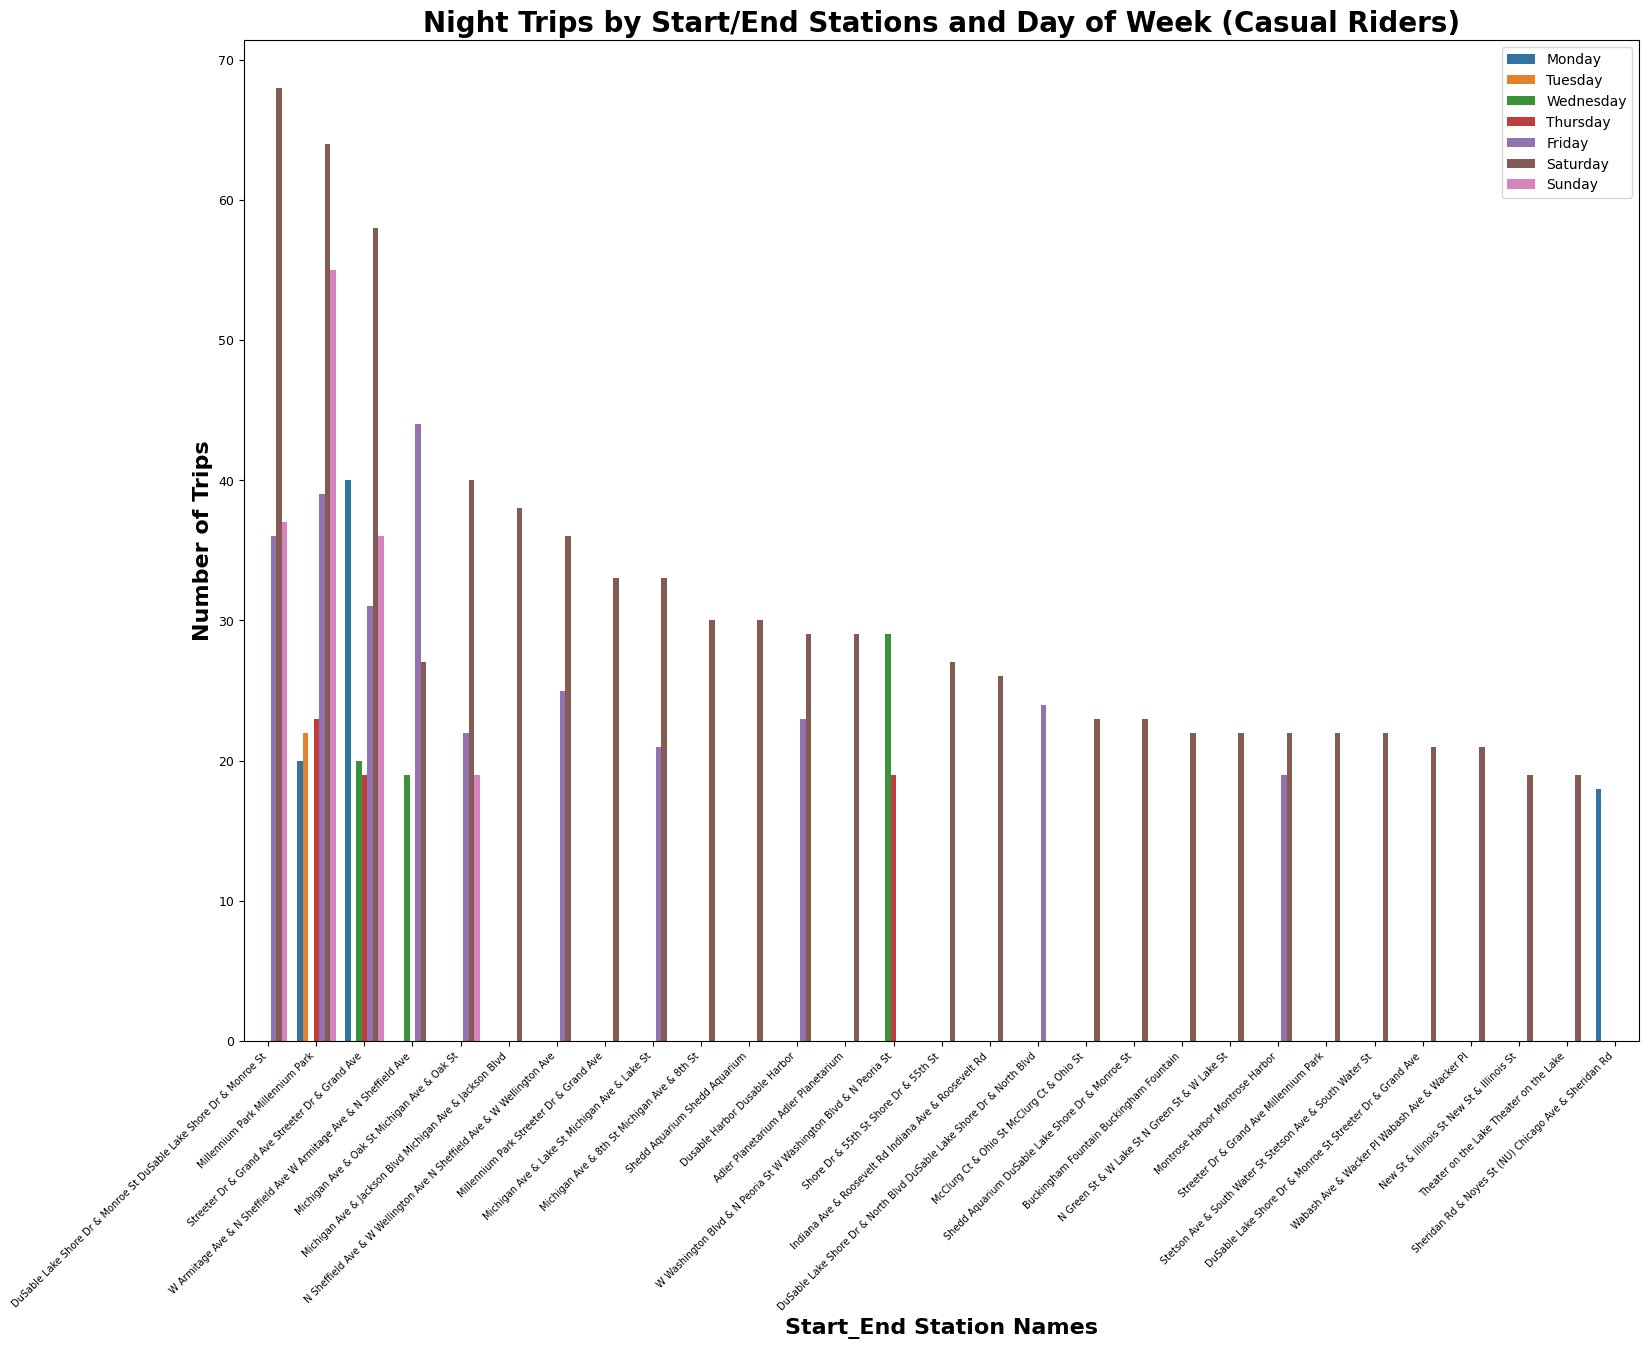

Number of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos: 14


Number of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos: 25


In [38]:
# Night Trips by Start/End Stations and Day of Week (Members)

weekday_sorted_night_mem_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'member') & (weekday_sorted_df['time_of_day'] == 'night')]
weekday_sorted_night_mem_df = weekday_sorted_night_mem_df.replace('nan', np.nan).dropna()
weekday_sorted_night_mem_df = pd.DataFrame(weekday_sorted_night_mem_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_night_mem_df = weekday_sorted_night_mem_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mNight Trips by Start/End Stations and Day of Week (Members)\033[0m')
display(weekday_sorted_night_mem_df)

mem_night_startend_trips = pd.DataFrame(df1_nonull_mem[df1_nonull_mem['time_of_day'] == 'night']['start_end_name'].value_counts().reset_index())
avg_mem_night_startend_trips = mem_night_startend_trips['count'].mean()

mem_night_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=mem_night_startend_trips['count'].mean(), scale=stats.sem(mem_night_startend_trips['count']))
mem_night_startend_trips_mean_CI = (round(mem_night_startend_trips_mean_CI[0],3),round(mem_night_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Member Night Trips per Start/End Station Combo:\033[0m',round(avg_mem_night_startend_trips,2),'(95% CI',mem_night_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Night Start/End Stations (Members):\033[0m',len(set(weekday_sorted_night_mem_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_night_mem_df['start_end_name'][:50], y=weekday_sorted_night_mem_df['count'][:50],hue=weekday_sorted_night_mem_df['weekday'])
ax.set_title("Night Trips by Start/End Stations and Day of Week (Members)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Night Trips by Start/End Stations and Day of Week (Casual Riders)

weekday_sorted_night_cas_df = weekday_sorted_df[(weekday_sorted_df['member_casual'] == 'casual') & (weekday_sorted_df['time_of_day'] == 'night')]
weekday_sorted_night_cas_df = weekday_sorted_night_cas_df.replace('nan', np.nan).dropna()
weekday_sorted_night_cas_df = pd.DataFrame(weekday_sorted_night_cas_df.groupby(by=['start_end_name'])['weekday'].value_counts().reset_index())
weekday_sorted_night_cas_df = weekday_sorted_night_cas_df.sort_values('count',ascending=False).reset_index(drop=True)
print('\033[1mNight Trips by Start/End Stations and Day of Week (Casual Riders)\033[0m')
display(weekday_sorted_night_cas_df)

cas_night_startend_trips = pd.DataFrame(df1_nonull_cas[df1_nonull_cas['time_of_day'] == 'night']['start_end_name'].value_counts().reset_index())
avg_cas_night_startend_trips = cas_night_startend_trips['count'].mean()

cas_night_startend_trips_mean_CI = stats.norm.interval(confidence=0.95, loc=cas_night_startend_trips['count'].mean(), scale=stats.sem(cas_night_startend_trips['count']))
cas_night_startend_trips_mean_CI = (round(cas_night_startend_trips_mean_CI[0],3),round(cas_night_startend_trips_mean_CI[1],3)) 
print('\033[1mAVG Casual Rider Night Trips per Start/End Station Combo:\033[0m',round(avg_cas_night_startend_trips,2),'(95% CI',cas_night_startend_trips_mean_CI,')')
print('\n')
print('\033[1mNumber of Different Night Start/End Stations (Casual Riders):\033[0m',len(set(weekday_sorted_night_cas_df['start_end_name'])))

plt.figure(figsize=(18,13))
ax = sns.barplot(x=weekday_sorted_night_cas_df['start_end_name'][:50], y=weekday_sorted_night_cas_df['count'][:50],hue=weekday_sorted_night_cas_df['weekday'])
ax.set_title("Night Trips by Start/End Stations and Day of Week (Casual Riders)",fontsize=20,fontweight='bold')
ax.set_xlabel("Start_End Station Names",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='y', which='major', labelsize=9)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

mem_night_stations_notin_cas = len(set(weekday_sorted_night_mem_df['start_end_name'][:50]).difference(set(weekday_sorted_night_cas_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Member Start/End Combos Not In Set of Top 50 Casual Rider Start/End Combos:\033[0m',mem_night_stations_notin_cas)
print('\n')

cas_night_stations_notin_mem = len(set(weekday_sorted_night_cas_df['start_end_name'][:50]).difference(set(weekday_sorted_night_mem_df['start_end_name'][:50])))

print('\033[1mNumber of Top 50 Casual Rider Start/End Combos Not In Set of Top 50 Member Start/End Combos:\033[0m',cas_night_stations_notin_mem)

### Observations/Insights

Casual Rider top 2 and 3 night trips have trips throughout the week whereas other top night trips are mostly on the weekends and mostly to popular tourist destinations. Member top night trips are both during the week and on the weekends and include more non-tourist destinations.

Members' top night route goes from Ellis Ave & 55th St (near University of Chicago gym and academic buildings) to Ellis Ave & 60th St (near University of Chicago dormitories). Members traveled this route in the night every day of each week, with trip volumes peaking on Mondays. Members' second top route again starts at University Ave & 57th St (near University of Chicago academic buildings) and ends at Ellis Ave & 60th St (near University of Chicago dormitories).

Casual Riders' top night route starts and ends at Dusable Lake Shore Dr & Monroe St (on Dusable Harbor, next to Millenium Park and Maggie Daley Park). Casual Riders traveled this route in the night Friday - Sunday of each week, with trip volumes peaking on Saturdays.

On average, Members had slightly more night trips (2.79) per route per weekday than Casual Riders (2.53).

14 of the top 50 Member night start/end station combos by trip volume were not in the set of top 50 Casual Rider night start/end station combos.

25 of the top 50 Casual Rider night start/end station combos by trip volume were not in the set of top 50 Member night start/end station combos.

Members traveled 36,219 different start/end station combos at night and Casual Riders traveled 30,165 different start/end station combos at night.

## Machine Learning Models to Get Feature Importances 
### (for prioritizing further EDA; not to be deployed)

In [115]:
# Define function that creates a performance metrics table based on F1 score optimization given a fitted model to 
# use to compare performance across all constructed models

def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
    
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'ROC/AUC': [roc_auc]
                         }
                        )

    return table

In [116]:
# Define function to calculate confusion matrix values and plot confusion matrix representing the averages of the
# values taken from each round of recall refit cross-validation for the best model

def make_cv_confusion_matrix(cv_object,y_train):
    
    '''Takes a fitted cv grid search object (i.e. dt_cv) and total number of outcome (y-variable) data points in the
    training dataset (i.e. y_train.shape[0]) and outputs a confusion matrix that represents averaged values from 
    all rounds of cross-validation'''
    
    # Create variable for total number of training set observations
    total_train_obs = y_train.shape[0]
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(cv_object.cv_results_)

    # Isolate the row of the df with the max(mean recall score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_recall'].idxmax(), :]
    
    # Isolate mean recall, precision, and accuracy scores from the best model's cross-validation
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Calculate values for the confusion matrix
    true_positives = ((precision * recall) * (total_train_obs - (accuracy * total_train_obs))) / (recall - (2 * recall * precision) + precision)
    false_positives = round((true_positives - (precision * true_positives)) / precision, 0)
    false_negatives = round((true_positives - (recall * true_positives)) / recall, 0)
    true_negatives = round((accuracy * total_train_obs) - true_positives, 0)
    true_positives = round(true_positives, 0)
    predictions_list = [true_negatives,false_positives,false_negatives,true_positives]
    predictions_matrix = np.array(predictions_list).reshape(2,2)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    ax = sns.heatmap(predictions_matrix, vmin=0, vmax=total_train_obs, annot=True, 
                     cmap = sns.color_palette("mako", as_cmap=True), fmt='g')
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    return plt.show()

In [117]:
# Create separate dataframe to use for constructing Random Forest model

df_rf = df1_encoded.copy()

df_rf['start_date'] = df_rf['start_date'].dt.strftime('%Y%m%d').astype(int)
df_rf['end_date'] = df_rf['end_date'].dt.strftime('%Y%m%d').astype(int)

time_delta = []

for x in df_rf['start_time']:
    midnight = x.replace(hour=0, minute=0, second=0, microsecond=0)
    td = x - midnight
    time_delta.append(td)

df_rf['start_time'] = time_delta
df_rf['start_time'] = df_rf['start_time'].dt.seconds / 3600

time_delta = []

for x in df_rf['end_time']:
    midnight = x.replace(hour=0, minute=0, second=0, microsecond=0)
    td = x - midnight
    time_delta.append(td)

df_rf['end_time'] = time_delta
df_rf['end_time'] = df_rf['end_time'].dt.seconds / 3600

df_rf = df_rf.dropna()

df_rf.info()
df_rf.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1749001 entries, 0 to 1751033
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   start_date                   int64  
 1   end_date                     int64  
 2   weekend                      int64  
 3   start_time                   float64
 4   end_time                     float64
 5   duration                     float64
 6   start_station_name           int16  
 7   start_station_id             int16  
 8   end_station_name             int16  
 9   end_station_id               int16  
 10  start_end_name               int32  
 11  start_end_id                 int32  
 12  start_lat                    float64
 13  start_lng                    float64
 14  end_lat                      float64
 15  end_lng                      float64
 16  avg_end_lat                  float64
 17  avg_end_lng                  float64
 18  avg_start_lat                float64
 19  avg_s

start_date  end_date  weekend  start_time   end_time   duration  \
0    20230402  20230402        1    8.624444   8.693611   4.150000   
1    20230419  20230419        0   11.483889  11.870000  23.166667   
2    20230419  20230419        0    8.689444   8.722778   2.000000   
3    20230419  20230419        0   13.525000  13.585833   3.650000   
4    20230419  20230419        0   12.093333  12.173889   4.833333   

   start_station_name  start_station_id  end_station_name  end_station_id  \
0                  -1                -1                -1              -1   
1                  -1                -1                -1              -1   
2                  -1                -1                -1              -1   
3                1457               534                -1              -1   
4                  -1                -1                -1              -1   

   start_end_name  start_end_id  start_lat  start_lng  end_lat  end_lng  \
0          139179        138148      41.80     -87.60    41.79   -87.60   
1          139179        138148      41.87     -87.65    41.93   -87.68   
2          139179        138148      41.93     -87.66    41.93   -87.66   
3          123236         53476      41.92     -87.65    41.91   -87.65   
4          139179        138148      41.91     -87.65    41.91   -87.63   

   avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  \
0        41.79       -87.60          41.80         -87.60   
1        41.93       -87.68          41.87         -87.65   
2        41.93       -87.66          41.93         -87.66   
3        41.91       -87.65          41.92         -87.65   
4        41.91       -87.63          41.91         -87.65   

   rideable_type_classic_bike  rideable_type_docked_bike  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   rideable_type_electric_bike  member_casual_casual  member_casual_member  \
0                            1                     0                     1   
1                            1                     0                     1   
2                            1                     0                     1   
3                            1                     0                     1   
4                            1                     0                     1   

   weekday_Monday  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0               0                0                  0                 0   
1               0                0                  1                 0   
2               0                0                  1                 0   
3               0                0                  1                 0   
4               0                0                  1                 0   

   weekday_Friday  weekday_Saturday  weekday_Sunday  time_of_day_afternoon  \
0               0                 0               1                      0   
1               0                 0               0                      0   
2               0                 0               0                      0   
3               0                 0               0                      1   
4               0                 0               0                      1   

   time_of_day_early morning  time_of_day_evening  time_of_day_late morning  \
0                          0                    0                         0   
1                          0                    0                         1   
2                          0                    0                         0   
3                          0                    0                         0   
4                          0                    0                         0   

   time_of_day_mid morning  time_of_day_night  
0                        1  

In [131]:
# Define X and y variables for Random Forest model

X_rf = df_rf.drop(columns=['member_casual_casual','member_casual_member'])

y_rf = df_rf[['member_casual_member']]

display(X_rf.head())
display(y_rf.head())

start_date  end_date  weekend  start_time   end_time   duration  \
0    20230402  20230402        1    8.624444   8.693611   4.150000   
1    20230419  20230419        0   11.483889  11.870000  23.166667   
2    20230419  20230419        0    8.689444   8.722778   2.000000   
3    20230419  20230419        0   13.525000  13.585833   3.650000   
4    20230419  20230419        0   12.093333  12.173889   4.833333   

   start_station_name  start_station_id  end_station_name  end_station_id  \
0                  -1                -1                -1              -1   
1                  -1                -1                -1              -1   
2                  -1                -1                -1              -1   
3                1457               534                -1              -1   
4                  -1                -1                -1              -1   

   start_end_name  start_end_id  start_lat  start_lng  end_lat  end_lng  \
0          139179        138148      41.80     -87.60    41.79   -87.60   
1          139179        138148      41.87     -87.65    41.93   -87.68   
2          139179        138148      41.93     -87.66    41.93   -87.66   
3          123236         53476      41.92     -87.65    41.91   -87.65   
4          139179        138148      41.91     -87.65    41.91   -87.63   

   avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  \
0        41.79       -87.60          41.80         -87.60   
1        41.93       -87.68          41.87         -87.65   
2        41.93       -87.66          41.93         -87.66   
3        41.91       -87.65          41.92         -87.65   
4        41.91       -87.63          41.91         -87.65   

   rideable_type_classic_bike  rideable_type_docked_bike  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   rideable_type_electric_bike  weekday_Monday  weekday_Tuesday  \
0                            1               0                0   
1                            1               0                0   
2                            1               0                0   
3                            1               0                0   
4                            1               0                0   

   weekday_Wednesday  weekday_Thursday  weekday_Friday  weekday_Saturday  \
0                  0                 0               0                 0   
1                  1                 0               0                 0   
2                  1                 0               0                 0   
3                  1                 0               0                 0   
4                  1                 0               0                 0   

   weekday_Sunday  time_of_day_afternoon  time_of_day_early morning  \
0               1                      0                          0   
1               0                      0                          0   
2               0                      0                          0   
3               0                      1                          0   
4               0                      1                          0   

   time_of_day_evening  time_of_day_late morning  time_of_day_mid morning  \
0                    0                         0                        1   
1                    0                         1                        0   
2                    0                         0                        1   
3                    0                         0                        0   
4                    0                         0                        0   

   time_of_day_night  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

member_casual_member
0                     1
1                     1
2                     1
3                     1
4                     1

In [119]:
# Split X and y into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X_rf,y_rf, test_size=0.20, stratify=y_rf, random_state=42)

In [120]:
# Instantiate the Random Forest model

rf = RandomForestClassifier(random_state=42)

In [121]:
# Define ranges of cross-validation hyperparameters to use in GridSearch to choose the best model

cv_params = {'max_depth': [None], 
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3,4],
             'max_features': ['sqrt',0.25],
             'n_estimators': [100,300,500],
             'max_samples': [0.8,None]
             }  

# Define scoring metrics to calculate for the model

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


# Create the GridSearch object to perform GridSearch while fitting the model

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [122]:
# Convert y_train to a flattened np array

y_train = y_train.values.ravel()

In [124]:
# Fit the cv model

# Grid search determined to be too computationally expensive. Will use oob model instead to get feature importances.

# rf_cv.fit(X_train,y_train)

KeyboardInterrupt: 

### Observation

Grid search is too computationally expensive with this large dataset. Will fit the 'out-of-the-box' model (default settings) to the entire dataset instead to get feature importances. 

This would not be recommended practice if the goal was to deploy the model to operationally make predictions but the goal is to simply help guide/prioritize further EDA so this alternative method will largely serve its required purpose.

In [125]:
# Convert y_rf to a flattened np array

y_rf = y_rf.values.ravel()

In [126]:
# Fit the oob model to the entire dataset

rf.fit(X_rf,y_rf)

RandomForestClassifier(random_state=42)

In [127]:
# Write pickle

write_pickle(path, rf, 'rf')

In [74]:
# Read pickle

rf = read_pickle(path, 'rf')



       Random Forest Confusion Matrix


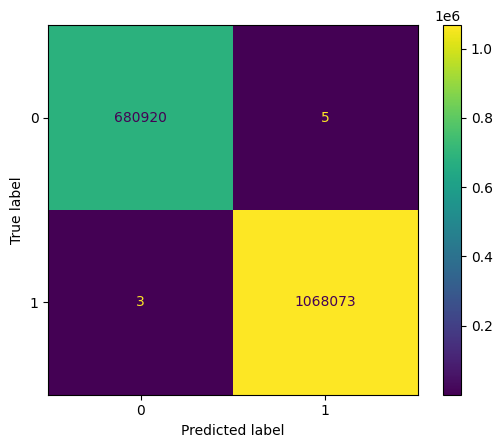

In [128]:
print('\n')
print('\033[1m            Random Forest Confusion Matrix\033[1m')

y_pred = rf.predict(X_rf)

cm = confusion_matrix(y_rf, y_pred, labels = rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf.classes_)

disp.plot(values_format='');

In [132]:
# Print actual outcomes from the dataset

print("\033[1mActual Outcomes (left vs. stayed)\033[0m")
print(y_rf.value_counts().to_string())

Actual Outcomes (left vs. stayed)
member_casual_member
1                       1068076
0                        680925


In [129]:
# Get performance metrics for how well the Random Forest model predicted the y_rf observations

pred = rf.predict(X_rf)
accuracy = accuracy_score(y_rf, pred>0.5)
f1 = f1_score(y_rf, pred>0.5)
precision = precision_score(y_rf, pred>0.5)
recall = recall_score(y_rf, pred>0.5)
roc_auc = roc_auc_score(y_rf, pred>0.5)
print("Accuracy SCORE:", accuracy)
print("F1 SCORE:", f1)
print("Precision SCORE:", precision)
print("Recall SCORE:", recall)
print("ROC/AUC SCORE:", roc_auc)

Accuracy SCORE: 0.9999954259603053
F1 SCORE: 0.9999962549516561
Precision SCORE: 0.9999953186939531
Recall SCORE: 0.9999971912111123
ROC/AUC SCORE: 0.9999949241292556


In [28]:
# Return full list of hyperparameters for the fitted model

# Not used since grid search was not completed

# print(rf_cv.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [29]:
# Identify the best combination of hyperparameters defined by the GridSearch

# Not used since grid search was not completed

# rf_cv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [30]:
# Full Grid Search CV Results for reference

# Not used since grid search was not completed

# rf_cv_full_results = pd.DataFrame(rf_cv.cv_results_)
# rf_cv_full_results = rf_cv_full_results.sort_values(by='rank_test_f1',ascending=True)
#display(rf_cv_full_results)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
# Get performance metrics for how well the Random Forest model predicted the y_test observations

# Not used since grid search was not completed

# rf_cv_results = make_results('Random Forest CV', rf_cv)
# rf_cv_results

In [ ]:
# Plot validation confusion matrix for the fitted Random Forest

# Not used since grid search was not completed

# make_cv_confusion_matrix(rf_cv,y_train)

In [75]:
# Get performance metrics for how well the Random Forest model predicts the y_test observations

# Not used since grid search was not completed

# rf_preds = rf.predict(X_test)

# rf_final_results = pd.DataFrame({'Model': 'Random Forest',
#                          'F1': [f1_score(y_test, rf_preds)],
#                          'Recall': [recall_score(y_test, rf_preds)],
#                          'Precision': [precision_score(y_test, rf_preds)],
#                          'Accuracy': [accuracy_score(y_test, rf_preds)],
#                          'ROC/AUC': [roc_auc_score(y_test, rf_preds)]
#                         })
#rf_final_results['F1'] = round(rf_final_results['F1'],6)
# display(rf_final_results)

Model        F1    Recall  Precision  Accuracy   ROC/AUC
0  Random Forest  0.802418  0.863765   0.749207  0.740232  0.705114



       Random Forest Confusion Matrix (test data)


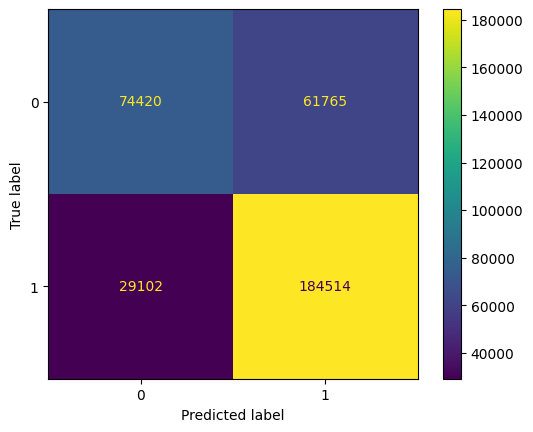

In [76]:
# print('\n')
# print('\033[1m       Random Forest Confusion Matrix (test data)\033[1m')

# Not used since grid search was not completed

# y_pred = rf.predict(X_test)

# cm = confusion_matrix(y_test, y_pred, labels = rf.classes_)

# disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf.classes_)

# disp.plot(values_format='');

In [135]:
# Identify most important X-variables (features) in the Random Forest model and put in a table

rf_importances = pd.DataFrame(rf.feature_importances_)

rf_importances = rf_importances.rename(columns={0:"mean_dec_impurity"})
rf_importances.insert(0, "features", X_rf.columns)
rf_importances = rf_importances.sort_values(by='mean_dec_impurity',ascending=False).reset_index(drop=True)
rf_importances = rf_importances.iloc[:20,:]
display(rf_importances)

features  mean_dec_impurity
0                    duration           0.117083
1                    end_time           0.076307
2                  start_time           0.076238
3               avg_start_lng           0.046722
4                   start_lat           0.046132
5                start_end_id           0.045946
6                   start_lng           0.045694
7               avg_start_lat           0.045567
8              start_end_name           0.045229
9                 avg_end_lng           0.040452
10                    end_lng           0.039848
11                avg_end_lat           0.038881
12                    end_lat           0.038707
13                   end_date           0.038316
14                 start_date           0.037945
15             end_station_id           0.034058
16           end_station_name           0.032194
17           start_station_id           0.026958
18         start_station_name           0.026516
19  rideable_type_docked_bike           0.020629

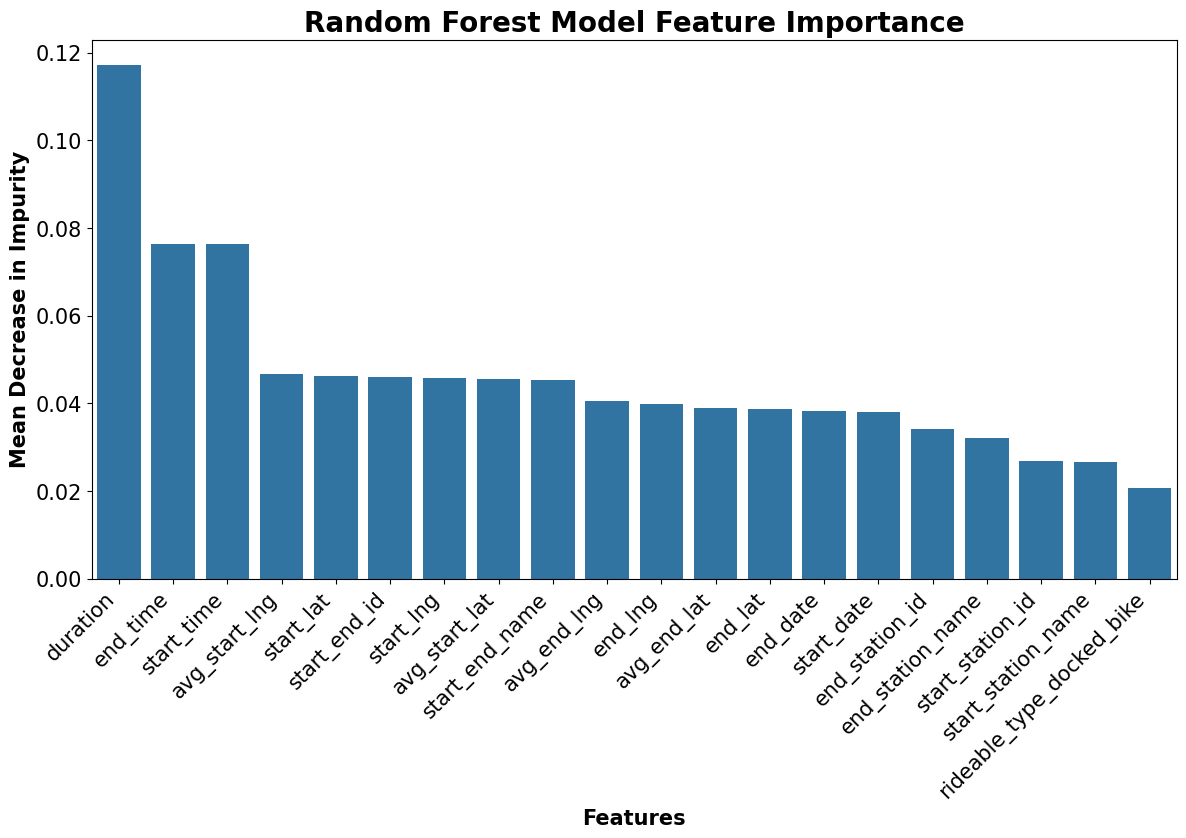

In [136]:
# Plot feature importance for the Random Forest model; this plot shows the impact each predictor 
# variable has on the model for predicting the outcome variable

plt.figure(figsize=(14,7))
ax = sns.barplot(x=rf_importances['features'],y=rf_importances['mean_dec_impurity'])
plt.title("Random Forest Model Feature Importance",fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize = 15,fontweight='bold')
plt.ylabel("Mean Decrease in Impurity",fontsize = 15,fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Observations/Insights

Trip duration was the most important feature for the Random Forest model in determining splits in trees, followed by start and end time (which together calculate duration). Start station lats and longs and start/end station id/name combos were the next most important features. It looks like end station information wasn't quite as important as start station information for the model.

Further EDA will be prioritized in order by these feature importances to glean the most important insights regarding Member vs. Casual Rider differences.

In [139]:
# Create separate dataframe to use for constructing XGBoost model (added step of dropping 'duration' outliers)

df_xgb = df1_encoded.copy()

df_xgb['start_date'] = df_xgb['start_date'].dt.strftime('%Y%m%d').astype(int)
df_xgb['end_date'] = df_xgb['end_date'].dt.strftime('%Y%m%d').astype(int)

time_delta = []

for x in df_xgb['start_time']:
    midnight = x.replace(hour=0, minute=0, second=0, microsecond=0)
    td = x - midnight
    time_delta.append(td)

df_xgb['start_time'] = time_delta
df_xgb['start_time'] = df_xgb['start_time'].dt.seconds / 3600

time_delta = []

for x in df_xgb['end_time']:
    midnight = x.replace(hour=0, minute=0, second=0, microsecond=0)
    td = x - midnight
    time_delta.append(td)

df_xgb['end_time'] = time_delta
df_xgb['end_time'] = df_xgb['end_time'].dt.seconds / 3600

df_xgb = df_xgb.drop(duration_outliers.index,axis=0)

df_xgb = df_xgb.dropna()

df_xgb.info()
df_xgb.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1623081 entries, 0 to 1751033
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   start_date                   1623081 non-null  int64  
 1   end_date                     1623081 non-null  int64  
 2   weekend                      1623081 non-null  int64  
 3   start_time                   1623081 non-null  float64
 4   end_time                     1623081 non-null  float64
 5   duration                     1623081 non-null  float64
 6   start_station_name           1623081 non-null  int16  
 7   start_station_id             1623081 non-null  int16  
 8   end_station_name             1623081 non-null  int16  
 9   end_station_id               1623081 non-null  int16  
 10  start_end_name               1623081 non-null  int32  
 11  start_end_id                 1623081 non-null  int32  
 12  start_lat                    1623081 non-null  

start_date  end_date  weekend  start_time   end_time   duration  \
0    20230402  20230402        1    8.624444   8.693611   4.150000   
1    20230419  20230419        0   11.483889  11.870000  23.166667   
2    20230419  20230419        0    8.689444   8.722778   2.000000   
3    20230419  20230419        0   13.525000  13.585833   3.650000   
4    20230419  20230419        0   12.093333  12.173889   4.833333   

   start_station_name  start_station_id  end_station_name  end_station_id  \
0                  -1                -1                -1              -1   
1                  -1                -1                -1              -1   
2                  -1                -1                -1              -1   
3                1457               534                -1              -1   
4                  -1                -1                -1              -1   

   start_end_name  start_end_id  start_lat  start_lng  end_lat  end_lng  \
0          139179        138148      41.80     -87.60    41.79   -87.60   
1          139179        138148      41.87     -87.65    41.93   -87.68   
2          139179        138148      41.93     -87.66    41.93   -87.66   
3          123236         53476      41.92     -87.65    41.91   -87.65   
4          139179        138148      41.91     -87.65    41.91   -87.63   

   avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  \
0        41.79       -87.60          41.80         -87.60   
1        41.93       -87.68          41.87         -87.65   
2        41.93       -87.66          41.93         -87.66   
3        41.91       -87.65          41.92         -87.65   
4        41.91       -87.63          41.91         -87.65   

   rideable_type_classic_bike  rideable_type_docked_bike  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   rideable_type_electric_bike  member_casual_casual  member_casual_member  \
0                            1                     0                     1   
1                            1                     0                     1   
2                            1                     0                     1   
3                            1                     0                     1   
4                            1                     0                     1   

   weekday_Monday  weekday_Tuesday  weekday_Wednesday  weekday_Thursday  \
0               0                0                  0                 0   
1               0                0                  1                 0   
2               0                0                  1                 0   
3               0                0                  1                 0   
4               0                0                  1                 0   

   weekday_Friday  weekday_Saturday  weekday_Sunday  time_of_day_afternoon  \
0               0                 0               1                      0   
1               0                 0               0                      0   
2               0                 0               0                      0   
3               0                 0               0                      1   
4               0                 0               0                      1   

   time_of_day_early morning  time_of_day_evening  time_of_day_late morning  \
0                          0                    0                         0   
1                          0                    0                         1   
2                          0                    0                         0   
3                          0                    0                         0   
4                          0                    0                         0   

   time_of_day_mid morning  time_of_day_night  
0                        1  

In [140]:
# Define X and y variables to build the XGBoost model

X_xgb = df_xgb.drop(columns=['member_casual_casual','member_casual_member'])

y_xgb = df_xgb[['member_casual_member']]

display(X_xgb.head())
display(y_xgb.head())

start_date  end_date  weekend  start_time   end_time   duration  \
0    20230402  20230402        1    8.624444   8.693611   4.150000   
1    20230419  20230419        0   11.483889  11.870000  23.166667   
2    20230419  20230419        0    8.689444   8.722778   2.000000   
3    20230419  20230419        0   13.525000  13.585833   3.650000   
4    20230419  20230419        0   12.093333  12.173889   4.833333   

   start_station_name  start_station_id  end_station_name  end_station_id  \
0                  -1                -1                -1              -1   
1                  -1                -1                -1              -1   
2                  -1                -1                -1              -1   
3                1457               534                -1              -1   
4                  -1                -1                -1              -1   

   start_end_name  start_end_id  start_lat  start_lng  end_lat  end_lng  \
0          139179        138148      41.80     -87.60    41.79   -87.60   
1          139179        138148      41.87     -87.65    41.93   -87.68   
2          139179        138148      41.93     -87.66    41.93   -87.66   
3          123236         53476      41.92     -87.65    41.91   -87.65   
4          139179        138148      41.91     -87.65    41.91   -87.63   

   avg_end_lat  avg_end_lng  avg_start_lat  avg_start_lng  \
0        41.79       -87.60          41.80         -87.60   
1        41.93       -87.68          41.87         -87.65   
2        41.93       -87.66          41.93         -87.66   
3        41.91       -87.65          41.92         -87.65   
4        41.91       -87.63          41.91         -87.65   

   rideable_type_classic_bike  rideable_type_docked_bike  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   rideable_type_electric_bike  weekday_Monday  weekday_Tuesday  \
0                            1               0                0   
1                            1               0                0   
2                            1               0                0   
3                            1               0                0   
4                            1               0                0   

   weekday_Wednesday  weekday_Thursday  weekday_Friday  weekday_Saturday  \
0                  0                 0               0                 0   
1                  1                 0               0                 0   
2                  1                 0               0                 0   
3                  1                 0               0                 0   
4                  1                 0               0                 0   

   weekday_Sunday  time_of_day_afternoon  time_of_day_early morning  \
0               1                      0                          0   
1               0                      0                          0   
2               0                      0                          0   
3               0                      1                          0   
4               0                      1                          0   

   time_of_day_evening  time_of_day_late morning  time_of_day_mid morning  \
0                    0                         0                        1   
1                    0                         1                        0   
2                    0                         0                        1   
3                    0                         0                        0   
4                    0                         0                        0   

   time_of_day_night  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

member_casual_member
0                     1
1                     1
2                     1
3                     1
4                     1

In [42]:
# Split X and y into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X_xgb,y_xgb, test_size=0.20, stratify=y_xgb, random_state=42)

In [141]:
# Instantiate the XGBoost model

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
# Define ranges of cross-validation hyperparameters to use in GridSearch to choose the best model

cv_params = {'max_depth': [6], 
             'min_child_weight': [0.4],
             'learning_rate': [0.1],
             'n_estimators': [100],
             'colsample_bytree': [0.4]
             }    

# Define scoring metrics to calculate for the model

scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}


# Create the GridSearch object to perform GridSearch while fitting the model

# xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [142]:
# Fit the model

xgb.fit(X_xgb, y_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)



                      XGBoost Confusion Matrix


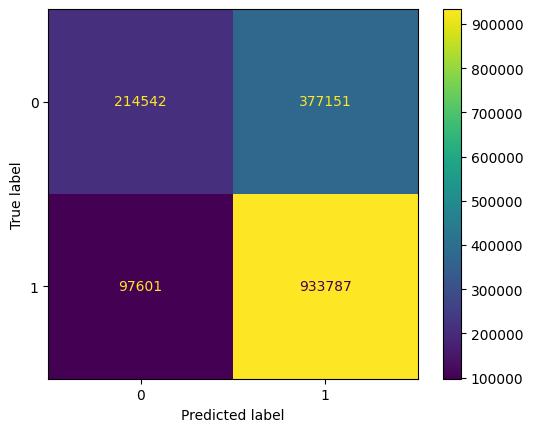

In [143]:
print('\n')
print('\033[1m                      XGBoost Confusion Matrix\033[1m')

y_pred = xgb.predict(X_xgb)

cm = confusion_matrix(y_xgb, y_pred, labels = xgb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb.classes_)

disp.plot(values_format='');

In [148]:
# Print actual outcomes from the train dataset

print("\033[1mActual Outcomes (left vs. stayed)\033[0m")
print(y_xgb.value_counts().to_string())

Actual Outcomes (left vs. stayed)
member_casual_member
1                       1031388
0                        591693


In [144]:
# Get performance metrics for how well the XGBoost model predicted the y_train observations

pred = xgb.predict(X_train)
accuracy = accuracy_score(y_train, pred>0.5)
f1 = f1_score(y_train, pred>0.5)
precision = precision_score(y_train, pred>0.5)
recall = recall_score(y_train, pred>0.5)
roc_auc = roc_auc_score(y_train, pred>0.5)
print("Accuracy SCORE:", accuracy)
print("F1 SCORE:", f1)
print("Precision SCORE:", precision)
print("Recall SCORE:", recall)
print("ROC/AUC SCORE:", roc_auc)

Accuracy SCORE: 0.7064158090337336
F1 SCORE: 0.7882667722283989
Precision SCORE: 0.7043394799550863
Recall SCORE: 0.8949008730660301
ROC/AUC SCORE: 0.6528328207897246


### Observations

The XGBoost oob model underperformed compared to the oob Random Forest model. Will use the Random Forest model feature importances to further guide EDA.

In [ ]:
# Write pickle

# write_pickle(path, xgb_cv, 'xgb_cv')

In [ ]:
# Read pickle

# xgb_cv = read_pickle(path, 'xgb_cv')

In [ ]:
# Return full list of hyperparameters for the fitted model

# Not used since grid search was not completed

xgb_cv.best_estimator_

In [ ]:
# Identify the best combination of hyperparameters defined by the GridSearch

# Not used since grid search was not completed

xgb_cv.best_params_

In [ ]:
# Full Grid Search CV Results for reference

# Not used since grid search was not completed

xgb_cv_full_results = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_full_results = xgb_cv_full_results.sort_values(by='rank_test_f1',ascending=True)
#display(xgb_cv_full_results)

In [ ]:
# Get performance metrics for how well the XGBoost model predicted the y_train observations

# Not used since grid search was not completed

xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

In [ ]:
# Plot validation confusion matrix for the fitted XGBoost model

# Not used since grid search was not completed

make_recall_cv_confusion_matrix(xgb_recall_cv,y_train)

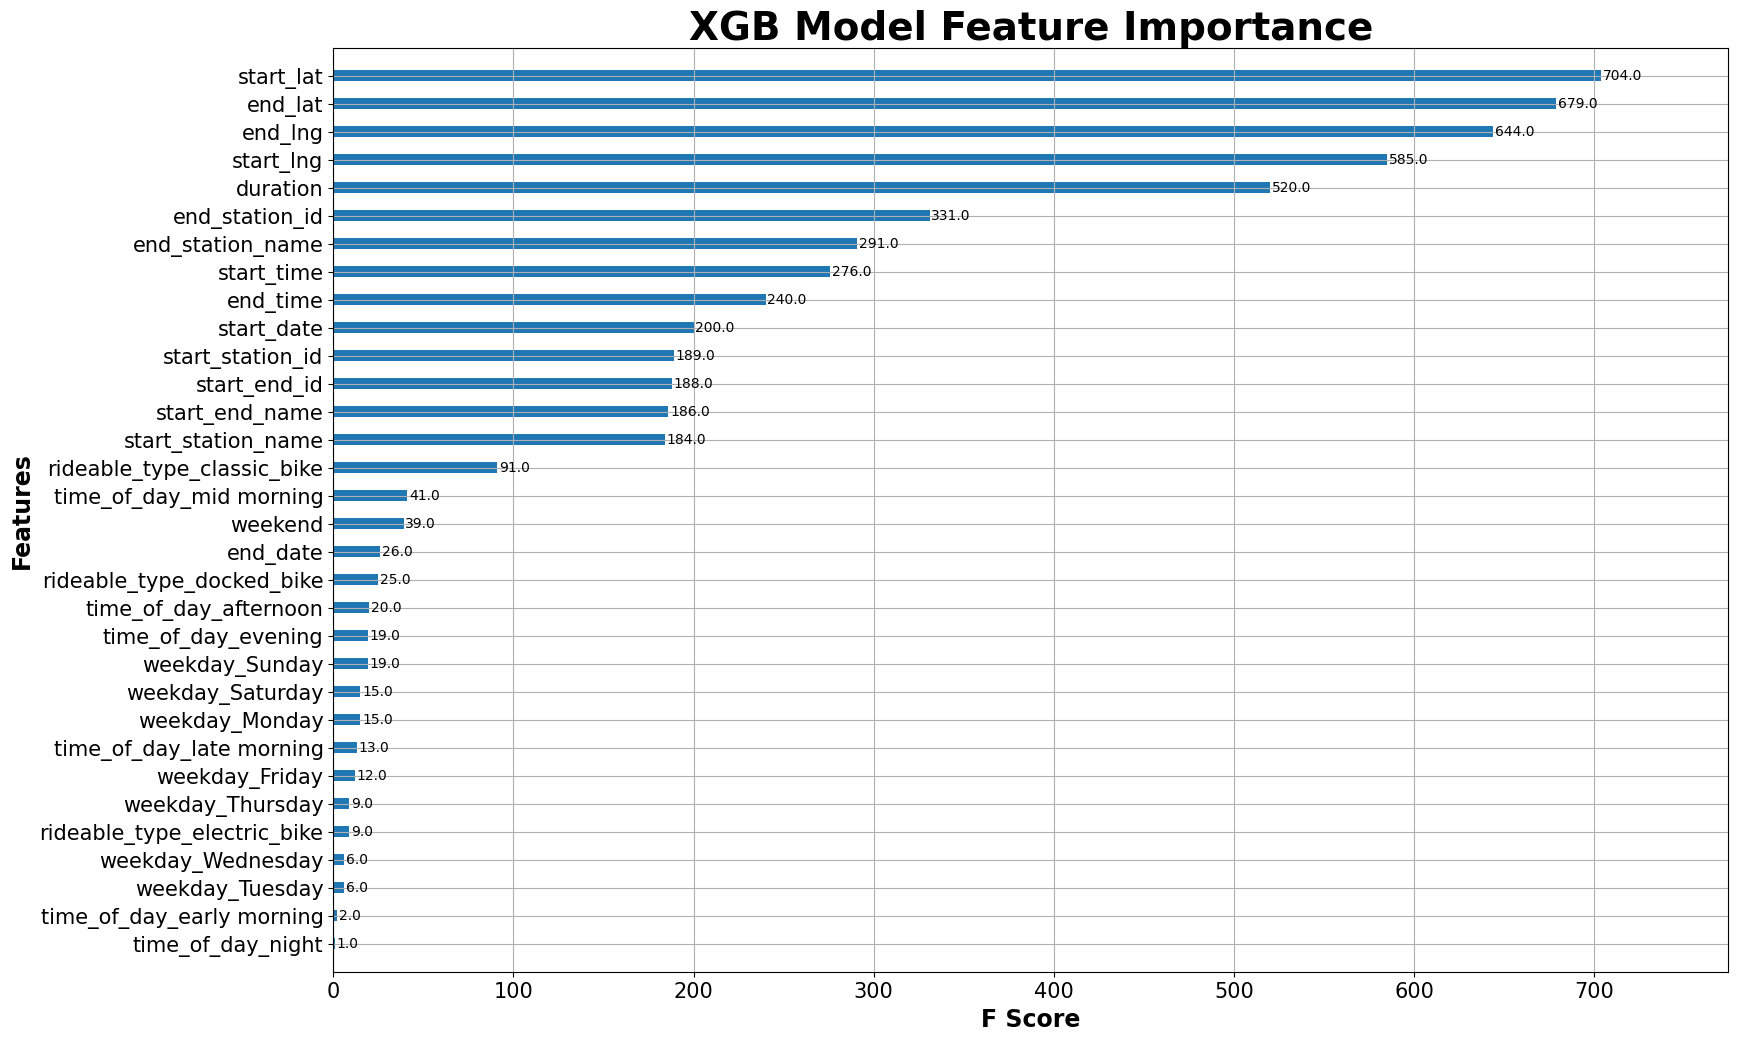

In [147]:
# Plot feature importance for the XGBoost model; this plot shows the impact each predictor 
# variable has on the model for predicting the outcome variable

ax = plot_importance(xgb,height = 0.4)
fig = ax.figure
fig.set_size_inches(18, 12)
plt.title('XGB Model Feature Importance',fontsize = 28,fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('F Score',fontsize=17,fontweight='bold')
plt.ylabel('Features',fontsize=17,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=15)

### Observation

Will not use these feature importances to further guide EDA since the oob Random Forest model outperformed the oob XGBoost model.

# Summary of Findings / Recommendations

## Member vs. Casual Rider Profiles

Based on completed analysis, these are the profiles for Members and Casual Riders.

**<u>Members</u>**
- Likely city residents and University of Chicago students
- More likely to take trips to non-tourist destinations
- More likely to have shorter trip durations
- More likely to travel Monday - Friday instead of on weekends
- Most traveled day of the week: Thursday
- Top Start/End station: Kingsbury St & Kinzie St (id: KA1503000043), a major business district
- Top round trip station: W Armitage Ave & N Sheffield Ave (id: 20254.0), near subway and bus stations
- Slightly more likely than Casual Riders to take trips earlier in the day
- Trip volumes peak in the evenings during the week and in the afternoons on the weekends
- Make up higher percentage of trips overall in non-Summer months than Summer months
- Less likely to visit more different stations
- More likely to travel more different routes (start/end station combos), except in the early mornings
- Trips per station likely to vary more widely
- Trips per route likely to vary less widely
- Not as likely as Casual Riders to take round trips
- Less likely to take round trips from more different stations
- More likely to use electric bikes than other bike types
- Not likely to use docked bikes
- Less likely than Casual Riders to take longer trips in the late morning/afternoon
- AVG lat/long location about the same as Casual Riders (just east of Goose Island)

**<u>Casual Riders</u>**
- Likely tourists
- More likely to take trips to tourist destinations
- More likely to have longer trip durations
- More likely to travel on the weekends
- Most traveled day of the week: Saturday
- Top Start/End station: Streeter Dr & Grand Ave (id: 13022) (also top round trip station), a top tourist destination
- Slightly more likely to take trips later in the day
- Trip volumes peak in the evenings during the week and in the afternoons on the weekends
- More likely to take trips in the Summer months
- More likely to visit more different stations
- Less likely to travel more different routes (start/end station combos), except in the early mornings
- Trips per station likely to vary less widely
- Trips per route likely to vary more widely
- Twice as likely as Members to take round trips
- More likely to take round trips from more different stations
- More likely to use electric bikes than other bike types
- More likely than Members to use docked bikes; docked bike trips have longer duration
- More likely than Members to take longer trips in the late morning/afternoon
- AVG lat/long location about the same as Members (just east of Goose Island)

## Recommendations

To convert Casual Riders to Annual Members, I offer the following top 3 recommendations on how to tailor marketing strategy based on analysis results:

1. Determine how Annual Membership could be more attractive for tourists and make requisite additions/changes
    - consider discounted membership rates/promotions for frequent trips to top tourist destinations, on weekends, for longer trips, and for trips during the Summer months
2. Direct the majority of marketing communications to tourists and feature top tourist destinations/activities (i.e. the Navy Pier and DuSable Harbor) on the weekends in the Summer months in marketing content
    - it may be helpful to identify and target tourists who visit Chicago more than once per year
3. Implement partnerships with nearby tourist spot establishments for top tourist stations and advertise resulting value-added services/offers for customers who become Members

## Additional Data to Improve Recommendations

The following additional data would help improve recommendations:

- Customer demographic and psychographic data for each Member/Casual Rider
- Unique customer IDs for trips (to follow customers from one trip to the next over time)
    - can be used to personalize marketing content for individual customers as well as further distinguish between Members/Casual Riders
- Fill in the remaining missing data for start and end locations
    - Figure out why especially electric bikes are potentially causing so many nulls and fix the issue